# Part d): Classification  analysis using neural networks

In this part, we study the Wisconsin Breast Cancer data set. First, we study the accuracy score using our own FFNN code as a function of varying hyper-parameters like learning rate and that regularization parameter, various activation functions, number of hidden layers and nodes and activation functions. Then, we compare the results to the those obtained using TensorFlow/Keras.

## Imports and loading the datasets

Here, the needed functions are imported and the Wisconsin Breast Cancer data set is loaded. The data is scaled using a standard scaler.

In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import pickle
import os 

# Loading dataset
np.random.seed(0)        #create same seed for random number every time
cancer=load_breast_cancer()      #Download breast cancer dataset
inputs=cancer.data                     #Feature matrix of 569 rows (samples) and 30 columns (parameters)
outputs=cancer.target                  #Label array of 569 rows (0 for benign and 1 for malignant)
labels=cancer.feature_names[0:30]

#Print information about the datasets
print('The content of the breast cancer dataset is:')
print(labels)
print('-------------------------')
print("inputs =  " + str(inputs.shape))
print("outputs =  " + str(outputs.shape))
print("labels =  "+ str(labels.shape))

#Reassign the Feature and Label matrices to other variables, and scaling
x = inputs 
y = outputs
scaler = StandardScaler()
x = scaler.fit_transform(x)

The content of the breast cancer dataset is:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
-------------------------
inputs =  (569, 30)
outputs =  (569,)
labels =  (30,)


## Visualisation of dataset

Here, the dataset is visualized.

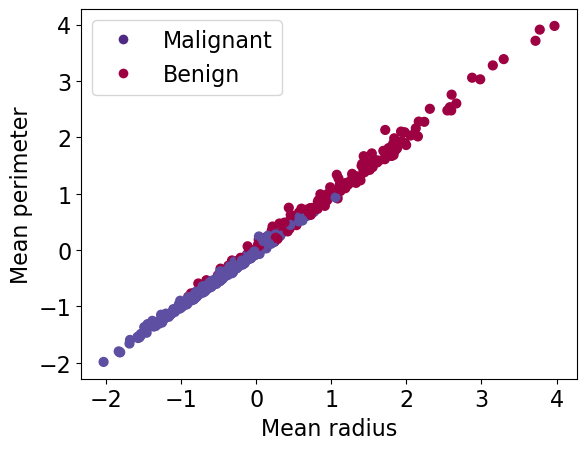

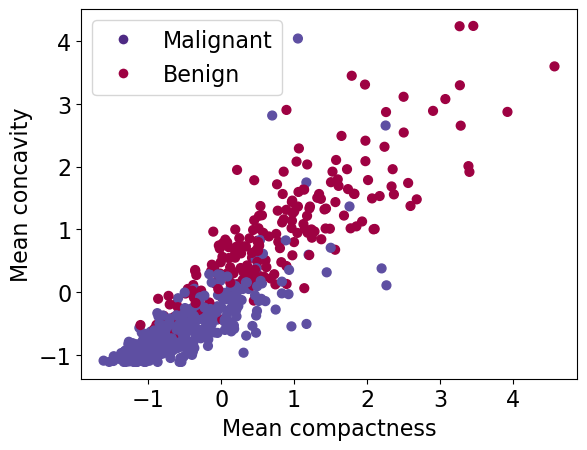

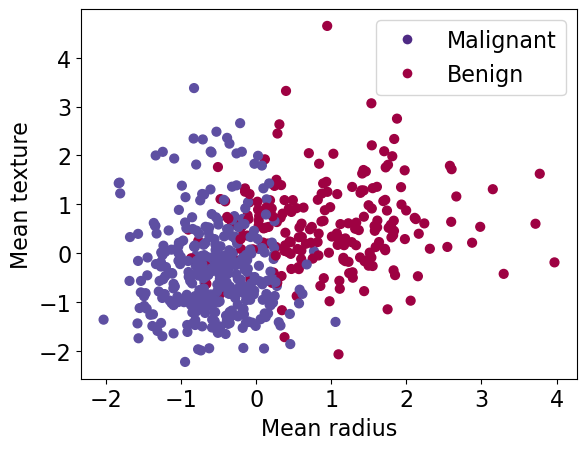

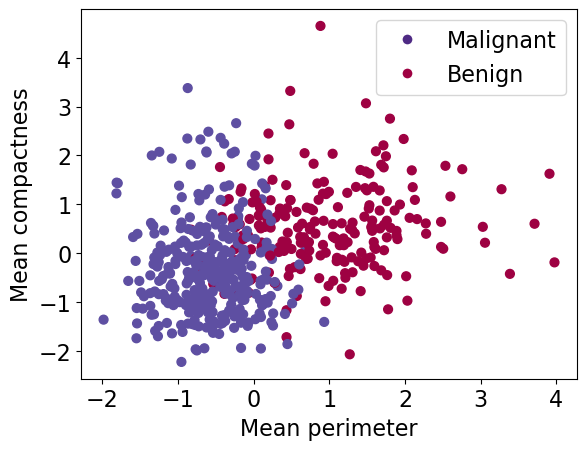

In [2]:
fontsize = 16

plt.figure()
plt.scatter(x[:,0],x[:,2],s=40,c=y,cmap=plt.cm.Spectral)
plt.xlabel('Mean radius', fontsize = fontsize)
plt.ylabel('Mean perimeter', fontsize = fontsize)
plt.tick_params(axis='both', labelsize=fontsize)
legend1 = plt.Line2D([0], [0], marker='o', color='w', label='Malignant', markersize=8, markerfacecolor='#4E2A84')
legend2 = plt.Line2D([0], [0], marker='o', color='w', label='Benign', markersize=8, markerfacecolor='#9E0142')
plt.legend(handles=[legend1, legend2], fontsize = fontsize)
plt.savefig('CancerRP.pdf', format='pdf', bbox_inches="tight")
plt.show()

plt.figure()
plt.scatter(x[:,5],x[:,6],s=40,c=y, cmap=plt.cm.Spectral)
plt.xlabel('Mean compactness', fontsize = fontsize)
plt.ylabel('Mean concavity', fontsize = fontsize)
plt.tick_params(axis='both', labelsize=fontsize)
plt.legend(handles=[legend1, legend2], fontsize = fontsize)
plt.savefig('CancerCC.pdf', format='pdf', bbox_inches="tight")
plt.show()

plt.figure()
plt.scatter(x[:,0],x[:,1],s=40,c=y,cmap=plt.cm.Spectral)
plt.xlabel('Mean radius', fontsize = fontsize)
plt.ylabel('Mean texture', fontsize = fontsize)
plt.tick_params(axis='both', labelsize=fontsize)
plt.legend(handles=[legend1, legend2], fontsize = fontsize)
plt.savefig('CancerRT.pdf', format='pdf', bbox_inches="tight")
plt.show()

plt.figure()
plt.scatter(x[:,2],x[:,1],s=40,c=y,cmap=plt.cm.Spectral)
plt.xlabel('Mean perimeter', fontsize = fontsize)
plt.ylabel('Mean compactness', fontsize = fontsize)
plt.tick_params(axis='both', labelsize=fontsize)
plt.legend(handles=[legend1, legend2], fontsize = fontsize)
plt.savefig('CancerPC.pdf', format='pdf', bbox_inches="tight")
plt.show()

## Correlation matrix

This code shows the correlation matrix for the different parameters in the data set.

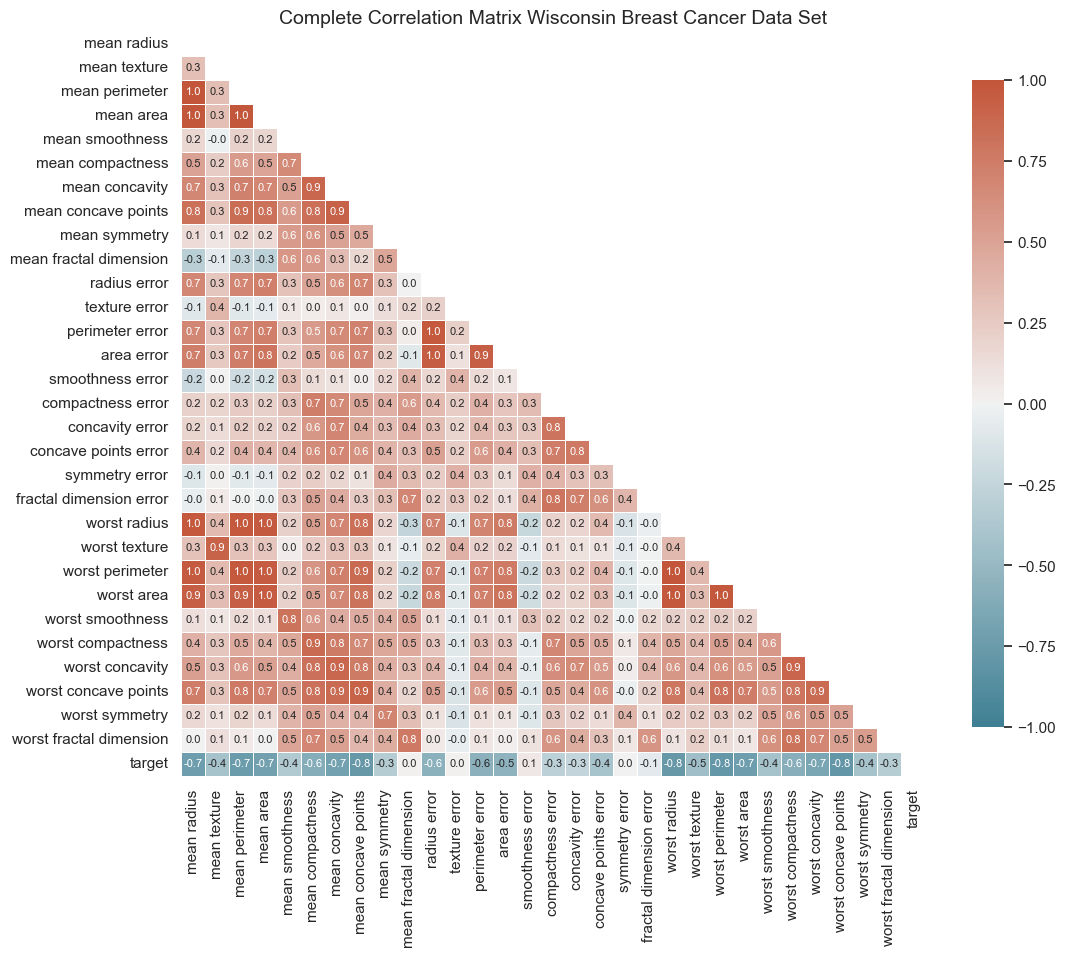

In [3]:
# Import the desired data
import pandas as pd
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
#selected_columns = ['mean texture', 'mean perimeter', 'mean compactness', 'mean symmetry']
df['target'] = data.target
corr_matrix = df.corr()
np.fill_diagonal(corr_matrix.values, 1)

# Plotting
fontsize = 14
annot_kws = {"size":8}
sns.set(style="white")
plt.figure(figsize=(12,12))
plt.title('Complete Correlation Matrix Wisconsin Breast Cancer Data Set', fontsize = fontsize)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7}, annot = True, fmt=".1f", annot_kws=annot_kws)
plt.savefig('completecorrelation.pdf', format='pdf', bbox_inches="tight")
plt.show()

# Classification using tensorflow/keras

This code shows the classification code using tensorflow. The code is largely based on the code from the lecture notes.

6/6 [==============================] - 0s 2ms/step - loss: 26.5836 - accuracy: 0.6316
Epoch 1/10
4/4 [==============================] - 0s 2ms/step - loss: 9.4713 - accuracy: 0.6256
Epoch 2/10
4/4 [==============================] - 0s 4ms/step - loss: 9.4313 - accuracy: 0.6256
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 9.3926 - accuracy: 0.6256
Epoch 4/10
4/4 [==============================] - 0s 2ms/step - loss: 9.3540 - accuracy: 0.6256
Epoch 5/10
4/4 [==============================] - 0s 3ms/step - loss: 9.3133 - accuracy: 0.6256
Epoch 6/10
4/4 [==============================] - 0s 2ms/step - loss: 9.2744 - accuracy: 0.6256
Epoch 7/10
4/4 [==============================] - 0s 3ms/step - loss: 9.2348 - accuracy: 0.6256
Epoch 8/10
4/4 [==============================] - 0s 3ms/step - loss: 9.1935 - accuracy: 0.6256
Epoch 9/10
4/4 [==============================] - 0s 3ms/step - loss: 9.1569 - accuracy: 0.6256
Epoch 10/10
6/6 [==============================] -

4/4 [==============================] - 0s 2ms/step - loss: 7.0225 - accuracy: 0.3744
Epoch 14/100
4/4 [==============================] - 0s 3ms/step - loss: 6.9801 - accuracy: 0.3744
Epoch 15/100
4/4 [==============================] - 0s 3ms/step - loss: 6.9363 - accuracy: 0.3744
Epoch 16/100
4/4 [==============================] - 0s 3ms/step - loss: 6.8939 - accuracy: 0.3744
Epoch 17/100
4/4 [==============================] - 0s 3ms/step - loss: 6.8510 - accuracy: 0.3744
Epoch 18/100
4/4 [==============================] - 0s 3ms/step - loss: 6.8088 - accuracy: 0.3744
Epoch 19/100
4/4 [==============================] - 0s 3ms/step - loss: 6.7656 - accuracy: 0.3744
Epoch 20/100
4/4 [==============================] - 0s 2ms/step - loss: 6.7231 - accuracy: 0.3744
Epoch 21/100
4/4 [==============================] - 0s 3ms/step - loss: 6.6805 - accuracy: 0.3744
Epoch 22/100
4/4 [==============================] - 0s 3ms/step - loss: 6.6381 - accuracy: 0.3744
Epoch 23/100
4/4 [===============

4/4 [==============================] - 0s 3ms/step - loss: 3.4736 - accuracy: 0.3744
Epoch 97/100
4/4 [==============================] - 0s 3ms/step - loss: 3.4304 - accuracy: 0.3744
Epoch 98/100
4/4 [==============================] - 0s 3ms/step - loss: 3.3877 - accuracy: 0.3744
Epoch 99/100
4/4 [==============================] - 0s 3ms/step - loss: 3.3449 - accuracy: 0.3744
Epoch 100/100
6/6 [==============================] - 0s 2ms/step - loss: 3.3779 - accuracy: 0.3684
Epoch 1/100
4/4 [==============================] - 0s 4ms/step - loss: 3.1754 - accuracy: 0.6256
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 2.7629 - accuracy: 0.6256
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 2.3287 - accuracy: 0.6256
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 1.9328 - accuracy: 0.6256
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 1.5640 - accuracy: 0.6256
Epoch 6/100
4/4 [====================

4/4 [==============================] - 0s 3ms/step - loss: 0.6601 - accuracy: 0.6910
Epoch 79/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6591 - accuracy: 0.6935
Epoch 80/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6585 - accuracy: 0.6935
Epoch 81/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.6960
Epoch 82/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6574 - accuracy: 0.6910
Epoch 83/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6565 - accuracy: 0.6935
Epoch 84/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6560 - accuracy: 0.6960
Epoch 85/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6558 - accuracy: 0.6960
Epoch 86/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6550 - accuracy: 0.6935
Epoch 87/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6546 - accuracy: 0.6985
Epoch 88/100
4/4 [===============

4/4 [==============================] - 0s 4ms/step - loss: 0.5934 - accuracy: 0.7261
Epoch 61/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5840 - accuracy: 0.7161
Epoch 62/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5845 - accuracy: 0.7387
Epoch 63/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5860 - accuracy: 0.7261
Epoch 64/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5806 - accuracy: 0.7362
Epoch 65/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5784 - accuracy: 0.7261
Epoch 66/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5783 - accuracy: 0.7261
Epoch 67/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5783 - accuracy: 0.7437
Epoch 68/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5743 - accuracy: 0.7337
Epoch 69/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5756 - accuracy: 0.7236
Epoch 70/100
4/4 [===============

4/4 [==============================] - 0s 3ms/step - loss: 0.4549 - accuracy: 0.8065
Epoch 43/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4476 - accuracy: 0.7965
Epoch 44/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4660 - accuracy: 0.7915
Epoch 45/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4560 - accuracy: 0.8191
Epoch 46/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4418 - accuracy: 0.8367
Epoch 47/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4724 - accuracy: 0.7990
Epoch 48/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5185 - accuracy: 0.7362
Epoch 49/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5680 - accuracy: 0.6884
Epoch 50/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6417 - accuracy: 0.7136
Epoch 51/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6282 - accuracy: 0.7085
Epoch 52/100
4/4 [===============

4/4 [==============================] - 0s 3ms/step - loss: 0.8744 - accuracy: 0.6256
Epoch 25/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8671 - accuracy: 0.6256
Epoch 26/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8603 - accuracy: 0.6256
Epoch 27/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8545 - accuracy: 0.6256
Epoch 28/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8511 - accuracy: 0.6256
Epoch 29/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8487 - accuracy: 0.6256
Epoch 30/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8450 - accuracy: 0.6256
Epoch 31/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8405 - accuracy: 0.6256
Epoch 32/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8349 - accuracy: 0.6256
Epoch 33/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8295 - accuracy: 0.6256
Epoch 34/100
4/4 [===============

Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 5.4300 - accuracy: 0.3744
Epoch 7/1000
4/4 [==============================] - 0s 3ms/step - loss: 5.3870 - accuracy: 0.3744
Epoch 8/1000
4/4 [==============================] - 0s 2ms/step - loss: 5.3443 - accuracy: 0.3744
Epoch 9/1000
4/4 [==============================] - 0s 3ms/step - loss: 5.3009 - accuracy: 0.3744
Epoch 10/1000
4/4 [==============================] - 0s 4ms/step - loss: 5.2590 - accuracy: 0.3744
Epoch 11/1000
4/4 [==============================] - 0s 3ms/step - loss: 5.2153 - accuracy: 0.3744
Epoch 12/1000
4/4 [==============================] - 0s 3ms/step - loss: 5.1716 - accuracy: 0.3744
Epoch 13/1000
4/4 [==============================] - 0s 3ms/step - loss: 5.1298 - accuracy: 0.3744
Epoch 14/1000
4/4 [==============================] - 0s 4ms/step - loss: 5.0859 - accuracy: 0.3744
Epoch 15/1000
4/4 [==============================] - 0s 3ms/step - loss: 5.0433 - accuracy: 0.3744
Epoch 16/1000


4/4 [==============================] - 0s 3ms/step - loss: 2.0086 - accuracy: 0.3844
Epoch 89/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.9719 - accuracy: 0.3894
Epoch 90/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.9370 - accuracy: 0.3894
Epoch 91/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.9010 - accuracy: 0.3920
Epoch 92/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.8660 - accuracy: 0.3945
Epoch 93/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.8321 - accuracy: 0.3970
Epoch 94/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.7984 - accuracy: 0.3970
Epoch 95/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.7642 - accuracy: 0.4045
Epoch 96/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.7312 - accuracy: 0.4070
Epoch 97/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.6984 - accuracy: 0.4121
Epoch 98/1000
4/4 [=====

4/4 [==============================] - 0s 3ms/step - loss: 0.6981 - accuracy: 0.6508
Epoch 171/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6968 - accuracy: 0.6558
Epoch 172/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.6558
Epoch 173/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.6558
Epoch 174/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.6583
Epoch 175/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.6583
Epoch 176/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.6583
Epoch 177/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.6558
Epoch 178/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.6608
Epoch 179/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.6608
Epoch 180/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.6798 - accuracy: 0.6834
Epoch 253/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6798 - accuracy: 0.6834
Epoch 254/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6797 - accuracy: 0.6834
Epoch 255/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6797 - accuracy: 0.6834
Epoch 256/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.6834
Epoch 257/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6796 - accuracy: 0.6834
Epoch 258/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6796 - accuracy: 0.6834
Epoch 259/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6795 - accuracy: 0.6859
Epoch 260/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6795 - accuracy: 0.6859
Epoch 261/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6795 - accuracy: 0.6859
Epoch 262/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.6765 - accuracy: 0.6884
Epoch 335/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6764 - accuracy: 0.6884
Epoch 336/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6764 - accuracy: 0.6884
Epoch 337/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6763 - accuracy: 0.6884
Epoch 338/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6763 - accuracy: 0.6884
Epoch 339/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6763 - accuracy: 0.6884
Epoch 340/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.6884
Epoch 341/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6762 - accuracy: 0.6884
Epoch 342/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6761 - accuracy: 0.6884
Epoch 343/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6761 - accuracy: 0.6884
Epoch 344/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.6730 - accuracy: 0.6910
Epoch 417/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6729 - accuracy: 0.6910
Epoch 418/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6729 - accuracy: 0.6910
Epoch 419/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.6728 - accuracy: 0.6910
Epoch 420/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6728 - accuracy: 0.6910
Epoch 421/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6728 - accuracy: 0.6910
Epoch 422/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6727 - accuracy: 0.6910
Epoch 423/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6727 - accuracy: 0.6910
Epoch 424/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6726 - accuracy: 0.6910
Epoch 425/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6726 - accuracy: 0.6910
Epoch 426/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.6695 - accuracy: 0.6935
Epoch 499/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6695 - accuracy: 0.6935
Epoch 500/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6694 - accuracy: 0.6935
Epoch 501/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6694 - accuracy: 0.6935
Epoch 502/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6693 - accuracy: 0.6935
Epoch 503/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.6935
Epoch 504/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.6935
Epoch 505/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6692 - accuracy: 0.6935
Epoch 506/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6692 - accuracy: 0.6935
Epoch 507/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6691 - accuracy: 0.6935
Epoch 508/1000


4/4 [==============================] - 0s 4ms/step - loss: 0.6660 - accuracy: 0.6935
Epoch 581/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6660 - accuracy: 0.6935
Epoch 582/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6660 - accuracy: 0.6935
Epoch 583/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6659 - accuracy: 0.6935
Epoch 584/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6659 - accuracy: 0.6935
Epoch 585/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6658 - accuracy: 0.6935
Epoch 586/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6658 - accuracy: 0.6935
Epoch 587/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6658 - accuracy: 0.6935
Epoch 588/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6657 - accuracy: 0.6935
Epoch 589/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6656 - accuracy: 0.6935
Epoch 590/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.6622 - accuracy: 0.6935
Epoch 663/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.6622 - accuracy: 0.6935
Epoch 664/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.6621 - accuracy: 0.6935
Epoch 665/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.6621 - accuracy: 0.6935
Epoch 666/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.6620 - accuracy: 0.6935
Epoch 667/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6620 - accuracy: 0.6935
Epoch 668/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6620 - accuracy: 0.6935
Epoch 669/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6619 - accuracy: 0.6935
Epoch 670/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6619 - accuracy: 0.6935
Epoch 671/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6618 - accuracy: 0.6935
Epoch 672/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.6585 - accuracy: 0.6935
Epoch 745/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6584 - accuracy: 0.6935
Epoch 746/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6584 - accuracy: 0.6935
Epoch 747/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6584 - accuracy: 0.6935
Epoch 748/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6583 - accuracy: 0.6935
Epoch 749/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6582 - accuracy: 0.6935
Epoch 750/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6582 - accuracy: 0.6935
Epoch 751/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6582 - accuracy: 0.6935
Epoch 752/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.6581 - accuracy: 0.6935
Epoch 753/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6581 - accuracy: 0.6935
Epoch 754/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.6547 - accuracy: 0.6935
Epoch 827/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6547 - accuracy: 0.6935
Epoch 828/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6546 - accuracy: 0.6935
Epoch 829/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6546 - accuracy: 0.6935
Epoch 830/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.6960
Epoch 831/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.6935
Epoch 832/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6545 - accuracy: 0.6960
Epoch 833/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6544 - accuracy: 0.6960
Epoch 834/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6544 - accuracy: 0.6960
Epoch 835/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6543 - accuracy: 0.6960
Epoch 836/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.6512 - accuracy: 0.6960
Epoch 909/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6511 - accuracy: 0.6935
Epoch 910/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6511 - accuracy: 0.6960
Epoch 911/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6510 - accuracy: 0.6960
Epoch 912/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.6510 - accuracy: 0.6960
Epoch 913/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.6509 - accuracy: 0.6960
Epoch 914/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6509 - accuracy: 0.6960
Epoch 915/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6509 - accuracy: 0.6960
Epoch 916/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6508 - accuracy: 0.6960
Epoch 917/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6509 - accuracy: 0.6960
Epoch 918/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.6477 - accuracy: 0.7010
Epoch 991/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6476 - accuracy: 0.7010
Epoch 992/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6476 - accuracy: 0.6985
Epoch 993/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6476 - accuracy: 0.7010
Epoch 994/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6475 - accuracy: 0.7010
Epoch 995/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6475 - accuracy: 0.7010
Epoch 996/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6474 - accuracy: 0.6985
Epoch 997/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6474 - accuracy: 0.6985
Epoch 998/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6473 - accuracy: 0.7010
Epoch 999/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6473 - accuracy: 0.7010
Epoch 1000/1000

4/4 [==============================] - 0s 3ms/step - loss: 0.6733 - accuracy: 0.6834
Epoch 72/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6730 - accuracy: 0.6859
Epoch 73/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6728 - accuracy: 0.6859
Epoch 74/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6725 - accuracy: 0.6834
Epoch 75/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6724 - accuracy: 0.6859
Epoch 76/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.6859
Epoch 77/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6717 - accuracy: 0.6859
Epoch 78/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6714 - accuracy: 0.6859
Epoch 79/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6712 - accuracy: 0.6884
Epoch 80/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6708 - accuracy: 0.6884
Epoch 81/1000
4/4 [=====

4/4 [==============================] - 0s 3ms/step - loss: 0.6528 - accuracy: 0.6935
Epoch 154/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6529 - accuracy: 0.6935
Epoch 155/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6521 - accuracy: 0.6910
Epoch 156/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6518 - accuracy: 0.6935
Epoch 157/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6517 - accuracy: 0.6884
Epoch 158/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.6515 - accuracy: 0.6884
Epoch 159/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6511 - accuracy: 0.6884
Epoch 160/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6510 - accuracy: 0.6884
Epoch 161/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6508 - accuracy: 0.6910
Epoch 162/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6859
Epoch 163/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.6345 - accuracy: 0.7010
Epoch 236/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.6340 - accuracy: 0.6960
Epoch 237/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6332 - accuracy: 0.6935
Epoch 238/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.6334 - accuracy: 0.6960
Epoch 239/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6327 - accuracy: 0.7010
Epoch 240/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6326 - accuracy: 0.6960
Epoch 241/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6324 - accuracy: 0.6960
Epoch 242/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6322 - accuracy: 0.6960
Epoch 243/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6318 - accuracy: 0.6960
Epoch 244/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6317 - accuracy: 0.6985
Epoch 245/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.6165 - accuracy: 0.7111
Epoch 318/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6159 - accuracy: 0.7136
Epoch 319/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6160 - accuracy: 0.7085
Epoch 320/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6162 - accuracy: 0.7111
Epoch 321/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6155 - accuracy: 0.7085
Epoch 322/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6151 - accuracy: 0.7085
Epoch 323/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.6149 - accuracy: 0.7111
Epoch 324/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6147 - accuracy: 0.7136
Epoch 325/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6146 - accuracy: 0.7161
Epoch 326/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6144 - accuracy: 0.7161
Epoch 327/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.5998 - accuracy: 0.7186
Epoch 400/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5996 - accuracy: 0.7161
Epoch 401/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.5992 - accuracy: 0.7211
Epoch 402/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5990 - accuracy: 0.7236
Epoch 403/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5992 - accuracy: 0.7186
Epoch 404/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5989 - accuracy: 0.7161
Epoch 405/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5986 - accuracy: 0.7211
Epoch 406/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5985 - accuracy: 0.7186
Epoch 407/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5981 - accuracy: 0.7211
Epoch 408/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5979 - accuracy: 0.7211
Epoch 409/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.5843 - accuracy: 0.7286
Epoch 482/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5833 - accuracy: 0.7261
Epoch 483/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.5832 - accuracy: 0.7337
Epoch 484/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5829 - accuracy: 0.7286
Epoch 485/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5827 - accuracy: 0.7286
Epoch 486/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5829 - accuracy: 0.7286
Epoch 487/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5826 - accuracy: 0.7236
Epoch 488/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5821 - accuracy: 0.7312
Epoch 489/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5818 - accuracy: 0.7286
Epoch 490/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.5819 - accuracy: 0.7261
Epoch 491/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.5674 - accuracy: 0.7437
Epoch 564/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5674 - accuracy: 0.7412
Epoch 565/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5669 - accuracy: 0.7487
Epoch 566/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5670 - accuracy: 0.7462
Epoch 567/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5664 - accuracy: 0.7437
Epoch 568/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5660 - accuracy: 0.7437
Epoch 569/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5669 - accuracy: 0.7462
Epoch 570/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5657 - accuracy: 0.7437
Epoch 571/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.5654 - accuracy: 0.7437
Epoch 572/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5651 - accuracy: 0.7462
Epoch 573/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.5495 - accuracy: 0.7638
Epoch 646/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5492 - accuracy: 0.7638
Epoch 647/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5491 - accuracy: 0.7588
Epoch 648/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5495 - accuracy: 0.7563
Epoch 649/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5487 - accuracy: 0.7613
Epoch 650/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5485 - accuracy: 0.7638
Epoch 651/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5484 - accuracy: 0.7613
Epoch 652/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5484 - accuracy: 0.7663
Epoch 653/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.5490 - accuracy: 0.7588
Epoch 654/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5476 - accuracy: 0.7563
Epoch 655/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.5319 - accuracy: 0.7739
Epoch 728/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5315 - accuracy: 0.7789
Epoch 729/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5326 - accuracy: 0.7739
Epoch 730/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5317 - accuracy: 0.7839
Epoch 731/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.5306 - accuracy: 0.7814
Epoch 732/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5303 - accuracy: 0.7789
Epoch 733/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5304 - accuracy: 0.7789
Epoch 734/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5302 - accuracy: 0.7764
Epoch 735/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5299 - accuracy: 0.7839
Epoch 736/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5301 - accuracy: 0.7814
Epoch 737/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.5140 - accuracy: 0.8116
Epoch 810/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5138 - accuracy: 0.8090
Epoch 811/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5132 - accuracy: 0.8040
Epoch 812/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5137 - accuracy: 0.8015
Epoch 813/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.5131 - accuracy: 0.8065
Epoch 814/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5127 - accuracy: 0.8090
Epoch 815/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5124 - accuracy: 0.8090
Epoch 816/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5121 - accuracy: 0.8090
Epoch 817/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.5120 - accuracy: 0.8065
Epoch 818/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.5121 - accuracy: 0.8040
Epoch 819/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.4964 - accuracy: 0.8241
Epoch 892/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4964 - accuracy: 0.8216
Epoch 893/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4954 - accuracy: 0.8241
Epoch 894/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4953 - accuracy: 0.8191
Epoch 895/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4950 - accuracy: 0.8216
Epoch 896/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4949 - accuracy: 0.8241
Epoch 897/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4977 - accuracy: 0.8191
Epoch 898/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4946 - accuracy: 0.8241
Epoch 899/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4942 - accuracy: 0.8291
Epoch 900/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4948 - accuracy: 0.8216
Epoch 901/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.4781 - accuracy: 0.8417
Epoch 974/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4777 - accuracy: 0.8442
Epoch 975/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.4796 - accuracy: 0.8342
Epoch 976/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4777 - accuracy: 0.8367
Epoch 977/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4797 - accuracy: 0.8342
Epoch 978/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4782 - accuracy: 0.8392
Epoch 979/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4786 - accuracy: 0.8291
Epoch 980/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.8241
Epoch 981/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4763 - accuracy: 0.8442
Epoch 982/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4768 - accuracy: 0.8392
Epoch 983/1000


Epoch 54/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5655 - accuracy: 0.7538
Epoch 55/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5634 - accuracy: 0.7462
Epoch 56/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5654 - accuracy: 0.7462
Epoch 57/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5729 - accuracy: 0.7588
Epoch 58/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5743 - accuracy: 0.7286
Epoch 59/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5722 - accuracy: 0.7513
Epoch 60/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5704 - accuracy: 0.7387
Epoch 61/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5627 - accuracy: 0.7487
Epoch 62/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5598 - accuracy: 0.7588
Epoch 63/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5672 - accuracy: 0.7538
Epoch 64/1

4/4 [==============================] - 0s 4ms/step - loss: 0.4527 - accuracy: 0.8266
Epoch 137/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.4472 - accuracy: 0.8417
Epoch 138/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.4419 - accuracy: 0.8442
Epoch 139/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.4522 - accuracy: 0.8266
Epoch 140/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.4461 - accuracy: 0.8392
Epoch 141/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.4614 - accuracy: 0.8065
Epoch 142/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.4530 - accuracy: 0.8291
Epoch 143/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.4404 - accuracy: 0.8392
Epoch 144/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.4414 - accuracy: 0.8518
Epoch 145/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4380 - accuracy: 0.8467
Epoch 146/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.3507 - accuracy: 0.8945
Epoch 219/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3537 - accuracy: 0.8844
Epoch 220/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3608 - accuracy: 0.8794
Epoch 221/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3648 - accuracy: 0.8643
Epoch 222/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3575 - accuracy: 0.8844
Epoch 223/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3455 - accuracy: 0.8894
Epoch 224/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3487 - accuracy: 0.8869
Epoch 225/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3517 - accuracy: 0.8844
Epoch 226/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3426 - accuracy: 0.9020
Epoch 227/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3438 - accuracy: 0.8995
Epoch 228/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.3017 - accuracy: 0.9095
Epoch 301/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2992 - accuracy: 0.8970
Epoch 302/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3024 - accuracy: 0.9020
Epoch 303/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3118 - accuracy: 0.8995
Epoch 304/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2921 - accuracy: 0.9020
Epoch 305/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2934 - accuracy: 0.8970
Epoch 306/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2908 - accuracy: 0.9146
Epoch 307/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2867 - accuracy: 0.9095
Epoch 308/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2895 - accuracy: 0.8995
Epoch 309/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2877 - accuracy: 0.9020
Epoch 310/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.2719 - accuracy: 0.9020
Epoch 383/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2753 - accuracy: 0.9095
Epoch 384/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2743 - accuracy: 0.9070
Epoch 385/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2556 - accuracy: 0.9121
Epoch 386/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2599 - accuracy: 0.9121
Epoch 387/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2525 - accuracy: 0.9146
Epoch 388/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2604 - accuracy: 0.9146
Epoch 389/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2569 - accuracy: 0.9121
Epoch 390/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2552 - accuracy: 0.9121
Epoch 391/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2547 - accuracy: 0.9121
Epoch 392/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.2466 - accuracy: 0.9246
Epoch 465/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2452 - accuracy: 0.9121
Epoch 466/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2525 - accuracy: 0.9020
Epoch 467/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2562 - accuracy: 0.9246
Epoch 468/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2546 - accuracy: 0.9121
Epoch 469/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2474 - accuracy: 0.9171
Epoch 470/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2452 - accuracy: 0.9095
Epoch 471/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2435 - accuracy: 0.9171
Epoch 472/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2439 - accuracy: 0.9070
Epoch 473/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2687 - accuracy: 0.8970
Epoch 474/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.2288 - accuracy: 0.9121
Epoch 547/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2288 - accuracy: 0.9171
Epoch 548/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2319 - accuracy: 0.9221
Epoch 549/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2358 - accuracy: 0.9171
Epoch 550/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2305 - accuracy: 0.9121
Epoch 551/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2280 - accuracy: 0.9146
Epoch 552/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2279 - accuracy: 0.9146
Epoch 553/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2276 - accuracy: 0.9171
Epoch 554/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2354 - accuracy: 0.9146
Epoch 555/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2365 - accuracy: 0.9221
Epoch 556/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.2406 - accuracy: 0.9146
Epoch 629/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2451 - accuracy: 0.9020
Epoch 630/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2282 - accuracy: 0.9221
Epoch 631/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2393 - accuracy: 0.9095
Epoch 632/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2506 - accuracy: 0.9070
Epoch 633/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2373 - accuracy: 0.9171
Epoch 634/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2313 - accuracy: 0.9196
Epoch 635/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2283 - accuracy: 0.9196
Epoch 636/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2268 - accuracy: 0.9146
Epoch 637/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2250 - accuracy: 0.9196
Epoch 638/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.2269 - accuracy: 0.9171
Epoch 711/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2235 - accuracy: 0.9271
Epoch 712/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2232 - accuracy: 0.9171
Epoch 713/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2212 - accuracy: 0.9196
Epoch 714/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2255 - accuracy: 0.9146
Epoch 715/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2208 - accuracy: 0.9246
Epoch 716/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2301 - accuracy: 0.9171
Epoch 717/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2236 - accuracy: 0.9221
Epoch 718/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2244 - accuracy: 0.9196
Epoch 719/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2195 - accuracy: 0.9171
Epoch 720/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.2302 - accuracy: 0.9221
Epoch 793/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2320 - accuracy: 0.9121
Epoch 794/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2515 - accuracy: 0.8945
Epoch 795/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2453 - accuracy: 0.9045
Epoch 796/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2237 - accuracy: 0.9221
Epoch 797/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2189 - accuracy: 0.9146
Epoch 798/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2257 - accuracy: 0.9196
Epoch 799/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2475 - accuracy: 0.9020
Epoch 800/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2352 - accuracy: 0.9095
Epoch 801/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2292 - accuracy: 0.9171
Epoch 802/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.2253 - accuracy: 0.9171
Epoch 875/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2182 - accuracy: 0.9221
Epoch 876/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2225 - accuracy: 0.9221
Epoch 877/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2459 - accuracy: 0.9171
Epoch 878/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2509 - accuracy: 0.9020
Epoch 879/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2415 - accuracy: 0.9171
Epoch 880/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2602 - accuracy: 0.8920
Epoch 881/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2649 - accuracy: 0.8970
Epoch 882/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2391 - accuracy: 0.9070
Epoch 883/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2227 - accuracy: 0.9221
Epoch 884/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.2198 - accuracy: 0.9271
Epoch 957/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2366 - accuracy: 0.9196
Epoch 958/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2185 - accuracy: 0.9246
Epoch 959/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2128 - accuracy: 0.9196
Epoch 960/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2322 - accuracy: 0.9146
Epoch 961/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2541 - accuracy: 0.8970
Epoch 962/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2335 - accuracy: 0.9171
Epoch 963/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2165 - accuracy: 0.9171
Epoch 964/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2112 - accuracy: 0.9221
Epoch 965/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2160 - accuracy: 0.9221
Epoch 966/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.5111 - accuracy: 0.7889
Epoch 37/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4774 - accuracy: 0.8241
Epoch 38/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4760 - accuracy: 0.8216
Epoch 39/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4552 - accuracy: 0.8392
Epoch 40/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4520 - accuracy: 0.8442
Epoch 41/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4461 - accuracy: 0.8543
Epoch 42/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4547 - accuracy: 0.8266
Epoch 43/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4591 - accuracy: 0.8266
Epoch 44/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4442 - accuracy: 0.8266
Epoch 45/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4714 - accuracy: 0.8065
Epoch 46/1000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 0.2782 - accuracy: 0.9070
Epoch 119/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2773 - accuracy: 0.8945
Epoch 120/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2810 - accuracy: 0.8920
Epoch 121/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2709 - accuracy: 0.8945
Epoch 122/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2803 - accuracy: 0.9045
Epoch 123/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2876 - accuracy: 0.8945
Epoch 124/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3154 - accuracy: 0.8819
Epoch 125/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2944 - accuracy: 0.8869
Epoch 126/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2683 - accuracy: 0.9070
Epoch 127/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2540 - accuracy: 0.9171
Epoch 128/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.2490 - accuracy: 0.9121
Epoch 201/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2280 - accuracy: 0.9171
Epoch 202/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2303 - accuracy: 0.9121
Epoch 203/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2411 - accuracy: 0.8995
Epoch 204/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2316 - accuracy: 0.9095
Epoch 205/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2378 - accuracy: 0.9095
Epoch 206/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2510 - accuracy: 0.9070
Epoch 207/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2771 - accuracy: 0.8970
Epoch 208/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2717 - accuracy: 0.8945
Epoch 209/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3193 - accuracy: 0.8769
Epoch 210/1000


4/4 [==============================] - 0s 4ms/step - loss: 0.3017 - accuracy: 0.8794
Epoch 283/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4093 - accuracy: 0.8241
Epoch 284/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.4177 - accuracy: 0.8342
Epoch 285/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3488 - accuracy: 0.8518
Epoch 286/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3158 - accuracy: 0.8643
Epoch 287/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3130 - accuracy: 0.8769
Epoch 288/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3098 - accuracy: 0.8794
Epoch 289/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2497 - accuracy: 0.9020
Epoch 290/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2350 - accuracy: 0.9121
Epoch 291/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2206 - accuracy: 0.9196
Epoch 292/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.2846 - accuracy: 0.8869
Epoch 365/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2620 - accuracy: 0.8945
Epoch 366/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3569 - accuracy: 0.8593
Epoch 367/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3067 - accuracy: 0.8920
Epoch 368/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2788 - accuracy: 0.9020
Epoch 369/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2703 - accuracy: 0.8794
Epoch 370/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3155 - accuracy: 0.8618
Epoch 371/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2703 - accuracy: 0.8945
Epoch 372/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2269 - accuracy: 0.9146
Epoch 373/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2255 - accuracy: 0.9246
Epoch 374/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.2323 - accuracy: 0.9045
Epoch 447/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2261 - accuracy: 0.9221
Epoch 448/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2479 - accuracy: 0.9070
Epoch 449/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2510 - accuracy: 0.9070
Epoch 450/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2252 - accuracy: 0.9246
Epoch 451/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2211 - accuracy: 0.9070
Epoch 452/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2265 - accuracy: 0.9196
Epoch 453/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2703 - accuracy: 0.9095
Epoch 454/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2700 - accuracy: 0.9070
Epoch 455/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2844 - accuracy: 0.8643
Epoch 456/1000


4/4 [==============================] - 0s 4ms/step - loss: 0.2268 - accuracy: 0.9146
Epoch 529/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2358 - accuracy: 0.9020
Epoch 530/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2675 - accuracy: 0.8970
Epoch 531/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2447 - accuracy: 0.9171
Epoch 532/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2407 - accuracy: 0.9045
Epoch 533/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2317 - accuracy: 0.9070
Epoch 534/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2618 - accuracy: 0.8844
Epoch 535/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2386 - accuracy: 0.9246
Epoch 536/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2150 - accuracy: 0.9246
Epoch 537/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2181 - accuracy: 0.9171
Epoch 538/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.2128 - accuracy: 0.9171
Epoch 611/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2378 - accuracy: 0.9171
Epoch 612/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2434 - accuracy: 0.9070
Epoch 613/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2481 - accuracy: 0.9045
Epoch 614/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2219 - accuracy: 0.9121
Epoch 615/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2447 - accuracy: 0.8995
Epoch 616/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2213 - accuracy: 0.9070
Epoch 617/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2198 - accuracy: 0.9246
Epoch 618/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2242 - accuracy: 0.9146
Epoch 619/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2170 - accuracy: 0.9146
Epoch 620/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.2514 - accuracy: 0.9020
Epoch 693/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2250 - accuracy: 0.9045
Epoch 694/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2344 - accuracy: 0.9146
Epoch 695/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2705 - accuracy: 0.8744
Epoch 696/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3243 - accuracy: 0.8693
Epoch 697/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2873 - accuracy: 0.8744
Epoch 698/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2484 - accuracy: 0.9020
Epoch 699/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3078 - accuracy: 0.8794
Epoch 700/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2499 - accuracy: 0.8920
Epoch 701/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2399 - accuracy: 0.9070
Epoch 702/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.2293 - accuracy: 0.9020
Epoch 775/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2122 - accuracy: 0.9171
Epoch 776/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2174 - accuracy: 0.9221
Epoch 777/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2301 - accuracy: 0.9045
Epoch 778/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2353 - accuracy: 0.9070
Epoch 779/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2184 - accuracy: 0.9246
Epoch 780/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2192 - accuracy: 0.9070
Epoch 781/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2384 - accuracy: 0.9045
Epoch 782/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2273 - accuracy: 0.9070
Epoch 783/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2274 - accuracy: 0.9196
Epoch 784/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.2221 - accuracy: 0.9146
Epoch 857/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2119 - accuracy: 0.9322
Epoch 858/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2188 - accuracy: 0.9146
Epoch 859/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2162 - accuracy: 0.9171
Epoch 860/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2321 - accuracy: 0.9045
Epoch 861/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2139 - accuracy: 0.9095
Epoch 862/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2115 - accuracy: 0.9196
Epoch 863/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2352 - accuracy: 0.9095
Epoch 864/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2426 - accuracy: 0.9020
Epoch 865/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2143 - accuracy: 0.9221
Epoch 866/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.2383 - accuracy: 0.9070
Epoch 939/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2336 - accuracy: 0.9020
Epoch 940/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2098 - accuracy: 0.9171
Epoch 941/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2154 - accuracy: 0.9246
Epoch 942/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2222 - accuracy: 0.9246
Epoch 943/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2139 - accuracy: 0.9146
Epoch 944/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2089 - accuracy: 0.9146
Epoch 945/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2327 - accuracy: 0.9146
Epoch 946/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2402 - accuracy: 0.9045
Epoch 947/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2200 - accuracy: 0.9171
Epoch 948/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.9721 - accuracy: 0.6256
Epoch 19/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.9631 - accuracy: 0.6256
Epoch 20/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.9543 - accuracy: 0.6256
Epoch 21/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.9461 - accuracy: 0.6256
Epoch 22/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.9373 - accuracy: 0.6256
Epoch 23/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.9286 - accuracy: 0.6256
Epoch 24/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.9200 - accuracy: 0.6256
Epoch 25/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.9115 - accuracy: 0.6256
Epoch 26/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.9033 - accuracy: 0.6256
Epoch 27/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.8956 - accuracy: 0.6256
Epoch 28/1000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.6256
Epoch 101/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.6256
Epoch 102/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.6256
Epoch 103/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.6256
Epoch 104/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.6256
Epoch 105/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.6256
Epoch 106/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.6256
Epoch 107/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.6256
Epoch 108/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.6256
Epoch 109/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.6256
Epoch 110/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 0.6256
Epoch 183/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.6256
Epoch 184/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.6256
Epoch 185/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.6256
Epoch 186/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.6256
Epoch 187/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.6256
Epoch 188/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.6256
Epoch 189/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.6256
Epoch 190/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6687 - accuracy: 0.6256
Epoch 191/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.6673 - accuracy: 0.6256
Epoch 192/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.6256
Epoch 265/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6634 - accuracy: 0.6256
Epoch 266/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6635 - accuracy: 0.6256
Epoch 267/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6638 - accuracy: 0.6256
Epoch 268/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6640 - accuracy: 0.6256
Epoch 269/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6637 - accuracy: 0.6256
Epoch 270/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.6256
Epoch 271/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.6256
Epoch 272/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6638 - accuracy: 0.6256
Epoch 273/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6634 - accuracy: 0.6256
Epoch 274/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.6644 - accuracy: 0.6256
Epoch 347/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.6256
Epoch 348/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6634 - accuracy: 0.6256
Epoch 349/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.6256
Epoch 350/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.6256
Epoch 351/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.6256
Epoch 352/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6622 - accuracy: 0.6256
Epoch 353/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.6256
Epoch 354/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 0.6256
Epoch 355/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6621 - accuracy: 0.6256
Epoch 356/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.6256
Epoch 429/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.6256
Epoch 430/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.6256
Epoch 431/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.6256
Epoch 432/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.6256
Epoch 433/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6639 - accuracy: 0.6256
Epoch 434/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6613 - accuracy: 0.6256
Epoch 435/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.6256
Epoch 436/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.6256
Epoch 437/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.6256
Epoch 438/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.6617 - accuracy: 0.6256
Epoch 511/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.6256
Epoch 512/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.6256
Epoch 513/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.6256
Epoch 514/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6632 - accuracy: 0.6256
Epoch 515/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 0.6256
Epoch 516/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6621 - accuracy: 0.6256
Epoch 517/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.6256
Epoch 518/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.6256
Epoch 519/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6623 - accuracy: 0.6256
Epoch 520/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.6256
Epoch 593/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.6256
Epoch 594/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.6256
Epoch 595/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6619 - accuracy: 0.6256
Epoch 596/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 0.6256
Epoch 597/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.6256
Epoch 598/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6622 - accuracy: 0.6256
Epoch 599/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6614 - accuracy: 0.6256
Epoch 600/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6621 - accuracy: 0.6256
Epoch 601/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6625 - accuracy: 0.6256
Epoch 602/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.6635 - accuracy: 0.6256
Epoch 675/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.6256
Epoch 676/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6619 - accuracy: 0.6256
Epoch 677/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6625 - accuracy: 0.6256
Epoch 678/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.6256
Epoch 679/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.6256
Epoch 680/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6622 - accuracy: 0.6256
Epoch 681/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6617 - accuracy: 0.6256
Epoch 682/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.6256
Epoch 683/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6614 - accuracy: 0.6256
Epoch 684/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.6619 - accuracy: 0.6256
Epoch 757/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.6256
Epoch 758/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6613 - accuracy: 0.6256
Epoch 759/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.6256
Epoch 760/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.6256
Epoch 761/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.6256
Epoch 762/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6623 - accuracy: 0.6256
Epoch 763/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6614 - accuracy: 0.6256
Epoch 764/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6634 - accuracy: 0.6256
Epoch 765/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.6256
Epoch 766/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.6256
Epoch 839/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6609 - accuracy: 0.6256
Epoch 840/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6623 - accuracy: 0.6256
Epoch 841/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.6256
Epoch 842/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6612 - accuracy: 0.6256
Epoch 843/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.6256
Epoch 844/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6623 - accuracy: 0.6256
Epoch 845/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6636 - accuracy: 0.6256
Epoch 846/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.6256
Epoch 847/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6625 - accuracy: 0.6256
Epoch 848/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.6256
Epoch 921/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6623 - accuracy: 0.6256
Epoch 922/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6614 - accuracy: 0.6256
Epoch 923/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6614 - accuracy: 0.6256
Epoch 924/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6642 - accuracy: 0.6256
Epoch 925/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6635 - accuracy: 0.6256
Epoch 926/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6619 - accuracy: 0.6256
Epoch 927/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6610 - accuracy: 0.6256
Epoch 928/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6622 - accuracy: 0.6256
Epoch 929/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6619 - accuracy: 0.6256
Epoch 930/1000


6/6 [==============================] - 0s 2ms/step - loss: 0.6584 - accuracy: 0.6316
Epoch 1/10000
4/4 [==============================] - 0s 2ms/step - loss: 12.5995 - accuracy: 0.3744
Epoch 2/10000
4/4 [==============================] - 0s 2ms/step - loss: 12.5561 - accuracy: 0.3744
Epoch 3/10000
4/4 [==============================] - 0s 2ms/step - loss: 12.5140 - accuracy: 0.3744
Epoch 4/10000
4/4 [==============================] - 0s 2ms/step - loss: 12.4710 - accuracy: 0.3744
Epoch 5/10000
4/4 [==============================] - 0s 2ms/step - loss: 12.4283 - accuracy: 0.3744
Epoch 6/10000
4/4 [==============================] - 0s 2ms/step - loss: 12.3857 - accuracy: 0.3744
Epoch 7/10000
4/4 [==============================] - 0s 2ms/step - loss: 12.3432 - accuracy: 0.3744
Epoch 8/10000
4/4 [==============================] - 0s 2ms/step - loss: 12.3004 - accuracy: 0.3744
Epoch 9/10000
4/4 [==============================] - 0s 2ms/step - loss: 12.2571 - accuracy: 0.3744
Epoch 10/10000


4/4 [==============================] - 0s 3ms/step - loss: 9.2025 - accuracy: 0.3744
Epoch 82/10000
4/4 [==============================] - 0s 3ms/step - loss: 9.1600 - accuracy: 0.3744
Epoch 83/10000
4/4 [==============================] - 0s 3ms/step - loss: 9.1178 - accuracy: 0.3744
Epoch 84/10000
4/4 [==============================] - 0s 3ms/step - loss: 9.0748 - accuracy: 0.3744
Epoch 85/10000
4/4 [==============================] - 0s 3ms/step - loss: 9.0332 - accuracy: 0.3744
Epoch 86/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.9908 - accuracy: 0.3744
Epoch 87/10000
4/4 [==============================] - 0s 3ms/step - loss: 8.9484 - accuracy: 0.3744
Epoch 88/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.9063 - accuracy: 0.3744
Epoch 89/10000
4/4 [==============================] - 0s 3ms/step - loss: 8.8639 - accuracy: 0.3744
Epoch 90/10000
4/4 [==============================] - 0s 3ms/step - loss: 8.8216 - accuracy: 0.3744
Epoch 91/10000


4/4 [==============================] - 0s 4ms/step - loss: 5.7848 - accuracy: 0.3744
Epoch 163/10000
4/4 [==============================] - 0s 3ms/step - loss: 5.7433 - accuracy: 0.3744
Epoch 164/10000
4/4 [==============================] - 0s 3ms/step - loss: 5.7015 - accuracy: 0.3744
Epoch 165/10000
4/4 [==============================] - 0s 3ms/step - loss: 5.6586 - accuracy: 0.3744
Epoch 166/10000
4/4 [==============================] - 0s 2ms/step - loss: 5.6165 - accuracy: 0.3744
Epoch 167/10000
4/4 [==============================] - 0s 3ms/step - loss: 5.5736 - accuracy: 0.3744
Epoch 168/10000
4/4 [==============================] - 0s 3ms/step - loss: 5.5325 - accuracy: 0.3744
Epoch 169/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.4898 - accuracy: 0.3744
Epoch 170/10000
4/4 [==============================] - 0s 3ms/step - loss: 5.4475 - accuracy: 0.3744
Epoch 171/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.4064 - accuracy: 0.3744
Epoch 

4/4 [==============================] - 0s 3ms/step - loss: 2.4072 - accuracy: 0.3744
Epoch 244/10000
4/4 [==============================] - 0s 3ms/step - loss: 2.3675 - accuracy: 0.3744
Epoch 245/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3279 - accuracy: 0.3744
Epoch 246/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2888 - accuracy: 0.3744
Epoch 247/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2507 - accuracy: 0.3744
Epoch 248/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2108 - accuracy: 0.3744
Epoch 249/10000
4/4 [==============================] - 0s 3ms/step - loss: 2.1728 - accuracy: 0.3744
Epoch 250/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1347 - accuracy: 0.3744
Epoch 251/10000
4/4 [==============================] - 0s 3ms/step - loss: 2.0964 - accuracy: 0.3744
Epoch 252/10000
4/4 [==============================] - 0s 3ms/step - loss: 2.0587 - accuracy: 0.3744
Epoch 

4/4 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.6307
Epoch 325/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.6332
Epoch 326/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.6357
Epoch 327/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6896 - accuracy: 0.6407
Epoch 328/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.6457
Epoch 329/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6864 - accuracy: 0.6508
Epoch 330/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.6608
Epoch 331/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6834 - accuracy: 0.6658
Epoch 332/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6820 - accuracy: 0.6558
Epoch 333/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6808 - accuracy: 0.6583
Epoch 

4/4 [==============================] - 0s 3ms/step - loss: 0.6652 - accuracy: 0.6910
Epoch 406/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6652 - accuracy: 0.6910
Epoch 407/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6651 - accuracy: 0.6910
Epoch 408/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6651 - accuracy: 0.6910
Epoch 409/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6651 - accuracy: 0.6910
Epoch 410/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6650 - accuracy: 0.6910
Epoch 411/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6650 - accuracy: 0.6910
Epoch 412/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6650 - accuracy: 0.6910
Epoch 413/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6650 - accuracy: 0.6910
Epoch 414/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6649 - accuracy: 0.6910
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.6910
Epoch 487/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6630 - accuracy: 0.6910
Epoch 488/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6630 - accuracy: 0.6910
Epoch 489/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6629 - accuracy: 0.6910
Epoch 490/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6629 - accuracy: 0.6910
Epoch 491/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6629 - accuracy: 0.6910
Epoch 492/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6629 - accuracy: 0.6910
Epoch 493/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6628 - accuracy: 0.6910
Epoch 494/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6628 - accuracy: 0.6910
Epoch 495/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6628 - accuracy: 0.6910
Epoch 

4/4 [==============================] - 0s 3ms/step - loss: 0.6608 - accuracy: 0.6910
Epoch 568/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6608 - accuracy: 0.6910
Epoch 569/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6608 - accuracy: 0.6910
Epoch 570/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6607 - accuracy: 0.6910
Epoch 571/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6607 - accuracy: 0.6910
Epoch 572/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6607 - accuracy: 0.6910
Epoch 573/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6606 - accuracy: 0.6910
Epoch 574/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6606 - accuracy: 0.6910
Epoch 575/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6606 - accuracy: 0.6910
Epoch 576/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6606 - accuracy: 0.6910
Epoch 

4/4 [==============================] - 0s 3ms/step - loss: 0.6585 - accuracy: 0.6910
Epoch 649/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6585 - accuracy: 0.6910
Epoch 650/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6585 - accuracy: 0.6910
Epoch 651/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6585 - accuracy: 0.6910
Epoch 652/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6584 - accuracy: 0.6910
Epoch 653/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6584 - accuracy: 0.6910
Epoch 654/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6584 - accuracy: 0.6910
Epoch 655/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6583 - accuracy: 0.6910
Epoch 656/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6583 - accuracy: 0.6910
Epoch 657/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6583 - accuracy: 0.6910
Epoch 

4/4 [==============================] - 0s 3ms/step - loss: 0.6562 - accuracy: 0.6910
Epoch 730/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6562 - accuracy: 0.6910
Epoch 731/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6562 - accuracy: 0.6910
Epoch 732/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6561 - accuracy: 0.6910
Epoch 733/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6561 - accuracy: 0.6910
Epoch 734/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6561 - accuracy: 0.6910
Epoch 735/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6561 - accuracy: 0.6910
Epoch 736/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6560 - accuracy: 0.6910
Epoch 737/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6560 - accuracy: 0.6910
Epoch 738/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6560 - accuracy: 0.6910
Epoch 

4/4 [==============================] - 0s 3ms/step - loss: 0.6538 - accuracy: 0.6935
Epoch 811/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6538 - accuracy: 0.6935
Epoch 812/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6538 - accuracy: 0.6935
Epoch 813/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6537 - accuracy: 0.6935
Epoch 814/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6537 - accuracy: 0.6935
Epoch 815/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6537 - accuracy: 0.6935
Epoch 816/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6536 - accuracy: 0.6935
Epoch 817/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6536 - accuracy: 0.6935
Epoch 818/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6536 - accuracy: 0.6935
Epoch 819/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6536 - accuracy: 0.6935
Epoch 

4/4 [==============================] - 0s 3ms/step - loss: 0.6514 - accuracy: 0.6935
Epoch 892/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6512 - accuracy: 0.6935
Epoch 893/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6512 - accuracy: 0.6935
Epoch 894/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6512 - accuracy: 0.6935
Epoch 895/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6511 - accuracy: 0.6935
Epoch 896/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6511 - accuracy: 0.6935
Epoch 897/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6511 - accuracy: 0.6935
Epoch 898/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6510 - accuracy: 0.6935
Epoch 899/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6510 - accuracy: 0.6935
Epoch 900/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6510 - accuracy: 0.6935
Epoch 

4/4 [==============================] - 0s 3ms/step - loss: 0.6484 - accuracy: 0.6935
Epoch 973/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6484 - accuracy: 0.6935
Epoch 974/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6484 - accuracy: 0.6935
Epoch 975/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6483 - accuracy: 0.6935
Epoch 976/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6483 - accuracy: 0.6935
Epoch 977/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6483 - accuracy: 0.6935
Epoch 978/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6483 - accuracy: 0.6935
Epoch 979/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6482 - accuracy: 0.6935
Epoch 980/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6482 - accuracy: 0.6935
Epoch 981/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6481 - accuracy: 0.6935
Epoch 

4/4 [==============================] - 0s 3ms/step - loss: 0.6460 - accuracy: 0.6935
Epoch 1053/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6460 - accuracy: 0.6935
Epoch 1054/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6459 - accuracy: 0.6935
Epoch 1055/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.6935
Epoch 1056/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6458 - accuracy: 0.6935
Epoch 1057/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6458 - accuracy: 0.6935
Epoch 1058/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6458 - accuracy: 0.6935
Epoch 1059/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6457 - accuracy: 0.6935
Epoch 1060/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6457 - accuracy: 0.6935
Epoch 1061/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6457 - accuracy: 0.69

4/4 [==============================] - 0s 3ms/step - loss: 0.6434 - accuracy: 0.6935
Epoch 1133/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6434 - accuracy: 0.6935
Epoch 1134/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6433 - accuracy: 0.6935
Epoch 1135/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6433 - accuracy: 0.6935
Epoch 1136/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6433 - accuracy: 0.6935
Epoch 1137/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6432 - accuracy: 0.6935
Epoch 1138/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6432 - accuracy: 0.6935
Epoch 1139/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6432 - accuracy: 0.6935
Epoch 1140/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6431 - accuracy: 0.6935
Epoch 1141/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6432 - accuracy: 0.69

4/4 [==============================] - 0s 3ms/step - loss: 0.6408 - accuracy: 0.6935
Epoch 1213/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6408 - accuracy: 0.6935
Epoch 1214/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6407 - accuracy: 0.6935
Epoch 1215/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6407 - accuracy: 0.6935
Epoch 1216/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6407 - accuracy: 0.6935
Epoch 1217/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6406 - accuracy: 0.6935
Epoch 1218/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6406 - accuracy: 0.6935
Epoch 1219/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6406 - accuracy: 0.6935
Epoch 1220/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6405 - accuracy: 0.6935
Epoch 1221/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6405 - accuracy: 0.69

4/4 [==============================] - 0s 3ms/step - loss: 0.6381 - accuracy: 0.6960
Epoch 1293/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6381 - accuracy: 0.6935
Epoch 1294/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6380 - accuracy: 0.6935
Epoch 1295/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6380 - accuracy: 0.6935
Epoch 1296/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6380 - accuracy: 0.6935
Epoch 1297/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6379 - accuracy: 0.6935
Epoch 1298/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6379 - accuracy: 0.6960
Epoch 1299/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6379 - accuracy: 0.6985
Epoch 1300/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6378 - accuracy: 0.6960
Epoch 1301/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6378 - accuracy: 0.69

4/4 [==============================] - 0s 3ms/step - loss: 0.6355 - accuracy: 0.6960
Epoch 1373/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6353 - accuracy: 0.6985
Epoch 1374/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6353 - accuracy: 0.6985
Epoch 1375/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6353 - accuracy: 0.6960
Epoch 1376/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6352 - accuracy: 0.6960
Epoch 1377/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6352 - accuracy: 0.6960
Epoch 1378/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6351 - accuracy: 0.6960
Epoch 1379/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6351 - accuracy: 0.6960
Epoch 1380/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6351 - accuracy: 0.6960
Epoch 1381/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6350 - accuracy: 0.69

4/4 [==============================] - 0s 3ms/step - loss: 0.6326 - accuracy: 0.6960
Epoch 1453/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6326 - accuracy: 0.6960
Epoch 1454/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6325 - accuracy: 0.6960
Epoch 1455/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6325 - accuracy: 0.6960
Epoch 1456/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6324 - accuracy: 0.6960
Epoch 1457/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6324 - accuracy: 0.6960
Epoch 1458/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6324 - accuracy: 0.6960
Epoch 1459/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6324 - accuracy: 0.6960
Epoch 1460/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6324 - accuracy: 0.6985
Epoch 1461/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6323 - accuracy: 0.69

4/4 [==============================] - 0s 4ms/step - loss: 0.6298 - accuracy: 0.6985
Epoch 1533/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6298 - accuracy: 0.6985
Epoch 1534/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6297 - accuracy: 0.6985
Epoch 1535/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6297 - accuracy: 0.6985
Epoch 1536/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6296 - accuracy: 0.6985
Epoch 1537/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6296 - accuracy: 0.6985
Epoch 1538/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6297 - accuracy: 0.6985
Epoch 1539/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6295 - accuracy: 0.6985
Epoch 1540/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6295 - accuracy: 0.6985
Epoch 1541/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6294 - accuracy: 0.69

4/4 [==============================] - 0s 3ms/step - loss: 0.6269 - accuracy: 0.6985
Epoch 1613/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6269 - accuracy: 0.6985
Epoch 1614/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6269 - accuracy: 0.6985
Epoch 1615/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6268 - accuracy: 0.6985
Epoch 1616/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6268 - accuracy: 0.6985
Epoch 1617/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6268 - accuracy: 0.6985
Epoch 1618/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6268 - accuracy: 0.6985
Epoch 1619/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6267 - accuracy: 0.6985
Epoch 1620/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6267 - accuracy: 0.6985
Epoch 1621/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6267 - accuracy: 0.69

4/4 [==============================] - 0s 3ms/step - loss: 0.6241 - accuracy: 0.6985
Epoch 1693/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6241 - accuracy: 0.6985
Epoch 1694/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6241 - accuracy: 0.7010
Epoch 1695/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6240 - accuracy: 0.7010
Epoch 1696/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6241 - accuracy: 0.6985
Epoch 1697/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6239 - accuracy: 0.6985
Epoch 1698/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6239 - accuracy: 0.6985
Epoch 1699/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6239 - accuracy: 0.6985
Epoch 1700/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6239 - accuracy: 0.6985
Epoch 1701/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6238 - accuracy: 0.69

4/4 [==============================] - 0s 3ms/step - loss: 0.6213 - accuracy: 0.6985
Epoch 1773/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6213 - accuracy: 0.6985
Epoch 1774/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6213 - accuracy: 0.6985
Epoch 1775/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6214 - accuracy: 0.6985
Epoch 1776/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6213 - accuracy: 0.7010
Epoch 1777/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6212 - accuracy: 0.7010
Epoch 1778/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6211 - accuracy: 0.7010
Epoch 1779/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6211 - accuracy: 0.7035
Epoch 1780/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.6213 - accuracy: 0.7085
Epoch 1781/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6210 - accuracy: 0.70

4/4 [==============================] - 0s 3ms/step - loss: 0.6185 - accuracy: 0.7010
Epoch 1853/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6186 - accuracy: 0.7010
Epoch 1854/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6185 - accuracy: 0.6985
Epoch 1855/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6184 - accuracy: 0.7010
Epoch 1856/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6184 - accuracy: 0.7060
Epoch 1857/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6184 - accuracy: 0.7035
Epoch 1858/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6183 - accuracy: 0.7035
Epoch 1859/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6184 - accuracy: 0.7060
Epoch 1860/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6183 - accuracy: 0.7035
Epoch 1861/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6182 - accuracy: 0.69

4/4 [==============================] - 0s 2ms/step - loss: 0.6157 - accuracy: 0.7035
Epoch 1933/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6156 - accuracy: 0.7060
Epoch 1934/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6155 - accuracy: 0.7111
Epoch 1935/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6154 - accuracy: 0.7085
Epoch 1936/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6155 - accuracy: 0.7060
Epoch 1937/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6154 - accuracy: 0.7010
Epoch 1938/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6155 - accuracy: 0.7035
Epoch 1939/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6153 - accuracy: 0.7060
Epoch 1940/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6152 - accuracy: 0.7035
Epoch 1941/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6152 - accuracy: 0.70

4/4 [==============================] - 0s 4ms/step - loss: 0.6127 - accuracy: 0.7060
Epoch 2013/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6127 - accuracy: 0.7085
Epoch 2014/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6126 - accuracy: 0.7060
Epoch 2015/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6127 - accuracy: 0.7085
Epoch 2016/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6126 - accuracy: 0.7010
Epoch 2017/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6125 - accuracy: 0.7035
Epoch 2018/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6125 - accuracy: 0.7060
Epoch 2019/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6125 - accuracy: 0.7085
Epoch 2020/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6124 - accuracy: 0.7085
Epoch 2021/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6124 - accuracy: 0.70

4/4 [==============================] - 0s 2ms/step - loss: 0.6100 - accuracy: 0.7136
Epoch 2093/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6101 - accuracy: 0.7035
Epoch 2094/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6100 - accuracy: 0.7060
Epoch 2095/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6099 - accuracy: 0.7111
Epoch 2096/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6098 - accuracy: 0.7136
Epoch 2097/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6098 - accuracy: 0.7136
Epoch 2098/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6098 - accuracy: 0.7136
Epoch 2099/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6097 - accuracy: 0.7111
Epoch 2100/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6099 - accuracy: 0.7161
Epoch 2101/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6096 - accuracy: 0.71

4/4 [==============================] - 0s 3ms/step - loss: 0.6073 - accuracy: 0.7161
Epoch 2173/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6073 - accuracy: 0.7161
Epoch 2174/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6073 - accuracy: 0.7161
Epoch 2175/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6072 - accuracy: 0.7161
Epoch 2176/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6071 - accuracy: 0.7161
Epoch 2177/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6071 - accuracy: 0.7161
Epoch 2178/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6071 - accuracy: 0.7161
Epoch 2179/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6071 - accuracy: 0.7161
Epoch 2180/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6072 - accuracy: 0.7161
Epoch 2181/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6070 - accuracy: 0.71

4/4 [==============================] - 0s 3ms/step - loss: 0.6046 - accuracy: 0.7161
Epoch 2253/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6046 - accuracy: 0.7186
Epoch 2254/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6046 - accuracy: 0.7186
Epoch 2255/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6045 - accuracy: 0.7161
Epoch 2256/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6046 - accuracy: 0.7186
Epoch 2257/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6045 - accuracy: 0.7161
Epoch 2258/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6045 - accuracy: 0.7186
Epoch 2259/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6044 - accuracy: 0.7161
Epoch 2260/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6046 - accuracy: 0.7186
Epoch 2261/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6044 - accuracy: 0.71

4/4 [==============================] - 0s 3ms/step - loss: 0.6021 - accuracy: 0.7161
Epoch 2333/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6020 - accuracy: 0.7186
Epoch 2334/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6019 - accuracy: 0.7161
Epoch 2335/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6019 - accuracy: 0.7161
Epoch 2336/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6019 - accuracy: 0.7186
Epoch 2337/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6019 - accuracy: 0.7186
Epoch 2338/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6018 - accuracy: 0.7186
Epoch 2339/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6018 - accuracy: 0.7161
Epoch 2340/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6018 - accuracy: 0.7186
Epoch 2341/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6018 - accuracy: 0.71

4/4 [==============================] - 0s 2ms/step - loss: 0.5994 - accuracy: 0.7236
Epoch 2413/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5994 - accuracy: 0.7211
Epoch 2414/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5995 - accuracy: 0.7186
Epoch 2415/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5994 - accuracy: 0.7186
Epoch 2416/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5992 - accuracy: 0.7211
Epoch 2417/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5992 - accuracy: 0.7186
Epoch 2418/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5993 - accuracy: 0.7186
Epoch 2419/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5992 - accuracy: 0.7186
Epoch 2420/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5991 - accuracy: 0.7186
Epoch 2421/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5991 - accuracy: 0.72

4/4 [==============================] - 0s 3ms/step - loss: 0.5968 - accuracy: 0.7236
Epoch 2493/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.5968 - accuracy: 0.7236
Epoch 2494/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5967 - accuracy: 0.7236
Epoch 2495/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5968 - accuracy: 0.7261
Epoch 2496/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5967 - accuracy: 0.7211
Epoch 2497/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5966 - accuracy: 0.7236
Epoch 2498/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5966 - accuracy: 0.7186
Epoch 2499/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5966 - accuracy: 0.7211
Epoch 2500/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5966 - accuracy: 0.7211
Epoch 2501/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5966 - accuracy: 0.72

4/4 [==============================] - 0s 2ms/step - loss: 0.5943 - accuracy: 0.7211
Epoch 2573/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5943 - accuracy: 0.7236
Epoch 2574/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5942 - accuracy: 0.7236
Epoch 2575/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5942 - accuracy: 0.7261
Epoch 2576/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5941 - accuracy: 0.7261
Epoch 2577/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5942 - accuracy: 0.7261
Epoch 2578/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5941 - accuracy: 0.7236
Epoch 2579/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5940 - accuracy: 0.7236
Epoch 2580/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5940 - accuracy: 0.7211
Epoch 2581/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5942 - accuracy: 0.72

4/4 [==============================] - 0s 2ms/step - loss: 0.5918 - accuracy: 0.7261
Epoch 2653/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5918 - accuracy: 0.7261
Epoch 2654/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5917 - accuracy: 0.7286
Epoch 2655/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5917 - accuracy: 0.7286
Epoch 2656/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5916 - accuracy: 0.7261
Epoch 2657/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5917 - accuracy: 0.7261
Epoch 2658/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5916 - accuracy: 0.7261
Epoch 2659/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5915 - accuracy: 0.7261
Epoch 2660/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5916 - accuracy: 0.7261
Epoch 2661/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5915 - accuracy: 0.72

4/4 [==============================] - 0s 2ms/step - loss: 0.5894 - accuracy: 0.7261
Epoch 2733/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5893 - accuracy: 0.7261
Epoch 2734/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5893 - accuracy: 0.7261
Epoch 2735/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5892 - accuracy: 0.7261
Epoch 2736/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5892 - accuracy: 0.7286
Epoch 2737/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5892 - accuracy: 0.7286
Epoch 2738/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5891 - accuracy: 0.7286
Epoch 2739/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5891 - accuracy: 0.7286
Epoch 2740/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5891 - accuracy: 0.7286
Epoch 2741/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5891 - accuracy: 0.72

4/4 [==============================] - 0s 3ms/step - loss: 0.5870 - accuracy: 0.7337
Epoch 2813/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5869 - accuracy: 0.7337
Epoch 2814/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5869 - accuracy: 0.7337
Epoch 2815/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5868 - accuracy: 0.7312
Epoch 2816/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5868 - accuracy: 0.7312
Epoch 2817/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5868 - accuracy: 0.7312
Epoch 2818/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5868 - accuracy: 0.7286
Epoch 2819/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5867 - accuracy: 0.7286
Epoch 2820/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5867 - accuracy: 0.7312
Epoch 2821/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5866 - accuracy: 0.73

4/4 [==============================] - 0s 2ms/step - loss: 0.5845 - accuracy: 0.7362
Epoch 2893/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5845 - accuracy: 0.7362
Epoch 2894/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5845 - accuracy: 0.7362
Epoch 2895/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5844 - accuracy: 0.7362
Epoch 2896/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5844 - accuracy: 0.7362
Epoch 2897/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5844 - accuracy: 0.7362
Epoch 2898/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5844 - accuracy: 0.7362
Epoch 2899/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5843 - accuracy: 0.7362
Epoch 2900/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5843 - accuracy: 0.7362
Epoch 2901/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5843 - accuracy: 0.73

4/4 [==============================] - 0s 2ms/step - loss: 0.5821 - accuracy: 0.7362
Epoch 2973/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5823 - accuracy: 0.7362
Epoch 2974/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5821 - accuracy: 0.7362
Epoch 2975/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5821 - accuracy: 0.7362
Epoch 2976/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5820 - accuracy: 0.7362
Epoch 2977/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5820 - accuracy: 0.7362
Epoch 2978/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5820 - accuracy: 0.7362
Epoch 2979/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5819 - accuracy: 0.7362
Epoch 2980/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5819 - accuracy: 0.7362
Epoch 2981/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5819 - accuracy: 0.73

4/4 [==============================] - 0s 2ms/step - loss: 0.5798 - accuracy: 0.7362
Epoch 3053/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5798 - accuracy: 0.7362
Epoch 3054/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5797 - accuracy: 0.7362
Epoch 3055/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5797 - accuracy: 0.7362
Epoch 3056/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5798 - accuracy: 0.7362
Epoch 3057/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5797 - accuracy: 0.7362
Epoch 3058/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5797 - accuracy: 0.7362
Epoch 3059/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5796 - accuracy: 0.7362
Epoch 3060/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5796 - accuracy: 0.7362
Epoch 3061/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5795 - accuracy: 0.73

4/4 [==============================] - 0s 4ms/step - loss: 0.5775 - accuracy: 0.7362
Epoch 3133/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.5775 - accuracy: 0.7362
Epoch 3134/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.5774 - accuracy: 0.7362
Epoch 3135/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5774 - accuracy: 0.7362
Epoch 3136/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5774 - accuracy: 0.7362
Epoch 3137/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5774 - accuracy: 0.7362
Epoch 3138/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5773 - accuracy: 0.7362
Epoch 3139/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5773 - accuracy: 0.7362
Epoch 3140/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5773 - accuracy: 0.7362
Epoch 3141/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5772 - accuracy: 0.73

4/4 [==============================] - 0s 3ms/step - loss: 0.5753 - accuracy: 0.7362
Epoch 3213/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.5752 - accuracy: 0.7362
Epoch 3214/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5752 - accuracy: 0.7362
Epoch 3215/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.5752 - accuracy: 0.7362
Epoch 3216/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5751 - accuracy: 0.7362
Epoch 3217/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.5751 - accuracy: 0.7362
Epoch 3218/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5751 - accuracy: 0.7362
Epoch 3219/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5751 - accuracy: 0.7362
Epoch 3220/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5750 - accuracy: 0.7362
Epoch 3221/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5749 - accuracy: 0.73

4/4 [==============================] - 0s 3ms/step - loss: 0.5729 - accuracy: 0.7362
Epoch 3293/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5730 - accuracy: 0.7362
Epoch 3294/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5729 - accuracy: 0.7362
Epoch 3295/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5729 - accuracy: 0.7362
Epoch 3296/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5728 - accuracy: 0.7362
Epoch 3297/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5729 - accuracy: 0.7362
Epoch 3298/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5728 - accuracy: 0.7387
Epoch 3299/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5728 - accuracy: 0.7387
Epoch 3300/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5728 - accuracy: 0.7362
Epoch 3301/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5727 - accuracy: 0.73

4/4 [==============================] - 0s 2ms/step - loss: 0.5707 - accuracy: 0.7387
Epoch 3373/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5707 - accuracy: 0.7387
Epoch 3374/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5707 - accuracy: 0.7387
Epoch 3375/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5707 - accuracy: 0.7387
Epoch 3376/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5708 - accuracy: 0.7387
Epoch 3377/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5707 - accuracy: 0.7362
Epoch 3378/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5706 - accuracy: 0.7387
Epoch 3379/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5705 - accuracy: 0.7387
Epoch 3380/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5705 - accuracy: 0.7387
Epoch 3381/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5705 - accuracy: 0.73

4/4 [==============================] - 0s 2ms/step - loss: 0.5686 - accuracy: 0.7387
Epoch 3453/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5688 - accuracy: 0.7387
Epoch 3454/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5685 - accuracy: 0.7387
Epoch 3455/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5685 - accuracy: 0.7387
Epoch 3456/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5684 - accuracy: 0.7387
Epoch 3457/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5685 - accuracy: 0.7412
Epoch 3458/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5684 - accuracy: 0.7412
Epoch 3459/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5685 - accuracy: 0.7412
Epoch 3460/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5686 - accuracy: 0.7387
Epoch 3461/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5684 - accuracy: 0.73

4/4 [==============================] - 0s 2ms/step - loss: 0.5664 - accuracy: 0.7412
Epoch 3533/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5663 - accuracy: 0.7412
Epoch 3534/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5663 - accuracy: 0.7412
Epoch 3535/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5664 - accuracy: 0.7412
Epoch 3536/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5663 - accuracy: 0.7412
Epoch 3537/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5662 - accuracy: 0.7412
Epoch 3538/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5662 - accuracy: 0.7412
Epoch 3539/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5662 - accuracy: 0.7412
Epoch 3540/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5661 - accuracy: 0.7412
Epoch 3541/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5661 - accuracy: 0.74

4/4 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.7412
Epoch 3613/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5641 - accuracy: 0.7412
Epoch 3614/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.7412
Epoch 3615/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.7412
Epoch 3616/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5640 - accuracy: 0.7412
Epoch 3617/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.7412
Epoch 3618/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5640 - accuracy: 0.7412
Epoch 3619/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5640 - accuracy: 0.7412
Epoch 3620/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5641 - accuracy: 0.7412
Epoch 3621/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5639 - accuracy: 0.74

4/4 [==============================] - 0s 2ms/step - loss: 0.5620 - accuracy: 0.7412
Epoch 3693/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5619 - accuracy: 0.7412
Epoch 3694/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5620 - accuracy: 0.7412
Epoch 3695/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5619 - accuracy: 0.7412
Epoch 3696/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5619 - accuracy: 0.7412
Epoch 3697/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5618 - accuracy: 0.7412
Epoch 3698/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5620 - accuracy: 0.7412
Epoch 3699/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5618 - accuracy: 0.7412
Epoch 3700/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5617 - accuracy: 0.7412
Epoch 3701/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5617 - accuracy: 0.74

4/4 [==============================] - 0s 2ms/step - loss: 0.5599 - accuracy: 0.7412
Epoch 3773/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5598 - accuracy: 0.7412
Epoch 3774/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5598 - accuracy: 0.7412
Epoch 3775/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5597 - accuracy: 0.7412
Epoch 3776/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5599 - accuracy: 0.7412
Epoch 3777/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5597 - accuracy: 0.7412
Epoch 3778/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5597 - accuracy: 0.7412
Epoch 3779/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5598 - accuracy: 0.7412
Epoch 3780/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5596 - accuracy: 0.7412
Epoch 3781/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5596 - accuracy: 0.74

4/4 [==============================] - 0s 2ms/step - loss: 0.5577 - accuracy: 0.7412
Epoch 3853/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5578 - accuracy: 0.7412
Epoch 3854/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5579 - accuracy: 0.7412
Epoch 3855/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5577 - accuracy: 0.7412
Epoch 3856/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5577 - accuracy: 0.7412
Epoch 3857/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5576 - accuracy: 0.7412
Epoch 3858/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5576 - accuracy: 0.7412
Epoch 3859/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5576 - accuracy: 0.7412
Epoch 3860/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5575 - accuracy: 0.7412
Epoch 3861/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5575 - accuracy: 0.74

4/4 [==============================] - 0s 2ms/step - loss: 0.5557 - accuracy: 0.7412
Epoch 3933/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5556 - accuracy: 0.7412
Epoch 3934/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5557 - accuracy: 0.7412
Epoch 3935/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5556 - accuracy: 0.7412
Epoch 3936/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5555 - accuracy: 0.7412
Epoch 3937/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5557 - accuracy: 0.7412
Epoch 3938/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5555 - accuracy: 0.7412
Epoch 3939/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5555 - accuracy: 0.7412
Epoch 3940/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5554 - accuracy: 0.7412
Epoch 3941/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5555 - accuracy: 0.74

4/4 [==============================] - 0s 2ms/step - loss: 0.5536 - accuracy: 0.7412
Epoch 4013/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5536 - accuracy: 0.7412
Epoch 4014/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5537 - accuracy: 0.7412
Epoch 4015/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5536 - accuracy: 0.7412
Epoch 4016/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5535 - accuracy: 0.7412
Epoch 4017/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5535 - accuracy: 0.7412
Epoch 4018/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5534 - accuracy: 0.7412
Epoch 4019/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.5536 - accuracy: 0.7412
Epoch 4020/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5534 - accuracy: 0.7412
Epoch 4021/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5534 - accuracy: 0.74

4/4 [==============================] - 0s 3ms/step - loss: 0.5516 - accuracy: 0.7412
Epoch 4093/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5515 - accuracy: 0.7412
Epoch 4094/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5515 - accuracy: 0.7412
Epoch 4095/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5516 - accuracy: 0.7412
Epoch 4096/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5514 - accuracy: 0.7437
Epoch 4097/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5514 - accuracy: 0.7462
Epoch 4098/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5514 - accuracy: 0.7462
Epoch 4099/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5514 - accuracy: 0.7437
Epoch 4100/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5513 - accuracy: 0.7412
Epoch 4101/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5513 - accuracy: 0.74

4/4 [==============================] - 0s 2ms/step - loss: 0.5495 - accuracy: 0.7462
Epoch 4173/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5495 - accuracy: 0.7462
Epoch 4174/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5494 - accuracy: 0.7462
Epoch 4175/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5494 - accuracy: 0.7462
Epoch 4176/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5494 - accuracy: 0.7412
Epoch 4177/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5494 - accuracy: 0.7412
Epoch 4178/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5496 - accuracy: 0.7462
Epoch 4179/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5494 - accuracy: 0.7487
Epoch 4180/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5494 - accuracy: 0.7462
Epoch 4181/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5492 - accuracy: 0.74

4/4 [==============================] - 0s 3ms/step - loss: 0.5474 - accuracy: 0.7462
Epoch 4253/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5474 - accuracy: 0.7462
Epoch 4254/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5474 - accuracy: 0.7487
Epoch 4255/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5473 - accuracy: 0.7487
Epoch 4256/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5473 - accuracy: 0.7487
Epoch 4257/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5473 - accuracy: 0.7462
Epoch 4258/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5472 - accuracy: 0.7487
Epoch 4259/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5473 - accuracy: 0.7487
Epoch 4260/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5472 - accuracy: 0.7487
Epoch 4261/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5472 - accuracy: 0.74

4/4 [==============================] - 0s 3ms/step - loss: 0.5453 - accuracy: 0.7487
Epoch 4333/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5453 - accuracy: 0.7487
Epoch 4334/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5453 - accuracy: 0.7487
Epoch 4335/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5452 - accuracy: 0.7487
Epoch 4336/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5452 - accuracy: 0.7487
Epoch 4337/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5453 - accuracy: 0.7462
Epoch 4338/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5452 - accuracy: 0.7513
Epoch 4339/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5451 - accuracy: 0.7487
Epoch 4340/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5452 - accuracy: 0.7487
Epoch 4341/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5451 - accuracy: 0.74

4/4 [==============================] - 0s 3ms/step - loss: 0.5434 - accuracy: 0.7513
Epoch 4413/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5433 - accuracy: 0.7513
Epoch 4414/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5433 - accuracy: 0.7513
Epoch 4415/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5432 - accuracy: 0.7513
Epoch 4416/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5432 - accuracy: 0.7487
Epoch 4417/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5432 - accuracy: 0.7487
Epoch 4418/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5431 - accuracy: 0.7538
Epoch 4419/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5432 - accuracy: 0.7538
Epoch 4420/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5431 - accuracy: 0.7538
Epoch 4421/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5431 - accuracy: 0.75

4/4 [==============================] - 0s 3ms/step - loss: 0.5412 - accuracy: 0.7538
Epoch 4493/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.5412 - accuracy: 0.7513
Epoch 4494/10000
4/4 [==============================] - 0s 7ms/step - loss: 0.5412 - accuracy: 0.7538
Epoch 4495/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.5411 - accuracy: 0.7563
Epoch 4496/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5411 - accuracy: 0.7538
Epoch 4497/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5410 - accuracy: 0.7538
Epoch 4498/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5411 - accuracy: 0.7563
Epoch 4499/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5410 - accuracy: 0.7538
Epoch 4500/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5410 - accuracy: 0.7538
Epoch 4501/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5409 - accuracy: 0.75

4/4 [==============================] - 0s 3ms/step - loss: 0.5392 - accuracy: 0.7563
Epoch 4573/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5391 - accuracy: 0.7563
Epoch 4574/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5390 - accuracy: 0.7538
Epoch 4575/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5390 - accuracy: 0.7538
Epoch 4576/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5391 - accuracy: 0.7563
Epoch 4577/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5390 - accuracy: 0.7563
Epoch 4578/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5389 - accuracy: 0.7563
Epoch 4579/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5389 - accuracy: 0.7538
Epoch 4580/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5389 - accuracy: 0.7538
Epoch 4581/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5389 - accuracy: 0.75

4/4 [==============================] - 0s 4ms/step - loss: 0.5371 - accuracy: 0.7613
Epoch 4653/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5370 - accuracy: 0.7588
Epoch 4654/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.5370 - accuracy: 0.7588
Epoch 4655/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5371 - accuracy: 0.7613
Epoch 4656/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.5370 - accuracy: 0.7588
Epoch 4657/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.5370 - accuracy: 0.7588
Epoch 4658/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.5369 - accuracy: 0.7588
Epoch 4659/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.5369 - accuracy: 0.7588
Epoch 4660/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.5369 - accuracy: 0.7588
Epoch 4661/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5370 - accuracy: 0.75

4/4 [==============================] - 0s 3ms/step - loss: 0.5351 - accuracy: 0.7638
Epoch 4733/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5351 - accuracy: 0.7638
Epoch 4734/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5350 - accuracy: 0.7638
Epoch 4735/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5351 - accuracy: 0.7613
Epoch 4736/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5351 - accuracy: 0.7638
Epoch 4737/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5350 - accuracy: 0.7638
Epoch 4738/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.5350 - accuracy: 0.7638
Epoch 4739/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5349 - accuracy: 0.7638
Epoch 4740/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5349 - accuracy: 0.7613
Epoch 4741/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5349 - accuracy: 0.76

4/4 [==============================] - 0s 4ms/step - loss: 0.5332 - accuracy: 0.7613
Epoch 4813/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5331 - accuracy: 0.7638
Epoch 4814/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5331 - accuracy: 0.7638
Epoch 4815/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5331 - accuracy: 0.7638
Epoch 4816/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5331 - accuracy: 0.7638
Epoch 4817/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5331 - accuracy: 0.7638
Epoch 4818/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5331 - accuracy: 0.7638
Epoch 4819/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.5330 - accuracy: 0.7638
Epoch 4820/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5330 - accuracy: 0.7638
Epoch 4821/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5330 - accuracy: 0.76

4/4 [==============================] - 0s 3ms/step - loss: 0.5312 - accuracy: 0.7638
Epoch 4893/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5312 - accuracy: 0.7638
Epoch 4894/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5311 - accuracy: 0.7663
Epoch 4895/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5311 - accuracy: 0.7663
Epoch 4896/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5312 - accuracy: 0.7663
Epoch 4897/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.5311 - accuracy: 0.7663
Epoch 4898/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5311 - accuracy: 0.7663
Epoch 4899/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5310 - accuracy: 0.7663
Epoch 4900/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5310 - accuracy: 0.7663
Epoch 4901/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5310 - accuracy: 0.76

4/4 [==============================] - 0s 3ms/step - loss: 0.5293 - accuracy: 0.7663
Epoch 4973/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5293 - accuracy: 0.7688
Epoch 4974/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5292 - accuracy: 0.7688
Epoch 4975/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5292 - accuracy: 0.7663
Epoch 4976/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5292 - accuracy: 0.7688
Epoch 4977/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5291 - accuracy: 0.7663
Epoch 4978/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5291 - accuracy: 0.7663
Epoch 4979/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5291 - accuracy: 0.7663
Epoch 4980/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5291 - accuracy: 0.7714
Epoch 4981/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5290 - accuracy: 0.76

4/4 [==============================] - 0s 3ms/step - loss: 0.5272 - accuracy: 0.7714
Epoch 5053/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5272 - accuracy: 0.7739
Epoch 5054/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5274 - accuracy: 0.7739
Epoch 5055/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5272 - accuracy: 0.7714
Epoch 5056/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5271 - accuracy: 0.7714
Epoch 5057/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5271 - accuracy: 0.7739
Epoch 5058/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5270 - accuracy: 0.7714
Epoch 5059/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5271 - accuracy: 0.7739
Epoch 5060/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5271 - accuracy: 0.7714
Epoch 5061/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5270 - accuracy: 0.77

4/4 [==============================] - 0s 3ms/step - loss: 0.5253 - accuracy: 0.7764
Epoch 5133/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5252 - accuracy: 0.7739
Epoch 5134/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5252 - accuracy: 0.7739
Epoch 5135/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5252 - accuracy: 0.7739
Epoch 5136/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5252 - accuracy: 0.7739
Epoch 5137/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5252 - accuracy: 0.7739
Epoch 5138/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5252 - accuracy: 0.7714
Epoch 5139/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5251 - accuracy: 0.7739
Epoch 5140/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5251 - accuracy: 0.7739
Epoch 5141/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5251 - accuracy: 0.77

4/4 [==============================] - 0s 3ms/step - loss: 0.5233 - accuracy: 0.7739
Epoch 5213/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5233 - accuracy: 0.7739
Epoch 5214/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5233 - accuracy: 0.7739
Epoch 5215/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5233 - accuracy: 0.7739
Epoch 5216/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5232 - accuracy: 0.7739
Epoch 5217/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5233 - accuracy: 0.7714
Epoch 5218/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5232 - accuracy: 0.7739
Epoch 5219/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5231 - accuracy: 0.7739
Epoch 5220/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5231 - accuracy: 0.7739
Epoch 5221/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5231 - accuracy: 0.77

4/4 [==============================] - 0s 3ms/step - loss: 0.5214 - accuracy: 0.7764
Epoch 5293/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5213 - accuracy: 0.7764
Epoch 5294/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5214 - accuracy: 0.7764
Epoch 5295/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5213 - accuracy: 0.7764
Epoch 5296/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5214 - accuracy: 0.7764
Epoch 5297/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5214 - accuracy: 0.7789
Epoch 5298/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5213 - accuracy: 0.7764
Epoch 5299/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5213 - accuracy: 0.7739
Epoch 5300/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5212 - accuracy: 0.7764
Epoch 5301/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5212 - accuracy: 0.77

4/4 [==============================] - 0s 3ms/step - loss: 0.5195 - accuracy: 0.7789
Epoch 5373/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5195 - accuracy: 0.7789
Epoch 5374/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5194 - accuracy: 0.7814
Epoch 5375/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5196 - accuracy: 0.7764
Epoch 5376/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5194 - accuracy: 0.7814
Epoch 5377/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5195 - accuracy: 0.7814
Epoch 5378/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5194 - accuracy: 0.7789
Epoch 5379/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5193 - accuracy: 0.7814
Epoch 5380/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5193 - accuracy: 0.7814
Epoch 5381/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5193 - accuracy: 0.77

4/4 [==============================] - 0s 3ms/step - loss: 0.5177 - accuracy: 0.7889
Epoch 5453/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5176 - accuracy: 0.7889
Epoch 5454/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5177 - accuracy: 0.7789
Epoch 5455/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5176 - accuracy: 0.7789
Epoch 5456/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5175 - accuracy: 0.7789
Epoch 5457/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5175 - accuracy: 0.7789
Epoch 5458/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5176 - accuracy: 0.7814
Epoch 5459/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5174 - accuracy: 0.7839
Epoch 5460/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5174 - accuracy: 0.7839
Epoch 5461/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5174 - accuracy: 0.78

4/4 [==============================] - 0s 3ms/step - loss: 0.5158 - accuracy: 0.7789
Epoch 5533/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5158 - accuracy: 0.7789
Epoch 5534/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5157 - accuracy: 0.7789
Epoch 5535/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5157 - accuracy: 0.7789
Epoch 5536/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5157 - accuracy: 0.7839
Epoch 5537/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5156 - accuracy: 0.7864
Epoch 5538/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5156 - accuracy: 0.7864
Epoch 5539/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5156 - accuracy: 0.7864
Epoch 5540/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5156 - accuracy: 0.7889
Epoch 5541/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5156 - accuracy: 0.78

4/4 [==============================] - 0s 3ms/step - loss: 0.5139 - accuracy: 0.7814
Epoch 5613/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5137 - accuracy: 0.7839
Epoch 5614/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5137 - accuracy: 0.7839
Epoch 5615/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5137 - accuracy: 0.7839
Epoch 5616/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5138 - accuracy: 0.7839
Epoch 5617/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5136 - accuracy: 0.7839
Epoch 5618/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5136 - accuracy: 0.7839
Epoch 5619/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5136 - accuracy: 0.7839
Epoch 5620/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5136 - accuracy: 0.7839
Epoch 5621/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5136 - accuracy: 0.78

4/4 [==============================] - 0s 4ms/step - loss: 0.5119 - accuracy: 0.7839
Epoch 5693/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.5119 - accuracy: 0.7839
Epoch 5694/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.5119 - accuracy: 0.7839
Epoch 5695/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.5118 - accuracy: 0.7864
Epoch 5696/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.5118 - accuracy: 0.7839
Epoch 5697/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.5118 - accuracy: 0.7839
Epoch 5698/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.5117 - accuracy: 0.7839
Epoch 5699/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.5117 - accuracy: 0.7839
Epoch 5700/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.5117 - accuracy: 0.7864
Epoch 5701/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.5117 - accuracy: 0.78

4/4 [==============================] - 0s 4ms/step - loss: 0.5101 - accuracy: 0.7864
Epoch 5773/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.5100 - accuracy: 0.7864
Epoch 5774/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.5100 - accuracy: 0.7864
Epoch 5775/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5100 - accuracy: 0.7864
Epoch 5776/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5099 - accuracy: 0.7864
Epoch 5777/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.5100 - accuracy: 0.7864
Epoch 5778/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5099 - accuracy: 0.7864
Epoch 5779/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5100 - accuracy: 0.7889
Epoch 5780/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5099 - accuracy: 0.7864
Epoch 5781/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5098 - accuracy: 0.78

4/4 [==============================] - 0s 3ms/step - loss: 0.5083 - accuracy: 0.7889
Epoch 5853/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5083 - accuracy: 0.7864
Epoch 5854/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5082 - accuracy: 0.7864
Epoch 5855/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5082 - accuracy: 0.7864
Epoch 5856/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5082 - accuracy: 0.7889
Epoch 5857/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5081 - accuracy: 0.7864
Epoch 5858/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5081 - accuracy: 0.7889
Epoch 5859/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5081 - accuracy: 0.7864
Epoch 5860/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5080 - accuracy: 0.7889
Epoch 5861/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5082 - accuracy: 0.78

4/4 [==============================] - 0s 3ms/step - loss: 0.5065 - accuracy: 0.7889
Epoch 5933/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5064 - accuracy: 0.7889
Epoch 5934/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5064 - accuracy: 0.7889
Epoch 5935/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5068 - accuracy: 0.7889
Epoch 5936/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5063 - accuracy: 0.7940
Epoch 5937/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5063 - accuracy: 0.7915
Epoch 5938/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5063 - accuracy: 0.7889
Epoch 5939/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5065 - accuracy: 0.7889
Epoch 5940/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5063 - accuracy: 0.7889
Epoch 5941/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5062 - accuracy: 0.78

4/4 [==============================] - 0s 4ms/step - loss: 0.5046 - accuracy: 0.7889
Epoch 6013/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5047 - accuracy: 0.7889
Epoch 6014/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.5046 - accuracy: 0.7889
Epoch 6015/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.5046 - accuracy: 0.7915
Epoch 6016/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5046 - accuracy: 0.7915
Epoch 6017/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5045 - accuracy: 0.7915
Epoch 6018/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5047 - accuracy: 0.7940
Epoch 6019/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5045 - accuracy: 0.7965
Epoch 6020/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5045 - accuracy: 0.7915
Epoch 6021/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5045 - accuracy: 0.78

4/4 [==============================] - 0s 3ms/step - loss: 0.5029 - accuracy: 0.7940
Epoch 6093/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5029 - accuracy: 0.7889
Epoch 6094/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5028 - accuracy: 0.7889
Epoch 6095/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5028 - accuracy: 0.7889
Epoch 6096/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5028 - accuracy: 0.7889
Epoch 6097/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5028 - accuracy: 0.7889
Epoch 6098/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5028 - accuracy: 0.7915
Epoch 6099/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.7940
Epoch 6100/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.7940
Epoch 6101/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.79

4/4 [==============================] - 0s 4ms/step - loss: 0.5010 - accuracy: 0.7965
Epoch 6173/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5011 - accuracy: 0.7940
Epoch 6174/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5010 - accuracy: 0.7915
Epoch 6175/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5010 - accuracy: 0.7889
Epoch 6176/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5010 - accuracy: 0.7889
Epoch 6177/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5010 - accuracy: 0.7915
Epoch 6178/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5010 - accuracy: 0.7965
Epoch 6179/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5009 - accuracy: 0.7965
Epoch 6180/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5008 - accuracy: 0.7965
Epoch 6181/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5009 - accuracy: 0.79

4/4 [==============================] - 0s 2ms/step - loss: 0.4993 - accuracy: 0.7965
Epoch 6253/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4992 - accuracy: 0.7965
Epoch 6254/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4992 - accuracy: 0.7990
Epoch 6255/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4992 - accuracy: 0.7965
Epoch 6256/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4993 - accuracy: 0.7940
Epoch 6257/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4992 - accuracy: 0.7965
Epoch 6258/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4991 - accuracy: 0.7965
Epoch 6259/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4991 - accuracy: 0.7965
Epoch 6260/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4990 - accuracy: 0.7965
Epoch 6261/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4991 - accuracy: 0.80

4/4 [==============================] - 0s 3ms/step - loss: 0.4975 - accuracy: 0.8040
Epoch 6333/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4974 - accuracy: 0.8015
Epoch 6334/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4974 - accuracy: 0.7965
Epoch 6335/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4974 - accuracy: 0.7965
Epoch 6336/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4974 - accuracy: 0.7965
Epoch 6337/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4973 - accuracy: 0.7965
Epoch 6338/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4973 - accuracy: 0.7965
Epoch 6339/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4973 - accuracy: 0.7965
Epoch 6340/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4973 - accuracy: 0.7990
Epoch 6341/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4972 - accuracy: 0.79

4/4 [==============================] - 0s 2ms/step - loss: 0.4957 - accuracy: 0.7990
Epoch 6413/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4957 - accuracy: 0.8015
Epoch 6414/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4956 - accuracy: 0.8015
Epoch 6415/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4956 - accuracy: 0.7990
Epoch 6416/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4956 - accuracy: 0.7990
Epoch 6417/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4958 - accuracy: 0.8015
Epoch 6418/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4956 - accuracy: 0.8015
Epoch 6419/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4955 - accuracy: 0.8015
Epoch 6420/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4955 - accuracy: 0.8015
Epoch 6421/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4954 - accuracy: 0.80

4/4 [==============================] - 0s 3ms/step - loss: 0.4938 - accuracy: 0.8040
Epoch 6493/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4938 - accuracy: 0.8015
Epoch 6494/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4938 - accuracy: 0.8040
Epoch 6495/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4938 - accuracy: 0.8015
Epoch 6496/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4937 - accuracy: 0.8040
Epoch 6497/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4937 - accuracy: 0.8040
Epoch 6498/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4937 - accuracy: 0.8040
Epoch 6499/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4937 - accuracy: 0.8040
Epoch 6500/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4936 - accuracy: 0.8040
Epoch 6501/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4937 - accuracy: 0.80

4/4 [==============================] - 0s 3ms/step - loss: 0.4920 - accuracy: 0.8040
Epoch 6573/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4920 - accuracy: 0.8065
Epoch 6574/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4920 - accuracy: 0.8065
Epoch 6575/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4920 - accuracy: 0.8065
Epoch 6576/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4920 - accuracy: 0.8065
Epoch 6577/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4920 - accuracy: 0.8065
Epoch 6578/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4921 - accuracy: 0.8090
Epoch 6579/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4921 - accuracy: 0.8065
Epoch 6580/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4920 - accuracy: 0.8065
Epoch 6581/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4919 - accuracy: 0.80

4/4 [==============================] - 0s 3ms/step - loss: 0.4904 - accuracy: 0.8090
Epoch 6653/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4903 - accuracy: 0.8090
Epoch 6654/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4903 - accuracy: 0.8116
Epoch 6655/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4902 - accuracy: 0.8116
Epoch 6656/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4903 - accuracy: 0.8116
Epoch 6657/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4901 - accuracy: 0.8065
Epoch 6658/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4902 - accuracy: 0.8065
Epoch 6659/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4901 - accuracy: 0.8065
Epoch 6660/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4902 - accuracy: 0.8065
Epoch 6661/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4900 - accuracy: 0.80

4/4 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.8090
Epoch 6733/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.8065
Epoch 6734/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.8116
Epoch 6735/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4884 - accuracy: 0.8116
Epoch 6736/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.8116
Epoch 6737/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.8116
Epoch 6738/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4884 - accuracy: 0.8116
Epoch 6739/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4884 - accuracy: 0.8116
Epoch 6740/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4883 - accuracy: 0.8116
Epoch 6741/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4883 - accuracy: 0.81

4/4 [==============================] - 0s 2ms/step - loss: 0.4868 - accuracy: 0.8116
Epoch 6813/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4867 - accuracy: 0.8116
Epoch 6814/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4867 - accuracy: 0.8116
Epoch 6815/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4867 - accuracy: 0.8116
Epoch 6816/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4866 - accuracy: 0.8116
Epoch 6817/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4866 - accuracy: 0.8116
Epoch 6818/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4866 - accuracy: 0.8141
Epoch 6819/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4866 - accuracy: 0.8116
Epoch 6820/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4867 - accuracy: 0.8116
Epoch 6821/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4866 - accuracy: 0.81

4/4 [==============================] - 0s 3ms/step - loss: 0.4850 - accuracy: 0.8141
Epoch 6893/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.8141
Epoch 6894/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4849 - accuracy: 0.8141
Epoch 6895/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4849 - accuracy: 0.8141
Epoch 6896/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.8141
Epoch 6897/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4849 - accuracy: 0.8141
Epoch 6898/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4851 - accuracy: 0.8141
Epoch 6899/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4850 - accuracy: 0.8141
Epoch 6900/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4848 - accuracy: 0.8141
Epoch 6901/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4850 - accuracy: 0.81

4/4 [==============================] - 0s 3ms/step - loss: 0.4833 - accuracy: 0.8141
Epoch 6973/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4832 - accuracy: 0.8141
Epoch 6974/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4832 - accuracy: 0.8141
Epoch 6975/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4832 - accuracy: 0.8141
Epoch 6976/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4832 - accuracy: 0.8141
Epoch 6977/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4832 - accuracy: 0.8141
Epoch 6978/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4831 - accuracy: 0.8141
Epoch 6979/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4831 - accuracy: 0.8141
Epoch 6980/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4831 - accuracy: 0.8141
Epoch 6981/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4831 - accuracy: 0.81

4/4 [==============================] - 0s 3ms/step - loss: 0.4815 - accuracy: 0.8141
Epoch 7053/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4814 - accuracy: 0.8141
Epoch 7054/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4814 - accuracy: 0.8141
Epoch 7055/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.4814 - accuracy: 0.8141
Epoch 7056/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4813 - accuracy: 0.8141
Epoch 7057/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4813 - accuracy: 0.8141
Epoch 7058/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4813 - accuracy: 0.8141
Epoch 7059/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4813 - accuracy: 0.8141
Epoch 7060/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4813 - accuracy: 0.8141
Epoch 7061/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4813 - accuracy: 0.81

4/4 [==============================] - 0s 3ms/step - loss: 0.4793 - accuracy: 0.8116
Epoch 7133/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.8116
Epoch 7134/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4792 - accuracy: 0.8116
Epoch 7135/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4793 - accuracy: 0.8141
Epoch 7136/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4792 - accuracy: 0.8116
Epoch 7137/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.8116
Epoch 7138/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.8116
Epoch 7139/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4791 - accuracy: 0.8116
Epoch 7140/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4791 - accuracy: 0.8116
Epoch 7141/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4791 - accuracy: 0.81

4/4 [==============================] - 0s 3ms/step - loss: 0.4773 - accuracy: 0.8166
Epoch 7213/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4773 - accuracy: 0.8191
Epoch 7214/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4773 - accuracy: 0.8166
Epoch 7215/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4772 - accuracy: 0.8166
Epoch 7216/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4772 - accuracy: 0.8166
Epoch 7217/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4772 - accuracy: 0.8191
Epoch 7218/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4773 - accuracy: 0.8191
Epoch 7219/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4772 - accuracy: 0.8166
Epoch 7220/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4771 - accuracy: 0.8191
Epoch 7221/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4771 - accuracy: 0.81

4/4 [==============================] - 0s 3ms/step - loss: 0.4754 - accuracy: 0.8291
Epoch 7293/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4753 - accuracy: 0.8266
Epoch 7294/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4753 - accuracy: 0.8266
Epoch 7295/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4753 - accuracy: 0.8266
Epoch 7296/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4754 - accuracy: 0.8266
Epoch 7297/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4752 - accuracy: 0.8291
Epoch 7298/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4752 - accuracy: 0.8291
Epoch 7299/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4752 - accuracy: 0.8266
Epoch 7300/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4751 - accuracy: 0.8266
Epoch 7301/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4751 - accuracy: 0.82

4/4 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.8317
Epoch 7373/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4733 - accuracy: 0.8317
Epoch 7374/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4734 - accuracy: 0.8317
Epoch 7375/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4733 - accuracy: 0.8317
Epoch 7376/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4732 - accuracy: 0.8317
Epoch 7377/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4732 - accuracy: 0.8317
Epoch 7378/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4732 - accuracy: 0.8291
Epoch 7379/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4733 - accuracy: 0.8291
Epoch 7380/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4732 - accuracy: 0.8317
Epoch 7381/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4732 - accuracy: 0.82

4/4 [==============================] - 0s 3ms/step - loss: 0.4715 - accuracy: 0.8342
Epoch 7453/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4715 - accuracy: 0.8342
Epoch 7454/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4715 - accuracy: 0.8342
Epoch 7455/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.4714 - accuracy: 0.8342
Epoch 7456/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4714 - accuracy: 0.8342
Epoch 7457/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4714 - accuracy: 0.8342
Epoch 7458/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4713 - accuracy: 0.8342
Epoch 7459/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4713 - accuracy: 0.8342
Epoch 7460/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4713 - accuracy: 0.8342
Epoch 7461/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4713 - accuracy: 0.83

4/4 [==============================] - 0s 3ms/step - loss: 0.4697 - accuracy: 0.8342
Epoch 7533/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4696 - accuracy: 0.8342
Epoch 7534/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4697 - accuracy: 0.8367
Epoch 7535/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4697 - accuracy: 0.8367
Epoch 7536/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4696 - accuracy: 0.8367
Epoch 7537/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4696 - accuracy: 0.8392
Epoch 7538/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4696 - accuracy: 0.8342
Epoch 7539/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4696 - accuracy: 0.8342
Epoch 7540/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4695 - accuracy: 0.8342
Epoch 7541/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4696 - accuracy: 0.83

4/4 [==============================] - 0s 4ms/step - loss: 0.4679 - accuracy: 0.8392
Epoch 7613/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.4679 - accuracy: 0.8342
Epoch 7614/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.4678 - accuracy: 0.8342
Epoch 7615/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.4679 - accuracy: 0.8342
Epoch 7616/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.4679 - accuracy: 0.8342
Epoch 7617/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.4678 - accuracy: 0.8367
Epoch 7618/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4678 - accuracy: 0.8342
Epoch 7619/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.4678 - accuracy: 0.8392
Epoch 7620/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4678 - accuracy: 0.8367
Epoch 7621/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.4677 - accuracy: 0.83

4/4 [==============================] - 0s 4ms/step - loss: 0.4662 - accuracy: 0.8367
Epoch 7693/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4661 - accuracy: 0.8392
Epoch 7694/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4661 - accuracy: 0.8392
Epoch 7695/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.4661 - accuracy: 0.8392
Epoch 7696/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4660 - accuracy: 0.8392
Epoch 7697/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.4661 - accuracy: 0.8392
Epoch 7698/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.4660 - accuracy: 0.8367
Epoch 7699/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4661 - accuracy: 0.8392
Epoch 7700/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4660 - accuracy: 0.8392
Epoch 7701/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4660 - accuracy: 0.83

4/4 [==============================] - 0s 3ms/step - loss: 0.4644 - accuracy: 0.8367
Epoch 7773/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4644 - accuracy: 0.8342
Epoch 7774/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4643 - accuracy: 0.8367
Epoch 7775/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4645 - accuracy: 0.8392
Epoch 7776/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4644 - accuracy: 0.8392
Epoch 7777/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4645 - accuracy: 0.8392
Epoch 7778/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4643 - accuracy: 0.8392
Epoch 7779/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4642 - accuracy: 0.8392
Epoch 7780/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4643 - accuracy: 0.8392
Epoch 7781/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4642 - accuracy: 0.83

4/4 [==============================] - 0s 4ms/step - loss: 0.4627 - accuracy: 0.8392
Epoch 7853/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4627 - accuracy: 0.8392
Epoch 7854/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4626 - accuracy: 0.8417
Epoch 7855/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.4627 - accuracy: 0.8417
Epoch 7856/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4626 - accuracy: 0.8392
Epoch 7857/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4626 - accuracy: 0.8417
Epoch 7858/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4625 - accuracy: 0.8392
Epoch 7859/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4626 - accuracy: 0.8392
Epoch 7860/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4625 - accuracy: 0.8417
Epoch 7861/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4625 - accuracy: 0.84

4/4 [==============================] - 0s 3ms/step - loss: 0.4609 - accuracy: 0.8392
Epoch 7933/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4610 - accuracy: 0.8417
Epoch 7934/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4609 - accuracy: 0.8392
Epoch 7935/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4609 - accuracy: 0.8392
Epoch 7936/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4610 - accuracy: 0.8392
Epoch 7937/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4609 - accuracy: 0.8392
Epoch 7938/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4608 - accuracy: 0.8417
Epoch 7939/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4608 - accuracy: 0.8417
Epoch 7940/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4608 - accuracy: 0.8417
Epoch 7941/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4608 - accuracy: 0.84

4/4 [==============================] - 0s 3ms/step - loss: 0.4592 - accuracy: 0.8417
Epoch 8013/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4592 - accuracy: 0.8417
Epoch 8014/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4592 - accuracy: 0.8417
Epoch 8015/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4591 - accuracy: 0.8417
Epoch 8016/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.4591 - accuracy: 0.8417
Epoch 8017/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4591 - accuracy: 0.8417
Epoch 8018/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4593 - accuracy: 0.8417
Epoch 8019/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4591 - accuracy: 0.8417
Epoch 8020/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4590 - accuracy: 0.8417
Epoch 8021/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4590 - accuracy: 0.84

4/4 [==============================] - 0s 3ms/step - loss: 0.4575 - accuracy: 0.8417
Epoch 8093/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4575 - accuracy: 0.8442
Epoch 8094/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4574 - accuracy: 0.8442
Epoch 8095/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4574 - accuracy: 0.8442
Epoch 8096/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4574 - accuracy: 0.8442
Epoch 8097/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4574 - accuracy: 0.8442
Epoch 8098/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4574 - accuracy: 0.8442
Epoch 8099/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4574 - accuracy: 0.8467
Epoch 8100/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4573 - accuracy: 0.8442
Epoch 8101/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4573 - accuracy: 0.84

4/4 [==============================] - 0s 3ms/step - loss: 0.4558 - accuracy: 0.8442
Epoch 8173/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4559 - accuracy: 0.8467
Epoch 8174/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4557 - accuracy: 0.8467
Epoch 8175/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4557 - accuracy: 0.8467
Epoch 8176/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4556 - accuracy: 0.8467
Epoch 8177/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4556 - accuracy: 0.8492
Epoch 8178/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4556 - accuracy: 0.8467
Epoch 8179/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4556 - accuracy: 0.8467
Epoch 8180/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4556 - accuracy: 0.8467
Epoch 8181/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4555 - accuracy: 0.84

4/4 [==============================] - 0s 3ms/step - loss: 0.4540 - accuracy: 0.8492
Epoch 8253/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.4540 - accuracy: 0.8492
Epoch 8254/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4540 - accuracy: 0.8492
Epoch 8255/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4542 - accuracy: 0.8417
Epoch 8256/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4539 - accuracy: 0.8417
Epoch 8257/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4541 - accuracy: 0.8467
Epoch 8258/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4539 - accuracy: 0.8492
Epoch 8259/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4539 - accuracy: 0.8492
Epoch 8260/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4538 - accuracy: 0.8492
Epoch 8261/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4539 - accuracy: 0.84

4/4 [==============================] - 0s 3ms/step - loss: 0.4523 - accuracy: 0.8492
Epoch 8333/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4527 - accuracy: 0.8442
Epoch 8334/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4523 - accuracy: 0.8417
Epoch 8335/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4523 - accuracy: 0.8442
Epoch 8336/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4523 - accuracy: 0.8492
Epoch 8337/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4522 - accuracy: 0.8492
Epoch 8338/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4521 - accuracy: 0.8492
Epoch 8339/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4521 - accuracy: 0.8492
Epoch 8340/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4522 - accuracy: 0.8492
Epoch 8341/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4524 - accuracy: 0.84

4/4 [==============================] - 0s 3ms/step - loss: 0.4506 - accuracy: 0.8467
Epoch 8413/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4506 - accuracy: 0.8467
Epoch 8414/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4505 - accuracy: 0.8492
Epoch 8415/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4505 - accuracy: 0.8492
Epoch 8416/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4505 - accuracy: 0.8492
Epoch 8417/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4507 - accuracy: 0.8467
Epoch 8418/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.4505 - accuracy: 0.8467
Epoch 8419/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.4504 - accuracy: 0.8467
Epoch 8420/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4504 - accuracy: 0.8492
Epoch 8421/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4504 - accuracy: 0.84

4/4 [==============================] - 0s 3ms/step - loss: 0.4490 - accuracy: 0.8467
Epoch 8493/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4488 - accuracy: 0.8467
Epoch 8494/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4490 - accuracy: 0.8467
Epoch 8495/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4488 - accuracy: 0.8467
Epoch 8496/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4488 - accuracy: 0.8467
Epoch 8497/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4488 - accuracy: 0.8467
Epoch 8498/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.4488 - accuracy: 0.8467
Epoch 8499/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4488 - accuracy: 0.8467
Epoch 8500/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.4487 - accuracy: 0.8467
Epoch 8501/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4487 - accuracy: 0.84

4/4 [==============================] - 0s 3ms/step - loss: 0.4472 - accuracy: 0.8467
Epoch 8573/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4471 - accuracy: 0.8467
Epoch 8574/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.4471 - accuracy: 0.8467
Epoch 8575/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4471 - accuracy: 0.8467
Epoch 8576/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4471 - accuracy: 0.8492
Epoch 8577/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4470 - accuracy: 0.8492
Epoch 8578/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4470 - accuracy: 0.8492
Epoch 8579/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4470 - accuracy: 0.8467
Epoch 8580/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4470 - accuracy: 0.8467
Epoch 8581/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4470 - accuracy: 0.84

4/4 [==============================] - 0s 3ms/step - loss: 0.4455 - accuracy: 0.8467
Epoch 8653/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4454 - accuracy: 0.8467
Epoch 8654/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.4454 - accuracy: 0.8467
Epoch 8655/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4454 - accuracy: 0.8467
Epoch 8656/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4454 - accuracy: 0.8467
Epoch 8657/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4453 - accuracy: 0.8467
Epoch 8658/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4453 - accuracy: 0.8467
Epoch 8659/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4453 - accuracy: 0.8467
Epoch 8660/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4452 - accuracy: 0.8467
Epoch 8661/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4453 - accuracy: 0.84

4/4 [==============================] - 0s 3ms/step - loss: 0.4437 - accuracy: 0.8492
Epoch 8733/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4437 - accuracy: 0.8492
Epoch 8734/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4436 - accuracy: 0.8467
Epoch 8735/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4437 - accuracy: 0.8467
Epoch 8736/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4436 - accuracy: 0.8467
Epoch 8737/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4436 - accuracy: 0.8467
Epoch 8738/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4436 - accuracy: 0.8467
Epoch 8739/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4435 - accuracy: 0.8467
Epoch 8740/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4435 - accuracy: 0.8467
Epoch 8741/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4435 - accuracy: 0.84

4/4 [==============================] - 0s 3ms/step - loss: 0.4421 - accuracy: 0.8467
Epoch 8813/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4420 - accuracy: 0.8492
Epoch 8814/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4419 - accuracy: 0.8492
Epoch 8815/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4419 - accuracy: 0.8492
Epoch 8816/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4418 - accuracy: 0.8467
Epoch 8817/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4418 - accuracy: 0.8467
Epoch 8818/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4418 - accuracy: 0.8467
Epoch 8819/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.4419 - accuracy: 0.8467
Epoch 8820/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.4418 - accuracy: 0.8467
Epoch 8821/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4418 - accuracy: 0.84

4/4 [==============================] - 0s 4ms/step - loss: 0.4402 - accuracy: 0.8492
Epoch 8893/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4402 - accuracy: 0.8492
Epoch 8894/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4402 - accuracy: 0.8492
Epoch 8895/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.4402 - accuracy: 0.8492
Epoch 8896/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.4401 - accuracy: 0.8492
Epoch 8897/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4402 - accuracy: 0.8492
Epoch 8898/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.4401 - accuracy: 0.8492
Epoch 8899/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.4404 - accuracy: 0.8492
Epoch 8900/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4401 - accuracy: 0.8492
Epoch 8901/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4400 - accuracy: 0.84

4/4 [==============================] - 0s 3ms/step - loss: 0.4386 - accuracy: 0.8492
Epoch 8973/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4386 - accuracy: 0.8492
Epoch 8974/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.4386 - accuracy: 0.8492
Epoch 8975/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.4384 - accuracy: 0.8492
Epoch 8976/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4384 - accuracy: 0.8492
Epoch 8977/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4384 - accuracy: 0.8492
Epoch 8978/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4386 - accuracy: 0.8492
Epoch 8979/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4384 - accuracy: 0.8492
Epoch 8980/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4384 - accuracy: 0.8492
Epoch 8981/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4383 - accuracy: 0.85

4/4 [==============================] - 0s 3ms/step - loss: 0.4368 - accuracy: 0.8518
Epoch 9053/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4368 - accuracy: 0.8492
Epoch 9054/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4367 - accuracy: 0.8492
Epoch 9055/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4368 - accuracy: 0.8518
Epoch 9056/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4367 - accuracy: 0.8518
Epoch 9057/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4367 - accuracy: 0.8492
Epoch 9058/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4367 - accuracy: 0.8518
Epoch 9059/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4366 - accuracy: 0.8492
Epoch 9060/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4366 - accuracy: 0.8518
Epoch 9061/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4366 - accuracy: 0.85

4/4 [==============================] - 0s 2ms/step - loss: 0.4352 - accuracy: 0.8518
Epoch 9133/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4351 - accuracy: 0.8518
Epoch 9134/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4350 - accuracy: 0.8518
Epoch 9135/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4351 - accuracy: 0.8518
Epoch 9136/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4350 - accuracy: 0.8518
Epoch 9137/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4350 - accuracy: 0.8518
Epoch 9138/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.8518
Epoch 9139/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4350 - accuracy: 0.8518
Epoch 9140/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4350 - accuracy: 0.8492
Epoch 9141/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.85

4/4 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.8518
Epoch 9213/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.8518
Epoch 9214/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.8518
Epoch 9215/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4333 - accuracy: 0.8518
Epoch 9216/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.8518
Epoch 9217/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4333 - accuracy: 0.8518
Epoch 9218/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4333 - accuracy: 0.8518
Epoch 9219/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4333 - accuracy: 0.8518
Epoch 9220/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4332 - accuracy: 0.8518
Epoch 9221/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4333 - accuracy: 0.85

4/4 [==============================] - 0s 2ms/step - loss: 0.4317 - accuracy: 0.8518
Epoch 9293/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4317 - accuracy: 0.8518
Epoch 9294/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4317 - accuracy: 0.8518
Epoch 9295/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.4316 - accuracy: 0.8518
Epoch 9296/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4316 - accuracy: 0.8518
Epoch 9297/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4316 - accuracy: 0.8518
Epoch 9298/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.4317 - accuracy: 0.8518
Epoch 9299/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4315 - accuracy: 0.8518
Epoch 9300/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4316 - accuracy: 0.8518
Epoch 9301/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4315 - accuracy: 0.85

4/4 [==============================] - 0s 2ms/step - loss: 0.4301 - accuracy: 0.8518
Epoch 9373/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4301 - accuracy: 0.8518
Epoch 9374/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4301 - accuracy: 0.8518
Epoch 9375/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4300 - accuracy: 0.8518
Epoch 9376/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4299 - accuracy: 0.8518
Epoch 9377/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4300 - accuracy: 0.8518
Epoch 9378/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4299 - accuracy: 0.8518
Epoch 9379/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4299 - accuracy: 0.8518
Epoch 9380/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4298 - accuracy: 0.8518
Epoch 9381/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4299 - accuracy: 0.85

4/4 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.8518
Epoch 9453/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.8518
Epoch 9454/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.8518
Epoch 9455/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4283 - accuracy: 0.8518
Epoch 9456/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4285 - accuracy: 0.8518
Epoch 9457/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4284 - accuracy: 0.8518
Epoch 9458/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4282 - accuracy: 0.8518
Epoch 9459/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4282 - accuracy: 0.8518
Epoch 9460/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4281 - accuracy: 0.8518
Epoch 9461/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4282 - accuracy: 0.85

4/4 [==============================] - 0s 3ms/step - loss: 0.4267 - accuracy: 0.8518
Epoch 9533/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4267 - accuracy: 0.8518
Epoch 9534/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4266 - accuracy: 0.8518
Epoch 9535/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4266 - accuracy: 0.8518
Epoch 9536/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4267 - accuracy: 0.8518
Epoch 9537/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4266 - accuracy: 0.8518
Epoch 9538/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4267 - accuracy: 0.8518
Epoch 9539/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4265 - accuracy: 0.8518
Epoch 9540/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4267 - accuracy: 0.8518
Epoch 9541/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4265 - accuracy: 0.85

4/4 [==============================] - 0s 3ms/step - loss: 0.4250 - accuracy: 0.8518
Epoch 9613/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4249 - accuracy: 0.8518
Epoch 9614/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4250 - accuracy: 0.8518
Epoch 9615/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4249 - accuracy: 0.8518
Epoch 9616/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4250 - accuracy: 0.8518
Epoch 9617/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4249 - accuracy: 0.8518
Epoch 9618/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4249 - accuracy: 0.8518
Epoch 9619/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4248 - accuracy: 0.8518
Epoch 9620/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4248 - accuracy: 0.8518
Epoch 9621/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4248 - accuracy: 0.85

4/4 [==============================] - 0s 2ms/step - loss: 0.4233 - accuracy: 0.8518
Epoch 9693/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.8518
Epoch 9694/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4233 - accuracy: 0.8543
Epoch 9695/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.8518
Epoch 9696/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4232 - accuracy: 0.8518
Epoch 9697/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4232 - accuracy: 0.8518
Epoch 9698/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4233 - accuracy: 0.8518
Epoch 9699/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4232 - accuracy: 0.8518
Epoch 9700/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.8518
Epoch 9701/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4232 - accuracy: 0.85

4/4 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.8518
Epoch 9773/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4217 - accuracy: 0.8518
Epoch 9774/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.8518
Epoch 9775/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.8518
Epoch 9776/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.8518
Epoch 9777/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.8518
Epoch 9778/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.8518
Epoch 9779/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.8543
Epoch 9780/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.8543
Epoch 9781/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4215 - accuracy: 0.85

4/4 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.8543
Epoch 9853/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.8543
Epoch 9854/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.8543
Epoch 9855/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.8543
Epoch 9856/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.8543
Epoch 9857/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.8543
Epoch 9858/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.8543
Epoch 9859/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.8543
Epoch 9860/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.8518
Epoch 9861/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.85

4/4 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.8543
Epoch 9933/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4183 - accuracy: 0.8543
Epoch 9934/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4183 - accuracy: 0.8543
Epoch 9935/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4183 - accuracy: 0.8543
Epoch 9936/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4183 - accuracy: 0.8568
Epoch 9937/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4183 - accuracy: 0.8543
Epoch 9938/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.8568
Epoch 9939/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4183 - accuracy: 0.8543
Epoch 9940/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4183 - accuracy: 0.8543
Epoch 9941/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4183 - accuracy: 0.85

4/4 [==============================] - 0s 2ms/step - loss: 1.4145 - accuracy: 0.3744
Epoch 12/10000
4/4 [==============================] - 0s 2ms/step - loss: 1.1191 - accuracy: 0.3744
Epoch 13/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.8894 - accuracy: 0.3744
Epoch 14/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.7661 - accuracy: 0.4472
Epoch 15/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.7295 - accuracy: 0.6482
Epoch 16/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.7315 - accuracy: 0.6281
Epoch 17/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.7503 - accuracy: 0.6256
Epoch 18/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.7539 - accuracy: 0.6256
Epoch 19/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.7453 - accuracy: 0.6256
Epoch 20/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.7326 - accuracy: 0.6256
Epoch 21/10000


4/4 [==============================] - 0s 2ms/step - loss: 0.6472 - accuracy: 0.6985
Epoch 94/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6469 - accuracy: 0.6985
Epoch 95/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6465 - accuracy: 0.7010
Epoch 96/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6463 - accuracy: 0.7085
Epoch 97/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.7035
Epoch 98/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6456 - accuracy: 0.7060
Epoch 99/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6452 - accuracy: 0.7111
Epoch 100/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6448 - accuracy: 0.6985
Epoch 101/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6445 - accuracy: 0.6985
Epoch 102/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6442 - accuracy: 0.6985
Epoch 103/10

4/4 [==============================] - 0s 3ms/step - loss: 0.6242 - accuracy: 0.7085
Epoch 175/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6239 - accuracy: 0.7085
Epoch 176/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6239 - accuracy: 0.7010
Epoch 177/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6234 - accuracy: 0.7010
Epoch 178/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6231 - accuracy: 0.7010
Epoch 179/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6230 - accuracy: 0.7136
Epoch 180/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6225 - accuracy: 0.7186
Epoch 181/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6223 - accuracy: 0.7186
Epoch 182/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6221 - accuracy: 0.7111
Epoch 183/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6217 - accuracy: 0.7010
Epoch 

4/4 [==============================] - 0s 3ms/step - loss: 0.6042 - accuracy: 0.7186
Epoch 256/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6042 - accuracy: 0.7161
Epoch 257/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6034 - accuracy: 0.7161
Epoch 258/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6035 - accuracy: 0.7085
Epoch 259/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6036 - accuracy: 0.7085
Epoch 260/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6031 - accuracy: 0.7111
Epoch 261/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6026 - accuracy: 0.7161
Epoch 262/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6029 - accuracy: 0.7186
Epoch 263/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6023 - accuracy: 0.7186
Epoch 264/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6025 - accuracy: 0.7186
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.5859 - accuracy: 0.7261
Epoch 337/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5856 - accuracy: 0.7387
Epoch 338/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5856 - accuracy: 0.7312
Epoch 339/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5849 - accuracy: 0.7312
Epoch 340/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5843 - accuracy: 0.7261
Epoch 341/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5843 - accuracy: 0.7261
Epoch 342/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5840 - accuracy: 0.7261
Epoch 343/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5836 - accuracy: 0.7261
Epoch 344/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5837 - accuracy: 0.7362
Epoch 345/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5834 - accuracy: 0.7337
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.5664 - accuracy: 0.7387
Epoch 418/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5680 - accuracy: 0.7437
Epoch 419/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5666 - accuracy: 0.7387
Epoch 420/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5654 - accuracy: 0.7412
Epoch 421/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5655 - accuracy: 0.7362
Epoch 422/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5650 - accuracy: 0.7387
Epoch 423/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5646 - accuracy: 0.7412
Epoch 424/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5648 - accuracy: 0.7412
Epoch 425/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5651 - accuracy: 0.7412
Epoch 426/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5642 - accuracy: 0.7387
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.5477 - accuracy: 0.7538
Epoch 499/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5474 - accuracy: 0.7487
Epoch 500/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5477 - accuracy: 0.7563
Epoch 501/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5475 - accuracy: 0.7563
Epoch 502/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5467 - accuracy: 0.7487
Epoch 503/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5466 - accuracy: 0.7487
Epoch 504/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5465 - accuracy: 0.7538
Epoch 505/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5462 - accuracy: 0.7487
Epoch 506/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5461 - accuracy: 0.7513
Epoch 507/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5463 - accuracy: 0.7487
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.5299 - accuracy: 0.7714
Epoch 580/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5299 - accuracy: 0.7714
Epoch 581/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5320 - accuracy: 0.7663
Epoch 582/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5304 - accuracy: 0.7688
Epoch 583/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5297 - accuracy: 0.7638
Epoch 584/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5297 - accuracy: 0.7663
Epoch 585/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5289 - accuracy: 0.7714
Epoch 586/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5290 - accuracy: 0.7739
Epoch 587/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5286 - accuracy: 0.7764
Epoch 588/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5280 - accuracy: 0.7714
Epoch 

4/4 [==============================] - 0s 3ms/step - loss: 0.5130 - accuracy: 0.7814
Epoch 661/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5121 - accuracy: 0.7864
Epoch 662/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5119 - accuracy: 0.7789
Epoch 663/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5118 - accuracy: 0.7889
Epoch 664/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5120 - accuracy: 0.7864
Epoch 665/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5119 - accuracy: 0.7864
Epoch 666/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5109 - accuracy: 0.7864
Epoch 667/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5107 - accuracy: 0.7864
Epoch 668/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5103 - accuracy: 0.7889
Epoch 669/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5112 - accuracy: 0.7864
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.4950 - accuracy: 0.7990
Epoch 742/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4939 - accuracy: 0.8090
Epoch 743/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4936 - accuracy: 0.8116
Epoch 744/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.8040
Epoch 745/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4931 - accuracy: 0.8116
Epoch 746/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4928 - accuracy: 0.8116
Epoch 747/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4931 - accuracy: 0.8090
Epoch 748/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4929 - accuracy: 0.8116
Epoch 749/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4934 - accuracy: 0.8116
Epoch 750/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4925 - accuracy: 0.8040
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.4758 - accuracy: 0.8266
Epoch 823/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.8266
Epoch 824/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4755 - accuracy: 0.8266
Epoch 825/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4751 - accuracy: 0.8266
Epoch 826/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4751 - accuracy: 0.8291
Epoch 827/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4747 - accuracy: 0.8241
Epoch 828/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4745 - accuracy: 0.8291
Epoch 829/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.8266
Epoch 830/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4749 - accuracy: 0.8241
Epoch 831/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.8317
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.4577 - accuracy: 0.8417
Epoch 904/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4574 - accuracy: 0.8467
Epoch 905/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4590 - accuracy: 0.8392
Epoch 906/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4599 - accuracy: 0.8442
Epoch 907/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4580 - accuracy: 0.8392
Epoch 908/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4571 - accuracy: 0.8417
Epoch 909/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4576 - accuracy: 0.8467
Epoch 910/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4560 - accuracy: 0.8467
Epoch 911/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4561 - accuracy: 0.8442
Epoch 912/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4562 - accuracy: 0.8417
Epoch 

4/4 [==============================] - 0s 3ms/step - loss: 0.4392 - accuracy: 0.8492
Epoch 985/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4416 - accuracy: 0.8543
Epoch 986/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4404 - accuracy: 0.8518
Epoch 987/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4392 - accuracy: 0.8492
Epoch 988/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4398 - accuracy: 0.8518
Epoch 989/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4392 - accuracy: 0.8518
Epoch 990/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4393 - accuracy: 0.8518
Epoch 991/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4395 - accuracy: 0.8492
Epoch 992/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4387 - accuracy: 0.8492
Epoch 993/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4382 - accuracy: 0.8492
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.4238 - accuracy: 0.8668
Epoch 1065/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4228 - accuracy: 0.8593
Epoch 1066/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4238 - accuracy: 0.8543
Epoch 1067/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4222 - accuracy: 0.8543
Epoch 1068/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4255 - accuracy: 0.8643
Epoch 1069/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4233 - accuracy: 0.8668
Epoch 1070/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.8492
Epoch 1071/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.8543
Epoch 1072/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4224 - accuracy: 0.8618
Epoch 1073/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4218 - accuracy: 0.86

4/4 [==============================] - 0s 2ms/step - loss: 0.4070 - accuracy: 0.8693
Epoch 1145/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.8794
Epoch 1146/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4067 - accuracy: 0.8668
Epoch 1147/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4063 - accuracy: 0.8693
Epoch 1148/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4064 - accuracy: 0.8643
Epoch 1149/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4065 - accuracy: 0.8719
Epoch 1150/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4063 - accuracy: 0.8719
Epoch 1151/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4055 - accuracy: 0.8719
Epoch 1152/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4054 - accuracy: 0.8668
Epoch 1153/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4060 - accuracy: 0.86

4/4 [==============================] - 0s 2ms/step - loss: 0.3918 - accuracy: 0.8844
Epoch 1225/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3913 - accuracy: 0.8794
Epoch 1226/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3926 - accuracy: 0.8693
Epoch 1227/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3911 - accuracy: 0.8819
Epoch 1228/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3918 - accuracy: 0.8869
Epoch 1229/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3907 - accuracy: 0.8869
Epoch 1230/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3913 - accuracy: 0.8744
Epoch 1231/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3929 - accuracy: 0.8668
Epoch 1232/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3893 - accuracy: 0.8819
Epoch 1233/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3914 - accuracy: 0.88

4/4 [==============================] - 0s 3ms/step - loss: 0.3773 - accuracy: 0.8869
Epoch 1305/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3776 - accuracy: 0.8894
Epoch 1306/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3777 - accuracy: 0.8945
Epoch 1307/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3773 - accuracy: 0.8894
Epoch 1308/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3770 - accuracy: 0.8920
Epoch 1309/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3767 - accuracy: 0.8894
Epoch 1310/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3763 - accuracy: 0.8920
Epoch 1311/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3763 - accuracy: 0.8869
Epoch 1312/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3778 - accuracy: 0.8794
Epoch 1313/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3776 - accuracy: 0.88

4/4 [==============================] - 0s 2ms/step - loss: 0.3639 - accuracy: 0.8945
Epoch 1385/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3636 - accuracy: 0.8970
Epoch 1386/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3643 - accuracy: 0.8970
Epoch 1387/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3633 - accuracy: 0.8995
Epoch 1388/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3633 - accuracy: 0.8920
Epoch 1389/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3634 - accuracy: 0.8920
Epoch 1390/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3632 - accuracy: 0.8970
Epoch 1391/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3636 - accuracy: 0.8970
Epoch 1392/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3632 - accuracy: 0.8920
Epoch 1393/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3635 - accuracy: 0.89

4/4 [==============================] - 0s 2ms/step - loss: 0.3517 - accuracy: 0.8995
Epoch 1465/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3509 - accuracy: 0.8970
Epoch 1466/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3512 - accuracy: 0.9045
Epoch 1467/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3511 - accuracy: 0.9020
Epoch 1468/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3505 - accuracy: 0.8995
Epoch 1469/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3514 - accuracy: 0.9045
Epoch 1470/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3505 - accuracy: 0.8995
Epoch 1471/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3508 - accuracy: 0.8970
Epoch 1472/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3502 - accuracy: 0.9020
Epoch 1473/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3503 - accuracy: 0.89

4/4 [==============================] - 0s 2ms/step - loss: 0.3408 - accuracy: 0.9070
Epoch 1545/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3394 - accuracy: 0.9045
Epoch 1546/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3399 - accuracy: 0.8995
Epoch 1547/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3391 - accuracy: 0.9045
Epoch 1548/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3389 - accuracy: 0.9045
Epoch 1549/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3395 - accuracy: 0.9020
Epoch 1550/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3393 - accuracy: 0.8995
Epoch 1551/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3385 - accuracy: 0.9020
Epoch 1552/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3383 - accuracy: 0.9070
Epoch 1553/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3382 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.3292 - accuracy: 0.9045
Epoch 1625/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3284 - accuracy: 0.9070
Epoch 1626/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3282 - accuracy: 0.9121
Epoch 1627/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3281 - accuracy: 0.9121
Epoch 1628/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3288 - accuracy: 0.9045
Epoch 1629/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3282 - accuracy: 0.9095
Epoch 1630/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3283 - accuracy: 0.9095
Epoch 1631/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3278 - accuracy: 0.9095
Epoch 1632/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3278 - accuracy: 0.9070
Epoch 1633/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3279 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.3195 - accuracy: 0.9045
Epoch 1705/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3187 - accuracy: 0.9070
Epoch 1706/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3184 - accuracy: 0.9070
Epoch 1707/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3181 - accuracy: 0.9121
Epoch 1708/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3180 - accuracy: 0.9121
Epoch 1709/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3185 - accuracy: 0.9070
Epoch 1710/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3179 - accuracy: 0.9121
Epoch 1711/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3177 - accuracy: 0.9070
Epoch 1712/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3176 - accuracy: 0.9095
Epoch 1713/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3177 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.3091 - accuracy: 0.9095
Epoch 1785/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3093 - accuracy: 0.9095
Epoch 1786/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3090 - accuracy: 0.9095
Epoch 1787/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3092 - accuracy: 0.9095
Epoch 1788/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3086 - accuracy: 0.9095
Epoch 1789/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3089 - accuracy: 0.9121
Epoch 1790/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3096 - accuracy: 0.9095
Epoch 1791/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3084 - accuracy: 0.9045
Epoch 1792/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3083 - accuracy: 0.9070
Epoch 1793/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3084 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.3021 - accuracy: 0.9070
Epoch 1865/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3006 - accuracy: 0.9095
Epoch 1866/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3010 - accuracy: 0.9095
Epoch 1867/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3011 - accuracy: 0.9095
Epoch 1868/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3003 - accuracy: 0.9095
Epoch 1869/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3008 - accuracy: 0.9146
Epoch 1870/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3001 - accuracy: 0.9095
Epoch 1871/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2997 - accuracy: 0.9095
Epoch 1872/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2996 - accuracy: 0.9070
Epoch 1873/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2998 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2933 - accuracy: 0.9095
Epoch 1945/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2931 - accuracy: 0.9070
Epoch 1946/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2932 - accuracy: 0.9095
Epoch 1947/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2923 - accuracy: 0.9095
Epoch 1948/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2927 - accuracy: 0.9095
Epoch 1949/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2919 - accuracy: 0.9070
Epoch 1950/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2923 - accuracy: 0.9095
Epoch 1951/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2920 - accuracy: 0.9095
Epoch 1952/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2916 - accuracy: 0.9070
Epoch 1953/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2920 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2855 - accuracy: 0.9121
Epoch 2025/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2852 - accuracy: 0.9045
Epoch 2026/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2855 - accuracy: 0.9020
Epoch 2027/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2853 - accuracy: 0.8995
Epoch 2028/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2852 - accuracy: 0.9020
Epoch 2029/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2851 - accuracy: 0.9070
Epoch 2030/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2854 - accuracy: 0.9070
Epoch 2031/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2861 - accuracy: 0.9020
Epoch 2032/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2850 - accuracy: 0.9020
Epoch 2033/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2850 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2790 - accuracy: 0.9121
Epoch 2105/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2803 - accuracy: 0.9070
Epoch 2106/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2786 - accuracy: 0.9121
Epoch 2107/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2786 - accuracy: 0.9095
Epoch 2108/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2789 - accuracy: 0.9146
Epoch 2109/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2827 - accuracy: 0.9070
Epoch 2110/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2784 - accuracy: 0.9146
Epoch 2111/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2780 - accuracy: 0.9020
Epoch 2112/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2793 - accuracy: 0.9121
Epoch 2113/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2783 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2734 - accuracy: 0.9196
Epoch 2185/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2742 - accuracy: 0.9171
Epoch 2186/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2726 - accuracy: 0.9095
Epoch 2187/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2725 - accuracy: 0.9020
Epoch 2188/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2725 - accuracy: 0.9020
Epoch 2189/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2724 - accuracy: 0.9095
Epoch 2190/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2724 - accuracy: 0.9095
Epoch 2191/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2723 - accuracy: 0.9070
Epoch 2192/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2720 - accuracy: 0.9045
Epoch 2193/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2748 - accuracy: 0.90

4/4 [==============================] - 0s 3ms/step - loss: 0.2675 - accuracy: 0.9146
Epoch 2265/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2682 - accuracy: 0.9121
Epoch 2266/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2678 - accuracy: 0.9095
Epoch 2267/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2672 - accuracy: 0.9070
Epoch 2268/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2676 - accuracy: 0.9146
Epoch 2269/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2693 - accuracy: 0.9095
Epoch 2270/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2670 - accuracy: 0.9095
Epoch 2271/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2670 - accuracy: 0.9121
Epoch 2272/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2675 - accuracy: 0.9121
Epoch 2273/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2667 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2624 - accuracy: 0.9095
Epoch 2345/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2633 - accuracy: 0.9095
Epoch 2346/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2631 - accuracy: 0.9070
Epoch 2347/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2631 - accuracy: 0.9095
Epoch 2348/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2627 - accuracy: 0.9121
Epoch 2349/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2622 - accuracy: 0.9121
Epoch 2350/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2624 - accuracy: 0.9070
Epoch 2351/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2614 - accuracy: 0.9095
Epoch 2352/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2628 - accuracy: 0.9146
Epoch 2353/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2617 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2590 - accuracy: 0.9121
Epoch 2425/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2581 - accuracy: 0.9095
Epoch 2426/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2575 - accuracy: 0.9121
Epoch 2427/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2588 - accuracy: 0.9196
Epoch 2428/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2577 - accuracy: 0.9095
Epoch 2429/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2586 - accuracy: 0.9146
Epoch 2430/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2582 - accuracy: 0.9146
Epoch 2431/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2575 - accuracy: 0.9095
Epoch 2432/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2575 - accuracy: 0.9121
Epoch 2433/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2579 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2541 - accuracy: 0.9146
Epoch 2505/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2548 - accuracy: 0.9070
Epoch 2506/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2555 - accuracy: 0.9095
Epoch 2507/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2534 - accuracy: 0.9121
Epoch 2508/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2552 - accuracy: 0.9146
Epoch 2509/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2537 - accuracy: 0.9171
Epoch 2510/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2536 - accuracy: 0.9095
Epoch 2511/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2538 - accuracy: 0.9146
Epoch 2512/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2532 - accuracy: 0.9095
Epoch 2513/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2532 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2507 - accuracy: 0.9146
Epoch 2585/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2497 - accuracy: 0.9171
Epoch 2586/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2505 - accuracy: 0.9121
Epoch 2587/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2502 - accuracy: 0.9146
Epoch 2588/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2513 - accuracy: 0.9146
Epoch 2589/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2505 - accuracy: 0.9196
Epoch 2590/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2507 - accuracy: 0.9121
Epoch 2591/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.9171
Epoch 2592/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2493 - accuracy: 0.9171
Epoch 2593/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2501 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2468 - accuracy: 0.9146
Epoch 2665/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2473 - accuracy: 0.9121
Epoch 2666/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2469 - accuracy: 0.9146
Epoch 2667/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2465 - accuracy: 0.9146
Epoch 2668/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2468 - accuracy: 0.9146
Epoch 2669/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2464 - accuracy: 0.9171
Epoch 2670/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2464 - accuracy: 0.9146
Epoch 2671/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2468 - accuracy: 0.9146
Epoch 2672/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2475 - accuracy: 0.9146
Epoch 2673/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2466 - accuracy: 0.91

4/4 [==============================] - 0s 4ms/step - loss: 0.2450 - accuracy: 0.9095
Epoch 2745/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2431 - accuracy: 0.9146
Epoch 2746/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2447 - accuracy: 0.9146
Epoch 2747/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2448 - accuracy: 0.9171
Epoch 2748/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2442 - accuracy: 0.9146
Epoch 2749/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2432 - accuracy: 0.9146
Epoch 2750/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2433 - accuracy: 0.9146
Epoch 2751/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2436 - accuracy: 0.9146
Epoch 2752/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2436 - accuracy: 0.9196
Epoch 2753/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2429 - accuracy: 0.91

4/4 [==============================] - 0s 4ms/step - loss: 0.2411 - accuracy: 0.9146
Epoch 2825/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2406 - accuracy: 0.9146
Epoch 2826/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2405 - accuracy: 0.9146
Epoch 2827/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2404 - accuracy: 0.9146
Epoch 2828/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2413 - accuracy: 0.9146
Epoch 2829/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2409 - accuracy: 0.9146
Epoch 2830/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2408 - accuracy: 0.9171
Epoch 2831/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2405 - accuracy: 0.9196
Epoch 2832/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2402 - accuracy: 0.9146
Epoch 2833/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2405 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2378 - accuracy: 0.9146
Epoch 2905/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2393 - accuracy: 0.9146
Epoch 2906/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2377 - accuracy: 0.9171
Epoch 2907/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2382 - accuracy: 0.9196
Epoch 2908/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2381 - accuracy: 0.9196
Epoch 2909/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2391 - accuracy: 0.9146
Epoch 2910/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2388 - accuracy: 0.9146
Epoch 2911/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2391 - accuracy: 0.9196
Epoch 2912/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2381 - accuracy: 0.9146
Epoch 2913/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2397 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2359 - accuracy: 0.9146
Epoch 2985/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2356 - accuracy: 0.9146
Epoch 2986/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2364 - accuracy: 0.9146
Epoch 2987/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2358 - accuracy: 0.9146
Epoch 2988/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2358 - accuracy: 0.9196
Epoch 2989/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2355 - accuracy: 0.9196
Epoch 2990/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2353 - accuracy: 0.9146
Epoch 2991/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2364 - accuracy: 0.9146
Epoch 2992/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2360 - accuracy: 0.9146
Epoch 2993/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2359 - accuracy: 0.91

4/4 [==============================] - 0s 4ms/step - loss: 0.2339 - accuracy: 0.9146
Epoch 3065/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2336 - accuracy: 0.9146
Epoch 3066/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2342 - accuracy: 0.9196
Epoch 3067/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2332 - accuracy: 0.9221
Epoch 3068/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2331 - accuracy: 0.9146
Epoch 3069/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2350 - accuracy: 0.9146
Epoch 3070/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2337 - accuracy: 0.9171
Epoch 3071/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2339 - accuracy: 0.9196
Epoch 3072/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2333 - accuracy: 0.9146
Epoch 3073/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2331 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2321 - accuracy: 0.9221
Epoch 3145/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2323 - accuracy: 0.9196
Epoch 3146/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2331 - accuracy: 0.9146
Epoch 3147/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2313 - accuracy: 0.9221
Epoch 3148/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2314 - accuracy: 0.9146
Epoch 3149/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2317 - accuracy: 0.9196
Epoch 3150/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2319 - accuracy: 0.9196
Epoch 3151/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2314 - accuracy: 0.9146
Epoch 3152/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2313 - accuracy: 0.9196
Epoch 3153/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2315 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2294 - accuracy: 0.9146
Epoch 3225/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2293 - accuracy: 0.9146
Epoch 3226/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2305 - accuracy: 0.9196
Epoch 3227/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2308 - accuracy: 0.9146
Epoch 3228/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2296 - accuracy: 0.9146
Epoch 3229/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2294 - accuracy: 0.9221
Epoch 3230/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2298 - accuracy: 0.9171
Epoch 3231/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2294 - accuracy: 0.9146
Epoch 3232/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2306 - accuracy: 0.9146
Epoch 3233/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2302 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2291 - accuracy: 0.9171
Epoch 3305/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2277 - accuracy: 0.9171
Epoch 3306/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2289 - accuracy: 0.9196
Epoch 3307/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2278 - accuracy: 0.9221
Epoch 3308/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2281 - accuracy: 0.9146
Epoch 3309/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2284 - accuracy: 0.9146
Epoch 3310/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2283 - accuracy: 0.9196
Epoch 3311/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2280 - accuracy: 0.9221
Epoch 3312/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2273 - accuracy: 0.9171
Epoch 3313/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2277 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2264 - accuracy: 0.9171
Epoch 3385/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2261 - accuracy: 0.9171
Epoch 3386/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2272 - accuracy: 0.9146
Epoch 3387/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2263 - accuracy: 0.9171
Epoch 3388/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2275 - accuracy: 0.9196
Epoch 3389/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2263 - accuracy: 0.9246
Epoch 3390/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2260 - accuracy: 0.9221
Epoch 3391/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2271 - accuracy: 0.9146
Epoch 3392/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2259 - accuracy: 0.9196
Epoch 3393/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2264 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2255 - accuracy: 0.9221
Epoch 3465/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2248 - accuracy: 0.9221
Epoch 3466/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2251 - accuracy: 0.9221
Epoch 3467/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2256 - accuracy: 0.9171
Epoch 3468/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2247 - accuracy: 0.9171
Epoch 3469/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2247 - accuracy: 0.9196
Epoch 3470/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2252 - accuracy: 0.9196
Epoch 3471/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2256 - accuracy: 0.9171
Epoch 3472/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2249 - accuracy: 0.9171
Epoch 3473/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2268 - accuracy: 0.92

4/4 [==============================] - 0s 4ms/step - loss: 0.2259 - accuracy: 0.9146
Epoch 3545/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2239 - accuracy: 0.9221
Epoch 3546/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2258 - accuracy: 0.9246
Epoch 3547/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2231 - accuracy: 0.9221
Epoch 3548/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2241 - accuracy: 0.9171
Epoch 3549/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2243 - accuracy: 0.9146
Epoch 3550/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2237 - accuracy: 0.9171
Epoch 3551/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2238 - accuracy: 0.9221
Epoch 3552/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2239 - accuracy: 0.9171
Epoch 3553/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2250 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2225 - accuracy: 0.9246
Epoch 3625/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2226 - accuracy: 0.9246
Epoch 3626/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2224 - accuracy: 0.9246
Epoch 3627/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2233 - accuracy: 0.9171
Epoch 3628/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2232 - accuracy: 0.9246
Epoch 3629/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2228 - accuracy: 0.9246
Epoch 3630/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2224 - accuracy: 0.9196
Epoch 3631/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2233 - accuracy: 0.9171
Epoch 3632/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2226 - accuracy: 0.9196
Epoch 3633/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2233 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2212 - accuracy: 0.9221
Epoch 3705/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2214 - accuracy: 0.9196
Epoch 3706/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2214 - accuracy: 0.9171
Epoch 3707/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2217 - accuracy: 0.9171
Epoch 3708/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2214 - accuracy: 0.9246
Epoch 3709/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2225 - accuracy: 0.9246
Epoch 3710/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2214 - accuracy: 0.9171
Epoch 3711/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2233 - accuracy: 0.9171
Epoch 3712/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2215 - accuracy: 0.9221
Epoch 3713/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2237 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2213 - accuracy: 0.9171
Epoch 3785/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2207 - accuracy: 0.9171
Epoch 3786/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2211 - accuracy: 0.9221
Epoch 3787/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2212 - accuracy: 0.9271
Epoch 3788/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2250 - accuracy: 0.9171
Epoch 3789/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2212 - accuracy: 0.9171
Epoch 3790/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2228 - accuracy: 0.9271
Epoch 3791/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2208 - accuracy: 0.9246
Epoch 3792/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2201 - accuracy: 0.9171
Epoch 3793/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2221 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2195 - accuracy: 0.9246
Epoch 3865/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2198 - accuracy: 0.9246
Epoch 3866/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2194 - accuracy: 0.9246
Epoch 3867/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2205 - accuracy: 0.9196
Epoch 3868/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2202 - accuracy: 0.9171
Epoch 3869/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2214 - accuracy: 0.9196
Epoch 3870/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2203 - accuracy: 0.9246
Epoch 3871/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2194 - accuracy: 0.9221
Epoch 3872/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2232 - accuracy: 0.9171
Epoch 3873/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2199 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2189 - accuracy: 0.9171
Epoch 3945/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2188 - accuracy: 0.9221
Epoch 3946/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2200 - accuracy: 0.9246
Epoch 3947/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2200 - accuracy: 0.9196
Epoch 3948/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2193 - accuracy: 0.9221
Epoch 3949/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2184 - accuracy: 0.9246
Epoch 3950/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2189 - accuracy: 0.9246
Epoch 3951/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2189 - accuracy: 0.9246
Epoch 3952/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2206 - accuracy: 0.9171
Epoch 3953/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2188 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2177 - accuracy: 0.9221
Epoch 4025/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2211 - accuracy: 0.9196
Epoch 4026/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2199 - accuracy: 0.9271
Epoch 4027/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2178 - accuracy: 0.9221
Epoch 4028/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2191 - accuracy: 0.9171
Epoch 4029/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2176 - accuracy: 0.9246
Epoch 4030/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2184 - accuracy: 0.9271
Epoch 4031/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2180 - accuracy: 0.9271
Epoch 4032/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2183 - accuracy: 0.9196
Epoch 4033/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2176 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2175 - accuracy: 0.9196
Epoch 4105/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2174 - accuracy: 0.9221
Epoch 4106/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2169 - accuracy: 0.9221
Epoch 4107/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2175 - accuracy: 0.9246
Epoch 4108/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2171 - accuracy: 0.9246
Epoch 4109/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2178 - accuracy: 0.9196
Epoch 4110/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2174 - accuracy: 0.9196
Epoch 4111/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2185 - accuracy: 0.9271
Epoch 4112/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2174 - accuracy: 0.9271
Epoch 4113/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2169 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2177 - accuracy: 0.9171
Epoch 4185/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2162 - accuracy: 0.9221
Epoch 4186/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2201 - accuracy: 0.9271
Epoch 4187/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2166 - accuracy: 0.9246
Epoch 4188/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2162 - accuracy: 0.9221
Epoch 4189/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2172 - accuracy: 0.9171
Epoch 4190/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2162 - accuracy: 0.9221
Epoch 4191/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2174 - accuracy: 0.9271
Epoch 4192/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2170 - accuracy: 0.9271
Epoch 4193/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2180 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2169 - accuracy: 0.9171
Epoch 4265/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2171 - accuracy: 0.9196
Epoch 4266/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2170 - accuracy: 0.9271
Epoch 4267/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2159 - accuracy: 0.9196
Epoch 4268/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2187 - accuracy: 0.9171
Epoch 4269/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2155 - accuracy: 0.9221
Epoch 4270/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2183 - accuracy: 0.9271
Epoch 4271/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2186 - accuracy: 0.9246
Epoch 4272/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2169 - accuracy: 0.9196
Epoch 4273/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2165 - accuracy: 0.92

4/4 [==============================] - 0s 4ms/step - loss: 0.2161 - accuracy: 0.9271
Epoch 4345/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2164 - accuracy: 0.9171
Epoch 4346/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2159 - accuracy: 0.9221
Epoch 4347/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2150 - accuracy: 0.9221
Epoch 4348/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2156 - accuracy: 0.9271
Epoch 4349/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2156 - accuracy: 0.9246
Epoch 4350/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2158 - accuracy: 0.9196
Epoch 4351/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2156 - accuracy: 0.9221
Epoch 4352/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2169 - accuracy: 0.9271
Epoch 4353/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2160 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2153 - accuracy: 0.9221
Epoch 4425/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2149 - accuracy: 0.9221
Epoch 4426/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2156 - accuracy: 0.9221
Epoch 4427/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2155 - accuracy: 0.9221
Epoch 4428/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2145 - accuracy: 0.9246
Epoch 4429/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2153 - accuracy: 0.9271
Epoch 4430/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2146 - accuracy: 0.9246
Epoch 4431/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2146 - accuracy: 0.9221
Epoch 4432/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2149 - accuracy: 0.9246
Epoch 4433/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2148 - accuracy: 0.92

4/4 [==============================] - 0s 4ms/step - loss: 0.2150 - accuracy: 0.9221
Epoch 4505/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2150 - accuracy: 0.9271
Epoch 4506/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2147 - accuracy: 0.9271
Epoch 4507/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2176 - accuracy: 0.9196
Epoch 4508/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2140 - accuracy: 0.9221
Epoch 4509/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2142 - accuracy: 0.9271
Epoch 4510/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2161 - accuracy: 0.9246
Epoch 4511/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2146 - accuracy: 0.9246
Epoch 4512/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2143 - accuracy: 0.9271
Epoch 4513/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2146 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2138 - accuracy: 0.9271
Epoch 4585/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2145 - accuracy: 0.9221
Epoch 4586/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2136 - accuracy: 0.9221
Epoch 4587/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2149 - accuracy: 0.9246
Epoch 4588/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2149 - accuracy: 0.9221
Epoch 4589/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2138 - accuracy: 0.9221
Epoch 4590/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2142 - accuracy: 0.9271
Epoch 4591/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2140 - accuracy: 0.9271
Epoch 4592/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2142 - accuracy: 0.9221
Epoch 4593/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2138 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2153 - accuracy: 0.9246
Epoch 4665/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2128 - accuracy: 0.9246
Epoch 4666/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2149 - accuracy: 0.9221
Epoch 4667/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2134 - accuracy: 0.9196
Epoch 4668/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2135 - accuracy: 0.9271
Epoch 4669/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2139 - accuracy: 0.9271
Epoch 4670/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2134 - accuracy: 0.9221
Epoch 4671/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2138 - accuracy: 0.9221
Epoch 4672/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2132 - accuracy: 0.9271
Epoch 4673/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2132 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2140 - accuracy: 0.9271
Epoch 4745/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2126 - accuracy: 0.9246
Epoch 4746/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2134 - accuracy: 0.9246
Epoch 4747/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2134 - accuracy: 0.9221
Epoch 4748/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2124 - accuracy: 0.9271
Epoch 4749/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2141 - accuracy: 0.9271
Epoch 4750/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2133 - accuracy: 0.9271
Epoch 4751/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2126 - accuracy: 0.9196
Epoch 4752/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2147 - accuracy: 0.9196
Epoch 4753/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2142 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2131 - accuracy: 0.9221
Epoch 4825/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2125 - accuracy: 0.9271
Epoch 4826/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2136 - accuracy: 0.9271
Epoch 4827/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2124 - accuracy: 0.9221
Epoch 4828/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2124 - accuracy: 0.9271
Epoch 4829/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2126 - accuracy: 0.9246
Epoch 4830/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2126 - accuracy: 0.9221
Epoch 4831/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2132 - accuracy: 0.9271
Epoch 4832/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2129 - accuracy: 0.9271
Epoch 4833/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2129 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2120 - accuracy: 0.9221
Epoch 4905/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2122 - accuracy: 0.9221
Epoch 4906/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2123 - accuracy: 0.9271
Epoch 4907/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2122 - accuracy: 0.9221
Epoch 4908/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2126 - accuracy: 0.9221
Epoch 4909/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2123 - accuracy: 0.9271
Epoch 4910/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2120 - accuracy: 0.9246
Epoch 4911/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2125 - accuracy: 0.9246
Epoch 4912/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2124 - accuracy: 0.9271
Epoch 4913/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2123 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2127 - accuracy: 0.9196
Epoch 4985/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2146 - accuracy: 0.9196
Epoch 4986/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2141 - accuracy: 0.9246
Epoch 4987/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2143 - accuracy: 0.9221
Epoch 4988/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2137 - accuracy: 0.9196
Epoch 4989/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2130 - accuracy: 0.9196
Epoch 4990/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2111 - accuracy: 0.9271
Epoch 4991/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2128 - accuracy: 0.9246
Epoch 4992/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2126 - accuracy: 0.9271
Epoch 4993/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2117 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2116 - accuracy: 0.9246
Epoch 5065/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2114 - accuracy: 0.9271
Epoch 5066/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2126 - accuracy: 0.9196
Epoch 5067/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2119 - accuracy: 0.9221
Epoch 5068/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2134 - accuracy: 0.9271
Epoch 5069/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2113 - accuracy: 0.9221
Epoch 5070/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2115 - accuracy: 0.9271
Epoch 5071/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2119 - accuracy: 0.9246
Epoch 5072/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2117 - accuracy: 0.9221
Epoch 5073/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2114 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2115 - accuracy: 0.9196
Epoch 5145/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2129 - accuracy: 0.9271
Epoch 5146/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2136 - accuracy: 0.9221
Epoch 5147/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2115 - accuracy: 0.9221
Epoch 5148/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2125 - accuracy: 0.9271
Epoch 5149/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2117 - accuracy: 0.9271
Epoch 5150/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2109 - accuracy: 0.9221
Epoch 5151/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2122 - accuracy: 0.9221
Epoch 5152/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2110 - accuracy: 0.9271
Epoch 5153/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2121 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2146 - accuracy: 0.9246
Epoch 5225/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2113 - accuracy: 0.9221
Epoch 5226/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2116 - accuracy: 0.9271
Epoch 5227/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2117 - accuracy: 0.9271
Epoch 5228/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2105 - accuracy: 0.9271
Epoch 5229/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2110 - accuracy: 0.9221
Epoch 5230/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2110 - accuracy: 0.9271
Epoch 5231/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2108 - accuracy: 0.9246
Epoch 5232/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2108 - accuracy: 0.9271
Epoch 5233/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2116 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2109 - accuracy: 0.9221
Epoch 5305/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2118 - accuracy: 0.9221
Epoch 5306/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2110 - accuracy: 0.9271
Epoch 5307/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2111 - accuracy: 0.9246
Epoch 5308/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2111 - accuracy: 0.9221
Epoch 5309/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2110 - accuracy: 0.9271
Epoch 5310/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2106 - accuracy: 0.9271
Epoch 5311/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2109 - accuracy: 0.9196
Epoch 5312/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2133 - accuracy: 0.9196
Epoch 5313/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2094 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2111 - accuracy: 0.9221
Epoch 5385/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2119 - accuracy: 0.9246
Epoch 5386/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2110 - accuracy: 0.9246
Epoch 5387/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2108 - accuracy: 0.9221
Epoch 5388/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2114 - accuracy: 0.9246
Epoch 5389/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2107 - accuracy: 0.9246
Epoch 5390/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2126 - accuracy: 0.9196
Epoch 5391/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2099 - accuracy: 0.9221
Epoch 5392/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2116 - accuracy: 0.9271
Epoch 5393/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2107 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2102 - accuracy: 0.9246
Epoch 5465/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2112 - accuracy: 0.9221
Epoch 5466/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2119 - accuracy: 0.9246
Epoch 5467/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2104 - accuracy: 0.9246
Epoch 5468/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2101 - accuracy: 0.9221
Epoch 5469/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2104 - accuracy: 0.9221
Epoch 5470/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2110 - accuracy: 0.9246
Epoch 5471/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2102 - accuracy: 0.9221
Epoch 5472/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2105 - accuracy: 0.9221
Epoch 5473/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2115 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2097 - accuracy: 0.9271
Epoch 5545/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2098 - accuracy: 0.9221
Epoch 5546/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2100 - accuracy: 0.9221
Epoch 5547/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2095 - accuracy: 0.9271
Epoch 5548/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2099 - accuracy: 0.9271
Epoch 5549/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2103 - accuracy: 0.9246
Epoch 5550/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2097 - accuracy: 0.9271
Epoch 5551/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2098 - accuracy: 0.9221
Epoch 5552/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2100 - accuracy: 0.9221
Epoch 5553/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2096 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2098 - accuracy: 0.9221
Epoch 5625/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2096 - accuracy: 0.9246
Epoch 5626/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2100 - accuracy: 0.9271
Epoch 5627/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2114 - accuracy: 0.9221
Epoch 5628/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2095 - accuracy: 0.9221
Epoch 5629/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2101 - accuracy: 0.9271
Epoch 5630/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2100 - accuracy: 0.9271
Epoch 5631/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2095 - accuracy: 0.9246
Epoch 5632/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2097 - accuracy: 0.9246
Epoch 5633/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2094 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2105 - accuracy: 0.9196
Epoch 5705/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2098 - accuracy: 0.9246
Epoch 5706/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2097 - accuracy: 0.9246
Epoch 5707/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2104 - accuracy: 0.9221
Epoch 5708/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2097 - accuracy: 0.9221
Epoch 5709/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2093 - accuracy: 0.9271
Epoch 5710/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2098 - accuracy: 0.9271
Epoch 5711/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2101 - accuracy: 0.9246
Epoch 5712/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2094 - accuracy: 0.9221
Epoch 5713/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2104 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2089 - accuracy: 0.9271
Epoch 5785/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2089 - accuracy: 0.9246
Epoch 5786/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2106 - accuracy: 0.9196
Epoch 5787/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2091 - accuracy: 0.9221
Epoch 5788/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2095 - accuracy: 0.9246
Epoch 5789/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2093 - accuracy: 0.9271
Epoch 5790/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2091 - accuracy: 0.9271
Epoch 5791/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2099 - accuracy: 0.9271
Epoch 5792/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2105 - accuracy: 0.9221
Epoch 5793/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2092 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2087 - accuracy: 0.9246
Epoch 5865/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2091 - accuracy: 0.9221
Epoch 5866/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2091 - accuracy: 0.9246
Epoch 5867/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2090 - accuracy: 0.9271
Epoch 5868/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2107 - accuracy: 0.9246
Epoch 5869/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2115 - accuracy: 0.9221
Epoch 5870/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2099 - accuracy: 0.9221
Epoch 5871/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2096 - accuracy: 0.9246
Epoch 5872/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2094 - accuracy: 0.9271
Epoch 5873/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2085 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2099 - accuracy: 0.9246
Epoch 5945/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2085 - accuracy: 0.9246
Epoch 5946/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2092 - accuracy: 0.9271
Epoch 5947/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2086 - accuracy: 0.9271
Epoch 5948/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2093 - accuracy: 0.9221
Epoch 5949/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2088 - accuracy: 0.9246
Epoch 5950/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2088 - accuracy: 0.9271
Epoch 5951/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2086 - accuracy: 0.9271
Epoch 5952/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2094 - accuracy: 0.9271
Epoch 5953/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2102 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2105 - accuracy: 0.9271
Epoch 6025/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2093 - accuracy: 0.9271
Epoch 6026/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2083 - accuracy: 0.9221
Epoch 6027/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2119 - accuracy: 0.9196
Epoch 6028/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2088 - accuracy: 0.9271
Epoch 6029/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2103 - accuracy: 0.9271
Epoch 6030/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2086 - accuracy: 0.9271
Epoch 6031/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2089 - accuracy: 0.9271
Epoch 6032/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2087 - accuracy: 0.9246
Epoch 6033/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2085 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2093 - accuracy: 0.9246
Epoch 6105/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2084 - accuracy: 0.9246
Epoch 6106/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2090 - accuracy: 0.9221
Epoch 6107/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2104 - accuracy: 0.9221
Epoch 6108/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.9271
Epoch 6109/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2085 - accuracy: 0.9221
Epoch 6110/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2086 - accuracy: 0.9271
Epoch 6111/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2085 - accuracy: 0.9246
Epoch 6112/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2084 - accuracy: 0.9271
Epoch 6113/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2083 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2083 - accuracy: 0.9271
Epoch 6185/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.9271
Epoch 6186/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2085 - accuracy: 0.9246
Epoch 6187/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2086 - accuracy: 0.9246
Epoch 6188/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2096 - accuracy: 0.9196
Epoch 6189/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2083 - accuracy: 0.9246
Epoch 6190/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2098 - accuracy: 0.9271
Epoch 6191/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2080 - accuracy: 0.9246
Epoch 6192/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2106 - accuracy: 0.9196
Epoch 6193/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2092 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.9246
Epoch 6265/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2090 - accuracy: 0.9271
Epoch 6266/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2094 - accuracy: 0.9271
Epoch 6267/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2087 - accuracy: 0.9221
Epoch 6268/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2078 - accuracy: 0.9246
Epoch 6269/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2085 - accuracy: 0.9246
Epoch 6270/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.9271
Epoch 6271/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.9221
Epoch 6272/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2088 - accuracy: 0.9221
Epoch 6273/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2076 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2082 - accuracy: 0.9246
Epoch 6345/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2080 - accuracy: 0.9221
Epoch 6346/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2083 - accuracy: 0.9271
Epoch 6347/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2078 - accuracy: 0.9246
Epoch 6348/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2108 - accuracy: 0.9246
Epoch 6349/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2105 - accuracy: 0.9221
Epoch 6350/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2095 - accuracy: 0.9221
Epoch 6351/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2095 - accuracy: 0.9271
Epoch 6352/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2079 - accuracy: 0.9271
Epoch 6353/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2097 - accuracy: 0.9221
Epoch 6425/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2104 - accuracy: 0.9271
Epoch 6426/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2085 - accuracy: 0.9221
Epoch 6427/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2083 - accuracy: 0.9246
Epoch 6428/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2079 - accuracy: 0.9271
Epoch 6429/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2075 - accuracy: 0.9246
Epoch 6430/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2083 - accuracy: 0.9246
Epoch 6431/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.9246
Epoch 6432/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2083 - accuracy: 0.9246
Epoch 6433/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2087 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2093 - accuracy: 0.9221
Epoch 6505/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2111 - accuracy: 0.9246
Epoch 6506/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2081 - accuracy: 0.9246
Epoch 6507/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2087 - accuracy: 0.9271
Epoch 6508/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2083 - accuracy: 0.9246
Epoch 6509/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2079 - accuracy: 0.9221
Epoch 6510/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2091 - accuracy: 0.9246
Epoch 6511/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2094 - accuracy: 0.9271
Epoch 6512/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.9271
Epoch 6513/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2076 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2092 - accuracy: 0.9246
Epoch 6585/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2077 - accuracy: 0.9271
Epoch 6586/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2079 - accuracy: 0.9221
Epoch 6587/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2080 - accuracy: 0.9221
Epoch 6588/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2109 - accuracy: 0.9246
Epoch 6589/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2096 - accuracy: 0.9246
Epoch 6590/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2075 - accuracy: 0.9271
Epoch 6591/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2083 - accuracy: 0.9221
Epoch 6592/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2073 - accuracy: 0.9246
Epoch 6593/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2079 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9271
Epoch 6665/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2081 - accuracy: 0.9271
Epoch 6666/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2073 - accuracy: 0.9271
Epoch 6667/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.9271
Epoch 6668/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2075 - accuracy: 0.9271
Epoch 6669/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9271
Epoch 6670/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2077 - accuracy: 0.9271
Epoch 6671/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2069 - accuracy: 0.9271
Epoch 6672/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9246
Epoch 6673/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.9271
Epoch 6745/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2079 - accuracy: 0.9246
Epoch 6746/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.9246
Epoch 6747/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2070 - accuracy: 0.9246
Epoch 6748/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2080 - accuracy: 0.9271
Epoch 6749/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2074 - accuracy: 0.9246
Epoch 6750/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2074 - accuracy: 0.9221
Epoch 6751/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.9271
Epoch 6752/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.9271
Epoch 6753/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2074 - accuracy: 0.9271
Epoch 6825/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2068 - accuracy: 0.9246
Epoch 6826/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.9246
Epoch 6827/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2085 - accuracy: 0.9271
Epoch 6828/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2071 - accuracy: 0.9271
Epoch 6829/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2078 - accuracy: 0.9246
Epoch 6830/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2068 - accuracy: 0.9246
Epoch 6831/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2074 - accuracy: 0.9246
Epoch 6832/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2078 - accuracy: 0.9196
Epoch 6833/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2068 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2069 - accuracy: 0.9246
Epoch 6905/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2067 - accuracy: 0.9271
Epoch 6906/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2065 - accuracy: 0.9246
Epoch 6907/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2079 - accuracy: 0.9246
Epoch 6908/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2066 - accuracy: 0.9271
Epoch 6909/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2080 - accuracy: 0.9221
Epoch 6910/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2071 - accuracy: 0.9246
Epoch 6911/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2067 - accuracy: 0.9246
Epoch 6912/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9246
Epoch 6913/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2068 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.9246
Epoch 6985/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9246
Epoch 6986/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2083 - accuracy: 0.9246
Epoch 6987/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2064 - accuracy: 0.9271
Epoch 6988/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2072 - accuracy: 0.9246
Epoch 6989/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2081 - accuracy: 0.9271
Epoch 6990/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2080 - accuracy: 0.9246
Epoch 6991/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2063 - accuracy: 0.9271
Epoch 6992/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2065 - accuracy: 0.9246
Epoch 6993/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.9271
Epoch 7065/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2063 - accuracy: 0.9221
Epoch 7066/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9271
Epoch 7067/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.9271
Epoch 7068/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2083 - accuracy: 0.9246
Epoch 7069/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.9246
Epoch 7070/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2072 - accuracy: 0.9246
Epoch 7071/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2068 - accuracy: 0.9271
Epoch 7072/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2063 - accuracy: 0.9246
Epoch 7073/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2065 - accuracy: 0.9246
Epoch 7145/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2078 - accuracy: 0.9246
Epoch 7146/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2065 - accuracy: 0.9221
Epoch 7147/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2064 - accuracy: 0.9246
Epoch 7148/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2079 - accuracy: 0.9271
Epoch 7149/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.9271
Epoch 7150/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2073 - accuracy: 0.9221
Epoch 7151/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2060 - accuracy: 0.9246
Epoch 7152/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2070 - accuracy: 0.9271
Epoch 7153/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9271
Epoch 7225/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2059 - accuracy: 0.9271
Epoch 7226/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2062 - accuracy: 0.9271
Epoch 7227/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2063 - accuracy: 0.9271
Epoch 7228/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2060 - accuracy: 0.9246
Epoch 7229/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2063 - accuracy: 0.9271
Epoch 7230/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2070 - accuracy: 0.9271
Epoch 7231/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2060 - accuracy: 0.9246
Epoch 7232/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2064 - accuracy: 0.9271
Epoch 7233/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2064 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2059 - accuracy: 0.9246
Epoch 7305/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2069 - accuracy: 0.9246
Epoch 7306/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2062 - accuracy: 0.9271
Epoch 7307/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.9271
Epoch 7308/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2070 - accuracy: 0.9271
Epoch 7309/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.9221
Epoch 7310/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2059 - accuracy: 0.9246
Epoch 7311/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2065 - accuracy: 0.9246
Epoch 7312/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2066 - accuracy: 0.9246
Epoch 7313/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2066 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2058 - accuracy: 0.9296
Epoch 7385/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2062 - accuracy: 0.9246
Epoch 7386/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2061 - accuracy: 0.9246
Epoch 7387/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2058 - accuracy: 0.9271
Epoch 7388/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2070 - accuracy: 0.9246
Epoch 7389/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2060 - accuracy: 0.9246
Epoch 7390/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2070 - accuracy: 0.9246
Epoch 7391/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2085 - accuracy: 0.9271
Epoch 7392/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2077 - accuracy: 0.9221
Epoch 7393/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2060 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2072 - accuracy: 0.9271
Epoch 7465/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2059 - accuracy: 0.9271
Epoch 7466/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2061 - accuracy: 0.9246
Epoch 7467/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2086 - accuracy: 0.9221
Epoch 7468/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2062 - accuracy: 0.9271
Epoch 7469/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2055 - accuracy: 0.9246
Epoch 7470/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2064 - accuracy: 0.9271
Epoch 7471/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2058 - accuracy: 0.9271
Epoch 7472/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2060 - accuracy: 0.9271
Epoch 7473/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2058 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2079 - accuracy: 0.9196
Epoch 7545/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2056 - accuracy: 0.9221
Epoch 7546/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2060 - accuracy: 0.9271
Epoch 7547/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.9271
Epoch 7548/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2059 - accuracy: 0.9271
Epoch 7549/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2065 - accuracy: 0.9246
Epoch 7550/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2054 - accuracy: 0.9271
Epoch 7551/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2066 - accuracy: 0.9271
Epoch 7552/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2064 - accuracy: 0.9271
Epoch 7553/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2054 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2067 - accuracy: 0.9271
Epoch 7625/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2057 - accuracy: 0.9271
Epoch 7626/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2068 - accuracy: 0.9221
Epoch 7627/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2056 - accuracy: 0.9271
Epoch 7628/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2071 - accuracy: 0.9246
Epoch 7629/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2054 - accuracy: 0.9246
Epoch 7630/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2066 - accuracy: 0.9271
Epoch 7631/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2053 - accuracy: 0.9271
Epoch 7632/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2060 - accuracy: 0.9246
Epoch 7633/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2054 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2053 - accuracy: 0.9246
Epoch 7705/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2060 - accuracy: 0.9271
Epoch 7706/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2058 - accuracy: 0.9271
Epoch 7707/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.9271
Epoch 7708/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2056 - accuracy: 0.9271
Epoch 7709/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.9271
Epoch 7710/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.9271
Epoch 7711/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2060 - accuracy: 0.9271
Epoch 7712/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2064 - accuracy: 0.9271
Epoch 7713/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2061 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2062 - accuracy: 0.9271
Epoch 7785/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2054 - accuracy: 0.9246
Epoch 7786/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2061 - accuracy: 0.9246
Epoch 7787/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.9246
Epoch 7788/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2051 - accuracy: 0.9246
Epoch 7789/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2055 - accuracy: 0.9246
Epoch 7790/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2053 - accuracy: 0.9271
Epoch 7791/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2051 - accuracy: 0.9271
Epoch 7792/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2072 - accuracy: 0.9271
Epoch 7793/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2050 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2054 - accuracy: 0.9271
Epoch 7865/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2053 - accuracy: 0.9271
Epoch 7866/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2057 - accuracy: 0.9221
Epoch 7867/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2056 - accuracy: 0.9246
Epoch 7868/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2057 - accuracy: 0.9271
Epoch 7869/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2050 - accuracy: 0.9246
Epoch 7870/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2055 - accuracy: 0.9271
Epoch 7871/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2053 - accuracy: 0.9246
Epoch 7872/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2051 - accuracy: 0.9246
Epoch 7873/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2077 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9246
Epoch 7945/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.9246
Epoch 7946/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2072 - accuracy: 0.9271
Epoch 7947/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2050 - accuracy: 0.9246
Epoch 7948/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2073 - accuracy: 0.9196
Epoch 7949/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2055 - accuracy: 0.9221
Epoch 7950/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2048 - accuracy: 0.9271
Epoch 7951/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2058 - accuracy: 0.9271
Epoch 7952/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2054 - accuracy: 0.9271
Epoch 7953/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2073 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2072 - accuracy: 0.9221
Epoch 8025/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2055 - accuracy: 0.9271
Epoch 8026/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2050 - accuracy: 0.9246
Epoch 8027/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2049 - accuracy: 0.9271
Epoch 8028/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.9221
Epoch 8029/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2053 - accuracy: 0.9271
Epoch 8030/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2074 - accuracy: 0.9296
Epoch 8031/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2050 - accuracy: 0.9246
Epoch 8032/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2046 - accuracy: 0.9246
Epoch 8033/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2077 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.9246
Epoch 8105/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.9271
Epoch 8106/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2046 - accuracy: 0.9246
Epoch 8107/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2052 - accuracy: 0.9246
Epoch 8108/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2049 - accuracy: 0.9221
Epoch 8109/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2047 - accuracy: 0.9246
Epoch 8110/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2055 - accuracy: 0.9246
Epoch 8111/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2060 - accuracy: 0.9246
Epoch 8112/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2060 - accuracy: 0.9246
Epoch 8113/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2059 - accuracy: 0.9271
Epoch 8185/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.9246
Epoch 8186/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2055 - accuracy: 0.9246
Epoch 8187/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2062 - accuracy: 0.9221
Epoch 8188/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2067 - accuracy: 0.9271
Epoch 8189/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.9271
Epoch 8190/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2059 - accuracy: 0.9221
Epoch 8191/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2047 - accuracy: 0.9246
Epoch 8192/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2054 - accuracy: 0.9246
Epoch 8193/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2055 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2061 - accuracy: 0.9271
Epoch 8265/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2051 - accuracy: 0.9271
Epoch 8266/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2048 - accuracy: 0.9271
Epoch 8267/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2047 - accuracy: 0.9246
Epoch 8268/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2052 - accuracy: 0.9271
Epoch 8269/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2058 - accuracy: 0.9246
Epoch 8270/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2069 - accuracy: 0.9196
Epoch 8271/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2044 - accuracy: 0.9221
Epoch 8272/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2064 - accuracy: 0.9246
Epoch 8273/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2042 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2052 - accuracy: 0.9271
Epoch 8345/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.9271
Epoch 8346/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2044 - accuracy: 0.9271
Epoch 8347/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.9271
Epoch 8348/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2045 - accuracy: 0.9271
Epoch 8349/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.2047 - accuracy: 0.9246
Epoch 8350/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2041 - accuracy: 0.9221
Epoch 8351/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2048 - accuracy: 0.9271
Epoch 8352/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2044 - accuracy: 0.9246
Epoch 8353/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2051 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.9246
Epoch 8425/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.9271
Epoch 8426/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.9246
Epoch 8427/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2046 - accuracy: 0.9271
Epoch 8428/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2041 - accuracy: 0.9221
Epoch 8429/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2044 - accuracy: 0.9271
Epoch 8430/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2055 - accuracy: 0.9246
Epoch 8431/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2044 - accuracy: 0.9271
Epoch 8432/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2044 - accuracy: 0.9221
Epoch 8433/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2044 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.9221
Epoch 8505/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2076 - accuracy: 0.9246
Epoch 8506/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2051 - accuracy: 0.9171
Epoch 8507/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2060 - accuracy: 0.9196
Epoch 8508/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2053 - accuracy: 0.9221
Epoch 8509/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2049 - accuracy: 0.9271
Epoch 8510/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2048 - accuracy: 0.9221
Epoch 8511/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.9246
Epoch 8512/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.9246
Epoch 8513/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.9246
Epoch 8585/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2055 - accuracy: 0.9221
Epoch 8586/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.9246
Epoch 8587/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2052 - accuracy: 0.9271
Epoch 8588/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2041 - accuracy: 0.9246
Epoch 8589/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2044 - accuracy: 0.9271
Epoch 8590/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2044 - accuracy: 0.9271
Epoch 8591/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2042 - accuracy: 0.9271
Epoch 8592/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2053 - accuracy: 0.9271
Epoch 8593/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2060 - accuracy: 0.9271
Epoch 8665/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.9246
Epoch 8666/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2051 - accuracy: 0.9271
Epoch 8667/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.9246
Epoch 8668/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.9221
Epoch 8669/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2042 - accuracy: 0.9271
Epoch 8670/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2039 - accuracy: 0.9246
Epoch 8671/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2038 - accuracy: 0.9246
Epoch 8672/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.9246
Epoch 8673/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2042 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2038 - accuracy: 0.9246
Epoch 8745/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.9246
Epoch 8746/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2038 - accuracy: 0.9221
Epoch 8747/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2052 - accuracy: 0.9271
Epoch 8748/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2060 - accuracy: 0.9296
Epoch 8749/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2048 - accuracy: 0.9221
Epoch 8750/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2060 - accuracy: 0.9271
Epoch 8751/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2037 - accuracy: 0.9246
Epoch 8752/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2042 - accuracy: 0.9246
Epoch 8753/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2073 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.9271
Epoch 8825/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2034 - accuracy: 0.9221
Epoch 8826/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.9246
Epoch 8827/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2042 - accuracy: 0.9221
Epoch 8828/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2046 - accuracy: 0.9271
Epoch 8829/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.9296
Epoch 8830/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2042 - accuracy: 0.9246
Epoch 8831/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2036 - accuracy: 0.9271
Epoch 8832/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.9271
Epoch 8833/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2039 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2037 - accuracy: 0.9271
Epoch 8905/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.9271
Epoch 8906/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2036 - accuracy: 0.9271
Epoch 8907/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.9271
Epoch 8908/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2063 - accuracy: 0.9221
Epoch 8909/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2049 - accuracy: 0.9296
Epoch 8910/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2041 - accuracy: 0.9271
Epoch 8911/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2042 - accuracy: 0.9271
Epoch 8912/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.9246
Epoch 8913/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2033 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2035 - accuracy: 0.9271
Epoch 8985/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2034 - accuracy: 0.9271
Epoch 8986/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2038 - accuracy: 0.9271
Epoch 8987/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2041 - accuracy: 0.9271
Epoch 8988/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2037 - accuracy: 0.9296
Epoch 8989/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.9271
Epoch 8990/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2032 - accuracy: 0.9246
Epoch 8991/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.9271
Epoch 8992/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2053 - accuracy: 0.9296
Epoch 8993/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2036 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.9271
Epoch 9065/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.9246
Epoch 9066/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2037 - accuracy: 0.9271
Epoch 9067/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2060 - accuracy: 0.9221
Epoch 9068/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2031 - accuracy: 0.9246
Epoch 9069/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2038 - accuracy: 0.9271
Epoch 9070/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2059 - accuracy: 0.9246
Epoch 9071/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2034 - accuracy: 0.9246
Epoch 9072/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2035 - accuracy: 0.9271
Epoch 9073/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2036 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2039 - accuracy: 0.9271
Epoch 9145/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2033 - accuracy: 0.9271
Epoch 9146/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2039 - accuracy: 0.9271
Epoch 9147/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2031 - accuracy: 0.9271
Epoch 9148/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2030 - accuracy: 0.9271
Epoch 9149/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2042 - accuracy: 0.9271
Epoch 9150/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2032 - accuracy: 0.9271
Epoch 9151/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2032 - accuracy: 0.9271
Epoch 9152/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.9271
Epoch 9153/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2031 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2042 - accuracy: 0.9271
Epoch 9225/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9271
Epoch 9226/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2027 - accuracy: 0.9271
Epoch 9227/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2031 - accuracy: 0.9246
Epoch 9228/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2033 - accuracy: 0.9271
Epoch 9229/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2031 - accuracy: 0.9271
Epoch 9230/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2032 - accuracy: 0.9271
Epoch 9231/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2034 - accuracy: 0.9246
Epoch 9232/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2040 - accuracy: 0.9271
Epoch 9233/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2029 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2030 - accuracy: 0.9271
Epoch 9305/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2030 - accuracy: 0.9246
Epoch 9306/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2031 - accuracy: 0.9246
Epoch 9307/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9271
Epoch 9308/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2047 - accuracy: 0.9271
Epoch 9309/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2030 - accuracy: 0.9271
Epoch 9310/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9296
Epoch 9311/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2031 - accuracy: 0.9246
Epoch 9312/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2029 - accuracy: 0.9296
Epoch 9313/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2036 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2042 - accuracy: 0.9271
Epoch 9385/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.9221
Epoch 9386/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9271
Epoch 9387/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2031 - accuracy: 0.9271
Epoch 9388/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2027 - accuracy: 0.9246
Epoch 9389/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2026 - accuracy: 0.9271
Epoch 9390/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2033 - accuracy: 0.9246
Epoch 9391/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2043 - accuracy: 0.9271
Epoch 9392/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.9271
Epoch 9393/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2032 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2046 - accuracy: 0.9221
Epoch 9465/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2037 - accuracy: 0.9246
Epoch 9466/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2041 - accuracy: 0.9271
Epoch 9467/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2029 - accuracy: 0.9271
Epoch 9468/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2025 - accuracy: 0.9271
Epoch 9469/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2026 - accuracy: 0.9271
Epoch 9470/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.9271
Epoch 9471/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.9246
Epoch 9472/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2035 - accuracy: 0.9246
Epoch 9473/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2063 - accuracy: 0.9271
Epoch 9545/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2028 - accuracy: 0.9271
Epoch 9546/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2035 - accuracy: 0.9221
Epoch 9547/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2037 - accuracy: 0.9196
Epoch 9548/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2015 - accuracy: 0.9271
Epoch 9549/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2064 - accuracy: 0.9271
Epoch 9550/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2093 - accuracy: 0.9221
Epoch 9551/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.9221
Epoch 9552/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.9271
Epoch 9553/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2031 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2025 - accuracy: 0.9246
Epoch 9625/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2032 - accuracy: 0.9271
Epoch 9626/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2029 - accuracy: 0.9271
Epoch 9627/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2021 - accuracy: 0.9246
Epoch 9628/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2029 - accuracy: 0.9246
Epoch 9629/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2023 - accuracy: 0.9246
Epoch 9630/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2049 - accuracy: 0.9271
Epoch 9631/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2033 - accuracy: 0.9271
Epoch 9632/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2038 - accuracy: 0.9246
Epoch 9633/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2031 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2024 - accuracy: 0.9271
Epoch 9705/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2026 - accuracy: 0.9271
Epoch 9706/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2030 - accuracy: 0.9246
Epoch 9707/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2029 - accuracy: 0.9271
Epoch 9708/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2037 - accuracy: 0.9271
Epoch 9709/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2021 - accuracy: 0.9271
Epoch 9710/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2029 - accuracy: 0.9246
Epoch 9711/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2028 - accuracy: 0.9246
Epoch 9712/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2024 - accuracy: 0.9246
Epoch 9713/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2043 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2029 - accuracy: 0.9271
Epoch 9785/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2024 - accuracy: 0.9271
Epoch 9786/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2021 - accuracy: 0.9271
Epoch 9787/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2020 - accuracy: 0.9296
Epoch 9788/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2026 - accuracy: 0.9271
Epoch 9789/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2022 - accuracy: 0.9322
Epoch 9790/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2024 - accuracy: 0.9271
Epoch 9791/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2022 - accuracy: 0.9271
Epoch 9792/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2026 - accuracy: 0.9246
Epoch 9793/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2020 - accuracy: 0.92

4/4 [==============================] - 0s 4ms/step - loss: 0.2026 - accuracy: 0.9271
Epoch 9865/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2023 - accuracy: 0.9271
Epoch 9866/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2022 - accuracy: 0.9296
Epoch 9867/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2022 - accuracy: 0.9271
Epoch 9868/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2034 - accuracy: 0.9271
Epoch 9869/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2019 - accuracy: 0.9271
Epoch 9870/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2068 - accuracy: 0.9196
Epoch 9871/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2022 - accuracy: 0.9271
Epoch 9872/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2028 - accuracy: 0.9271
Epoch 9873/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2039 - accuracy: 0.92

4/4 [==============================] - 0s 4ms/step - loss: 0.2020 - accuracy: 0.9271
Epoch 9945/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2021 - accuracy: 0.9271
Epoch 9946/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2025 - accuracy: 0.9271
Epoch 9947/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2021 - accuracy: 0.9271
Epoch 9948/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2031 - accuracy: 0.9271
Epoch 9949/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2018 - accuracy: 0.9271
Epoch 9950/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2042 - accuracy: 0.9221
Epoch 9951/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2021 - accuracy: 0.9221
Epoch 9952/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2025 - accuracy: 0.9271
Epoch 9953/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2018 - accuracy: 0.92

4/4 [==============================] - 0s 4ms/step - loss: 0.6273 - accuracy: 0.7010
Epoch 24/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6262 - accuracy: 0.7111
Epoch 25/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.6234 - accuracy: 0.7060
Epoch 26/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6225 - accuracy: 0.7085
Epoch 27/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6207 - accuracy: 0.7111
Epoch 28/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6183 - accuracy: 0.6985
Epoch 29/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6184 - accuracy: 0.7060
Epoch 30/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6162 - accuracy: 0.7161
Epoch 31/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6140 - accuracy: 0.7085
Epoch 32/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.6137 - accuracy: 0.7236
Epoch 33/10000


4/4 [==============================] - 0s 4ms/step - loss: 0.5302 - accuracy: 0.7688
Epoch 106/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5282 - accuracy: 0.7714
Epoch 107/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.5317 - accuracy: 0.7814
Epoch 108/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5287 - accuracy: 0.7688
Epoch 109/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5263 - accuracy: 0.7814
Epoch 110/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5259 - accuracy: 0.7915
Epoch 111/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5261 - accuracy: 0.7663
Epoch 112/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5378 - accuracy: 0.7764
Epoch 113/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5364 - accuracy: 0.7487
Epoch 114/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5306 - accuracy: 0.7814
Epoch 

4/4 [==============================] - 0s 4ms/step - loss: 0.4375 - accuracy: 0.8417
Epoch 187/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4379 - accuracy: 0.8342
Epoch 188/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4326 - accuracy: 0.8467
Epoch 189/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4234 - accuracy: 0.8442
Epoch 190/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4265 - accuracy: 0.8543
Epoch 191/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4267 - accuracy: 0.8693
Epoch 192/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4218 - accuracy: 0.8467
Epoch 193/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4319 - accuracy: 0.8492
Epoch 194/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.4232 - accuracy: 0.8543
Epoch 195/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.4158 - accuracy: 0.8543
Epoch 

4/4 [==============================] - 0s 3ms/step - loss: 0.3458 - accuracy: 0.8869
Epoch 268/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3546 - accuracy: 0.8819
Epoch 269/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3632 - accuracy: 0.8744
Epoch 270/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3540 - accuracy: 0.8668
Epoch 271/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3407 - accuracy: 0.8869
Epoch 272/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3366 - accuracy: 0.9045
Epoch 273/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3350 - accuracy: 0.8995
Epoch 274/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3391 - accuracy: 0.8819
Epoch 275/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3377 - accuracy: 0.8869
Epoch 276/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3323 - accuracy: 0.8995
Epoch 

4/4 [==============================] - 0s 3ms/step - loss: 0.3182 - accuracy: 0.8894
Epoch 349/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2946 - accuracy: 0.8995
Epoch 350/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2843 - accuracy: 0.9146
Epoch 351/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2872 - accuracy: 0.9045
Epoch 352/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2827 - accuracy: 0.9121
Epoch 353/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2817 - accuracy: 0.8995
Epoch 354/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2870 - accuracy: 0.9020
Epoch 355/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2839 - accuracy: 0.9095
Epoch 356/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2862 - accuracy: 0.9146
Epoch 357/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2833 - accuracy: 0.9095
Epoch 

4/4 [==============================] - 0s 3ms/step - loss: 0.2670 - accuracy: 0.9146
Epoch 430/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2618 - accuracy: 0.9171
Epoch 431/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2568 - accuracy: 0.9070
Epoch 432/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2560 - accuracy: 0.9196
Epoch 433/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2755 - accuracy: 0.9070
Epoch 434/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2777 - accuracy: 0.9095
Epoch 435/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2672 - accuracy: 0.8970
Epoch 436/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2692 - accuracy: 0.9045
Epoch 437/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2686 - accuracy: 0.9045
Epoch 438/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2578 - accuracy: 0.9095
Epoch 

4/4 [==============================] - 0s 4ms/step - loss: 0.2562 - accuracy: 0.9070
Epoch 511/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2529 - accuracy: 0.9146
Epoch 512/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2433 - accuracy: 0.9171
Epoch 513/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2496 - accuracy: 0.9171
Epoch 514/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2446 - accuracy: 0.9121
Epoch 515/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2405 - accuracy: 0.9146
Epoch 516/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2462 - accuracy: 0.9146
Epoch 517/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2517 - accuracy: 0.9070
Epoch 518/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2477 - accuracy: 0.9121
Epoch 519/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2456 - accuracy: 0.9121
Epoch 

4/4 [==============================] - 0s 3ms/step - loss: 0.2427 - accuracy: 0.9146
Epoch 592/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2350 - accuracy: 0.9121
Epoch 593/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2311 - accuracy: 0.9146
Epoch 594/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2353 - accuracy: 0.9121
Epoch 595/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2388 - accuracy: 0.9146
Epoch 596/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2353 - accuracy: 0.9146
Epoch 597/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2432 - accuracy: 0.9146
Epoch 598/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2553 - accuracy: 0.9070
Epoch 599/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2503 - accuracy: 0.9171
Epoch 600/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2402 - accuracy: 0.9146
Epoch 

4/4 [==============================] - 0s 3ms/step - loss: 0.2274 - accuracy: 0.9196
Epoch 673/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2314 - accuracy: 0.9045
Epoch 674/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2257 - accuracy: 0.9221
Epoch 675/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2284 - accuracy: 0.9121
Epoch 676/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2271 - accuracy: 0.9171
Epoch 677/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2309 - accuracy: 0.9171
Epoch 678/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2283 - accuracy: 0.9146
Epoch 679/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2264 - accuracy: 0.9146
Epoch 680/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2260 - accuracy: 0.9095
Epoch 681/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2254 - accuracy: 0.9095
Epoch 

4/4 [==============================] - 0s 3ms/step - loss: 0.2385 - accuracy: 0.9146
Epoch 754/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2264 - accuracy: 0.9121
Epoch 755/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2311 - accuracy: 0.9221
Epoch 756/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2365 - accuracy: 0.9171
Epoch 757/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2341 - accuracy: 0.9196
Epoch 758/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2218 - accuracy: 0.9121
Epoch 759/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2258 - accuracy: 0.9146
Epoch 760/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2245 - accuracy: 0.9196
Epoch 761/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2244 - accuracy: 0.9196
Epoch 762/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2245 - accuracy: 0.9171
Epoch 

4/4 [==============================] - 0s 3ms/step - loss: 0.2253 - accuracy: 0.9121
Epoch 835/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2257 - accuracy: 0.9196
Epoch 836/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2242 - accuracy: 0.9171
Epoch 837/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2207 - accuracy: 0.9121
Epoch 838/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2230 - accuracy: 0.9246
Epoch 839/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2187 - accuracy: 0.9171
Epoch 840/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2183 - accuracy: 0.9146
Epoch 841/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2184 - accuracy: 0.9171
Epoch 842/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2208 - accuracy: 0.9171
Epoch 843/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2265 - accuracy: 0.9196
Epoch 

4/4 [==============================] - 0s 4ms/step - loss: 0.2190 - accuracy: 0.9271
Epoch 916/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2152 - accuracy: 0.9196
Epoch 917/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2178 - accuracy: 0.9246
Epoch 918/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2282 - accuracy: 0.9246
Epoch 919/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2357 - accuracy: 0.9146
Epoch 920/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2352 - accuracy: 0.9121
Epoch 921/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2413 - accuracy: 0.9020
Epoch 922/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2262 - accuracy: 0.9246
Epoch 923/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2295 - accuracy: 0.9171
Epoch 924/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2172 - accuracy: 0.9246
Epoch 

4/4 [==============================] - 0s 3ms/step - loss: 0.2385 - accuracy: 0.9121
Epoch 997/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2240 - accuracy: 0.9271
Epoch 998/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2176 - accuracy: 0.9171
Epoch 999/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2242 - accuracy: 0.9171
Epoch 1000/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2399 - accuracy: 0.9146
Epoch 1001/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2195 - accuracy: 0.9271
Epoch 1002/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2162 - accuracy: 0.9296
Epoch 1003/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2287 - accuracy: 0.9146
Epoch 1004/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2260 - accuracy: 0.9196
Epoch 1005/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2300 - accuracy: 0.9121


4/4 [==============================] - 0s 3ms/step - loss: 0.2360 - accuracy: 0.9171
Epoch 1077/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2375 - accuracy: 0.9070
Epoch 1078/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2264 - accuracy: 0.9271
Epoch 1079/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2158 - accuracy: 0.9296
Epoch 1080/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2258 - accuracy: 0.9171
Epoch 1081/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2154 - accuracy: 0.9196
Epoch 1082/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2125 - accuracy: 0.9171
Epoch 1083/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2123 - accuracy: 0.9171
Epoch 1084/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2126 - accuracy: 0.9221
Epoch 1085/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2158 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2253 - accuracy: 0.9196
Epoch 1157/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2231 - accuracy: 0.9221
Epoch 1158/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2202 - accuracy: 0.9221
Epoch 1159/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2219 - accuracy: 0.9171
Epoch 1160/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2121 - accuracy: 0.9146
Epoch 1161/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2137 - accuracy: 0.9221
Epoch 1162/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2157 - accuracy: 0.9196
Epoch 1163/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2133 - accuracy: 0.9221
Epoch 1164/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2113 - accuracy: 0.9196
Epoch 1165/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2166 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2284 - accuracy: 0.9196
Epoch 1237/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2226 - accuracy: 0.9221
Epoch 1238/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2290 - accuracy: 0.9271
Epoch 1239/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2172 - accuracy: 0.9221
Epoch 1240/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2205 - accuracy: 0.9271
Epoch 1241/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2239 - accuracy: 0.9171
Epoch 1242/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2170 - accuracy: 0.9146
Epoch 1243/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2108 - accuracy: 0.9221
Epoch 1244/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2127 - accuracy: 0.9221
Epoch 1245/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2181 - accuracy: 0.91

4/4 [==============================] - 0s 5ms/step - loss: 0.2159 - accuracy: 0.9171
Epoch 1317/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2211 - accuracy: 0.9271
Epoch 1318/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2161 - accuracy: 0.9196
Epoch 1319/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2143 - accuracy: 0.9221
Epoch 1320/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2103 - accuracy: 0.9196
Epoch 1321/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2134 - accuracy: 0.9221
Epoch 1322/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2126 - accuracy: 0.9171
Epoch 1323/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2198 - accuracy: 0.9246
Epoch 1324/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2398 - accuracy: 0.9196
Epoch 1325/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2748 - accuracy: 0.90

4/4 [==============================] - 0s 4ms/step - loss: 0.2090 - accuracy: 0.9196
Epoch 1397/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2107 - accuracy: 0.9196
Epoch 1398/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2105 - accuracy: 0.9196
Epoch 1399/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2160 - accuracy: 0.9146
Epoch 1400/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2146 - accuracy: 0.9196
Epoch 1401/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2103 - accuracy: 0.9171
Epoch 1402/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2142 - accuracy: 0.9296
Epoch 1403/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2118 - accuracy: 0.9095
Epoch 1404/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2121 - accuracy: 0.9221
Epoch 1405/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2099 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2307 - accuracy: 0.9171
Epoch 1477/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2193 - accuracy: 0.9221
Epoch 1478/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2203 - accuracy: 0.9121
Epoch 1479/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2156 - accuracy: 0.9121
Epoch 1480/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2138 - accuracy: 0.9196
Epoch 1481/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2203 - accuracy: 0.9171
Epoch 1482/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2136 - accuracy: 0.9196
Epoch 1483/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2129 - accuracy: 0.9171
Epoch 1484/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2090 - accuracy: 0.9221
Epoch 1485/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2094 - accuracy: 0.91

4/4 [==============================] - 0s 4ms/step - loss: 0.2132 - accuracy: 0.9196
Epoch 1557/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2106 - accuracy: 0.9171
Epoch 1558/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2109 - accuracy: 0.9221
Epoch 1559/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2097 - accuracy: 0.9196
Epoch 1560/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2132 - accuracy: 0.9221
Epoch 1561/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2145 - accuracy: 0.9246
Epoch 1562/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2126 - accuracy: 0.9221
Epoch 1563/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2202 - accuracy: 0.9095
Epoch 1564/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2217 - accuracy: 0.9121
Epoch 1565/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2247 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2058 - accuracy: 0.9196
Epoch 1637/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2203 - accuracy: 0.9221
Epoch 1638/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2107 - accuracy: 0.9196
Epoch 1639/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2103 - accuracy: 0.9171
Epoch 1640/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2106 - accuracy: 0.9196
Epoch 1641/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2362 - accuracy: 0.9196
Epoch 1642/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2331 - accuracy: 0.9171
Epoch 1643/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2350 - accuracy: 0.9070
Epoch 1644/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2246 - accuracy: 0.9221
Epoch 1645/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2121 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2079 - accuracy: 0.9196
Epoch 1717/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2073 - accuracy: 0.9146
Epoch 1718/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2079 - accuracy: 0.9221
Epoch 1719/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2162 - accuracy: 0.9171
Epoch 1720/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2162 - accuracy: 0.9095
Epoch 1721/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2126 - accuracy: 0.9296
Epoch 1722/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2098 - accuracy: 0.9221
Epoch 1723/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2104 - accuracy: 0.9121
Epoch 1724/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2107 - accuracy: 0.9171
Epoch 1725/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2096 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.9045
Epoch 1797/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2301 - accuracy: 0.9146
Epoch 1798/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2130 - accuracy: 0.9196
Epoch 1799/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2212 - accuracy: 0.9121
Epoch 1800/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2317 - accuracy: 0.9171
Epoch 1801/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2357 - accuracy: 0.9045
Epoch 1802/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2535 - accuracy: 0.9045
Epoch 1803/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2375 - accuracy: 0.9070
Epoch 1804/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2324 - accuracy: 0.9271
Epoch 1805/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2339 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2072 - accuracy: 0.9196
Epoch 1877/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2079 - accuracy: 0.9196
Epoch 1878/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2097 - accuracy: 0.9246
Epoch 1879/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2172 - accuracy: 0.9196
Epoch 1880/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2135 - accuracy: 0.9146
Epoch 1881/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2091 - accuracy: 0.9196
Epoch 1882/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2078 - accuracy: 0.9221
Epoch 1883/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2088 - accuracy: 0.9221
Epoch 1884/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2140 - accuracy: 0.9196
Epoch 1885/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2086 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2110 - accuracy: 0.9171
Epoch 1957/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2065 - accuracy: 0.9196
Epoch 1958/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2103 - accuracy: 0.9171
Epoch 1959/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2236 - accuracy: 0.9121
Epoch 1960/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2131 - accuracy: 0.9171
Epoch 1961/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2124 - accuracy: 0.9221
Epoch 1962/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2126 - accuracy: 0.9196
Epoch 1963/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2144 - accuracy: 0.9121
Epoch 1964/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2156 - accuracy: 0.9146
Epoch 1965/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2129 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2202 - accuracy: 0.9196
Epoch 2037/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2194 - accuracy: 0.9146
Epoch 2038/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2088 - accuracy: 0.9171
Epoch 2039/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2074 - accuracy: 0.9221
Epoch 2040/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.9196
Epoch 2041/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2125 - accuracy: 0.9196
Epoch 2042/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2212 - accuracy: 0.9095
Epoch 2043/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2235 - accuracy: 0.9271
Epoch 2044/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2330 - accuracy: 0.9095
Epoch 2045/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2287 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2110 - accuracy: 0.9146
Epoch 2117/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2184 - accuracy: 0.9171
Epoch 2118/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2180 - accuracy: 0.9221
Epoch 2119/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2228 - accuracy: 0.9121
Epoch 2120/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2211 - accuracy: 0.9171
Epoch 2121/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2145 - accuracy: 0.9171
Epoch 2122/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2076 - accuracy: 0.9196
Epoch 2123/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2225 - accuracy: 0.9146
Epoch 2124/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2235 - accuracy: 0.9271
Epoch 2125/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2105 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2072 - accuracy: 0.9221
Epoch 2197/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2115 - accuracy: 0.9221
Epoch 2198/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.9171
Epoch 2199/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2076 - accuracy: 0.9271
Epoch 2200/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2060 - accuracy: 0.9196
Epoch 2201/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.9221
Epoch 2202/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2075 - accuracy: 0.9171
Epoch 2203/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2152 - accuracy: 0.9196
Epoch 2204/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2119 - accuracy: 0.9171
Epoch 2205/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2079 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2063 - accuracy: 0.9196
Epoch 2277/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2174 - accuracy: 0.9146
Epoch 2278/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2174 - accuracy: 0.9196
Epoch 2279/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2160 - accuracy: 0.9271
Epoch 2280/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2344 - accuracy: 0.9121
Epoch 2281/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2673 - accuracy: 0.9020
Epoch 2282/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2674 - accuracy: 0.9020
Epoch 2283/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2418 - accuracy: 0.8970
Epoch 2284/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2221 - accuracy: 0.9246
Epoch 2285/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2281 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2078 - accuracy: 0.9171
Epoch 2357/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2075 - accuracy: 0.9246
Epoch 2358/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2051 - accuracy: 0.9196
Epoch 2359/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2055 - accuracy: 0.9196
Epoch 2360/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2073 - accuracy: 0.9171
Epoch 2361/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2120 - accuracy: 0.9246
Epoch 2362/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2101 - accuracy: 0.9171
Epoch 2363/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2280 - accuracy: 0.9070
Epoch 2364/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2235 - accuracy: 0.9171
Epoch 2365/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2074 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2076 - accuracy: 0.9171
Epoch 2437/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2149 - accuracy: 0.9271
Epoch 2438/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2128 - accuracy: 0.9196
Epoch 2439/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2157 - accuracy: 0.9296
Epoch 2440/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2173 - accuracy: 0.9221
Epoch 2441/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2268 - accuracy: 0.9121
Epoch 2442/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2417 - accuracy: 0.9070
Epoch 2443/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2568 - accuracy: 0.9020
Epoch 2444/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2445 - accuracy: 0.9070
Epoch 2445/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2080 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2105 - accuracy: 0.9246
Epoch 2517/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2162 - accuracy: 0.9221
Epoch 2518/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2153 - accuracy: 0.9146
Epoch 2519/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2154 - accuracy: 0.9221
Epoch 2520/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2049 - accuracy: 0.9221
Epoch 2521/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2037 - accuracy: 0.9171
Epoch 2522/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2100 - accuracy: 0.9246
Epoch 2523/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2327 - accuracy: 0.9196
Epoch 2524/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2214 - accuracy: 0.9121
Epoch 2525/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2140 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.9221
Epoch 2597/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2089 - accuracy: 0.9221
Epoch 2598/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2119 - accuracy: 0.9246
Epoch 2599/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2049 - accuracy: 0.9246
Epoch 2600/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2124 - accuracy: 0.9171
Epoch 2601/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2123 - accuracy: 0.9246
Epoch 2602/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2098 - accuracy: 0.9221
Epoch 2603/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2131 - accuracy: 0.9196
Epoch 2604/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2122 - accuracy: 0.9171
Epoch 2605/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2063 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2158 - accuracy: 0.9171
Epoch 2677/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2088 - accuracy: 0.9221
Epoch 2678/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2084 - accuracy: 0.9196
Epoch 2679/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2068 - accuracy: 0.9196
Epoch 2680/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2081 - accuracy: 0.9221
Epoch 2681/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2111 - accuracy: 0.9196
Epoch 2682/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2047 - accuracy: 0.9146
Epoch 2683/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2082 - accuracy: 0.9221
Epoch 2684/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2176 - accuracy: 0.9146
Epoch 2685/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2079 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2132 - accuracy: 0.9221
Epoch 2757/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2243 - accuracy: 0.9196
Epoch 2758/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2322 - accuracy: 0.9070
Epoch 2759/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2135 - accuracy: 0.9171
Epoch 2760/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.9246
Epoch 2761/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2072 - accuracy: 0.9171
Epoch 2762/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2079 - accuracy: 0.9196
Epoch 2763/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2126 - accuracy: 0.9221
Epoch 2764/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2059 - accuracy: 0.9146
Epoch 2765/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2059 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2139 - accuracy: 0.9196
Epoch 2837/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2164 - accuracy: 0.9146
Epoch 2838/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2042 - accuracy: 0.9221
Epoch 2839/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2089 - accuracy: 0.9221
Epoch 2840/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2036 - accuracy: 0.9246
Epoch 2841/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2143 - accuracy: 0.9196
Epoch 2842/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2036 - accuracy: 0.9196
Epoch 2843/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.9221
Epoch 2844/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2038 - accuracy: 0.9221
Epoch 2845/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2060 - accuracy: 0.9196
Epoch 2917/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2023 - accuracy: 0.9246
Epoch 2918/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2074 - accuracy: 0.9271
Epoch 2919/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2075 - accuracy: 0.9246
Epoch 2920/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2098 - accuracy: 0.9246
Epoch 2921/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2222 - accuracy: 0.9246
Epoch 2922/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2055 - accuracy: 0.9246
Epoch 2923/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9246
Epoch 2924/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2050 - accuracy: 0.9171
Epoch 2925/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2059 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2066 - accuracy: 0.9221
Epoch 2997/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2112 - accuracy: 0.9296
Epoch 2998/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2183 - accuracy: 0.9246
Epoch 2999/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2261 - accuracy: 0.9121
Epoch 3000/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2101 - accuracy: 0.9196
Epoch 3001/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2060 - accuracy: 0.9246
Epoch 3002/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2052 - accuracy: 0.9221
Epoch 3003/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2114 - accuracy: 0.9221
Epoch 3004/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2160 - accuracy: 0.9171
Epoch 3005/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2161 - accuracy: 0.9171
Epoch 3077/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2143 - accuracy: 0.9171
Epoch 3078/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2135 - accuracy: 0.9095
Epoch 3079/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2111 - accuracy: 0.9246
Epoch 3080/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2175 - accuracy: 0.9171
Epoch 3081/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2026 - accuracy: 0.9196
Epoch 3082/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2181 - accuracy: 0.9171
Epoch 3083/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2093 - accuracy: 0.9221
Epoch 3084/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2152 - accuracy: 0.9196
Epoch 3085/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2115 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2151 - accuracy: 0.9121
Epoch 3157/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2153 - accuracy: 0.9146
Epoch 3158/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2051 - accuracy: 0.9171
Epoch 3159/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.9196
Epoch 3160/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2064 - accuracy: 0.9171
Epoch 3161/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2042 - accuracy: 0.9221
Epoch 3162/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2034 - accuracy: 0.9196
Epoch 3163/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2051 - accuracy: 0.9296
Epoch 3164/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.9221
Epoch 3165/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2127 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2083 - accuracy: 0.9196
Epoch 3237/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.9171
Epoch 3238/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2044 - accuracy: 0.9246
Epoch 3239/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2034 - accuracy: 0.9196
Epoch 3240/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2029 - accuracy: 0.9196
Epoch 3241/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2105 - accuracy: 0.9221
Epoch 3242/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2120 - accuracy: 0.9196
Epoch 3243/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2051 - accuracy: 0.9271
Epoch 3244/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2075 - accuracy: 0.9271
Epoch 3245/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2143 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2181 - accuracy: 0.9196
Epoch 3317/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2128 - accuracy: 0.9221
Epoch 3318/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2076 - accuracy: 0.9397
Epoch 3319/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.9246
Epoch 3320/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2104 - accuracy: 0.9196
Epoch 3321/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2024 - accuracy: 0.9196
Epoch 3322/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2096 - accuracy: 0.9221
Epoch 3323/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2006 - accuracy: 0.9271
Epoch 3324/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2071 - accuracy: 0.9221
Epoch 3325/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2030 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2034 - accuracy: 0.9171
Epoch 3397/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2034 - accuracy: 0.9221
Epoch 3398/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2038 - accuracy: 0.9171
Epoch 3399/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2033 - accuracy: 0.9196
Epoch 3400/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2038 - accuracy: 0.9296
Epoch 3401/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2147 - accuracy: 0.9196
Epoch 3402/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2043 - accuracy: 0.9296
Epoch 3403/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2073 - accuracy: 0.9246
Epoch 3404/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2079 - accuracy: 0.9246
Epoch 3405/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2025 - accuracy: 0.92

4/4 [==============================] - 0s 4ms/step - loss: 0.2381 - accuracy: 0.9095
Epoch 3477/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2230 - accuracy: 0.9121
Epoch 3478/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2156 - accuracy: 0.9171
Epoch 3479/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2189 - accuracy: 0.9146
Epoch 3480/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2114 - accuracy: 0.9221
Epoch 3481/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2074 - accuracy: 0.9246
Epoch 3482/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2083 - accuracy: 0.9196
Epoch 3483/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2117 - accuracy: 0.9146
Epoch 3484/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2059 - accuracy: 0.9271
Epoch 3485/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2075 - accuracy: 0.91

4/4 [==============================] - 0s 4ms/step - loss: 0.2387 - accuracy: 0.8995
Epoch 3557/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2047 - accuracy: 0.9196
Epoch 3558/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2025 - accuracy: 0.9246
Epoch 3559/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2065 - accuracy: 0.9221
Epoch 3560/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2103 - accuracy: 0.9221
Epoch 3561/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.2050 - accuracy: 0.9296
Epoch 3562/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.2033 - accuracy: 0.9246
Epoch 3563/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.2024 - accuracy: 0.9221
Epoch 3564/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.2019 - accuracy: 0.9221
Epoch 3565/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.2095 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2058 - accuracy: 0.9196
Epoch 3637/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2018 - accuracy: 0.9246
Epoch 3638/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2059 - accuracy: 0.9196
Epoch 3639/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2066 - accuracy: 0.9296
Epoch 3640/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2038 - accuracy: 0.9221
Epoch 3641/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2101 - accuracy: 0.9221
Epoch 3642/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2038 - accuracy: 0.9221
Epoch 3643/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2021 - accuracy: 0.9196
Epoch 3644/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2032 - accuracy: 0.9271
Epoch 3645/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2014 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2089 - accuracy: 0.9171
Epoch 3717/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2034 - accuracy: 0.9271
Epoch 3718/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2083 - accuracy: 0.9221
Epoch 3719/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2105 - accuracy: 0.9196
Epoch 3720/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2036 - accuracy: 0.9146
Epoch 3721/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2024 - accuracy: 0.9221
Epoch 3722/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2071 - accuracy: 0.9221
Epoch 3723/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2075 - accuracy: 0.9221
Epoch 3724/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2061 - accuracy: 0.9296
Epoch 3725/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2094 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2285 - accuracy: 0.9171
Epoch 3797/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2412 - accuracy: 0.8970
Epoch 3798/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2583 - accuracy: 0.9070
Epoch 3799/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2305 - accuracy: 0.9020
Epoch 3800/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2187 - accuracy: 0.9196
Epoch 3801/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2153 - accuracy: 0.9171
Epoch 3802/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2121 - accuracy: 0.9095
Epoch 3803/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2090 - accuracy: 0.9221
Epoch 3804/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.2173 - accuracy: 0.9146
Epoch 3805/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2141 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2349 - accuracy: 0.9095
Epoch 3877/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2368 - accuracy: 0.9121
Epoch 3878/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2403 - accuracy: 0.8995
Epoch 3879/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2360 - accuracy: 0.9146
Epoch 3880/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2353 - accuracy: 0.8970
Epoch 3881/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2313 - accuracy: 0.9221
Epoch 3882/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2263 - accuracy: 0.9196
Epoch 3883/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2154 - accuracy: 0.9271
Epoch 3884/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2135 - accuracy: 0.9095
Epoch 3885/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2086 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2013 - accuracy: 0.9221
Epoch 3957/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2135 - accuracy: 0.9221
Epoch 3958/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2093 - accuracy: 0.9171
Epoch 3959/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2149 - accuracy: 0.9171
Epoch 3960/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2066 - accuracy: 0.9221
Epoch 3961/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2047 - accuracy: 0.9296
Epoch 3962/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2020 - accuracy: 0.9196
Epoch 3963/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2061 - accuracy: 0.9271
Epoch 3964/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2061 - accuracy: 0.9221
Epoch 3965/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2017 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2142 - accuracy: 0.9146
Epoch 4037/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2024 - accuracy: 0.9221
Epoch 4038/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2069 - accuracy: 0.9221
Epoch 4039/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2111 - accuracy: 0.9171
Epoch 4040/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2278 - accuracy: 0.9045
Epoch 4041/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2327 - accuracy: 0.9146
Epoch 4042/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2237 - accuracy: 0.9095
Epoch 4043/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2033 - accuracy: 0.9196
Epoch 4044/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2054 - accuracy: 0.9246
Epoch 4045/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2065 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.9246
Epoch 4117/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2071 - accuracy: 0.9246
Epoch 4118/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2130 - accuracy: 0.9146
Epoch 4119/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2013 - accuracy: 0.9246
Epoch 4120/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2064 - accuracy: 0.9221
Epoch 4121/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2070 - accuracy: 0.9246
Epoch 4122/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2299 - accuracy: 0.9146
Epoch 4123/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2093 - accuracy: 0.9246
Epoch 4124/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2053 - accuracy: 0.9171
Epoch 4125/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1998 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2162 - accuracy: 0.9196
Epoch 4197/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2034 - accuracy: 0.9221
Epoch 4198/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2098 - accuracy: 0.9221
Epoch 4199/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2077 - accuracy: 0.9196
Epoch 4200/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2129 - accuracy: 0.9221
Epoch 4201/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2146 - accuracy: 0.9171
Epoch 4202/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1991 - accuracy: 0.9221
Epoch 4203/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2122 - accuracy: 0.9221
Epoch 4204/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2063 - accuracy: 0.9171
Epoch 4205/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2142 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2289 - accuracy: 0.9095
Epoch 4277/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2268 - accuracy: 0.9146
Epoch 4278/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2135 - accuracy: 0.9221
Epoch 4279/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2124 - accuracy: 0.9095
Epoch 4280/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2073 - accuracy: 0.9271
Epoch 4281/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2064 - accuracy: 0.9221
Epoch 4282/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2064 - accuracy: 0.9221
Epoch 4283/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2144 - accuracy: 0.9171
Epoch 4284/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2099 - accuracy: 0.9246
Epoch 4285/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2115 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2103 - accuracy: 0.9221
Epoch 4357/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1985 - accuracy: 0.9271
Epoch 4358/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2019 - accuracy: 0.9221
Epoch 4359/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2030 - accuracy: 0.9196
Epoch 4360/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2051 - accuracy: 0.9171
Epoch 4361/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2064 - accuracy: 0.9171
Epoch 4362/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1996 - accuracy: 0.9221
Epoch 4363/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2006 - accuracy: 0.9246
Epoch 4364/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2041 - accuracy: 0.9221
Epoch 4365/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2101 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2206 - accuracy: 0.9171
Epoch 4437/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2072 - accuracy: 0.9221
Epoch 4438/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2100 - accuracy: 0.9246
Epoch 4439/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2011 - accuracy: 0.9246
Epoch 4440/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2134 - accuracy: 0.9196
Epoch 4441/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9221
Epoch 4442/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2048 - accuracy: 0.9146
Epoch 4443/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2027 - accuracy: 0.9246
Epoch 4444/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2030 - accuracy: 0.9246
Epoch 4445/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2261 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2143 - accuracy: 0.9171
Epoch 4517/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2102 - accuracy: 0.9221
Epoch 4518/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2162 - accuracy: 0.9246
Epoch 4519/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2127 - accuracy: 0.9246
Epoch 4520/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.9271
Epoch 4521/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2098 - accuracy: 0.9221
Epoch 4522/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2009 - accuracy: 0.9146
Epoch 4523/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2032 - accuracy: 0.9246
Epoch 4524/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2004 - accuracy: 0.9196
Epoch 4525/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.2026 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2076 - accuracy: 0.9322
Epoch 4597/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1983 - accuracy: 0.9246
Epoch 4598/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2066 - accuracy: 0.9171
Epoch 4599/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2104 - accuracy: 0.9296
Epoch 4600/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2111 - accuracy: 0.9146
Epoch 4601/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1999 - accuracy: 0.9221
Epoch 4602/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.9221
Epoch 4603/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1999 - accuracy: 0.9221
Epoch 4604/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2073 - accuracy: 0.9196
Epoch 4605/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2048 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.9221
Epoch 4677/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2140 - accuracy: 0.9221
Epoch 4678/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2061 - accuracy: 0.9196
Epoch 4679/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2099 - accuracy: 0.9221
Epoch 4680/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.9196
Epoch 4681/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2012 - accuracy: 0.9196
Epoch 4682/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2068 - accuracy: 0.9246
Epoch 4683/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.9196
Epoch 4684/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2006 - accuracy: 0.9196
Epoch 4685/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2116 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2097 - accuracy: 0.9196
Epoch 4757/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1993 - accuracy: 0.9221
Epoch 4758/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2012 - accuracy: 0.9246
Epoch 4759/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2008 - accuracy: 0.9221
Epoch 4760/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2037 - accuracy: 0.9221
Epoch 4761/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1988 - accuracy: 0.9246
Epoch 4762/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2029 - accuracy: 0.9196
Epoch 4763/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2005 - accuracy: 0.9221
Epoch 4764/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1995 - accuracy: 0.9271
Epoch 4765/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1993 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2211 - accuracy: 0.9095
Epoch 4837/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2265 - accuracy: 0.9246
Epoch 4838/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2012 - accuracy: 0.9296
Epoch 4839/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2008 - accuracy: 0.9296
Epoch 4840/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2171 - accuracy: 0.9221
Epoch 4841/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2197 - accuracy: 0.9246
Epoch 4842/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2059 - accuracy: 0.9246
Epoch 4843/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2001 - accuracy: 0.9322
Epoch 4844/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2064 - accuracy: 0.9296
Epoch 4845/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2073 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2090 - accuracy: 0.9246
Epoch 4917/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2088 - accuracy: 0.9146
Epoch 4918/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1985 - accuracy: 0.9246
Epoch 4919/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1987 - accuracy: 0.9271
Epoch 4920/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2029 - accuracy: 0.9196
Epoch 4921/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2033 - accuracy: 0.9246
Epoch 4922/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2017 - accuracy: 0.9246
Epoch 4923/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2005 - accuracy: 0.9271
Epoch 4924/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2065 - accuracy: 0.9171
Epoch 4925/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1985 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2048 - accuracy: 0.9221
Epoch 4997/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2110 - accuracy: 0.9271
Epoch 4998/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9271
Epoch 4999/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1994 - accuracy: 0.9246
Epoch 5000/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.9171
Epoch 5001/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2006 - accuracy: 0.9271
Epoch 5002/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.9246
Epoch 5003/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2006 - accuracy: 0.9221
Epoch 5004/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2002 - accuracy: 0.9221
Epoch 5005/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2010 - accuracy: 0.9221
Epoch 5077/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2115 - accuracy: 0.9196
Epoch 5078/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9196
Epoch 5079/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2073 - accuracy: 0.9196
Epoch 5080/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2060 - accuracy: 0.9246
Epoch 5081/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2066 - accuracy: 0.9196
Epoch 5082/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2033 - accuracy: 0.9271
Epoch 5083/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2123 - accuracy: 0.9246
Epoch 5084/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2327 - accuracy: 0.9246
Epoch 5085/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2101 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2075 - accuracy: 0.9271
Epoch 5157/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2109 - accuracy: 0.9171
Epoch 5158/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2075 - accuracy: 0.9246
Epoch 5159/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2001 - accuracy: 0.9246
Epoch 5160/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2214 - accuracy: 0.9196
Epoch 5161/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2110 - accuracy: 0.9246
Epoch 5162/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2127 - accuracy: 0.9196
Epoch 5163/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2444 - accuracy: 0.9045
Epoch 5164/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2314 - accuracy: 0.9146
Epoch 5165/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2283 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2421 - accuracy: 0.9020
Epoch 5237/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2361 - accuracy: 0.9045
Epoch 5238/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2280 - accuracy: 0.9121
Epoch 5239/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1925 - accuracy: 0.9296
Epoch 5240/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2166 - accuracy: 0.9171
Epoch 5241/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2067 - accuracy: 0.9146
Epoch 5242/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2173 - accuracy: 0.9246
Epoch 5243/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2145 - accuracy: 0.9020
Epoch 5244/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2102 - accuracy: 0.9221
Epoch 5245/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2103 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2185 - accuracy: 0.9070
Epoch 5317/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1989 - accuracy: 0.9347
Epoch 5318/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2147 - accuracy: 0.9246
Epoch 5319/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2024 - accuracy: 0.9246
Epoch 5320/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2083 - accuracy: 0.9246
Epoch 5321/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2005 - accuracy: 0.9271
Epoch 5322/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9171
Epoch 5323/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1984 - accuracy: 0.9196
Epoch 5324/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2010 - accuracy: 0.9196
Epoch 5325/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1986 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.1980 - accuracy: 0.9221
Epoch 5397/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2046 - accuracy: 0.9221
Epoch 5398/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2030 - accuracy: 0.9196
Epoch 5399/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2000 - accuracy: 0.9246
Epoch 5400/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2007 - accuracy: 0.9221
Epoch 5401/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2135 - accuracy: 0.9121
Epoch 5402/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2062 - accuracy: 0.9221
Epoch 5403/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2080 - accuracy: 0.9196
Epoch 5404/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2091 - accuracy: 0.9221
Epoch 5405/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1965 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.1978 - accuracy: 0.9221
Epoch 5477/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2123 - accuracy: 0.9171
Epoch 5478/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2096 - accuracy: 0.9372
Epoch 5479/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1965 - accuracy: 0.9246
Epoch 5480/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.9271
Epoch 5481/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2012 - accuracy: 0.9171
Epoch 5482/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1998 - accuracy: 0.9296
Epoch 5483/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2124 - accuracy: 0.9171
Epoch 5484/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2140 - accuracy: 0.9095
Epoch 5485/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2111 - accuracy: 0.9221
Epoch 5557/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2074 - accuracy: 0.9196
Epoch 5558/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2090 - accuracy: 0.9246
Epoch 5559/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2056 - accuracy: 0.9271
Epoch 5560/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2091 - accuracy: 0.9196
Epoch 5561/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2020 - accuracy: 0.9246
Epoch 5562/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.9221
Epoch 5563/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2081 - accuracy: 0.9246
Epoch 5564/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2034 - accuracy: 0.9221
Epoch 5565/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2055 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2005 - accuracy: 0.9221
Epoch 5637/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2006 - accuracy: 0.9221
Epoch 5638/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2016 - accuracy: 0.9221
Epoch 5639/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1994 - accuracy: 0.9246
Epoch 5640/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1985 - accuracy: 0.9221
Epoch 5641/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9196
Epoch 5642/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1953 - accuracy: 0.9271
Epoch 5643/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.9271
Epoch 5644/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2104 - accuracy: 0.9221
Epoch 5645/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1986 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2004 - accuracy: 0.9221
Epoch 5717/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2048 - accuracy: 0.9271
Epoch 5718/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1974 - accuracy: 0.9221
Epoch 5719/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1956 - accuracy: 0.9296
Epoch 5720/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1977 - accuracy: 0.9271
Epoch 5721/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2001 - accuracy: 0.9221
Epoch 5722/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1993 - accuracy: 0.9221
Epoch 5723/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1972 - accuracy: 0.9196
Epoch 5724/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1984 - accuracy: 0.9221
Epoch 5725/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1985 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2001 - accuracy: 0.9246
Epoch 5797/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1968 - accuracy: 0.9171
Epoch 5798/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1980 - accuracy: 0.9271
Epoch 5799/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1983 - accuracy: 0.9271
Epoch 5800/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2039 - accuracy: 0.9221
Epoch 5801/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.9296
Epoch 5802/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2127 - accuracy: 0.9221
Epoch 5803/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2123 - accuracy: 0.9121
Epoch 5804/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.9246
Epoch 5805/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1946 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.1951 - accuracy: 0.9221
Epoch 5877/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2005 - accuracy: 0.9246
Epoch 5878/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2033 - accuracy: 0.9221
Epoch 5879/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2059 - accuracy: 0.9246
Epoch 5880/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2039 - accuracy: 0.9221
Epoch 5881/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2032 - accuracy: 0.9296
Epoch 5882/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1951 - accuracy: 0.9271
Epoch 5883/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2096 - accuracy: 0.9146
Epoch 5884/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1949 - accuracy: 0.9296
Epoch 5885/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2005 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2025 - accuracy: 0.9271
Epoch 5957/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2057 - accuracy: 0.9296
Epoch 5958/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2033 - accuracy: 0.9221
Epoch 5959/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2060 - accuracy: 0.9196
Epoch 5960/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2067 - accuracy: 0.9196
Epoch 5961/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2104 - accuracy: 0.9246
Epoch 5962/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2097 - accuracy: 0.9171
Epoch 5963/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2097 - accuracy: 0.9221
Epoch 5964/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9196
Epoch 5965/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2042 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.1979 - accuracy: 0.9246
Epoch 6037/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2025 - accuracy: 0.9171
Epoch 6038/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2148 - accuracy: 0.9121
Epoch 6039/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2033 - accuracy: 0.9221
Epoch 6040/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2096 - accuracy: 0.9196
Epoch 6041/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2119 - accuracy: 0.9196
Epoch 6042/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1929 - accuracy: 0.9322
Epoch 6043/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2005 - accuracy: 0.9271
Epoch 6044/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2076 - accuracy: 0.9196
Epoch 6045/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2015 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2003 - accuracy: 0.9246
Epoch 6117/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1973 - accuracy: 0.9271
Epoch 6118/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1981 - accuracy: 0.9221
Epoch 6119/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2007 - accuracy: 0.9196
Epoch 6120/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1979 - accuracy: 0.9246
Epoch 6121/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1971 - accuracy: 0.9221
Epoch 6122/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1994 - accuracy: 0.9196
Epoch 6123/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2018 - accuracy: 0.9296
Epoch 6124/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2143 - accuracy: 0.9246
Epoch 6125/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2063 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.1982 - accuracy: 0.9296
Epoch 6197/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1967 - accuracy: 0.9221
Epoch 6198/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1959 - accuracy: 0.9221
Epoch 6199/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2008 - accuracy: 0.9221
Epoch 6200/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1976 - accuracy: 0.9221
Epoch 6201/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1995 - accuracy: 0.9322
Epoch 6202/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2025 - accuracy: 0.9196
Epoch 6203/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1985 - accuracy: 0.9196
Epoch 6204/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1995 - accuracy: 0.9196
Epoch 6205/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2030 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2035 - accuracy: 0.9196
Epoch 6277/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1997 - accuracy: 0.9196
Epoch 6278/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2054 - accuracy: 0.9221
Epoch 6279/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1958 - accuracy: 0.9296
Epoch 6280/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1959 - accuracy: 0.9271
Epoch 6281/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1985 - accuracy: 0.9221
Epoch 6282/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1993 - accuracy: 0.9271
Epoch 6283/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2027 - accuracy: 0.9271
Epoch 6284/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1947 - accuracy: 0.9221
Epoch 6285/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1975 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.1962 - accuracy: 0.9221
Epoch 6357/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1962 - accuracy: 0.9246
Epoch 6358/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2103 - accuracy: 0.9221
Epoch 6359/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2055 - accuracy: 0.9221
Epoch 6360/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1980 - accuracy: 0.9196
Epoch 6361/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2029 - accuracy: 0.9246
Epoch 6362/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1945 - accuracy: 0.9246
Epoch 6363/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1992 - accuracy: 0.9271
Epoch 6364/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1964 - accuracy: 0.9246
Epoch 6365/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1957 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2052 - accuracy: 0.9221
Epoch 6437/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1979 - accuracy: 0.9296
Epoch 6438/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1939 - accuracy: 0.9296
Epoch 6439/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1984 - accuracy: 0.9221
Epoch 6440/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9221
Epoch 6441/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1987 - accuracy: 0.9246
Epoch 6442/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1966 - accuracy: 0.9296
Epoch 6443/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1968 - accuracy: 0.9221
Epoch 6444/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1961 - accuracy: 0.9221
Epoch 6445/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2149 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.1952 - accuracy: 0.9221
Epoch 6517/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1981 - accuracy: 0.9196
Epoch 6518/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2000 - accuracy: 0.9271
Epoch 6519/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2052 - accuracy: 0.9171
Epoch 6520/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2059 - accuracy: 0.9221
Epoch 6521/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2023 - accuracy: 0.9271
Epoch 6522/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2051 - accuracy: 0.9271
Epoch 6523/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1964 - accuracy: 0.9221
Epoch 6524/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2074 - accuracy: 0.9296
Epoch 6525/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1941 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.1997 - accuracy: 0.9296
Epoch 6597/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2099 - accuracy: 0.9196
Epoch 6598/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2233 - accuracy: 0.9196
Epoch 6599/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2269 - accuracy: 0.9095
Epoch 6600/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2237 - accuracy: 0.9221
Epoch 6601/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2171 - accuracy: 0.9121
Epoch 6602/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2004 - accuracy: 0.9271
Epoch 6603/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2092 - accuracy: 0.9121
Epoch 6604/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1995 - accuracy: 0.9246
Epoch 6605/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1995 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.9146
Epoch 6677/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1985 - accuracy: 0.9196
Epoch 6678/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1955 - accuracy: 0.9296
Epoch 6679/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2009 - accuracy: 0.9196
Epoch 6680/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1952 - accuracy: 0.9296
Epoch 6681/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1969 - accuracy: 0.9271
Epoch 6682/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1989 - accuracy: 0.9246
Epoch 6683/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2062 - accuracy: 0.9221
Epoch 6684/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2225 - accuracy: 0.9171
Epoch 6685/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2185 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.9246
Epoch 6757/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2002 - accuracy: 0.9246
Epoch 6758/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1970 - accuracy: 0.9246
Epoch 6759/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2008 - accuracy: 0.9221
Epoch 6760/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2028 - accuracy: 0.9246
Epoch 6761/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2153 - accuracy: 0.9171
Epoch 6762/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.9221
Epoch 6763/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2004 - accuracy: 0.9271
Epoch 6764/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2238 - accuracy: 0.9271
Epoch 6765/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2034 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2005 - accuracy: 0.9196
Epoch 6837/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1998 - accuracy: 0.9196
Epoch 6838/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1965 - accuracy: 0.9221
Epoch 6839/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1944 - accuracy: 0.9246
Epoch 6840/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2044 - accuracy: 0.9146
Epoch 6841/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2075 - accuracy: 0.9196
Epoch 6842/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1980 - accuracy: 0.9322
Epoch 6843/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1966 - accuracy: 0.9196
Epoch 6844/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1980 - accuracy: 0.9171
Epoch 6845/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1937 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.9196
Epoch 6917/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1987 - accuracy: 0.9246
Epoch 6918/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1946 - accuracy: 0.9246
Epoch 6919/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1959 - accuracy: 0.9246
Epoch 6920/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1967 - accuracy: 0.9221
Epoch 6921/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2014 - accuracy: 0.9221
Epoch 6922/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2033 - accuracy: 0.9221
Epoch 6923/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2066 - accuracy: 0.9196
Epoch 6924/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2032 - accuracy: 0.9221
Epoch 6925/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1921 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2000 - accuracy: 0.9221
Epoch 6997/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2002 - accuracy: 0.9221
Epoch 6998/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2031 - accuracy: 0.9196
Epoch 6999/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2010 - accuracy: 0.9271
Epoch 7000/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1966 - accuracy: 0.9271
Epoch 7001/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1931 - accuracy: 0.9246
Epoch 7002/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1962 - accuracy: 0.9246
Epoch 7003/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1964 - accuracy: 0.9246
Epoch 7004/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1951 - accuracy: 0.9271
Epoch 7005/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1974 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.1942 - accuracy: 0.9271
Epoch 7077/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1974 - accuracy: 0.9196
Epoch 7078/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.9246
Epoch 7079/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2066 - accuracy: 0.9322
Epoch 7080/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1978 - accuracy: 0.9246
Epoch 7081/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2007 - accuracy: 0.9246
Epoch 7082/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2001 - accuracy: 0.9271
Epoch 7083/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1958 - accuracy: 0.9296
Epoch 7084/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1943 - accuracy: 0.9221
Epoch 7085/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1969 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2099 - accuracy: 0.9146
Epoch 7157/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2233 - accuracy: 0.9246
Epoch 7158/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2195 - accuracy: 0.9121
Epoch 7159/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2269 - accuracy: 0.9246
Epoch 7160/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1890 - accuracy: 0.9322
Epoch 7161/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2024 - accuracy: 0.9296
Epoch 7162/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2011 - accuracy: 0.9196
Epoch 7163/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1991 - accuracy: 0.9271
Epoch 7164/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1967 - accuracy: 0.9246
Epoch 7165/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2024 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2108 - accuracy: 0.9171
Epoch 7237/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2128 - accuracy: 0.9221
Epoch 7238/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2315 - accuracy: 0.8995
Epoch 7239/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2048 - accuracy: 0.9221
Epoch 7240/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1926 - accuracy: 0.9246
Epoch 7241/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2012 - accuracy: 0.9221
Epoch 7242/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2016 - accuracy: 0.9271
Epoch 7243/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1990 - accuracy: 0.9196
Epoch 7244/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1955 - accuracy: 0.9196
Epoch 7245/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1965 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.1960 - accuracy: 0.9322
Epoch 7317/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1945 - accuracy: 0.9221
Epoch 7318/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1991 - accuracy: 0.9246
Epoch 7319/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1975 - accuracy: 0.9296
Epoch 7320/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1993 - accuracy: 0.9221
Epoch 7321/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1993 - accuracy: 0.9271
Epoch 7322/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.9296
Epoch 7323/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1943 - accuracy: 0.9296
Epoch 7324/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1973 - accuracy: 0.9246
Epoch 7325/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.1958 - accuracy: 0.9322
Epoch 7397/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2024 - accuracy: 0.9271
Epoch 7398/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2041 - accuracy: 0.9246
Epoch 7399/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2074 - accuracy: 0.9171
Epoch 7400/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2011 - accuracy: 0.9271
Epoch 7401/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.9171
Epoch 7402/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1946 - accuracy: 0.9296
Epoch 7403/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1990 - accuracy: 0.9246
Epoch 7404/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1925 - accuracy: 0.9271
Epoch 7405/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1932 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2213 - accuracy: 0.9171
Epoch 7477/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2090 - accuracy: 0.9246
Epoch 7478/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2012 - accuracy: 0.9246
Epoch 7479/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2200 - accuracy: 0.9196
Epoch 7480/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2081 - accuracy: 0.9171
Epoch 7481/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9271
Epoch 7482/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1994 - accuracy: 0.9246
Epoch 7483/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1942 - accuracy: 0.9271
Epoch 7484/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1921 - accuracy: 0.9246
Epoch 7485/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1983 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.1933 - accuracy: 0.9221
Epoch 7557/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1947 - accuracy: 0.9246
Epoch 7558/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1932 - accuracy: 0.9246
Epoch 7559/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1930 - accuracy: 0.9196
Epoch 7560/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1926 - accuracy: 0.9296
Epoch 7561/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.1950 - accuracy: 0.9246
Epoch 7562/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1960 - accuracy: 0.9271
Epoch 7563/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2003 - accuracy: 0.9271
Epoch 7564/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2096 - accuracy: 0.9221
Epoch 7565/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2075 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2005 - accuracy: 0.9221
Epoch 7637/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2120 - accuracy: 0.9171
Epoch 7638/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.9221
Epoch 7639/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2174 - accuracy: 0.9171
Epoch 7640/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2037 - accuracy: 0.9296
Epoch 7641/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1951 - accuracy: 0.9246
Epoch 7642/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2054 - accuracy: 0.9196
Epoch 7643/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1948 - accuracy: 0.9221
Epoch 7644/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2060 - accuracy: 0.9246
Epoch 7645/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1982 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.1976 - accuracy: 0.9196
Epoch 7717/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1988 - accuracy: 0.9271
Epoch 7718/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1928 - accuracy: 0.9246
Epoch 7719/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1922 - accuracy: 0.9296
Epoch 7720/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1959 - accuracy: 0.9196
Epoch 7721/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1952 - accuracy: 0.9271
Epoch 7722/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1914 - accuracy: 0.9271
Epoch 7723/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1975 - accuracy: 0.9322
Epoch 7724/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2035 - accuracy: 0.9246
Epoch 7725/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1901 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.1985 - accuracy: 0.9221
Epoch 7797/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2036 - accuracy: 0.9246
Epoch 7798/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9296
Epoch 7799/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1975 - accuracy: 0.9296
Epoch 7800/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1995 - accuracy: 0.9196
Epoch 7801/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1982 - accuracy: 0.9271
Epoch 7802/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1932 - accuracy: 0.9271
Epoch 7803/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1974 - accuracy: 0.9271
Epoch 7804/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1953 - accuracy: 0.9246
Epoch 7805/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1968 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.1928 - accuracy: 0.9322
Epoch 7877/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1949 - accuracy: 0.9196
Epoch 7878/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1950 - accuracy: 0.9246
Epoch 7879/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1951 - accuracy: 0.9196
Epoch 7880/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1934 - accuracy: 0.9196
Epoch 7881/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1954 - accuracy: 0.9296
Epoch 7882/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1951 - accuracy: 0.9246
Epoch 7883/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1938 - accuracy: 0.9196
Epoch 7884/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1919 - accuracy: 0.9296
Epoch 7885/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1955 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.1990 - accuracy: 0.9322
Epoch 7957/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2013 - accuracy: 0.9221
Epoch 7958/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2168 - accuracy: 0.9221
Epoch 7959/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1995 - accuracy: 0.9221
Epoch 7960/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1918 - accuracy: 0.9322
Epoch 7961/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.9246
Epoch 7962/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1983 - accuracy: 0.9246
Epoch 7963/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1898 - accuracy: 0.9171
Epoch 7964/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1984 - accuracy: 0.9246
Epoch 7965/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1939 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.1938 - accuracy: 0.9221
Epoch 8037/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1992 - accuracy: 0.9271
Epoch 8038/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2056 - accuracy: 0.9271
Epoch 8039/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1923 - accuracy: 0.9271
Epoch 8040/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1917 - accuracy: 0.9271
Epoch 8041/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1986 - accuracy: 0.9246
Epoch 8042/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1945 - accuracy: 0.9246
Epoch 8043/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1912 - accuracy: 0.9271
Epoch 8044/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1925 - accuracy: 0.9296
Epoch 8045/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1926 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.1967 - accuracy: 0.9271
Epoch 8117/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1926 - accuracy: 0.9221
Epoch 8118/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1937 - accuracy: 0.9271
Epoch 8119/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1952 - accuracy: 0.9221
Epoch 8120/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1944 - accuracy: 0.9196
Epoch 8121/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1949 - accuracy: 0.9296
Epoch 8122/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1928 - accuracy: 0.9221
Epoch 8123/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1927 - accuracy: 0.9246
Epoch 8124/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1917 - accuracy: 0.9296
Epoch 8125/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1908 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.1909 - accuracy: 0.9246
Epoch 8197/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1938 - accuracy: 0.9246
Epoch 8198/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1944 - accuracy: 0.9246
Epoch 8199/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1919 - accuracy: 0.9246
Epoch 8200/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1943 - accuracy: 0.9246
Epoch 8201/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2001 - accuracy: 0.9271
Epoch 8202/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1965 - accuracy: 0.9322
Epoch 8203/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2010 - accuracy: 0.9271
Epoch 8204/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1969 - accuracy: 0.9246
Epoch 8205/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1988 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2081 - accuracy: 0.9196
Epoch 8277/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2096 - accuracy: 0.9246
Epoch 8278/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2005 - accuracy: 0.9296
Epoch 8279/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1921 - accuracy: 0.9246
Epoch 8280/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1934 - accuracy: 0.9347
Epoch 8281/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1927 - accuracy: 0.9296
Epoch 8282/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1936 - accuracy: 0.9221
Epoch 8283/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1941 - accuracy: 0.9296
Epoch 8284/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1930 - accuracy: 0.9221
Epoch 8285/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1968 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2002 - accuracy: 0.9221
Epoch 8357/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2167 - accuracy: 0.9171
Epoch 8358/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2228 - accuracy: 0.9196
Epoch 8359/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2126 - accuracy: 0.9171
Epoch 8360/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1946 - accuracy: 0.9347
Epoch 8361/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1971 - accuracy: 0.9296
Epoch 8362/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2021 - accuracy: 0.9271
Epoch 8363/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1977 - accuracy: 0.9221
Epoch 8364/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1937 - accuracy: 0.9296
Epoch 8365/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1906 - accuracy: 0.93

4/4 [==============================] - 0s 3ms/step - loss: 0.1908 - accuracy: 0.9271
Epoch 8437/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1936 - accuracy: 0.9246
Epoch 8438/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1918 - accuracy: 0.9296
Epoch 8439/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1911 - accuracy: 0.9296
Epoch 8440/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1988 - accuracy: 0.9271
Epoch 8441/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1921 - accuracy: 0.9246
Epoch 8442/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1933 - accuracy: 0.9246
Epoch 8443/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1907 - accuracy: 0.9246
Epoch 8444/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1920 - accuracy: 0.9246
Epoch 8445/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1927 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.1919 - accuracy: 0.9246
Epoch 8517/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1905 - accuracy: 0.9246
Epoch 8518/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1926 - accuracy: 0.9271
Epoch 8519/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1945 - accuracy: 0.9246
Epoch 8520/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1897 - accuracy: 0.9296
Epoch 8521/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1962 - accuracy: 0.9246
Epoch 8522/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1949 - accuracy: 0.9296
Epoch 8523/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1931 - accuracy: 0.9296
Epoch 8524/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1945 - accuracy: 0.9246
Epoch 8525/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1933 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.1981 - accuracy: 0.9271
Epoch 8597/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1953 - accuracy: 0.9296
Epoch 8598/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1914 - accuracy: 0.9296
Epoch 8599/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1986 - accuracy: 0.9221
Epoch 8600/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1967 - accuracy: 0.9221
Epoch 8601/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1909 - accuracy: 0.9372
Epoch 8602/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1944 - accuracy: 0.9271
Epoch 8603/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1975 - accuracy: 0.9246
Epoch 8604/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2115 - accuracy: 0.9271
Epoch 8605/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1984 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.1922 - accuracy: 0.9322
Epoch 8677/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1990 - accuracy: 0.9271
Epoch 8678/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1978 - accuracy: 0.9221
Epoch 8679/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1908 - accuracy: 0.9296
Epoch 8680/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1927 - accuracy: 0.9246
Epoch 8681/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1988 - accuracy: 0.9221
Epoch 8682/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2068 - accuracy: 0.9271
Epoch 8683/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2262 - accuracy: 0.9020
Epoch 8684/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2079 - accuracy: 0.9296
Epoch 8685/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1932 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.1921 - accuracy: 0.9221
Epoch 8757/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1975 - accuracy: 0.9322
Epoch 8758/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1918 - accuracy: 0.9296
Epoch 8759/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1920 - accuracy: 0.9271
Epoch 8760/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1981 - accuracy: 0.9246
Epoch 8761/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1953 - accuracy: 0.9246
Epoch 8762/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1908 - accuracy: 0.9246
Epoch 8763/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1917 - accuracy: 0.9296
Epoch 8764/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1944 - accuracy: 0.9296
Epoch 8765/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1924 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.1904 - accuracy: 0.9246
Epoch 8837/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1920 - accuracy: 0.9271
Epoch 8838/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1965 - accuracy: 0.9171
Epoch 8839/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1940 - accuracy: 0.9296
Epoch 8840/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1890 - accuracy: 0.9322
Epoch 8841/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1939 - accuracy: 0.9246
Epoch 8842/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1998 - accuracy: 0.9246
Epoch 8843/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2042 - accuracy: 0.9221
Epoch 8844/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1974 - accuracy: 0.9296
Epoch 8845/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1999 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.1980 - accuracy: 0.9296
Epoch 8917/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2044 - accuracy: 0.9246
Epoch 8918/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1891 - accuracy: 0.9271
Epoch 8919/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1983 - accuracy: 0.9271
Epoch 8920/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2041 - accuracy: 0.9271
Epoch 8921/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1983 - accuracy: 0.9347
Epoch 8922/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2101 - accuracy: 0.9171
Epoch 8923/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1976 - accuracy: 0.9221
Epoch 8924/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.9171
Epoch 8925/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1974 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.1932 - accuracy: 0.9271
Epoch 8997/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1935 - accuracy: 0.9296
Epoch 8998/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1907 - accuracy: 0.9271
Epoch 8999/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1925 - accuracy: 0.9271
Epoch 9000/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1948 - accuracy: 0.9271
Epoch 9001/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1931 - accuracy: 0.9196
Epoch 9002/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1908 - accuracy: 0.9296
Epoch 9003/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1901 - accuracy: 0.9271
Epoch 9004/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1932 - accuracy: 0.9271
Epoch 9005/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1915 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.1907 - accuracy: 0.9271
Epoch 9077/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1899 - accuracy: 0.9296
Epoch 9078/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1936 - accuracy: 0.9246
Epoch 9079/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1914 - accuracy: 0.9347
Epoch 9080/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1907 - accuracy: 0.9296
Epoch 9081/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1930 - accuracy: 0.9271
Epoch 9082/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1956 - accuracy: 0.9221
Epoch 9083/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2062 - accuracy: 0.9271
Epoch 9084/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1977 - accuracy: 0.9322
Epoch 9085/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1963 - accuracy: 0.93

4/4 [==============================] - 0s 2ms/step - loss: 0.1913 - accuracy: 0.9322
Epoch 9157/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1982 - accuracy: 0.9196
Epoch 9158/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1884 - accuracy: 0.9246
Epoch 9159/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1913 - accuracy: 0.9221
Epoch 9160/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1916 - accuracy: 0.9271
Epoch 9161/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1928 - accuracy: 0.9271
Epoch 9162/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1899 - accuracy: 0.9296
Epoch 9163/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1970 - accuracy: 0.9221
Epoch 9164/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1890 - accuracy: 0.9296
Epoch 9165/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1893 - accuracy: 0.93

4/4 [==============================] - 0s 2ms/step - loss: 0.1959 - accuracy: 0.9246
Epoch 9237/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1901 - accuracy: 0.9271
Epoch 9238/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1904 - accuracy: 0.9296
Epoch 9239/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1924 - accuracy: 0.9271
Epoch 9240/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1910 - accuracy: 0.9246
Epoch 9241/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1929 - accuracy: 0.9296
Epoch 9242/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1942 - accuracy: 0.9296
Epoch 9243/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1937 - accuracy: 0.9221
Epoch 9244/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1941 - accuracy: 0.9246
Epoch 9245/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1930 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.1892 - accuracy: 0.9296
Epoch 9317/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1950 - accuracy: 0.9221
Epoch 9318/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1951 - accuracy: 0.9271
Epoch 9319/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1971 - accuracy: 0.9221
Epoch 9320/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1913 - accuracy: 0.9271
Epoch 9321/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1969 - accuracy: 0.9221
Epoch 9322/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1997 - accuracy: 0.9246
Epoch 9323/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1880 - accuracy: 0.9221
Epoch 9324/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1915 - accuracy: 0.9271
Epoch 9325/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1961 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.1906 - accuracy: 0.9271
Epoch 9397/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1954 - accuracy: 0.9271
Epoch 9398/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1875 - accuracy: 0.9322
Epoch 9399/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1926 - accuracy: 0.9296
Epoch 9400/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1918 - accuracy: 0.9296
Epoch 9401/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1922 - accuracy: 0.9322
Epoch 9402/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1878 - accuracy: 0.9296
Epoch 9403/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1906 - accuracy: 0.9296
Epoch 9404/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1900 - accuracy: 0.9221
Epoch 9405/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1923 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.1890 - accuracy: 0.9296
Epoch 9477/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1904 - accuracy: 0.9246
Epoch 9478/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1877 - accuracy: 0.9322
Epoch 9479/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1880 - accuracy: 0.9322
Epoch 9480/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1957 - accuracy: 0.9271
Epoch 9481/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2051 - accuracy: 0.9221
Epoch 9482/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1922 - accuracy: 0.9271
Epoch 9483/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2011 - accuracy: 0.9322
Epoch 9484/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1935 - accuracy: 0.9246
Epoch 9485/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2000 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.1883 - accuracy: 0.9271
Epoch 9557/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1878 - accuracy: 0.9246
Epoch 9558/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1916 - accuracy: 0.9271
Epoch 9559/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1879 - accuracy: 0.9296
Epoch 9560/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1950 - accuracy: 0.9171
Epoch 9561/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1946 - accuracy: 0.9271
Epoch 9562/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1879 - accuracy: 0.9322
Epoch 9563/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1893 - accuracy: 0.9246
Epoch 9564/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1913 - accuracy: 0.9296
Epoch 9565/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1999 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.1908 - accuracy: 0.9171
Epoch 9637/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1898 - accuracy: 0.9322
Epoch 9638/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1974 - accuracy: 0.9271
Epoch 9639/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1895 - accuracy: 0.9296
Epoch 9640/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1901 - accuracy: 0.9246
Epoch 9641/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1932 - accuracy: 0.9296
Epoch 9642/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1882 - accuracy: 0.9271
Epoch 9643/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1889 - accuracy: 0.9221
Epoch 9644/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1897 - accuracy: 0.9347
Epoch 9645/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1914 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9271
Epoch 9717/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2011 - accuracy: 0.9221
Epoch 9718/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1968 - accuracy: 0.9246
Epoch 9719/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1895 - accuracy: 0.9246
Epoch 9720/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1877 - accuracy: 0.9221
Epoch 9721/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1927 - accuracy: 0.9296
Epoch 9722/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1920 - accuracy: 0.9271
Epoch 9723/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1928 - accuracy: 0.9246
Epoch 9724/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1909 - accuracy: 0.9271
Epoch 9725/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1904 - accuracy: 0.93

4/4 [==============================] - 0s 3ms/step - loss: 0.1931 - accuracy: 0.9271
Epoch 9797/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1890 - accuracy: 0.9271
Epoch 9798/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1872 - accuracy: 0.9347
Epoch 9799/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1943 - accuracy: 0.9271
Epoch 9800/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1894 - accuracy: 0.9271
Epoch 9801/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1885 - accuracy: 0.9271
Epoch 9802/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1875 - accuracy: 0.9296
Epoch 9803/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1902 - accuracy: 0.9271
Epoch 9804/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1867 - accuracy: 0.9322
Epoch 9805/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1964 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.1894 - accuracy: 0.9296
Epoch 9877/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1868 - accuracy: 0.9296
Epoch 9878/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1898 - accuracy: 0.9271
Epoch 9879/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1946 - accuracy: 0.9196
Epoch 9880/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1902 - accuracy: 0.9296
Epoch 9881/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1873 - accuracy: 0.9296
Epoch 9882/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1890 - accuracy: 0.9221
Epoch 9883/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1938 - accuracy: 0.9347
Epoch 9884/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1874 - accuracy: 0.9271
Epoch 9885/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1875 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.1873 - accuracy: 0.9296
Epoch 9957/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1947 - accuracy: 0.9246
Epoch 9958/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1953 - accuracy: 0.9271
Epoch 9959/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1955 - accuracy: 0.9296
Epoch 9960/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1861 - accuracy: 0.9296
Epoch 9961/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1936 - accuracy: 0.9296
Epoch 9962/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2064 - accuracy: 0.9296
Epoch 9963/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1882 - accuracy: 0.9271
Epoch 9964/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1886 - accuracy: 0.9322
Epoch 9965/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.1865 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.5003 - accuracy: 0.8015
Epoch 36/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5473 - accuracy: 0.7387
Epoch 37/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.6273 - accuracy: 0.6884
Epoch 38/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.5476 - accuracy: 0.7186
Epoch 39/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4653 - accuracy: 0.8141
Epoch 40/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4808 - accuracy: 0.7864
Epoch 41/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4668 - accuracy: 0.8090
Epoch 42/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4534 - accuracy: 0.8166
Epoch 43/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4485 - accuracy: 0.8317
Epoch 44/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4355 - accuracy: 0.8492
Epoch 45/10000


4/4 [==============================] - 0s 3ms/step - loss: 0.3006 - accuracy: 0.8819
Epoch 117/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3077 - accuracy: 0.8819
Epoch 118/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2719 - accuracy: 0.9020
Epoch 119/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2685 - accuracy: 0.9070
Epoch 120/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2691 - accuracy: 0.9095
Epoch 121/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2693 - accuracy: 0.8995
Epoch 122/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2804 - accuracy: 0.8995
Epoch 123/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2773 - accuracy: 0.9045
Epoch 124/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2742 - accuracy: 0.9095
Epoch 125/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2748 - accuracy: 0.9020
Epoch 

4/4 [==============================] - 0s 3ms/step - loss: 0.2476 - accuracy: 0.8945
Epoch 198/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2621 - accuracy: 0.9070
Epoch 199/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2878 - accuracy: 0.8769
Epoch 200/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3047 - accuracy: 0.8869
Epoch 201/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2701 - accuracy: 0.8794
Epoch 202/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2310 - accuracy: 0.9146
Epoch 203/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2373 - accuracy: 0.9095
Epoch 204/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2496 - accuracy: 0.9095
Epoch 205/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2336 - accuracy: 0.9146
Epoch 206/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2804 - accuracy: 0.8869
Epoch 

4/4 [==============================] - 0s 3ms/step - loss: 0.2569 - accuracy: 0.8920
Epoch 279/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2422 - accuracy: 0.9070
Epoch 280/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2461 - accuracy: 0.8819
Epoch 281/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2509 - accuracy: 0.9045
Epoch 282/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2594 - accuracy: 0.8970
Epoch 283/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2324 - accuracy: 0.9146
Epoch 284/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2240 - accuracy: 0.9171
Epoch 285/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2327 - accuracy: 0.9045
Epoch 286/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2582 - accuracy: 0.8693
Epoch 287/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2991 - accuracy: 0.8869
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.2506 - accuracy: 0.9070
Epoch 360/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2203 - accuracy: 0.9146
Epoch 361/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2437 - accuracy: 0.8945
Epoch 362/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2422 - accuracy: 0.9095
Epoch 363/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2195 - accuracy: 0.9246
Epoch 364/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2589 - accuracy: 0.8970
Epoch 365/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2652 - accuracy: 0.9020
Epoch 366/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2191 - accuracy: 0.9095
Epoch 367/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2238 - accuracy: 0.9171
Epoch 368/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2126 - accuracy: 0.9146
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.2189 - accuracy: 0.9171
Epoch 441/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2298 - accuracy: 0.9020
Epoch 442/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2207 - accuracy: 0.9121
Epoch 443/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2400 - accuracy: 0.8995
Epoch 444/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2721 - accuracy: 0.8894
Epoch 445/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2506 - accuracy: 0.8945
Epoch 446/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2831 - accuracy: 0.8945
Epoch 447/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3992 - accuracy: 0.8417
Epoch 448/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2450 - accuracy: 0.8920
Epoch 449/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3223 - accuracy: 0.8668
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.2443 - accuracy: 0.9146
Epoch 522/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2619 - accuracy: 0.8995
Epoch 523/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2188 - accuracy: 0.9196
Epoch 524/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2161 - accuracy: 0.8995
Epoch 525/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2407 - accuracy: 0.9020
Epoch 526/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2160 - accuracy: 0.9271
Epoch 527/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2171 - accuracy: 0.9196
Epoch 528/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2248 - accuracy: 0.9121
Epoch 529/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2278 - accuracy: 0.9146
Epoch 530/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2249 - accuracy: 0.9246
Epoch 

4/4 [==============================] - 0s 3ms/step - loss: 0.2066 - accuracy: 0.9221
Epoch 603/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2151 - accuracy: 0.9196
Epoch 604/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2083 - accuracy: 0.9196
Epoch 605/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2189 - accuracy: 0.9171
Epoch 606/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2366 - accuracy: 0.9121
Epoch 607/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2262 - accuracy: 0.9020
Epoch 608/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2352 - accuracy: 0.8995
Epoch 609/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2348 - accuracy: 0.8995
Epoch 610/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2514 - accuracy: 0.8995
Epoch 611/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2634 - accuracy: 0.9070
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.3328 - accuracy: 0.8618
Epoch 684/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3327 - accuracy: 0.8920
Epoch 685/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3605 - accuracy: 0.8668
Epoch 686/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3120 - accuracy: 0.8769
Epoch 687/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2275 - accuracy: 0.9171
Epoch 688/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2203 - accuracy: 0.9070
Epoch 689/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2180 - accuracy: 0.9121
Epoch 690/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2152 - accuracy: 0.9171
Epoch 691/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2121 - accuracy: 0.9146
Epoch 692/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2154 - accuracy: 0.9221
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.2333 - accuracy: 0.9045
Epoch 765/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2285 - accuracy: 0.9121
Epoch 766/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2299 - accuracy: 0.9146
Epoch 767/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2509 - accuracy: 0.8920
Epoch 768/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2473 - accuracy: 0.9045
Epoch 769/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2350 - accuracy: 0.9196
Epoch 770/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2130 - accuracy: 0.9121
Epoch 771/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2129 - accuracy: 0.9121
Epoch 772/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2199 - accuracy: 0.9271
Epoch 773/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2639 - accuracy: 0.8945
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.2131 - accuracy: 0.9271
Epoch 846/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2147 - accuracy: 0.9221
Epoch 847/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2248 - accuracy: 0.9146
Epoch 848/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2181 - accuracy: 0.9196
Epoch 849/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2167 - accuracy: 0.9146
Epoch 850/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2317 - accuracy: 0.9171
Epoch 851/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2396 - accuracy: 0.9045
Epoch 852/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2189 - accuracy: 0.9095
Epoch 853/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2085 - accuracy: 0.9171
Epoch 854/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2188 - accuracy: 0.9095
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.2411 - accuracy: 0.8995
Epoch 927/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2317 - accuracy: 0.9070
Epoch 928/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2304 - accuracy: 0.9095
Epoch 929/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2306 - accuracy: 0.9121
Epoch 930/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2480 - accuracy: 0.9045
Epoch 931/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2520 - accuracy: 0.8970
Epoch 932/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2431 - accuracy: 0.9020
Epoch 933/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2804 - accuracy: 0.8869
Epoch 934/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2389 - accuracy: 0.9146
Epoch 935/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2158 - accuracy: 0.9196
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.2128 - accuracy: 0.9146
Epoch 1008/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2197 - accuracy: 0.9095
Epoch 1009/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2191 - accuracy: 0.9146
Epoch 1010/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2172 - accuracy: 0.9121
Epoch 1011/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2154 - accuracy: 0.9271
Epoch 1012/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2205 - accuracy: 0.9196
Epoch 1013/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2093 - accuracy: 0.9171
Epoch 1014/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2092 - accuracy: 0.9146
Epoch 1015/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2108 - accuracy: 0.9121
Epoch 1016/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2211 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2142 - accuracy: 0.9121
Epoch 1088/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2097 - accuracy: 0.9121
Epoch 1089/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2268 - accuracy: 0.9121
Epoch 1090/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2410 - accuracy: 0.8945
Epoch 1091/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3113 - accuracy: 0.8643
Epoch 1092/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2516 - accuracy: 0.8920
Epoch 1093/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2353 - accuracy: 0.9146
Epoch 1094/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2495 - accuracy: 0.8970
Epoch 1095/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2325 - accuracy: 0.9070
Epoch 1096/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2116 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2088 - accuracy: 0.9171
Epoch 1168/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2093 - accuracy: 0.9146
Epoch 1169/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2097 - accuracy: 0.9095
Epoch 1170/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2088 - accuracy: 0.9045
Epoch 1171/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2130 - accuracy: 0.9121
Epoch 1172/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2078 - accuracy: 0.9196
Epoch 1173/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2217 - accuracy: 0.9246
Epoch 1174/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2392 - accuracy: 0.8995
Epoch 1175/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2045 - accuracy: 0.9246
Epoch 1176/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2216 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2242 - accuracy: 0.9095
Epoch 1248/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2264 - accuracy: 0.9095
Epoch 1249/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2158 - accuracy: 0.9196
Epoch 1250/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2380 - accuracy: 0.9121
Epoch 1251/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2075 - accuracy: 0.9146
Epoch 1252/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2077 - accuracy: 0.9095
Epoch 1253/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2210 - accuracy: 0.9171
Epoch 1254/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2249 - accuracy: 0.9095
Epoch 1255/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2180 - accuracy: 0.9070
Epoch 1256/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2392 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2400 - accuracy: 0.8920
Epoch 1328/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2204 - accuracy: 0.9296
Epoch 1329/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2163 - accuracy: 0.9121
Epoch 1330/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2319 - accuracy: 0.9171
Epoch 1331/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2143 - accuracy: 0.9146
Epoch 1332/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2320 - accuracy: 0.9146
Epoch 1333/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2360 - accuracy: 0.9045
Epoch 1334/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2203 - accuracy: 0.9146
Epoch 1335/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2178 - accuracy: 0.9171
Epoch 1336/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2109 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2332 - accuracy: 0.9070
Epoch 1408/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2258 - accuracy: 0.9146
Epoch 1409/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2194 - accuracy: 0.9196
Epoch 1410/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2126 - accuracy: 0.9146
Epoch 1411/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2084 - accuracy: 0.9171
Epoch 1412/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2164 - accuracy: 0.9146
Epoch 1413/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2085 - accuracy: 0.9196
Epoch 1414/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2176 - accuracy: 0.9171
Epoch 1415/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2055 - accuracy: 0.9196
Epoch 1416/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2062 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2145 - accuracy: 0.9196
Epoch 1488/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2155 - accuracy: 0.9196
Epoch 1489/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2389 - accuracy: 0.8970
Epoch 1490/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2692 - accuracy: 0.8945
Epoch 1491/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2253 - accuracy: 0.9196
Epoch 1492/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2223 - accuracy: 0.9121
Epoch 1493/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2143 - accuracy: 0.9271
Epoch 1494/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2103 - accuracy: 0.9221
Epoch 1495/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2085 - accuracy: 0.9171
Epoch 1496/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2120 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2161 - accuracy: 0.9221
Epoch 1568/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2262 - accuracy: 0.9146
Epoch 1569/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2509 - accuracy: 0.8995
Epoch 1570/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2578 - accuracy: 0.9045
Epoch 1571/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2326 - accuracy: 0.9070
Epoch 1572/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2502 - accuracy: 0.9045
Epoch 1573/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2225 - accuracy: 0.9095
Epoch 1574/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2145 - accuracy: 0.9196
Epoch 1575/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2214 - accuracy: 0.9045
Epoch 1576/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2303 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2629 - accuracy: 0.8970
Epoch 1648/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2155 - accuracy: 0.9171
Epoch 1649/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2239 - accuracy: 0.9271
Epoch 1650/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2100 - accuracy: 0.9196
Epoch 1651/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2087 - accuracy: 0.9246
Epoch 1652/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2159 - accuracy: 0.9196
Epoch 1653/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2080 - accuracy: 0.9146
Epoch 1654/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2080 - accuracy: 0.9121
Epoch 1655/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2174 - accuracy: 0.9121
Epoch 1656/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2044 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2089 - accuracy: 0.9196
Epoch 1728/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2092 - accuracy: 0.9121
Epoch 1729/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2081 - accuracy: 0.9171
Epoch 1730/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2073 - accuracy: 0.9121
Epoch 1731/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2109 - accuracy: 0.9221
Epoch 1732/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2083 - accuracy: 0.9196
Epoch 1733/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2126 - accuracy: 0.9146
Epoch 1734/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2180 - accuracy: 0.9146
Epoch 1735/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2266 - accuracy: 0.9146
Epoch 1736/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2106 - accuracy: 0.90

4/4 [==============================] - 0s 3ms/step - loss: 0.2119 - accuracy: 0.9271
Epoch 1808/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2210 - accuracy: 0.9171
Epoch 1809/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2214 - accuracy: 0.9196
Epoch 1810/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2294 - accuracy: 0.9146
Epoch 1811/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2139 - accuracy: 0.9121
Epoch 1812/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2141 - accuracy: 0.9121
Epoch 1813/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2289 - accuracy: 0.9070
Epoch 1814/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2278 - accuracy: 0.9221
Epoch 1815/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2404 - accuracy: 0.9045
Epoch 1816/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2619 - accuracy: 0.89

4/4 [==============================] - 0s 3ms/step - loss: 0.2116 - accuracy: 0.9221
Epoch 1888/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2186 - accuracy: 0.9020
Epoch 1889/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2095 - accuracy: 0.9196
Epoch 1890/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2085 - accuracy: 0.9121
Epoch 1891/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2083 - accuracy: 0.9171
Epoch 1892/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2088 - accuracy: 0.9146
Epoch 1893/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2054 - accuracy: 0.9171
Epoch 1894/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2045 - accuracy: 0.9146
Epoch 1895/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2097 - accuracy: 0.9196
Epoch 1896/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2091 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2368 - accuracy: 0.8995
Epoch 1968/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2238 - accuracy: 0.9070
Epoch 1969/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2254 - accuracy: 0.9196
Epoch 1970/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2385 - accuracy: 0.8970
Epoch 1971/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2663 - accuracy: 0.8794
Epoch 1972/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2675 - accuracy: 0.9020
Epoch 1973/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2242 - accuracy: 0.9146
Epoch 1974/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2159 - accuracy: 0.9221
Epoch 1975/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2301 - accuracy: 0.9121
Epoch 1976/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2222 - accuracy: 0.90

4/4 [==============================] - 0s 3ms/step - loss: 0.2140 - accuracy: 0.9095
Epoch 2048/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2084 - accuracy: 0.9146
Epoch 2049/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2063 - accuracy: 0.9146
Epoch 2050/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2147 - accuracy: 0.9146
Epoch 2051/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2142 - accuracy: 0.9121
Epoch 2052/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2147 - accuracy: 0.9171
Epoch 2053/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2129 - accuracy: 0.9171
Epoch 2054/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2137 - accuracy: 0.9221
Epoch 2055/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2062 - accuracy: 0.9171
Epoch 2056/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2067 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2203 - accuracy: 0.9221
Epoch 2128/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2309 - accuracy: 0.9070
Epoch 2129/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2108 - accuracy: 0.9146
Epoch 2130/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2112 - accuracy: 0.9146
Epoch 2131/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2121 - accuracy: 0.9246
Epoch 2132/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2108 - accuracy: 0.9196
Epoch 2133/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2063 - accuracy: 0.9196
Epoch 2134/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2057 - accuracy: 0.9146
Epoch 2135/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2127 - accuracy: 0.9171
Epoch 2136/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2257 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2162 - accuracy: 0.9171
Epoch 2208/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2139 - accuracy: 0.9221
Epoch 2209/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2068 - accuracy: 0.9146
Epoch 2210/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2232 - accuracy: 0.9121
Epoch 2211/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.9171
Epoch 2212/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2099 - accuracy: 0.9095
Epoch 2213/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.9146
Epoch 2214/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2081 - accuracy: 0.9171
Epoch 2215/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2295 - accuracy: 0.9221
Epoch 2216/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2361 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2084 - accuracy: 0.9196
Epoch 2288/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2104 - accuracy: 0.9221
Epoch 2289/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2052 - accuracy: 0.9121
Epoch 2290/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2065 - accuracy: 0.9095
Epoch 2291/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2155 - accuracy: 0.9095
Epoch 2292/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2101 - accuracy: 0.9146
Epoch 2293/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2225 - accuracy: 0.9121
Epoch 2294/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2274 - accuracy: 0.8995
Epoch 2295/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2418 - accuracy: 0.8970
Epoch 2296/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2353 - accuracy: 0.90

4/4 [==============================] - 0s 3ms/step - loss: 0.2216 - accuracy: 0.9070
Epoch 2368/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.9196
Epoch 2369/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2087 - accuracy: 0.9121
Epoch 2370/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2100 - accuracy: 0.9121
Epoch 2371/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.9146
Epoch 2372/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2062 - accuracy: 0.9146
Epoch 2373/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2119 - accuracy: 0.9146
Epoch 2374/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2114 - accuracy: 0.9221
Epoch 2375/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2064 - accuracy: 0.9146
Epoch 2376/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2057 - accuracy: 0.9171
Epoch 2448/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.9171
Epoch 2449/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.9196
Epoch 2450/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2044 - accuracy: 0.9095
Epoch 2451/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2078 - accuracy: 0.9146
Epoch 2452/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.9095
Epoch 2453/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2079 - accuracy: 0.9146
Epoch 2454/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2175 - accuracy: 0.9146
Epoch 2455/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2452 - accuracy: 0.9095
Epoch 2456/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2158 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2128 - accuracy: 0.9246
Epoch 2528/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2211 - accuracy: 0.9246
Epoch 2529/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2195 - accuracy: 0.9171
Epoch 2530/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2135 - accuracy: 0.9171
Epoch 2531/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2169 - accuracy: 0.9196
Epoch 2532/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2087 - accuracy: 0.9171
Epoch 2533/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2091 - accuracy: 0.9121
Epoch 2534/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2115 - accuracy: 0.9146
Epoch 2535/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2304 - accuracy: 0.9171
Epoch 2536/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2165 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2160 - accuracy: 0.9146
Epoch 2608/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2139 - accuracy: 0.9171
Epoch 2609/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2523 - accuracy: 0.9070
Epoch 2610/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2435 - accuracy: 0.9045
Epoch 2611/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2464 - accuracy: 0.8995
Epoch 2612/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2333 - accuracy: 0.9196
Epoch 2613/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2186 - accuracy: 0.9322
Epoch 2614/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2325 - accuracy: 0.9020
Epoch 2615/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2286 - accuracy: 0.9070
Epoch 2616/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2168 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2350 - accuracy: 0.9020
Epoch 2688/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2249 - accuracy: 0.9121
Epoch 2689/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2404 - accuracy: 0.9095
Epoch 2690/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2380 - accuracy: 0.9020
Epoch 2691/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2430 - accuracy: 0.8995
Epoch 2692/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2615 - accuracy: 0.8970
Epoch 2693/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2330 - accuracy: 0.8995
Epoch 2694/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2429 - accuracy: 0.9070
Epoch 2695/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2609 - accuracy: 0.9020
Epoch 2696/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2217 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2085 - accuracy: 0.9196
Epoch 2768/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2046 - accuracy: 0.9121
Epoch 2769/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2047 - accuracy: 0.9146
Epoch 2770/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2093 - accuracy: 0.9146
Epoch 2771/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2063 - accuracy: 0.9146
Epoch 2772/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2069 - accuracy: 0.9146
Epoch 2773/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2051 - accuracy: 0.9121
Epoch 2774/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2106 - accuracy: 0.9171
Epoch 2775/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2138 - accuracy: 0.9246
Epoch 2776/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2175 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.9121
Epoch 2848/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9121
Epoch 2849/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2075 - accuracy: 0.9121
Epoch 2850/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2080 - accuracy: 0.9196
Epoch 2851/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2078 - accuracy: 0.9171
Epoch 2852/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2125 - accuracy: 0.9146
Epoch 2853/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2052 - accuracy: 0.9121
Epoch 2854/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2062 - accuracy: 0.9146
Epoch 2855/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2132 - accuracy: 0.9171
Epoch 2856/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2156 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2094 - accuracy: 0.9121
Epoch 2928/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2126 - accuracy: 0.9146
Epoch 2929/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2150 - accuracy: 0.9146
Epoch 2930/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.2151 - accuracy: 0.9196
Epoch 2931/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2090 - accuracy: 0.9221
Epoch 2932/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2055 - accuracy: 0.9121
Epoch 2933/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2055 - accuracy: 0.9121
Epoch 2934/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2160 - accuracy: 0.9095
Epoch 2935/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2190 - accuracy: 0.9171
Epoch 2936/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2220 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2220 - accuracy: 0.9196
Epoch 3008/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2163 - accuracy: 0.9121
Epoch 3009/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2127 - accuracy: 0.9121
Epoch 3010/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2074 - accuracy: 0.9196
Epoch 3011/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2036 - accuracy: 0.9095
Epoch 3012/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2077 - accuracy: 0.9196
Epoch 3013/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2140 - accuracy: 0.9171
Epoch 3014/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2233 - accuracy: 0.9171
Epoch 3015/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2103 - accuracy: 0.9171
Epoch 3016/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2139 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2236 - accuracy: 0.9121
Epoch 3088/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2552 - accuracy: 0.8844
Epoch 3089/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2685 - accuracy: 0.8894
Epoch 3090/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2158 - accuracy: 0.9271
Epoch 3091/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2132 - accuracy: 0.9221
Epoch 3092/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2088 - accuracy: 0.9221
Epoch 3093/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.9171
Epoch 3094/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2170 - accuracy: 0.9095
Epoch 3095/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2441 - accuracy: 0.9020
Epoch 3096/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2407 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2081 - accuracy: 0.9196
Epoch 3168/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2122 - accuracy: 0.9146
Epoch 3169/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2125 - accuracy: 0.9196
Epoch 3170/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2072 - accuracy: 0.9070
Epoch 3171/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2074 - accuracy: 0.9146
Epoch 3172/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2099 - accuracy: 0.9171
Epoch 3173/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2068 - accuracy: 0.9171
Epoch 3174/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2088 - accuracy: 0.9121
Epoch 3175/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9146
Epoch 3176/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2042 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2044 - accuracy: 0.9121
Epoch 3248/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2036 - accuracy: 0.9146
Epoch 3249/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2093 - accuracy: 0.9196
Epoch 3250/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2053 - accuracy: 0.9171
Epoch 3251/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2127 - accuracy: 0.9196
Epoch 3252/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2161 - accuracy: 0.9171
Epoch 3253/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2264 - accuracy: 0.9121
Epoch 3254/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2170 - accuracy: 0.9221
Epoch 3255/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2128 - accuracy: 0.9171
Epoch 3256/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2049 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2090 - accuracy: 0.9146
Epoch 3328/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2072 - accuracy: 0.9221
Epoch 3329/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2117 - accuracy: 0.9171
Epoch 3330/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2104 - accuracy: 0.9146
Epoch 3331/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2135 - accuracy: 0.9171
Epoch 3332/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2241 - accuracy: 0.9070
Epoch 3333/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2204 - accuracy: 0.9121
Epoch 3334/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2200 - accuracy: 0.9221
Epoch 3335/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2071 - accuracy: 0.9121
Epoch 3336/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2074 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2191 - accuracy: 0.9171
Epoch 3408/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2202 - accuracy: 0.9171
Epoch 3409/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2322 - accuracy: 0.9070
Epoch 3410/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2345 - accuracy: 0.9146
Epoch 3411/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2323 - accuracy: 0.9095
Epoch 3412/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2338 - accuracy: 0.9171
Epoch 3413/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2204 - accuracy: 0.9020
Epoch 3414/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2099 - accuracy: 0.9171
Epoch 3415/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2110 - accuracy: 0.9146
Epoch 3416/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2266 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.9121
Epoch 3488/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2194 - accuracy: 0.9221
Epoch 3489/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2213 - accuracy: 0.9121
Epoch 3490/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2159 - accuracy: 0.9246
Epoch 3491/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2130 - accuracy: 0.9221
Epoch 3492/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.9146
Epoch 3493/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2113 - accuracy: 0.9070
Epoch 3494/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2131 - accuracy: 0.9146
Epoch 3495/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2093 - accuracy: 0.9171
Epoch 3496/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2072 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2504 - accuracy: 0.9020
Epoch 3568/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2648 - accuracy: 0.8945
Epoch 3569/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2888 - accuracy: 0.8794
Epoch 3570/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2689 - accuracy: 0.8894
Epoch 3571/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2406 - accuracy: 0.8995
Epoch 3572/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2247 - accuracy: 0.9146
Epoch 3573/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2209 - accuracy: 0.9095
Epoch 3574/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2242 - accuracy: 0.9221
Epoch 3575/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2166 - accuracy: 0.9146
Epoch 3576/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2079 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2092 - accuracy: 0.9121
Epoch 3648/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2060 - accuracy: 0.9171
Epoch 3649/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2078 - accuracy: 0.9196
Epoch 3650/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.9146
Epoch 3651/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.9146
Epoch 3652/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2055 - accuracy: 0.9146
Epoch 3653/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2052 - accuracy: 0.9121
Epoch 3654/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.9146
Epoch 3655/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2074 - accuracy: 0.9121
Epoch 3656/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2086 - accuracy: 0.9196
Epoch 3728/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2113 - accuracy: 0.9196
Epoch 3729/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2081 - accuracy: 0.9121
Epoch 3730/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2072 - accuracy: 0.9121
Epoch 3731/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2087 - accuracy: 0.9095
Epoch 3732/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2060 - accuracy: 0.9121
Epoch 3733/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.9146
Epoch 3734/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2073 - accuracy: 0.9121
Epoch 3735/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2086 - accuracy: 0.9146
Epoch 3736/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2133 - accuracy: 0.90

4/4 [==============================] - 0s 3ms/step - loss: 0.2212 - accuracy: 0.9171
Epoch 3808/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2220 - accuracy: 0.9146
Epoch 3809/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2096 - accuracy: 0.9171
Epoch 3810/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2097 - accuracy: 0.9221
Epoch 3811/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2136 - accuracy: 0.9221
Epoch 3812/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.9196
Epoch 3813/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2122 - accuracy: 0.9171
Epoch 3814/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2064 - accuracy: 0.9146
Epoch 3815/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2053 - accuracy: 0.9146
Epoch 3816/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2038 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.9146
Epoch 3888/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2086 - accuracy: 0.9171
Epoch 3889/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2161 - accuracy: 0.9171
Epoch 3890/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2093 - accuracy: 0.9146
Epoch 3891/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2076 - accuracy: 0.9121
Epoch 3892/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2118 - accuracy: 0.9171
Epoch 3893/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2052 - accuracy: 0.9171
Epoch 3894/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.9121
Epoch 3895/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2055 - accuracy: 0.9121
Epoch 3896/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2077 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2098 - accuracy: 0.9196
Epoch 3968/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2044 - accuracy: 0.9171
Epoch 3969/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2033 - accuracy: 0.9121
Epoch 3970/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2129 - accuracy: 0.9171
Epoch 3971/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2118 - accuracy: 0.9121
Epoch 3972/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2146 - accuracy: 0.9171
Epoch 3973/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2123 - accuracy: 0.9146
Epoch 3974/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2060 - accuracy: 0.9146
Epoch 3975/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2151 - accuracy: 0.9196
Epoch 3976/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2116 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2106 - accuracy: 0.9221
Epoch 4048/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2233 - accuracy: 0.9095
Epoch 4049/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2166 - accuracy: 0.9196
Epoch 4050/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2311 - accuracy: 0.9095
Epoch 4051/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2312 - accuracy: 0.9020
Epoch 4052/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2232 - accuracy: 0.9121
Epoch 4053/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2170 - accuracy: 0.9020
Epoch 4054/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2116 - accuracy: 0.9045
Epoch 4055/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2191 - accuracy: 0.9171
Epoch 4056/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2112 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2108 - accuracy: 0.9146
Epoch 4128/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.9171
Epoch 4129/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2051 - accuracy: 0.9121
Epoch 4130/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2068 - accuracy: 0.9196
Epoch 4131/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2064 - accuracy: 0.9121
Epoch 4132/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2046 - accuracy: 0.9171
Epoch 4133/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2072 - accuracy: 0.9171
Epoch 4134/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2079 - accuracy: 0.9171
Epoch 4135/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2090 - accuracy: 0.9196
Epoch 4136/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2094 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2080 - accuracy: 0.9196
Epoch 4208/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2083 - accuracy: 0.9196
Epoch 4209/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2101 - accuracy: 0.9221
Epoch 4210/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2001 - accuracy: 0.9221
Epoch 4211/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2207 - accuracy: 0.9196
Epoch 4212/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2076 - accuracy: 0.9221
Epoch 4213/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2046 - accuracy: 0.9121
Epoch 4214/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2073 - accuracy: 0.9171
Epoch 4215/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2073 - accuracy: 0.9196
Epoch 4216/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2171 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2191 - accuracy: 0.9221
Epoch 4288/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2442 - accuracy: 0.8970
Epoch 4289/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2346 - accuracy: 0.9146
Epoch 4290/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2178 - accuracy: 0.9146
Epoch 4291/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2056 - accuracy: 0.9171
Epoch 4292/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2206 - accuracy: 0.9095
Epoch 4293/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2157 - accuracy: 0.9196
Epoch 4294/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2191 - accuracy: 0.9221
Epoch 4295/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2197 - accuracy: 0.9196
Epoch 4296/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2216 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2041 - accuracy: 0.9171
Epoch 4368/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2155 - accuracy: 0.9146
Epoch 4369/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2074 - accuracy: 0.9146
Epoch 4370/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2164 - accuracy: 0.9196
Epoch 4371/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2198 - accuracy: 0.9146
Epoch 4372/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2220 - accuracy: 0.9171
Epoch 4373/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2224 - accuracy: 0.9246
Epoch 4374/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.9146
Epoch 4375/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2063 - accuracy: 0.9146
Epoch 4376/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2133 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2357 - accuracy: 0.9146
Epoch 4448/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2229 - accuracy: 0.9146
Epoch 4449/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2044 - accuracy: 0.9095
Epoch 4450/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.9196
Epoch 4451/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2111 - accuracy: 0.9095
Epoch 4452/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2073 - accuracy: 0.9121
Epoch 4453/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2172 - accuracy: 0.9146
Epoch 4454/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2070 - accuracy: 0.9171
Epoch 4455/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2035 - accuracy: 0.9121
Epoch 4456/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2100 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2124 - accuracy: 0.9347
Epoch 4528/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2072 - accuracy: 0.9146
Epoch 4529/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2079 - accuracy: 0.9146
Epoch 4530/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2362 - accuracy: 0.9020
Epoch 4531/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2376 - accuracy: 0.9146
Epoch 4532/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2220 - accuracy: 0.9246
Epoch 4533/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2291 - accuracy: 0.9171
Epoch 4534/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2265 - accuracy: 0.8995
Epoch 4535/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2070 - accuracy: 0.9221
Epoch 4536/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2128 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2156 - accuracy: 0.9095
Epoch 4608/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2093 - accuracy: 0.9146
Epoch 4609/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2077 - accuracy: 0.9221
Epoch 4610/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.9121
Epoch 4611/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.9121
Epoch 4612/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2067 - accuracy: 0.9121
Epoch 4613/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2053 - accuracy: 0.9171
Epoch 4614/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2133 - accuracy: 0.9171
Epoch 4615/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2076 - accuracy: 0.9121
Epoch 4616/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2047 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2065 - accuracy: 0.9121
Epoch 4688/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2081 - accuracy: 0.9196
Epoch 4689/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2128 - accuracy: 0.9121
Epoch 4690/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2150 - accuracy: 0.9171
Epoch 4691/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.9171
Epoch 4692/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2065 - accuracy: 0.9121
Epoch 4693/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2091 - accuracy: 0.9171
Epoch 4694/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2088 - accuracy: 0.9146
Epoch 4695/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.9121
Epoch 4696/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2093 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2101 - accuracy: 0.9171
Epoch 4768/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2036 - accuracy: 0.9146
Epoch 4769/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2109 - accuracy: 0.9171
Epoch 4770/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2080 - accuracy: 0.9121
Epoch 4771/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2052 - accuracy: 0.9146
Epoch 4772/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2044 - accuracy: 0.9146
Epoch 4773/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2072 - accuracy: 0.9095
Epoch 4774/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2074 - accuracy: 0.9171
Epoch 4775/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2108 - accuracy: 0.9121
Epoch 4776/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2051 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2349 - accuracy: 0.9070
Epoch 4848/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2187 - accuracy: 0.9196
Epoch 4849/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.9221
Epoch 4850/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2096 - accuracy: 0.9146
Epoch 4851/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2198 - accuracy: 0.9146
Epoch 4852/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2265 - accuracy: 0.9020
Epoch 4853/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2297 - accuracy: 0.9095
Epoch 4854/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2136 - accuracy: 0.9171
Epoch 4855/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2041 - accuracy: 0.9095
Epoch 4856/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2079 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2073 - accuracy: 0.9171
Epoch 4928/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2079 - accuracy: 0.9146
Epoch 4929/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2114 - accuracy: 0.9095
Epoch 4930/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2113 - accuracy: 0.9171
Epoch 4931/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2091 - accuracy: 0.9171
Epoch 4932/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9095
Epoch 4933/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2062 - accuracy: 0.9121
Epoch 4934/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2086 - accuracy: 0.9171
Epoch 4935/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2100 - accuracy: 0.9196
Epoch 4936/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2088 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2070 - accuracy: 0.9171
Epoch 5008/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2078 - accuracy: 0.9095
Epoch 5009/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2049 - accuracy: 0.9070
Epoch 5010/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2049 - accuracy: 0.9070
Epoch 5011/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9095
Epoch 5012/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.9121
Epoch 5013/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2078 - accuracy: 0.9146
Epoch 5014/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2047 - accuracy: 0.9146
Epoch 5015/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.9146
Epoch 5016/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2137 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2060 - accuracy: 0.9121
Epoch 5088/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2048 - accuracy: 0.9146
Epoch 5089/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2113 - accuracy: 0.9221
Epoch 5090/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.9171
Epoch 5091/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2059 - accuracy: 0.9146
Epoch 5092/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2070 - accuracy: 0.9121
Epoch 5093/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2162 - accuracy: 0.9246
Epoch 5094/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2039 - accuracy: 0.9171
Epoch 5095/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2188 - accuracy: 0.9070
Epoch 5096/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.90

4/4 [==============================] - 0s 3ms/step - loss: 0.2092 - accuracy: 0.9121
Epoch 5168/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2064 - accuracy: 0.9146
Epoch 5169/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2130 - accuracy: 0.9196
Epoch 5170/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2079 - accuracy: 0.9121
Epoch 5171/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.9121
Epoch 5172/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2068 - accuracy: 0.9146
Epoch 5173/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2089 - accuracy: 0.9121
Epoch 5174/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2111 - accuracy: 0.9221
Epoch 5175/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2134 - accuracy: 0.9146
Epoch 5176/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2111 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2070 - accuracy: 0.9121
Epoch 5248/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2146 - accuracy: 0.9171
Epoch 5249/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2227 - accuracy: 0.9171
Epoch 5250/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2225 - accuracy: 0.9171
Epoch 5251/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2216 - accuracy: 0.9196
Epoch 5252/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2124 - accuracy: 0.9171
Epoch 5253/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2130 - accuracy: 0.9121
Epoch 5254/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2067 - accuracy: 0.9095
Epoch 5255/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9146
Epoch 5256/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2054 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2062 - accuracy: 0.9095
Epoch 5328/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2068 - accuracy: 0.9121
Epoch 5329/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.9070
Epoch 5330/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2073 - accuracy: 0.9146
Epoch 5331/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2087 - accuracy: 0.9146
Epoch 5332/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2153 - accuracy: 0.9171
Epoch 5333/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2144 - accuracy: 0.9146
Epoch 5334/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2110 - accuracy: 0.9121
Epoch 5335/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2150 - accuracy: 0.9146
Epoch 5336/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2106 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2067 - accuracy: 0.9146
Epoch 5408/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2073 - accuracy: 0.9121
Epoch 5409/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2072 - accuracy: 0.9196
Epoch 5410/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2185 - accuracy: 0.9196
Epoch 5411/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2290 - accuracy: 0.9171
Epoch 5412/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2096 - accuracy: 0.9221
Epoch 5413/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.9121
Epoch 5414/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2133 - accuracy: 0.9171
Epoch 5415/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2063 - accuracy: 0.9171
Epoch 5416/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2093 - accuracy: 0.9171
Epoch 5488/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2053 - accuracy: 0.9095
Epoch 5489/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2075 - accuracy: 0.9121
Epoch 5490/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2104 - accuracy: 0.9196
Epoch 5491/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2054 - accuracy: 0.9146
Epoch 5492/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2068 - accuracy: 0.9146
Epoch 5493/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2059 - accuracy: 0.9121
Epoch 5494/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2070 - accuracy: 0.9146
Epoch 5495/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9146
Epoch 5496/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2055 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.9121
Epoch 5568/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2066 - accuracy: 0.9121
Epoch 5569/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2062 - accuracy: 0.9146
Epoch 5570/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2056 - accuracy: 0.9121
Epoch 5571/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2084 - accuracy: 0.9121
Epoch 5572/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2062 - accuracy: 0.9121
Epoch 5573/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2141 - accuracy: 0.9221
Epoch 5574/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2113 - accuracy: 0.9196
Epoch 5575/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2017 - accuracy: 0.9221
Epoch 5576/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2190 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2048 - accuracy: 0.9171
Epoch 5648/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2047 - accuracy: 0.9121
Epoch 5649/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2084 - accuracy: 0.9121
Epoch 5650/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2159 - accuracy: 0.9196
Epoch 5651/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2165 - accuracy: 0.9171
Epoch 5652/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2265 - accuracy: 0.8995
Epoch 5653/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2183 - accuracy: 0.9246
Epoch 5654/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2015 - accuracy: 0.9221
Epoch 5655/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2136 - accuracy: 0.9121
Epoch 5656/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2164 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2114 - accuracy: 0.9121
Epoch 5728/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2079 - accuracy: 0.9296
Epoch 5729/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2168 - accuracy: 0.9246
Epoch 5730/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2091 - accuracy: 0.9196
Epoch 5731/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2108 - accuracy: 0.9171
Epoch 5732/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2031 - accuracy: 0.9146
Epoch 5733/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2161 - accuracy: 0.9121
Epoch 5734/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2173 - accuracy: 0.9171
Epoch 5735/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2167 - accuracy: 0.9271
Epoch 5736/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2219 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2091 - accuracy: 0.9171
Epoch 5808/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2077 - accuracy: 0.9171
Epoch 5809/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2082 - accuracy: 0.9171
Epoch 5810/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2035 - accuracy: 0.9146
Epoch 5811/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2086 - accuracy: 0.9196
Epoch 5812/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2081 - accuracy: 0.9146
Epoch 5813/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2247 - accuracy: 0.9146
Epoch 5814/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2055 - accuracy: 0.9196
Epoch 5815/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2062 - accuracy: 0.9246
Epoch 5816/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2098 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2108 - accuracy: 0.9146
Epoch 5888/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2135 - accuracy: 0.9221
Epoch 5889/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2158 - accuracy: 0.9146
Epoch 5890/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2022 - accuracy: 0.9146
Epoch 5891/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2165 - accuracy: 0.9196
Epoch 5892/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2147 - accuracy: 0.9171
Epoch 5893/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2073 - accuracy: 0.9146
Epoch 5894/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2094 - accuracy: 0.9146
Epoch 5895/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2117 - accuracy: 0.9095
Epoch 5896/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2077 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2091 - accuracy: 0.9271
Epoch 5968/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.9171
Epoch 5969/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2276 - accuracy: 0.9171
Epoch 5970/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2162 - accuracy: 0.9196
Epoch 5971/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2138 - accuracy: 0.9246
Epoch 5972/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2054 - accuracy: 0.9221
Epoch 5973/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2126 - accuracy: 0.9196
Epoch 5974/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2077 - accuracy: 0.9146
Epoch 5975/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2068 - accuracy: 0.9146
Epoch 5976/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2051 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2085 - accuracy: 0.9121
Epoch 6048/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2075 - accuracy: 0.9146
Epoch 6049/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2088 - accuracy: 0.9146
Epoch 6050/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.9095
Epoch 6051/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2102 - accuracy: 0.9146
Epoch 6052/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2096 - accuracy: 0.9146
Epoch 6053/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2081 - accuracy: 0.9146
Epoch 6054/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.9146
Epoch 6055/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2076 - accuracy: 0.9146
Epoch 6056/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2116 - accuracy: 0.9121
Epoch 6128/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2118 - accuracy: 0.9196
Epoch 6129/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2047 - accuracy: 0.9095
Epoch 6130/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2138 - accuracy: 0.9070
Epoch 6131/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2087 - accuracy: 0.9171
Epoch 6132/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2118 - accuracy: 0.9171
Epoch 6133/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2171 - accuracy: 0.9146
Epoch 6134/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9171
Epoch 6135/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2158 - accuracy: 0.9196
Epoch 6136/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2063 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2122 - accuracy: 0.9146
Epoch 6208/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2076 - accuracy: 0.9146
Epoch 6209/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2248 - accuracy: 0.9095
Epoch 6210/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2276 - accuracy: 0.9171
Epoch 6211/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2392 - accuracy: 0.8945
Epoch 6212/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2279 - accuracy: 0.9171
Epoch 6213/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2292 - accuracy: 0.9095
Epoch 6214/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2287 - accuracy: 0.9221
Epoch 6215/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2261 - accuracy: 0.9146
Epoch 6216/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2329 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2126 - accuracy: 0.9095
Epoch 6288/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2054 - accuracy: 0.9121
Epoch 6289/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2059 - accuracy: 0.9146
Epoch 6290/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2086 - accuracy: 0.9171
Epoch 6291/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2058 - accuracy: 0.9146
Epoch 6292/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2077 - accuracy: 0.9121
Epoch 6293/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2116 - accuracy: 0.9146
Epoch 6294/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2148 - accuracy: 0.9121
Epoch 6295/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2166 - accuracy: 0.9146
Epoch 6296/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2154 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2078 - accuracy: 0.9146
Epoch 6368/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2118 - accuracy: 0.9146
Epoch 6369/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2065 - accuracy: 0.9095
Epoch 6370/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2216 - accuracy: 0.9095
Epoch 6371/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2090 - accuracy: 0.9121
Epoch 6372/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2039 - accuracy: 0.9146
Epoch 6373/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2134 - accuracy: 0.9221
Epoch 6374/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2158 - accuracy: 0.9171
Epoch 6375/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2413 - accuracy: 0.9121
Epoch 6376/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2184 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2130 - accuracy: 0.9095
Epoch 6448/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2183 - accuracy: 0.9146
Epoch 6449/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2103 - accuracy: 0.9196
Epoch 6450/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2185 - accuracy: 0.9121
Epoch 6451/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2098 - accuracy: 0.9146
Epoch 6452/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2060 - accuracy: 0.9121
Epoch 6453/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.9121
Epoch 6454/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2055 - accuracy: 0.9146
Epoch 6455/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2073 - accuracy: 0.9146
Epoch 6456/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2086 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2056 - accuracy: 0.9146
Epoch 6528/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2105 - accuracy: 0.9196
Epoch 6529/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2113 - accuracy: 0.9171
Epoch 6530/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2114 - accuracy: 0.9246
Epoch 6531/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2149 - accuracy: 0.9121
Epoch 6532/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2106 - accuracy: 0.9146
Epoch 6533/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2123 - accuracy: 0.9146
Epoch 6534/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2055 - accuracy: 0.9095
Epoch 6535/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2101 - accuracy: 0.9221
Epoch 6536/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2065 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2053 - accuracy: 0.9121
Epoch 6608/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2054 - accuracy: 0.9095
Epoch 6609/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.9171
Epoch 6610/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2056 - accuracy: 0.9146
Epoch 6611/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2095 - accuracy: 0.9146
Epoch 6612/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2158 - accuracy: 0.9146
Epoch 6613/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2080 - accuracy: 0.9196
Epoch 6614/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2086 - accuracy: 0.9171
Epoch 6615/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2077 - accuracy: 0.9271
Epoch 6616/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2361 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2103 - accuracy: 0.9146
Epoch 6688/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9196
Epoch 6689/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2152 - accuracy: 0.9121
Epoch 6690/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2084 - accuracy: 0.9146
Epoch 6691/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2063 - accuracy: 0.9146
Epoch 6692/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.9121
Epoch 6693/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2056 - accuracy: 0.9095
Epoch 6694/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2057 - accuracy: 0.9095
Epoch 6695/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2059 - accuracy: 0.9121
Epoch 6696/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2075 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2103 - accuracy: 0.9221
Epoch 6768/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2076 - accuracy: 0.9146
Epoch 6769/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2058 - accuracy: 0.9095
Epoch 6770/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2064 - accuracy: 0.9121
Epoch 6771/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2085 - accuracy: 0.9095
Epoch 6772/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2087 - accuracy: 0.9121
Epoch 6773/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2055 - accuracy: 0.9095
Epoch 6774/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.9146
Epoch 6775/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2085 - accuracy: 0.9121
Epoch 6776/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2056 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2098 - accuracy: 0.9146
Epoch 6848/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2065 - accuracy: 0.9121
Epoch 6849/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.9121
Epoch 6850/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.9121
Epoch 6851/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2125 - accuracy: 0.9196
Epoch 6852/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2087 - accuracy: 0.9146
Epoch 6853/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2068 - accuracy: 0.9171
Epoch 6854/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2156 - accuracy: 0.9221
Epoch 6855/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.9146
Epoch 6856/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2063 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2163 - accuracy: 0.9246
Epoch 6928/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2055 - accuracy: 0.9095
Epoch 6929/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2080 - accuracy: 0.9196
Epoch 6930/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2088 - accuracy: 0.9171
Epoch 6931/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2047 - accuracy: 0.9171
Epoch 6932/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2077 - accuracy: 0.9196
Epoch 6933/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2102 - accuracy: 0.9121
Epoch 6934/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2120 - accuracy: 0.9196
Epoch 6935/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2152 - accuracy: 0.9121
Epoch 6936/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2103 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2076 - accuracy: 0.9121
Epoch 7008/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2095 - accuracy: 0.9146
Epoch 7009/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2088 - accuracy: 0.9171
Epoch 7010/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2074 - accuracy: 0.9171
Epoch 7011/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2139 - accuracy: 0.9221
Epoch 7012/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2209 - accuracy: 0.9171
Epoch 7013/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2093 - accuracy: 0.9171
Epoch 7014/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2181 - accuracy: 0.9121
Epoch 7015/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2130 - accuracy: 0.9271
Epoch 7016/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2123 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2088 - accuracy: 0.9171
Epoch 7088/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2233 - accuracy: 0.9121
Epoch 7089/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2052 - accuracy: 0.9171
Epoch 7090/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2085 - accuracy: 0.9221
Epoch 7091/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2206 - accuracy: 0.9095
Epoch 7092/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2187 - accuracy: 0.9246
Epoch 7093/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2263 - accuracy: 0.9095
Epoch 7094/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2055 - accuracy: 0.9246
Epoch 7095/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2165 - accuracy: 0.9171
Epoch 7096/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2125 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2105 - accuracy: 0.9146
Epoch 7168/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2121 - accuracy: 0.9196
Epoch 7169/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2283 - accuracy: 0.9045
Epoch 7170/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2476 - accuracy: 0.9020
Epoch 7171/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2405 - accuracy: 0.9121
Epoch 7172/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.1945 - accuracy: 0.9221
Epoch 7173/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2470 - accuracy: 0.8945
Epoch 7174/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2169 - accuracy: 0.9271
Epoch 7175/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2330 - accuracy: 0.9095
Epoch 7176/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2158 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2145 - accuracy: 0.9171
Epoch 7248/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2319 - accuracy: 0.9121
Epoch 7249/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2084 - accuracy: 0.9221
Epoch 7250/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2106 - accuracy: 0.9171
Epoch 7251/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2068 - accuracy: 0.9171
Epoch 7252/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2083 - accuracy: 0.9171
Epoch 7253/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.9171
Epoch 7254/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2078 - accuracy: 0.9146
Epoch 7255/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2079 - accuracy: 0.9146
Epoch 7256/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2190 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2074 - accuracy: 0.9121
Epoch 7328/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2051 - accuracy: 0.9146
Epoch 7329/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.9146
Epoch 7330/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2104 - accuracy: 0.9171
Epoch 7331/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2078 - accuracy: 0.9196
Epoch 7332/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2065 - accuracy: 0.9171
Epoch 7333/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2095 - accuracy: 0.9146
Epoch 7334/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2070 - accuracy: 0.9171
Epoch 7335/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2236 - accuracy: 0.9121
Epoch 7336/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2160 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2052 - accuracy: 0.9095
Epoch 7408/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2062 - accuracy: 0.9121
Epoch 7409/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2074 - accuracy: 0.9095
Epoch 7410/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2062 - accuracy: 0.9070
Epoch 7411/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2052 - accuracy: 0.9146
Epoch 7412/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2072 - accuracy: 0.9146
Epoch 7413/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2054 - accuracy: 0.9146
Epoch 7414/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2097 - accuracy: 0.9121
Epoch 7415/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2173 - accuracy: 0.9196
Epoch 7416/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2090 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2089 - accuracy: 0.9095
Epoch 7488/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2068 - accuracy: 0.9146
Epoch 7489/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2096 - accuracy: 0.9095
Epoch 7490/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2054 - accuracy: 0.9095
Epoch 7491/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2085 - accuracy: 0.9121
Epoch 7492/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2126 - accuracy: 0.9171
Epoch 7493/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2145 - accuracy: 0.9221
Epoch 7494/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2145 - accuracy: 0.9171
Epoch 7495/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2096 - accuracy: 0.9171
Epoch 7496/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2097 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2114 - accuracy: 0.9121
Epoch 7568/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2126 - accuracy: 0.9196
Epoch 7569/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2079 - accuracy: 0.9146
Epoch 7570/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2055 - accuracy: 0.9045
Epoch 7571/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2086 - accuracy: 0.9171
Epoch 7572/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9146
Epoch 7573/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2106 - accuracy: 0.9095
Epoch 7574/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2047 - accuracy: 0.9121
Epoch 7575/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2085 - accuracy: 0.9121
Epoch 7576/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2154 - accuracy: 0.9146
Epoch 7648/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2074 - accuracy: 0.9196
Epoch 7649/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2097 - accuracy: 0.9196
Epoch 7650/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2068 - accuracy: 0.9146
Epoch 7651/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2077 - accuracy: 0.9171
Epoch 7652/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2090 - accuracy: 0.9121
Epoch 7653/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2071 - accuracy: 0.9171
Epoch 7654/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2067 - accuracy: 0.9095
Epoch 7655/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2077 - accuracy: 0.9095
Epoch 7656/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2077 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.9146
Epoch 7728/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2109 - accuracy: 0.9146
Epoch 7729/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2107 - accuracy: 0.9246
Epoch 7730/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2067 - accuracy: 0.9246
Epoch 7731/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2214 - accuracy: 0.9171
Epoch 7732/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2315 - accuracy: 0.9146
Epoch 7733/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2272 - accuracy: 0.9221
Epoch 7734/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2250 - accuracy: 0.9095
Epoch 7735/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2443 - accuracy: 0.9020
Epoch 7736/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2083 - accuracy: 0.9121
Epoch 7808/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2074 - accuracy: 0.9095
Epoch 7809/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2081 - accuracy: 0.9146
Epoch 7810/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2063 - accuracy: 0.9095
Epoch 7811/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2118 - accuracy: 0.9221
Epoch 7812/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2126 - accuracy: 0.9146
Epoch 7813/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2076 - accuracy: 0.9095
Epoch 7814/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2088 - accuracy: 0.9121
Epoch 7815/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2222 - accuracy: 0.9095
Epoch 7816/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2250 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2145 - accuracy: 0.9146
Epoch 7888/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2126 - accuracy: 0.9196
Epoch 7889/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2093 - accuracy: 0.9121
Epoch 7890/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.9196
Epoch 7891/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2114 - accuracy: 0.9196
Epoch 7892/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2060 - accuracy: 0.9121
Epoch 7893/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2054 - accuracy: 0.9121
Epoch 7894/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2096 - accuracy: 0.9121
Epoch 7895/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2241 - accuracy: 0.9196
Epoch 7896/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2525 - accuracy: 0.89

4/4 [==============================] - 0s 4ms/step - loss: 0.2149 - accuracy: 0.9271
Epoch 7968/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2084 - accuracy: 0.9146
Epoch 7969/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2124 - accuracy: 0.9196
Epoch 7970/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2112 - accuracy: 0.9171
Epoch 7971/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2119 - accuracy: 0.9196
Epoch 7972/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2079 - accuracy: 0.9146
Epoch 7973/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2072 - accuracy: 0.9196
Epoch 7974/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2175 - accuracy: 0.9171
Epoch 7975/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2198 - accuracy: 0.9196
Epoch 7976/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2502 - accuracy: 0.89

4/4 [==============================] - 0s 3ms/step - loss: 0.2082 - accuracy: 0.9095
Epoch 8048/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2085 - accuracy: 0.9121
Epoch 8049/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2054 - accuracy: 0.9146
Epoch 8050/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2090 - accuracy: 0.9146
Epoch 8051/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2080 - accuracy: 0.9146
Epoch 8052/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.2086 - accuracy: 0.9171
Epoch 8053/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2097 - accuracy: 0.9196
Epoch 8054/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2148 - accuracy: 0.9095
Epoch 8055/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2065 - accuracy: 0.9171
Epoch 8056/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2081 - accuracy: 0.91

4/4 [==============================] - 0s 4ms/step - loss: 0.2227 - accuracy: 0.9171
Epoch 8128/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2180 - accuracy: 0.9221
Epoch 8129/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2172 - accuracy: 0.9196
Epoch 8130/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2180 - accuracy: 0.9146
Epoch 8131/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2121 - accuracy: 0.9171
Epoch 8132/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2113 - accuracy: 0.9121
Epoch 8133/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2090 - accuracy: 0.9146
Epoch 8134/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2105 - accuracy: 0.9146
Epoch 8135/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2080 - accuracy: 0.9095
Epoch 8136/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2061 - accuracy: 0.91

4/4 [==============================] - 0s 4ms/step - loss: 0.2239 - accuracy: 0.9221
Epoch 8208/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2127 - accuracy: 0.9171
Epoch 8209/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2173 - accuracy: 0.9221
Epoch 8210/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2101 - accuracy: 0.9146
Epoch 8211/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2186 - accuracy: 0.9171
Epoch 8212/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2091 - accuracy: 0.9171
Epoch 8213/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2150 - accuracy: 0.9171
Epoch 8214/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2110 - accuracy: 0.9196
Epoch 8215/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2102 - accuracy: 0.9171
Epoch 8216/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2052 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2180 - accuracy: 0.9095
Epoch 8288/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2189 - accuracy: 0.9146
Epoch 8289/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2115 - accuracy: 0.9196
Epoch 8290/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2064 - accuracy: 0.9146
Epoch 8291/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2068 - accuracy: 0.9146
Epoch 8292/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2098 - accuracy: 0.9121
Epoch 8293/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2071 - accuracy: 0.9121
Epoch 8294/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2096 - accuracy: 0.9221
Epoch 8295/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2077 - accuracy: 0.9121
Epoch 8296/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2082 - accuracy: 0.90

4/4 [==============================] - 0s 3ms/step - loss: 0.2144 - accuracy: 0.9121
Epoch 8368/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2062 - accuracy: 0.9171
Epoch 8369/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2090 - accuracy: 0.9121
Epoch 8370/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2067 - accuracy: 0.9121
Epoch 8371/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2087 - accuracy: 0.9146
Epoch 8372/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2130 - accuracy: 0.9171
Epoch 8373/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2197 - accuracy: 0.9121
Epoch 8374/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2029 - accuracy: 0.9121
Epoch 8375/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2098 - accuracy: 0.9246
Epoch 8376/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2102 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2269 - accuracy: 0.9171
Epoch 8448/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2331 - accuracy: 0.9171
Epoch 8449/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2055 - accuracy: 0.9246
Epoch 8450/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2169 - accuracy: 0.9196
Epoch 8451/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2195 - accuracy: 0.9171
Epoch 8452/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2132 - accuracy: 0.9171
Epoch 8453/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2292 - accuracy: 0.9121
Epoch 8454/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2062 - accuracy: 0.9171
Epoch 8455/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2082 - accuracy: 0.9171
Epoch 8456/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2191 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2068 - accuracy: 0.9121
Epoch 8528/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2119 - accuracy: 0.9196
Epoch 8529/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2152 - accuracy: 0.9146
Epoch 8530/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2199 - accuracy: 0.9171
Epoch 8531/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2084 - accuracy: 0.9146
Epoch 8532/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2074 - accuracy: 0.9171
Epoch 8533/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2134 - accuracy: 0.9221
Epoch 8534/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2086 - accuracy: 0.9146
Epoch 8535/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2091 - accuracy: 0.9146
Epoch 8536/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2190 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2156 - accuracy: 0.9196
Epoch 8608/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2041 - accuracy: 0.9171
Epoch 8609/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2078 - accuracy: 0.9146
Epoch 8610/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2125 - accuracy: 0.9146
Epoch 8611/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2090 - accuracy: 0.9146
Epoch 8612/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2081 - accuracy: 0.9121
Epoch 8613/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2149 - accuracy: 0.9146
Epoch 8614/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2137 - accuracy: 0.9196
Epoch 8615/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2224 - accuracy: 0.9121
Epoch 8616/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2297 - accuracy: 0.92

4/4 [==============================] - 0s 3ms/step - loss: 0.2225 - accuracy: 0.9070
Epoch 8688/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2125 - accuracy: 0.9121
Epoch 8689/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2146 - accuracy: 0.9171
Epoch 8690/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2304 - accuracy: 0.9095
Epoch 8691/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2100 - accuracy: 0.9095
Epoch 8692/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2103 - accuracy: 0.9121
Epoch 8693/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2047 - accuracy: 0.9121
Epoch 8694/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2084 - accuracy: 0.9146
Epoch 8695/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2152 - accuracy: 0.9196
Epoch 8696/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2135 - accuracy: 0.92

4/4 [==============================] - 0s 2ms/step - loss: 0.2062 - accuracy: 0.9146
Epoch 8768/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2099 - accuracy: 0.9095
Epoch 8769/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2047 - accuracy: 0.9121
Epoch 8770/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2077 - accuracy: 0.9095
Epoch 8771/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2073 - accuracy: 0.9171
Epoch 8772/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2203 - accuracy: 0.9171
Epoch 8773/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2148 - accuracy: 0.9221
Epoch 8774/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2113 - accuracy: 0.9171
Epoch 8775/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2155 - accuracy: 0.9171
Epoch 8776/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2113 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2184 - accuracy: 0.9095
Epoch 8848/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2351 - accuracy: 0.9070
Epoch 8849/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2269 - accuracy: 0.9121
Epoch 8850/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2041 - accuracy: 0.9146
Epoch 8851/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2149 - accuracy: 0.9196
Epoch 8852/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2306 - accuracy: 0.9020
Epoch 8853/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2254 - accuracy: 0.9146
Epoch 8854/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2280 - accuracy: 0.9146
Epoch 8855/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2159 - accuracy: 0.9070
Epoch 8856/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2153 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.9171
Epoch 8928/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2067 - accuracy: 0.9171
Epoch 8929/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.9171
Epoch 8930/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2187 - accuracy: 0.9196
Epoch 8931/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2230 - accuracy: 0.9020
Epoch 8932/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2304 - accuracy: 0.9171
Epoch 8933/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2086 - accuracy: 0.9271
Epoch 8934/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2158 - accuracy: 0.9070
Epoch 8935/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2106 - accuracy: 0.9121
Epoch 8936/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2099 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2089 - accuracy: 0.9171
Epoch 9008/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2075 - accuracy: 0.9121
Epoch 9009/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2104 - accuracy: 0.9146
Epoch 9010/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2081 - accuracy: 0.9146
Epoch 9011/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2077 - accuracy: 0.9121
Epoch 9012/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2071 - accuracy: 0.9146
Epoch 9013/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2071 - accuracy: 0.9146
Epoch 9014/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2056 - accuracy: 0.9171
Epoch 9015/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2062 - accuracy: 0.9095
Epoch 9016/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2086 - accuracy: 0.9171
Epoch 9088/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2056 - accuracy: 0.9171
Epoch 9089/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2107 - accuracy: 0.9221
Epoch 9090/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2144 - accuracy: 0.9221
Epoch 9091/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2173 - accuracy: 0.9095
Epoch 9092/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.9171
Epoch 9093/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2083 - accuracy: 0.9246
Epoch 9094/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2168 - accuracy: 0.9196
Epoch 9095/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2235 - accuracy: 0.9196
Epoch 9096/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2406 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2088 - accuracy: 0.9196
Epoch 9168/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2068 - accuracy: 0.9171
Epoch 9169/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2150 - accuracy: 0.9221
Epoch 9170/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2129 - accuracy: 0.9221
Epoch 9171/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2095 - accuracy: 0.9221
Epoch 9172/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2076 - accuracy: 0.9146
Epoch 9173/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2093 - accuracy: 0.9196
Epoch 9174/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2093 - accuracy: 0.9146
Epoch 9175/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2081 - accuracy: 0.9146
Epoch 9176/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2077 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2074 - accuracy: 0.9146
Epoch 9248/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2072 - accuracy: 0.9146
Epoch 9249/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.9095
Epoch 9250/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2074 - accuracy: 0.9121
Epoch 9251/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2088 - accuracy: 0.9171
Epoch 9252/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.9146
Epoch 9253/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2150 - accuracy: 0.9121
Epoch 9254/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2064 - accuracy: 0.9171
Epoch 9255/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2105 - accuracy: 0.9196
Epoch 9256/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2326 - accuracy: 0.90

4/4 [==============================] - 0s 3ms/step - loss: 0.2211 - accuracy: 0.9171
Epoch 9328/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2545 - accuracy: 0.8945
Epoch 9329/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2314 - accuracy: 0.9146
Epoch 9330/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2345 - accuracy: 0.9045
Epoch 9331/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2190 - accuracy: 0.9221
Epoch 9332/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2179 - accuracy: 0.9171
Epoch 9333/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2148 - accuracy: 0.9146
Epoch 9334/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2086 - accuracy: 0.9146
Epoch 9335/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2064 - accuracy: 0.9121
Epoch 9336/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2070 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.9121
Epoch 9408/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2099 - accuracy: 0.9171
Epoch 9409/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2064 - accuracy: 0.9070
Epoch 9410/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2102 - accuracy: 0.9121
Epoch 9411/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2142 - accuracy: 0.9171
Epoch 9412/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2251 - accuracy: 0.9146
Epoch 9413/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2068 - accuracy: 0.9246
Epoch 9414/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2113 - accuracy: 0.9246
Epoch 9415/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2185 - accuracy: 0.9196
Epoch 9416/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2292 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2113 - accuracy: 0.9196
Epoch 9488/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2106 - accuracy: 0.9196
Epoch 9489/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2123 - accuracy: 0.9246
Epoch 9490/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2066 - accuracy: 0.9146
Epoch 9491/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2086 - accuracy: 0.9196
Epoch 9492/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2081 - accuracy: 0.9171
Epoch 9493/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2070 - accuracy: 0.9121
Epoch 9494/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2070 - accuracy: 0.9171
Epoch 9495/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2078 - accuracy: 0.9146
Epoch 9496/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2086 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2073 - accuracy: 0.9121
Epoch 9568/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2108 - accuracy: 0.9171
Epoch 9569/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2082 - accuracy: 0.9121
Epoch 9570/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2113 - accuracy: 0.9146
Epoch 9571/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2116 - accuracy: 0.9121
Epoch 9572/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2048 - accuracy: 0.9146
Epoch 9573/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2080 - accuracy: 0.9146
Epoch 9574/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.9146
Epoch 9575/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.9121
Epoch 9576/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2130 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2176 - accuracy: 0.9121
Epoch 9648/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2155 - accuracy: 0.9171
Epoch 9649/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2237 - accuracy: 0.9095
Epoch 9650/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2154 - accuracy: 0.9196
Epoch 9651/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2215 - accuracy: 0.9095
Epoch 9652/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2203 - accuracy: 0.9221
Epoch 9653/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2229 - accuracy: 0.9121
Epoch 9654/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2319 - accuracy: 0.9171
Epoch 9655/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2117 - accuracy: 0.9121
Epoch 9656/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2077 - accuracy: 0.9146
Epoch 9728/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2090 - accuracy: 0.9171
Epoch 9729/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2144 - accuracy: 0.9121
Epoch 9730/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2110 - accuracy: 0.9146
Epoch 9731/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2122 - accuracy: 0.9121
Epoch 9732/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.9121
Epoch 9733/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2151 - accuracy: 0.9196
Epoch 9734/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2065 - accuracy: 0.9121
Epoch 9735/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2104 - accuracy: 0.9171
Epoch 9736/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2102 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2174 - accuracy: 0.9121
Epoch 9808/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2030 - accuracy: 0.9146
Epoch 9809/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2132 - accuracy: 0.9146
Epoch 9810/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2101 - accuracy: 0.9095
Epoch 9811/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2064 - accuracy: 0.9095
Epoch 9812/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2060 - accuracy: 0.9121
Epoch 9813/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2060 - accuracy: 0.9121
Epoch 9814/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2076 - accuracy: 0.9121
Epoch 9815/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2075 - accuracy: 0.9171
Epoch 9816/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2084 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2079 - accuracy: 0.9121
Epoch 9888/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2081 - accuracy: 0.9121
Epoch 9889/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2058 - accuracy: 0.9121
Epoch 9890/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2114 - accuracy: 0.9095
Epoch 9891/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2091 - accuracy: 0.9121
Epoch 9892/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2072 - accuracy: 0.9146
Epoch 9893/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2115 - accuracy: 0.9146
Epoch 9894/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2157 - accuracy: 0.9171
Epoch 9895/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2096 - accuracy: 0.9146
Epoch 9896/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2065 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.9171
Epoch 9968/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2092 - accuracy: 0.9121
Epoch 9969/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2087 - accuracy: 0.9146
Epoch 9970/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9171
Epoch 9971/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2090 - accuracy: 0.9146
Epoch 9972/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2076 - accuracy: 0.9121
Epoch 9973/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.9146
Epoch 9974/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2084 - accuracy: 0.9095
Epoch 9975/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2073 - accuracy: 0.9121
Epoch 9976/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2084 - accuracy: 0.91

4/4 [==============================] - 0s 4ms/step - loss: 0.4281 - accuracy: 0.8769
Epoch 47/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.4079 - accuracy: 0.8970
Epoch 48/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.4112 - accuracy: 0.8844
Epoch 49/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.3995 - accuracy: 0.8920
Epoch 50/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.4152 - accuracy: 0.8668
Epoch 51/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.3917 - accuracy: 0.8945
Epoch 52/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.4148 - accuracy: 0.8769
Epoch 53/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.3894 - accuracy: 0.8894
Epoch 54/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.3731 - accuracy: 0.8894
Epoch 55/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.3648 - accuracy: 0.8995
Epoch 56/10000


4/4 [==============================] - 0s 3ms/step - loss: 0.2878 - accuracy: 0.8794
Epoch 128/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2833 - accuracy: 0.8869
Epoch 129/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2770 - accuracy: 0.9070
Epoch 130/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2948 - accuracy: 0.8794
Epoch 131/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2964 - accuracy: 0.8769
Epoch 132/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2514 - accuracy: 0.9070
Epoch 133/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2827 - accuracy: 0.8869
Epoch 134/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.3925 - accuracy: 0.8417
Epoch 135/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.3684 - accuracy: 0.8568
Epoch 136/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.3570 - accuracy: 0.8417
Epoch 

4/4 [==============================] - 0s 3ms/step - loss: 0.2516 - accuracy: 0.8920
Epoch 209/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2426 - accuracy: 0.8995
Epoch 210/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2461 - accuracy: 0.9095
Epoch 211/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2417 - accuracy: 0.8970
Epoch 212/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2327 - accuracy: 0.9070
Epoch 213/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2560 - accuracy: 0.9020
Epoch 214/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2385 - accuracy: 0.9020
Epoch 215/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2337 - accuracy: 0.9020
Epoch 216/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2825 - accuracy: 0.8819
Epoch 217/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2632 - accuracy: 0.8894
Epoch 

4/4 [==============================] - 0s 3ms/step - loss: 0.2323 - accuracy: 0.9045
Epoch 290/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2440 - accuracy: 0.8995
Epoch 291/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2433 - accuracy: 0.8970
Epoch 292/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2254 - accuracy: 0.9095
Epoch 293/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2378 - accuracy: 0.9020
Epoch 294/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2295 - accuracy: 0.9045
Epoch 295/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2416 - accuracy: 0.8995
Epoch 296/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2351 - accuracy: 0.8945
Epoch 297/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2409 - accuracy: 0.8995
Epoch 298/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2573 - accuracy: 0.9020
Epoch 

4/4 [==============================] - 0s 4ms/step - loss: 0.3071 - accuracy: 0.8819
Epoch 371/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2984 - accuracy: 0.8769
Epoch 372/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3216 - accuracy: 0.8543
Epoch 373/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2454 - accuracy: 0.9045
Epoch 374/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2499 - accuracy: 0.8869
Epoch 375/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2732 - accuracy: 0.8869
Epoch 376/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3125 - accuracy: 0.8643
Epoch 377/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2558 - accuracy: 0.8794
Epoch 378/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2334 - accuracy: 0.9045
Epoch 379/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2309 - accuracy: 0.8995
Epoch 

4/4 [==============================] - 0s 3ms/step - loss: 0.2482 - accuracy: 0.9095
Epoch 452/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3212 - accuracy: 0.8719
Epoch 453/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2822 - accuracy: 0.8844
Epoch 454/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2507 - accuracy: 0.9020
Epoch 455/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2472 - accuracy: 0.9020
Epoch 456/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2448 - accuracy: 0.8995
Epoch 457/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2879 - accuracy: 0.8844
Epoch 458/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3120 - accuracy: 0.8618
Epoch 459/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3196 - accuracy: 0.8643
Epoch 460/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3373 - accuracy: 0.8593
Epoch 

4/4 [==============================] - 0s 3ms/step - loss: 0.2276 - accuracy: 0.9020
Epoch 533/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2303 - accuracy: 0.9045
Epoch 534/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2224 - accuracy: 0.9121
Epoch 535/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2494 - accuracy: 0.8894
Epoch 536/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2462 - accuracy: 0.8945
Epoch 537/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.3025 - accuracy: 0.8819
Epoch 538/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2635 - accuracy: 0.8794
Epoch 539/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.3348 - accuracy: 0.8769
Epoch 540/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2472 - accuracy: 0.8970
Epoch 541/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2604 - accuracy: 0.8894
Epoch 

4/4 [==============================] - 0s 3ms/step - loss: 0.2569 - accuracy: 0.8970
Epoch 614/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2399 - accuracy: 0.9095
Epoch 615/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2446 - accuracy: 0.9070
Epoch 616/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2442 - accuracy: 0.9070
Epoch 617/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2456 - accuracy: 0.8945
Epoch 618/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2247 - accuracy: 0.9095
Epoch 619/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2255 - accuracy: 0.9045
Epoch 620/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2320 - accuracy: 0.9095
Epoch 621/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2273 - accuracy: 0.9045
Epoch 622/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2583 - accuracy: 0.9020
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.3019 - accuracy: 0.8618
Epoch 695/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3913 - accuracy: 0.8593
Epoch 696/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.4292 - accuracy: 0.8367
Epoch 697/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2648 - accuracy: 0.8970
Epoch 698/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2614 - accuracy: 0.9020
Epoch 699/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2295 - accuracy: 0.9121
Epoch 700/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2242 - accuracy: 0.9146
Epoch 701/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2257 - accuracy: 0.9070
Epoch 702/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2220 - accuracy: 0.9045
Epoch 703/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2271 - accuracy: 0.9070
Epoch 

4/4 [==============================] - 0s 3ms/step - loss: 0.2379 - accuracy: 0.9045
Epoch 776/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2543 - accuracy: 0.9045
Epoch 777/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2347 - accuracy: 0.8995
Epoch 778/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2445 - accuracy: 0.9070
Epoch 779/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2613 - accuracy: 0.9070
Epoch 780/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3023 - accuracy: 0.8693
Epoch 781/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2731 - accuracy: 0.9020
Epoch 782/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2383 - accuracy: 0.9045
Epoch 783/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2362 - accuracy: 0.9020
Epoch 784/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2520 - accuracy: 0.8995
Epoch 

4/4 [==============================] - 0s 3ms/step - loss: 0.2633 - accuracy: 0.9045
Epoch 857/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2420 - accuracy: 0.8894
Epoch 858/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2329 - accuracy: 0.9121
Epoch 859/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2293 - accuracy: 0.9095
Epoch 860/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2305 - accuracy: 0.8945
Epoch 861/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2242 - accuracy: 0.9095
Epoch 862/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2231 - accuracy: 0.9070
Epoch 863/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2367 - accuracy: 0.9070
Epoch 864/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2896 - accuracy: 0.8769
Epoch 865/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2388 - accuracy: 0.9070
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.2437 - accuracy: 0.8995
Epoch 938/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2560 - accuracy: 0.8769
Epoch 939/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2371 - accuracy: 0.9045
Epoch 940/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2417 - accuracy: 0.9045
Epoch 941/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2247 - accuracy: 0.9070
Epoch 942/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2258 - accuracy: 0.9171
Epoch 943/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2357 - accuracy: 0.9020
Epoch 944/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2412 - accuracy: 0.9045
Epoch 945/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2284 - accuracy: 0.9020
Epoch 946/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2417 - accuracy: 0.9045
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.2259 - accuracy: 0.9020
Epoch 1019/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2529 - accuracy: 0.8894
Epoch 1020/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2322 - accuracy: 0.8995
Epoch 1021/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2423 - accuracy: 0.8920
Epoch 1022/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2762 - accuracy: 0.8869
Epoch 1023/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2424 - accuracy: 0.8995
Epoch 1024/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2375 - accuracy: 0.8995
Epoch 1025/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2437 - accuracy: 0.9020
Epoch 1026/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2848 - accuracy: 0.8693
Epoch 1027/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2437 - accuracy: 0.89

4/4 [==============================] - 0s 2ms/step - loss: 0.2269 - accuracy: 0.9171
Epoch 1099/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2544 - accuracy: 0.8995
Epoch 1100/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2296 - accuracy: 0.8945
Epoch 1101/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3144 - accuracy: 0.8819
Epoch 1102/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2354 - accuracy: 0.8995
Epoch 1103/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2399 - accuracy: 0.8995
Epoch 1104/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2387 - accuracy: 0.9045
Epoch 1105/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2328 - accuracy: 0.9095
Epoch 1106/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2371 - accuracy: 0.8995
Epoch 1107/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2354 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2521 - accuracy: 0.9070
Epoch 1179/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2655 - accuracy: 0.8970
Epoch 1180/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2571 - accuracy: 0.8920
Epoch 1181/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2507 - accuracy: 0.9020
Epoch 1182/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2759 - accuracy: 0.8794
Epoch 1183/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2477 - accuracy: 0.9020
Epoch 1184/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2877 - accuracy: 0.8920
Epoch 1185/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3094 - accuracy: 0.8769
Epoch 1186/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2608 - accuracy: 0.8844
Epoch 1187/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2894 - accuracy: 0.89

4/4 [==============================] - 0s 2ms/step - loss: 0.2300 - accuracy: 0.9121
Epoch 1259/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2284 - accuracy: 0.9045
Epoch 1260/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2421 - accuracy: 0.8894
Epoch 1261/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2261 - accuracy: 0.9070
Epoch 1262/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2423 - accuracy: 0.9070
Epoch 1263/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2243 - accuracy: 0.9070
Epoch 1264/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2300 - accuracy: 0.9045
Epoch 1265/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2347 - accuracy: 0.9045
Epoch 1266/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2251 - accuracy: 0.9121
Epoch 1267/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2463 - accuracy: 0.89

4/4 [==============================] - 0s 2ms/step - loss: 0.2587 - accuracy: 0.8920
Epoch 1339/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2452 - accuracy: 0.9070
Epoch 1340/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2291 - accuracy: 0.9221
Epoch 1341/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2557 - accuracy: 0.8869
Epoch 1342/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2306 - accuracy: 0.8970
Epoch 1343/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2284 - accuracy: 0.9095
Epoch 1344/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2356 - accuracy: 0.8995
Epoch 1345/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2334 - accuracy: 0.8920
Epoch 1346/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2538 - accuracy: 0.8995
Epoch 1347/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2833 - accuracy: 0.86

4/4 [==============================] - 0s 3ms/step - loss: 0.2235 - accuracy: 0.9045
Epoch 1419/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.8995
Epoch 1420/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2722 - accuracy: 0.9020
Epoch 1421/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2414 - accuracy: 0.8995
Epoch 1422/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2346 - accuracy: 0.9020
Epoch 1423/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2292 - accuracy: 0.9095
Epoch 1424/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2250 - accuracy: 0.9070
Epoch 1425/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2371 - accuracy: 0.9095
Epoch 1426/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2210 - accuracy: 0.9121
Epoch 1427/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2444 - accuracy: 0.89

4/4 [==============================] - 0s 3ms/step - loss: 0.2228 - accuracy: 0.9121
Epoch 1499/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2425 - accuracy: 0.8945
Epoch 1500/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2327 - accuracy: 0.8995
Epoch 1501/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2497 - accuracy: 0.8970
Epoch 1502/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2371 - accuracy: 0.8995
Epoch 1503/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2292 - accuracy: 0.9045
Epoch 1504/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2369 - accuracy: 0.9045
Epoch 1505/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2991 - accuracy: 0.8744
Epoch 1506/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2315 - accuracy: 0.9070
Epoch 1507/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2407 - accuracy: 0.89

4/4 [==============================] - 0s 3ms/step - loss: 0.2482 - accuracy: 0.9070
Epoch 1579/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2757 - accuracy: 0.8894
Epoch 1580/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2491 - accuracy: 0.8869
Epoch 1581/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2501 - accuracy: 0.8945
Epoch 1582/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2424 - accuracy: 0.8970
Epoch 1583/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2256 - accuracy: 0.9045
Epoch 1584/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2303 - accuracy: 0.9070
Epoch 1585/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2298 - accuracy: 0.8995
Epoch 1586/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2363 - accuracy: 0.9045
Epoch 1587/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2419 - accuracy: 0.89

4/4 [==============================] - 0s 4ms/step - loss: 0.2954 - accuracy: 0.9020
Epoch 1659/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2787 - accuracy: 0.9146
Epoch 1660/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2773 - accuracy: 0.9045
Epoch 1661/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2779 - accuracy: 0.9045
Epoch 1662/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2711 - accuracy: 0.9070
Epoch 1663/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2925 - accuracy: 0.9020
Epoch 1664/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2822 - accuracy: 0.8945
Epoch 1665/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3012 - accuracy: 0.8819
Epoch 1666/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.3314 - accuracy: 0.8769
Epoch 1667/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2782 - accuracy: 0.90

4/4 [==============================] - 0s 3ms/step - loss: 0.2432 - accuracy: 0.8920
Epoch 1739/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2279 - accuracy: 0.9146
Epoch 1740/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2391 - accuracy: 0.8995
Epoch 1741/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2498 - accuracy: 0.8920
Epoch 1742/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2425 - accuracy: 0.9121
Epoch 1743/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2595 - accuracy: 0.8894
Epoch 1744/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2575 - accuracy: 0.8869
Epoch 1745/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2354 - accuracy: 0.9146
Epoch 1746/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2308 - accuracy: 0.9121
Epoch 1747/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2283 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.5170 - accuracy: 0.8970
Epoch 1819/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.5127 - accuracy: 0.8769
Epoch 1820/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5431 - accuracy: 0.8794
Epoch 1821/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5178 - accuracy: 0.8744
Epoch 1822/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.5550 - accuracy: 0.8618
Epoch 1823/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4646 - accuracy: 0.8844
Epoch 1824/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4437 - accuracy: 0.8894
Epoch 1825/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.4271 - accuracy: 0.9045
Epoch 1826/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.3884 - accuracy: 0.9070
Epoch 1827/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3886 - accuracy: 0.89

4/4 [==============================] - 0s 3ms/step - loss: 0.2420 - accuracy: 0.9095
Epoch 1899/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2424 - accuracy: 0.9070
Epoch 1900/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2638 - accuracy: 0.8920
Epoch 1901/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2597 - accuracy: 0.9146
Epoch 1902/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2644 - accuracy: 0.8920
Epoch 1903/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2979 - accuracy: 0.8719
Epoch 1904/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2729 - accuracy: 0.8920
Epoch 1905/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2662 - accuracy: 0.9020
Epoch 1906/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2832 - accuracy: 0.8819
Epoch 1907/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2710 - accuracy: 0.89

4/4 [==============================] - 0s 4ms/step - loss: 0.2278 - accuracy: 0.8995
Epoch 1979/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2322 - accuracy: 0.9020
Epoch 1980/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2368 - accuracy: 0.9020
Epoch 1981/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2444 - accuracy: 0.9045
Epoch 1982/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2399 - accuracy: 0.9070
Epoch 1983/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2317 - accuracy: 0.8995
Epoch 1984/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2429 - accuracy: 0.8995
Epoch 1985/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2455 - accuracy: 0.8945
Epoch 1986/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2429 - accuracy: 0.9045
Epoch 1987/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2582 - accuracy: 0.88

4/4 [==============================] - 0s 2ms/step - loss: 0.2225 - accuracy: 0.9070
Epoch 2059/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2472 - accuracy: 0.8945
Epoch 2060/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2378 - accuracy: 0.8894
Epoch 2061/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2405 - accuracy: 0.8995
Epoch 2062/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2397 - accuracy: 0.9070
Epoch 2063/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2559 - accuracy: 0.9045
Epoch 2064/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2638 - accuracy: 0.8920
Epoch 2065/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2568 - accuracy: 0.8945
Epoch 2066/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2521 - accuracy: 0.8970
Epoch 2067/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2316 - accuracy: 0.90

4/4 [==============================] - 0s 3ms/step - loss: 0.2257 - accuracy: 0.9095
Epoch 2139/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2444 - accuracy: 0.9070
Epoch 2140/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2305 - accuracy: 0.9196
Epoch 2141/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2300 - accuracy: 0.9095
Epoch 2142/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2258 - accuracy: 0.9095
Epoch 2143/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2237 - accuracy: 0.9020
Epoch 2144/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2452 - accuracy: 0.9095
Epoch 2145/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2359 - accuracy: 0.9146
Epoch 2146/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2997 - accuracy: 0.8719
Epoch 2147/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2602 - accuracy: 0.88

4/4 [==============================] - 0s 2ms/step - loss: 0.2663 - accuracy: 0.8894
Epoch 2219/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2989 - accuracy: 0.8744
Epoch 2220/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2903 - accuracy: 0.8819
Epoch 2221/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3061 - accuracy: 0.8719
Epoch 2222/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.8568
Epoch 2223/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3057 - accuracy: 0.8744
Epoch 2224/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2932 - accuracy: 0.8744
Epoch 2225/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2928 - accuracy: 0.8844
Epoch 2226/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2537 - accuracy: 0.8819
Epoch 2227/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2564 - accuracy: 0.90

4/4 [==============================] - 0s 3ms/step - loss: 0.2317 - accuracy: 0.8995
Epoch 2299/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2430 - accuracy: 0.8970
Epoch 2300/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2370 - accuracy: 0.8995
Epoch 2301/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2291 - accuracy: 0.9121
Epoch 2302/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2260 - accuracy: 0.9121
Epoch 2303/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2417 - accuracy: 0.9095
Epoch 2304/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2251 - accuracy: 0.9095
Epoch 2305/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2284 - accuracy: 0.9146
Epoch 2306/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2240 - accuracy: 0.9020
Epoch 2307/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2282 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2427 - accuracy: 0.9045
Epoch 2379/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2400 - accuracy: 0.9020
Epoch 2380/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2369 - accuracy: 0.9095
Epoch 2381/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2424 - accuracy: 0.9070
Epoch 2382/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2306 - accuracy: 0.9070
Epoch 2383/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2313 - accuracy: 0.9095
Epoch 2384/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2243 - accuracy: 0.9121
Epoch 2385/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2483 - accuracy: 0.8970
Epoch 2386/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2318 - accuracy: 0.9095
Epoch 2387/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2503 - accuracy: 0.89

4/4 [==============================] - 0s 2ms/step - loss: 0.2311 - accuracy: 0.9020
Epoch 2459/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2452 - accuracy: 0.9020
Epoch 2460/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2691 - accuracy: 0.8995
Epoch 2461/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2842 - accuracy: 0.8643
Epoch 2462/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2437 - accuracy: 0.9020
Epoch 2463/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2345 - accuracy: 0.9070
Epoch 2464/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2228 - accuracy: 0.9045
Epoch 2465/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2565 - accuracy: 0.8945
Epoch 2466/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2797 - accuracy: 0.8844
Epoch 2467/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2576 - accuracy: 0.89

4/4 [==============================] - 0s 2ms/step - loss: 0.2726 - accuracy: 0.8894
Epoch 2539/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2342 - accuracy: 0.9070
Epoch 2540/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2514 - accuracy: 0.8945
Epoch 2541/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2400 - accuracy: 0.9070
Epoch 2542/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2543 - accuracy: 0.8995
Epoch 2543/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2741 - accuracy: 0.8920
Epoch 2544/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2370 - accuracy: 0.8970
Epoch 2545/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2270 - accuracy: 0.9095
Epoch 2546/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2274 - accuracy: 0.9070
Epoch 2547/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2320 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2381 - accuracy: 0.8995
Epoch 2619/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2282 - accuracy: 0.9070
Epoch 2620/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2262 - accuracy: 0.9121
Epoch 2621/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2412 - accuracy: 0.8945
Epoch 2622/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2441 - accuracy: 0.8995
Epoch 2623/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2256 - accuracy: 0.9070
Epoch 2624/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2248 - accuracy: 0.9121
Epoch 2625/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2264 - accuracy: 0.9146
Epoch 2626/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2268 - accuracy: 0.9196
Epoch 2627/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2322 - accuracy: 0.90

4/4 [==============================] - 0s 3ms/step - loss: 0.2232 - accuracy: 0.9146
Epoch 2699/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2291 - accuracy: 0.9121
Epoch 2700/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2315 - accuracy: 0.9070
Epoch 2701/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2328 - accuracy: 0.9070
Epoch 2702/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2436 - accuracy: 0.8920
Epoch 2703/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2436 - accuracy: 0.8970
Epoch 2704/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2424 - accuracy: 0.9095
Epoch 2705/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2551 - accuracy: 0.8995
Epoch 2706/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2497 - accuracy: 0.9045
Epoch 2707/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2656 - accuracy: 0.88

4/4 [==============================] - 0s 2ms/step - loss: 0.2480 - accuracy: 0.8844
Epoch 2779/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2564 - accuracy: 0.8894
Epoch 2780/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2479 - accuracy: 0.8995
Epoch 2781/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2330 - accuracy: 0.9070
Epoch 2782/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2297 - accuracy: 0.9095
Epoch 2783/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2286 - accuracy: 0.9020
Epoch 2784/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2342 - accuracy: 0.9070
Epoch 2785/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2267 - accuracy: 0.9121
Epoch 2786/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2261 - accuracy: 0.9045
Epoch 2787/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2243 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2472 - accuracy: 0.8995
Epoch 2859/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3552 - accuracy: 0.8693
Epoch 2860/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3212 - accuracy: 0.8543
Epoch 2861/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2887 - accuracy: 0.8894
Epoch 2862/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2742 - accuracy: 0.8744
Epoch 2863/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2667 - accuracy: 0.8744
Epoch 2864/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2509 - accuracy: 0.9020
Epoch 2865/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2394 - accuracy: 0.9020
Epoch 2866/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2688 - accuracy: 0.9045
Epoch 2867/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2527 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2863 - accuracy: 0.8894
Epoch 2939/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3008 - accuracy: 0.8869
Epoch 2940/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2756 - accuracy: 0.8894
Epoch 2941/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2591 - accuracy: 0.8995
Epoch 2942/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2350 - accuracy: 0.9045
Epoch 2943/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2395 - accuracy: 0.9045
Epoch 2944/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2294 - accuracy: 0.9045
Epoch 2945/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2281 - accuracy: 0.9146
Epoch 2946/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2363 - accuracy: 0.9070
Epoch 2947/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2368 - accuracy: 0.89

4/4 [==============================] - 0s 2ms/step - loss: 0.2265 - accuracy: 0.9095
Epoch 3019/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2279 - accuracy: 0.8970
Epoch 3020/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2446 - accuracy: 0.9070
Epoch 3021/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2447 - accuracy: 0.9020
Epoch 3022/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2550 - accuracy: 0.8894
Epoch 3023/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2491 - accuracy: 0.9045
Epoch 3024/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2281 - accuracy: 0.9121
Epoch 3025/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2369 - accuracy: 0.8894
Epoch 3026/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2239 - accuracy: 0.9121
Epoch 3027/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2233 - accuracy: 0.9070
Epoch 3099/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2451 - accuracy: 0.8995
Epoch 3100/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2418 - accuracy: 0.9020
Epoch 3101/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2362 - accuracy: 0.9045
Epoch 3102/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2415 - accuracy: 0.9045
Epoch 3103/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2703 - accuracy: 0.8869
Epoch 3104/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2452 - accuracy: 0.8970
Epoch 3105/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2937 - accuracy: 0.8744
Epoch 3106/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2604 - accuracy: 0.8945
Epoch 3107/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2757 - accuracy: 0.89

4/4 [==============================] - 0s 2ms/step - loss: 0.2309 - accuracy: 0.9070
Epoch 3179/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2382 - accuracy: 0.9121
Epoch 3180/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2510 - accuracy: 0.8894
Epoch 3181/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2653 - accuracy: 0.8869
Epoch 3182/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2434 - accuracy: 0.8920
Epoch 3183/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2283 - accuracy: 0.9070
Epoch 3184/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2297 - accuracy: 0.9045
Epoch 3185/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2515 - accuracy: 0.8819
Epoch 3186/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3024 - accuracy: 0.8769
Epoch 3187/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2915 - accuracy: 0.86

4/4 [==============================] - 0s 2ms/step - loss: 0.2370 - accuracy: 0.9020
Epoch 3259/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2536 - accuracy: 0.9045
Epoch 3260/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2655 - accuracy: 0.8794
Epoch 3261/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2217 - accuracy: 0.9045
Epoch 3262/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2395 - accuracy: 0.8995
Epoch 3263/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2487 - accuracy: 0.9095
Epoch 3264/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2609 - accuracy: 0.9045
Epoch 3265/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2528 - accuracy: 0.9045
Epoch 3266/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2224 - accuracy: 0.9246
Epoch 3267/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3027 - accuracy: 0.86

4/4 [==============================] - 0s 3ms/step - loss: 0.2474 - accuracy: 0.8945
Epoch 3339/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2590 - accuracy: 0.8945
Epoch 3340/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2460 - accuracy: 0.9146
Epoch 3341/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2250 - accuracy: 0.9171
Epoch 3342/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2345 - accuracy: 0.9045
Epoch 3343/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2316 - accuracy: 0.9045
Epoch 3344/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2247 - accuracy: 0.9045
Epoch 3345/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2262 - accuracy: 0.9121
Epoch 3346/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2468 - accuracy: 0.8995
Epoch 3347/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2364 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2304 - accuracy: 0.9095
Epoch 3419/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2425 - accuracy: 0.8945
Epoch 3420/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2455 - accuracy: 0.8995
Epoch 3421/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2335 - accuracy: 0.9146
Epoch 3422/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2316 - accuracy: 0.9070
Epoch 3423/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2456 - accuracy: 0.9045
Epoch 3424/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2794 - accuracy: 0.8844
Epoch 3425/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2601 - accuracy: 0.8844
Epoch 3426/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2316 - accuracy: 0.9045
Epoch 3427/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2342 - accuracy: 0.90

4/4 [==============================] - 0s 3ms/step - loss: 0.2396 - accuracy: 0.9070
Epoch 3499/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.8894
Epoch 3500/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3123 - accuracy: 0.8794
Epoch 3501/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2693 - accuracy: 0.8970
Epoch 3502/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2378 - accuracy: 0.9020
Epoch 3503/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2361 - accuracy: 0.9020
Epoch 3504/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2350 - accuracy: 0.9121
Epoch 3505/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2331 - accuracy: 0.9095
Epoch 3506/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2277 - accuracy: 0.9045
Epoch 3507/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2267 - accuracy: 0.90

4/4 [==============================] - 0s 3ms/step - loss: 0.2284 - accuracy: 0.9121
Epoch 3579/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2380 - accuracy: 0.8995
Epoch 3580/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2352 - accuracy: 0.9045
Epoch 3581/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2507 - accuracy: 0.8945
Epoch 3582/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2318 - accuracy: 0.9070
Epoch 3583/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2520 - accuracy: 0.8995
Epoch 3584/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2340 - accuracy: 0.9121
Epoch 3585/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2327 - accuracy: 0.8970
Epoch 3586/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2239 - accuracy: 0.9121
Epoch 3587/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2357 - accuracy: 0.89

4/4 [==============================] - 0s 3ms/step - loss: 0.2930 - accuracy: 0.8668
Epoch 3659/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2590 - accuracy: 0.8920
Epoch 3660/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2603 - accuracy: 0.8970
Epoch 3661/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2736 - accuracy: 0.8869
Epoch 3662/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3198 - accuracy: 0.8794
Epoch 3663/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2615 - accuracy: 0.8970
Epoch 3664/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2396 - accuracy: 0.9045
Epoch 3665/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2277 - accuracy: 0.8995
Epoch 3666/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2282 - accuracy: 0.9121
Epoch 3667/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2280 - accuracy: 0.90

4/4 [==============================] - 0s 3ms/step - loss: 0.2305 - accuracy: 0.9095
Epoch 3739/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2300 - accuracy: 0.9070
Epoch 3740/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2545 - accuracy: 0.9020
Epoch 3741/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2390 - accuracy: 0.8945
Epoch 3742/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2566 - accuracy: 0.8894
Epoch 3743/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2291 - accuracy: 0.9045
Epoch 3744/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2249 - accuracy: 0.9095
Epoch 3745/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2260 - accuracy: 0.9121
Epoch 3746/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2262 - accuracy: 0.9045
Epoch 3747/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2292 - accuracy: 0.90

4/4 [==============================] - 0s 9ms/step - loss: 0.2271 - accuracy: 0.9095
Epoch 3819/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.2316 - accuracy: 0.9020
Epoch 3820/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.2291 - accuracy: 0.9045
Epoch 3821/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.2321 - accuracy: 0.9095
Epoch 3822/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.2338 - accuracy: 0.8920
Epoch 3823/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.2340 - accuracy: 0.8945
Epoch 3824/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.2352 - accuracy: 0.9020
Epoch 3825/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2319 - accuracy: 0.9095
Epoch 3826/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2414 - accuracy: 0.9020
Epoch 3827/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2261 - accuracy: 0.90

4/4 [==============================] - 0s 3ms/step - loss: 0.2296 - accuracy: 0.8995
Epoch 3899/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2395 - accuracy: 0.8995
Epoch 3900/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2420 - accuracy: 0.8995
Epoch 3901/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2370 - accuracy: 0.9070
Epoch 3902/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2420 - accuracy: 0.9070
Epoch 3903/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2492 - accuracy: 0.8970
Epoch 3904/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.2403 - accuracy: 0.9121
Epoch 3905/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2363 - accuracy: 0.9045
Epoch 3906/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2448 - accuracy: 0.8970
Epoch 3907/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2298 - accuracy: 0.89

4/4 [==============================] - 0s 3ms/step - loss: 0.2459 - accuracy: 0.8995
Epoch 3979/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2230 - accuracy: 0.9095
Epoch 3980/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2373 - accuracy: 0.9095
Epoch 3981/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2376 - accuracy: 0.9045
Epoch 3982/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2503 - accuracy: 0.9095
Epoch 3983/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2276 - accuracy: 0.9070
Epoch 3984/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2306 - accuracy: 0.9070
Epoch 3985/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2332 - accuracy: 0.8970
Epoch 3986/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.2486 - accuracy: 0.8819
Epoch 3987/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2800 - accuracy: 0.89

4/4 [==============================] - 0s 3ms/step - loss: 0.2256 - accuracy: 0.9121
Epoch 4059/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2305 - accuracy: 0.9070
Epoch 4060/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2388 - accuracy: 0.8970
Epoch 4061/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2431 - accuracy: 0.9045
Epoch 4062/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2408 - accuracy: 0.8945
Epoch 4063/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2390 - accuracy: 0.8995
Epoch 4064/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2267 - accuracy: 0.9171
Epoch 4065/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2452 - accuracy: 0.8920
Epoch 4066/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2440 - accuracy: 0.9045
Epoch 4067/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2422 - accuracy: 0.90

4/4 [==============================] - 0s 4ms/step - loss: 0.2249 - accuracy: 0.9045
Epoch 4139/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2270 - accuracy: 0.9095
Epoch 4140/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2264 - accuracy: 0.9070
Epoch 4141/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2284 - accuracy: 0.9095
Epoch 4142/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2394 - accuracy: 0.9045
Epoch 4143/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2628 - accuracy: 0.8945
Epoch 4144/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2567 - accuracy: 0.8995
Epoch 4145/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2955 - accuracy: 0.8844
Epoch 4146/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2461 - accuracy: 0.8945
Epoch 4147/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2378 - accuracy: 0.90

4/4 [==============================] - 0s 3ms/step - loss: 0.2289 - accuracy: 0.9121
Epoch 4219/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2394 - accuracy: 0.9020
Epoch 4220/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2337 - accuracy: 0.9070
Epoch 4221/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2421 - accuracy: 0.9070
Epoch 4222/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2661 - accuracy: 0.8945
Epoch 4223/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2417 - accuracy: 0.8995
Epoch 4224/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2626 - accuracy: 0.8920
Epoch 4225/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2508 - accuracy: 0.8894
Epoch 4226/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2334 - accuracy: 0.8970
Epoch 4227/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2626 - accuracy: 0.88

4/4 [==============================] - 0s 2ms/step - loss: 0.2474 - accuracy: 0.8970
Epoch 4299/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2256 - accuracy: 0.9070
Epoch 4300/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2698 - accuracy: 0.8970
Epoch 4301/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2540 - accuracy: 0.9121
Epoch 4302/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2491 - accuracy: 0.9020
Epoch 4303/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2406 - accuracy: 0.9020
Epoch 4304/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2864 - accuracy: 0.8769
Epoch 4305/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2555 - accuracy: 0.8970
Epoch 4306/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2737 - accuracy: 0.8995
Epoch 4307/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2858 - accuracy: 0.89

4/4 [==============================] - 0s 2ms/step - loss: 0.2270 - accuracy: 0.9146
Epoch 4379/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2277 - accuracy: 0.9121
Epoch 4380/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2382 - accuracy: 0.9045
Epoch 4381/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2360 - accuracy: 0.9020
Epoch 4382/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2592 - accuracy: 0.9095
Epoch 4383/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2458 - accuracy: 0.9045
Epoch 4384/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2369 - accuracy: 0.8945
Epoch 4385/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2315 - accuracy: 0.9070
Epoch 4386/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2344 - accuracy: 0.9070
Epoch 4387/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2369 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2327 - accuracy: 0.9070
Epoch 4459/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2302 - accuracy: 0.9070
Epoch 4460/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2259 - accuracy: 0.9020
Epoch 4461/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2351 - accuracy: 0.8970
Epoch 4462/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2404 - accuracy: 0.9045
Epoch 4463/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2341 - accuracy: 0.8970
Epoch 4464/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2252 - accuracy: 0.9045
Epoch 4465/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2284 - accuracy: 0.9121
Epoch 4466/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2278 - accuracy: 0.9020
Epoch 4467/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2276 - accuracy: 0.90

4/4 [==============================] - 0s 3ms/step - loss: 0.3144 - accuracy: 0.8894
Epoch 4539/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2578 - accuracy: 0.9020
Epoch 4540/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2517 - accuracy: 0.8970
Epoch 4541/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2280 - accuracy: 0.9045
Epoch 4542/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2314 - accuracy: 0.9070
Epoch 4543/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2377 - accuracy: 0.8970
Epoch 4544/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2359 - accuracy: 0.9095
Epoch 4545/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2276 - accuracy: 0.9070
Epoch 4546/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2320 - accuracy: 0.9095
Epoch 4547/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2313 - accuracy: 0.90

4/4 [==============================] - 0s 3ms/step - loss: 0.2755 - accuracy: 0.8894
Epoch 4619/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2989 - accuracy: 0.8744
Epoch 4620/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3223 - accuracy: 0.8668
Epoch 4621/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2775 - accuracy: 0.8668
Epoch 4622/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2698 - accuracy: 0.8869
Epoch 4623/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2415 - accuracy: 0.9045
Epoch 4624/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2367 - accuracy: 0.9045
Epoch 4625/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2343 - accuracy: 0.9146
Epoch 4626/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2304 - accuracy: 0.9121
Epoch 4627/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2284 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2659 - accuracy: 0.9020
Epoch 4699/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2829 - accuracy: 0.8844
Epoch 4700/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2602 - accuracy: 0.9020
Epoch 4701/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2652 - accuracy: 0.8920
Epoch 4702/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2754 - accuracy: 0.8794
Epoch 4703/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2760 - accuracy: 0.8995
Epoch 4704/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2812 - accuracy: 0.8844
Epoch 4705/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2798 - accuracy: 0.8945
Epoch 4706/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2573 - accuracy: 0.8970
Epoch 4707/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2759 - accuracy: 0.89

4/4 [==============================] - 0s 3ms/step - loss: 0.2300 - accuracy: 0.9070
Epoch 4779/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2346 - accuracy: 0.8995
Epoch 4780/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2349 - accuracy: 0.9045
Epoch 4781/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2330 - accuracy: 0.9045
Epoch 4782/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2320 - accuracy: 0.9095
Epoch 4783/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2262 - accuracy: 0.9070
Epoch 4784/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2259 - accuracy: 0.9095
Epoch 4785/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2316 - accuracy: 0.9020
Epoch 4786/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2270 - accuracy: 0.9020
Epoch 4787/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2274 - accuracy: 0.90

4/4 [==============================] - 0s 3ms/step - loss: 0.2540 - accuracy: 0.9121
Epoch 4859/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2407 - accuracy: 0.9020
Epoch 4860/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2421 - accuracy: 0.9045
Epoch 4861/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2456 - accuracy: 0.9045
Epoch 4862/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2475 - accuracy: 0.9020
Epoch 4863/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2310 - accuracy: 0.9095
Epoch 4864/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2385 - accuracy: 0.8945
Epoch 4865/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2339 - accuracy: 0.9070
Epoch 4866/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2289 - accuracy: 0.9020
Epoch 4867/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2349 - accuracy: 0.90

4/4 [==============================] - 0s 4ms/step - loss: 0.2345 - accuracy: 0.9095
Epoch 4939/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2334 - accuracy: 0.9045
Epoch 4940/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2363 - accuracy: 0.9070
Epoch 4941/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2403 - accuracy: 0.9121
Epoch 4942/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2473 - accuracy: 0.9020
Epoch 4943/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2329 - accuracy: 0.9146
Epoch 4944/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2429 - accuracy: 0.8970
Epoch 4945/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2579 - accuracy: 0.9045
Epoch 4946/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2581 - accuracy: 0.9121
Epoch 4947/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2617 - accuracy: 0.89

4/4 [==============================] - 0s 3ms/step - loss: 0.2343 - accuracy: 0.9045
Epoch 5019/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2651 - accuracy: 0.8869
Epoch 5020/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2516 - accuracy: 0.9196
Epoch 5021/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2562 - accuracy: 0.8945
Epoch 5022/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2281 - accuracy: 0.9070
Epoch 5023/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2403 - accuracy: 0.8995
Epoch 5024/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2375 - accuracy: 0.9045
Epoch 5025/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2283 - accuracy: 0.9070
Epoch 5026/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2301 - accuracy: 0.9070
Epoch 5027/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2317 - accuracy: 0.90

4/4 [==============================] - 0s 3ms/step - loss: 0.2385 - accuracy: 0.9045
Epoch 5099/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2555 - accuracy: 0.8995
Epoch 5100/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2528 - accuracy: 0.9045
Epoch 5101/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2391 - accuracy: 0.8995
Epoch 5102/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2330 - accuracy: 0.9070
Epoch 5103/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2470 - accuracy: 0.8945
Epoch 5104/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2337 - accuracy: 0.9045
Epoch 5105/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2290 - accuracy: 0.9045
Epoch 5106/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2298 - accuracy: 0.9070
Epoch 5107/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2506 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2307 - accuracy: 0.9070
Epoch 5179/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2338 - accuracy: 0.9020
Epoch 5180/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2417 - accuracy: 0.9020
Epoch 5181/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2311 - accuracy: 0.9045
Epoch 5182/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2310 - accuracy: 0.9070
Epoch 5183/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2366 - accuracy: 0.9070
Epoch 5184/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2404 - accuracy: 0.9045
Epoch 5185/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2417 - accuracy: 0.9045
Epoch 5186/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2944 - accuracy: 0.8769
Epoch 5187/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2820 - accuracy: 0.88

4/4 [==============================] - 0s 3ms/step - loss: 0.2331 - accuracy: 0.9171
Epoch 5259/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2466 - accuracy: 0.8995
Epoch 5260/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2289 - accuracy: 0.9070
Epoch 5261/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2302 - accuracy: 0.9045
Epoch 5262/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2288 - accuracy: 0.9121
Epoch 5263/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2260 - accuracy: 0.9045
Epoch 5264/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2307 - accuracy: 0.9070
Epoch 5265/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2327 - accuracy: 0.9146
Epoch 5266/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2296 - accuracy: 0.9045
Epoch 5267/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2280 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2261 - accuracy: 0.9070
Epoch 5339/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2312 - accuracy: 0.9070
Epoch 5340/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2399 - accuracy: 0.9070
Epoch 5341/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2393 - accuracy: 0.9020
Epoch 5342/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2568 - accuracy: 0.8995
Epoch 5343/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2543 - accuracy: 0.9045
Epoch 5344/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2376 - accuracy: 0.9070
Epoch 5345/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2279 - accuracy: 0.9020
Epoch 5346/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.2302 - accuracy: 0.9095
Epoch 5347/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2295 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2374 - accuracy: 0.9070
Epoch 5419/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2373 - accuracy: 0.9095
Epoch 5420/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2391 - accuracy: 0.9070
Epoch 5421/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2500 - accuracy: 0.9045
Epoch 5422/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2320 - accuracy: 0.9020
Epoch 5423/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2369 - accuracy: 0.9020
Epoch 5424/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2282 - accuracy: 0.9121
Epoch 5425/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2329 - accuracy: 0.9146
Epoch 5426/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2356 - accuracy: 0.9045
Epoch 5427/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2353 - accuracy: 0.89

4/4 [==============================] - 0s 2ms/step - loss: 0.2390 - accuracy: 0.9095
Epoch 5499/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2401 - accuracy: 0.9020
Epoch 5500/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2482 - accuracy: 0.8970
Epoch 5501/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2327 - accuracy: 0.9121
Epoch 5502/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2378 - accuracy: 0.8970
Epoch 5503/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2387 - accuracy: 0.8995
Epoch 5504/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2523 - accuracy: 0.8920
Epoch 5505/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2634 - accuracy: 0.8970
Epoch 5506/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2472 - accuracy: 0.8945
Epoch 5507/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2425 - accuracy: 0.89

4/4 [==============================] - 0s 2ms/step - loss: 0.2308 - accuracy: 0.9095
Epoch 5579/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2286 - accuracy: 0.9070
Epoch 5580/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2318 - accuracy: 0.9121
Epoch 5581/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2362 - accuracy: 0.8995
Epoch 5582/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2294 - accuracy: 0.9095
Epoch 5583/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2425 - accuracy: 0.9070
Epoch 5584/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2545 - accuracy: 0.9020
Epoch 5585/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2429 - accuracy: 0.9146
Epoch 5586/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2358 - accuracy: 0.9045
Epoch 5587/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2299 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.3865 - accuracy: 0.8442
Epoch 5659/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3146 - accuracy: 0.8819
Epoch 5660/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2795 - accuracy: 0.8819
Epoch 5661/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2664 - accuracy: 0.8920
Epoch 5662/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2528 - accuracy: 0.9020
Epoch 5663/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2522 - accuracy: 0.8920
Epoch 5664/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2384 - accuracy: 0.9045
Epoch 5665/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2419 - accuracy: 0.9045
Epoch 5666/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2403 - accuracy: 0.9146
Epoch 5667/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2334 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2330 - accuracy: 0.9045
Epoch 5739/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2308 - accuracy: 0.9070
Epoch 5740/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2290 - accuracy: 0.9045
Epoch 5741/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2341 - accuracy: 0.9045
Epoch 5742/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2279 - accuracy: 0.9045
Epoch 5743/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2376 - accuracy: 0.9070
Epoch 5744/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2362 - accuracy: 0.9045
Epoch 5745/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2390 - accuracy: 0.9020
Epoch 5746/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2525 - accuracy: 0.8869
Epoch 5747/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2642 - accuracy: 0.88

4/4 [==============================] - 0s 2ms/step - loss: 0.2437 - accuracy: 0.9045
Epoch 5819/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2348 - accuracy: 0.9045
Epoch 5820/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2395 - accuracy: 0.9070
Epoch 5821/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2674 - accuracy: 0.9020
Epoch 5822/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2607 - accuracy: 0.8945
Epoch 5823/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2474 - accuracy: 0.9020
Epoch 5824/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2522 - accuracy: 0.8945
Epoch 5825/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2895 - accuracy: 0.8920
Epoch 5826/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2810 - accuracy: 0.8844
Epoch 5827/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2695 - accuracy: 0.90

4/4 [==============================] - 0s 3ms/step - loss: 0.2644 - accuracy: 0.8970
Epoch 5899/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2586 - accuracy: 0.9020
Epoch 5900/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2414 - accuracy: 0.9020
Epoch 5901/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2415 - accuracy: 0.9121
Epoch 5902/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2447 - accuracy: 0.8995
Epoch 5903/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2334 - accuracy: 0.9070
Epoch 5904/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2344 - accuracy: 0.9045
Epoch 5905/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2471 - accuracy: 0.9020
Epoch 5906/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2427 - accuracy: 0.9070
Epoch 5907/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2453 - accuracy: 0.89

4/4 [==============================] - 0s 2ms/step - loss: 0.2710 - accuracy: 0.8970
Epoch 5979/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2536 - accuracy: 0.8995
Epoch 5980/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2374 - accuracy: 0.9095
Epoch 5981/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2431 - accuracy: 0.8995
Epoch 5982/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2314 - accuracy: 0.9070
Epoch 5983/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2351 - accuracy: 0.9095
Epoch 5984/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2435 - accuracy: 0.9070
Epoch 5985/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2513 - accuracy: 0.9020
Epoch 5986/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2549 - accuracy: 0.8970
Epoch 5987/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2404 - accuracy: 0.90

4/4 [==============================] - 0s 3ms/step - loss: 0.2468 - accuracy: 0.8995
Epoch 6059/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2328 - accuracy: 0.9045
Epoch 6060/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2311 - accuracy: 0.9045
Epoch 6061/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2327 - accuracy: 0.9045
Epoch 6062/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2328 - accuracy: 0.9020
Epoch 6063/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2345 - accuracy: 0.9070
Epoch 6064/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2388 - accuracy: 0.8970
Epoch 6065/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2381 - accuracy: 0.9121
Epoch 6066/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2321 - accuracy: 0.9095
Epoch 6067/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2411 - accuracy: 0.89

4/4 [==============================] - 0s 3ms/step - loss: 0.2317 - accuracy: 0.9070
Epoch 6139/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2302 - accuracy: 0.9095
Epoch 6140/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2317 - accuracy: 0.9045
Epoch 6141/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2343 - accuracy: 0.9095
Epoch 6142/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2292 - accuracy: 0.9070
Epoch 6143/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2439 - accuracy: 0.9070
Epoch 6144/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2403 - accuracy: 0.9070
Epoch 6145/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2295 - accuracy: 0.9070
Epoch 6146/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2332 - accuracy: 0.9095
Epoch 6147/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2448 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2693 - accuracy: 0.8920
Epoch 6219/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3569 - accuracy: 0.8543
Epoch 6220/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2982 - accuracy: 0.8794
Epoch 6221/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3521 - accuracy: 0.8492
Epoch 6222/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2957 - accuracy: 0.8719
Epoch 6223/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2660 - accuracy: 0.8945
Epoch 6224/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2438 - accuracy: 0.8970
Epoch 6225/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2367 - accuracy: 0.9020
Epoch 6226/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2341 - accuracy: 0.9020
Epoch 6227/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2298 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2665 - accuracy: 0.8945
Epoch 6299/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2409 - accuracy: 0.9121
Epoch 6300/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2787 - accuracy: 0.8945
Epoch 6301/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2442 - accuracy: 0.8970
Epoch 6302/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2478 - accuracy: 0.9070
Epoch 6303/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2392 - accuracy: 0.8995
Epoch 6304/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2429 - accuracy: 0.9045
Epoch 6305/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2363 - accuracy: 0.8995
Epoch 6306/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2297 - accuracy: 0.9121
Epoch 6307/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2438 - accuracy: 0.89

4/4 [==============================] - 0s 2ms/step - loss: 0.2476 - accuracy: 0.9121
Epoch 6379/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2384 - accuracy: 0.9095
Epoch 6380/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2473 - accuracy: 0.9020
Epoch 6381/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2526 - accuracy: 0.8970
Epoch 6382/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2478 - accuracy: 0.9070
Epoch 6383/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2416 - accuracy: 0.9020
Epoch 6384/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2316 - accuracy: 0.9070
Epoch 6385/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2328 - accuracy: 0.9020
Epoch 6386/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2325 - accuracy: 0.8995
Epoch 6387/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2629 - accuracy: 0.89

4/4 [==============================] - 0s 2ms/step - loss: 0.2872 - accuracy: 0.8869
Epoch 6459/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2757 - accuracy: 0.8794
Epoch 6460/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2824 - accuracy: 0.8920
Epoch 6461/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2695 - accuracy: 0.8970
Epoch 6462/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2381 - accuracy: 0.8970
Epoch 6463/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2514 - accuracy: 0.8894
Epoch 6464/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2490 - accuracy: 0.8970
Epoch 6465/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2516 - accuracy: 0.8970
Epoch 6466/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2449 - accuracy: 0.9045
Epoch 6467/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2519 - accuracy: 0.89

4/4 [==============================] - 0s 2ms/step - loss: 0.2318 - accuracy: 0.9121
Epoch 6539/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2371 - accuracy: 0.9146
Epoch 6540/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2446 - accuracy: 0.8995
Epoch 6541/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2642 - accuracy: 0.8920
Epoch 6542/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2484 - accuracy: 0.9020
Epoch 6543/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2649 - accuracy: 0.8894
Epoch 6544/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2384 - accuracy: 0.9070
Epoch 6545/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2523 - accuracy: 0.9095
Epoch 6546/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.8995
Epoch 6547/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2331 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2574 - accuracy: 0.8970
Epoch 6619/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2395 - accuracy: 0.8995
Epoch 6620/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2550 - accuracy: 0.9070
Epoch 6621/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2382 - accuracy: 0.9070
Epoch 6622/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2372 - accuracy: 0.9020
Epoch 6623/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2469 - accuracy: 0.9095
Epoch 6624/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2382 - accuracy: 0.9045
Epoch 6625/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2583 - accuracy: 0.8995
Epoch 6626/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2500 - accuracy: 0.9070
Epoch 6627/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2346 - accuracy: 0.89

4/4 [==============================] - 0s 2ms/step - loss: 0.2430 - accuracy: 0.9045
Epoch 6699/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2354 - accuracy: 0.9095
Epoch 6700/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2479 - accuracy: 0.8970
Epoch 6701/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2296 - accuracy: 0.9095
Epoch 6702/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2403 - accuracy: 0.9095
Epoch 6703/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2380 - accuracy: 0.8995
Epoch 6704/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2262 - accuracy: 0.9020
Epoch 6705/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2397 - accuracy: 0.9045
Epoch 6706/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2429 - accuracy: 0.8995
Epoch 6707/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2385 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2325 - accuracy: 0.9146
Epoch 6779/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2305 - accuracy: 0.9146
Epoch 6780/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2509 - accuracy: 0.9045
Epoch 6781/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2297 - accuracy: 0.9070
Epoch 6782/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2320 - accuracy: 0.9045
Epoch 6783/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2334 - accuracy: 0.9121
Epoch 6784/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2353 - accuracy: 0.9095
Epoch 6785/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2451 - accuracy: 0.8945
Epoch 6786/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2399 - accuracy: 0.9070
Epoch 6787/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2307 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2304 - accuracy: 0.9045
Epoch 6859/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2336 - accuracy: 0.9045
Epoch 6860/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2538 - accuracy: 0.8995
Epoch 6861/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2574 - accuracy: 0.9045
Epoch 6862/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2491 - accuracy: 0.9045
Epoch 6863/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2611 - accuracy: 0.8995
Epoch 6864/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2464 - accuracy: 0.9121
Epoch 6865/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2485 - accuracy: 0.9095
Epoch 6866/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2470 - accuracy: 0.9020
Epoch 6867/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2671 - accuracy: 0.87

4/4 [==============================] - 0s 2ms/step - loss: 0.2370 - accuracy: 0.9095
Epoch 6939/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2401 - accuracy: 0.8995
Epoch 6940/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2358 - accuracy: 0.9020
Epoch 6941/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2366 - accuracy: 0.9045
Epoch 6942/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2360 - accuracy: 0.9070
Epoch 6943/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2353 - accuracy: 0.8995
Epoch 6944/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2311 - accuracy: 0.9121
Epoch 6945/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2378 - accuracy: 0.9095
Epoch 6946/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2416 - accuracy: 0.9045
Epoch 6947/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2375 - accuracy: 0.90

4/4 [==============================] - 0s 3ms/step - loss: 0.2351 - accuracy: 0.8995
Epoch 7019/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2364 - accuracy: 0.9121
Epoch 7020/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2334 - accuracy: 0.9045
Epoch 7021/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2314 - accuracy: 0.9070
Epoch 7022/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2400 - accuracy: 0.9045
Epoch 7023/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2354 - accuracy: 0.9121
Epoch 7024/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2353 - accuracy: 0.9020
Epoch 7025/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2321 - accuracy: 0.9045
Epoch 7026/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2426 - accuracy: 0.9095
Epoch 7027/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2522 - accuracy: 0.88

4/4 [==============================] - 0s 2ms/step - loss: 0.2489 - accuracy: 0.8945
Epoch 7099/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2266 - accuracy: 0.9045
Epoch 7100/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.8920
Epoch 7101/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2436 - accuracy: 0.9095
Epoch 7102/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2516 - accuracy: 0.8920
Epoch 7103/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2401 - accuracy: 0.9070
Epoch 7104/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2310 - accuracy: 0.9070
Epoch 7105/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2608 - accuracy: 0.8970
Epoch 7106/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.8945
Epoch 7107/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2562 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.3061 - accuracy: 0.8794
Epoch 7179/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2866 - accuracy: 0.8769
Epoch 7180/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2640 - accuracy: 0.8920
Epoch 7181/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2562 - accuracy: 0.9020
Epoch 7182/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2528 - accuracy: 0.8844
Epoch 7183/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2417 - accuracy: 0.9121
Epoch 7184/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2320 - accuracy: 0.9121
Epoch 7185/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2311 - accuracy: 0.9070
Epoch 7186/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2414 - accuracy: 0.9045
Epoch 7187/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2555 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2360 - accuracy: 0.9020
Epoch 7259/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2335 - accuracy: 0.9095
Epoch 7260/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2339 - accuracy: 0.9171
Epoch 7261/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2389 - accuracy: 0.9020
Epoch 7262/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2469 - accuracy: 0.8995
Epoch 7263/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2430 - accuracy: 0.9095
Epoch 7264/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2524 - accuracy: 0.8945
Epoch 7265/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2668 - accuracy: 0.8844
Epoch 7266/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2474 - accuracy: 0.8920
Epoch 7267/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2343 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2400 - accuracy: 0.9121
Epoch 7339/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2372 - accuracy: 0.9095
Epoch 7340/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2339 - accuracy: 0.9070
Epoch 7341/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2373 - accuracy: 0.9020
Epoch 7342/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2350 - accuracy: 0.9121
Epoch 7343/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2412 - accuracy: 0.9045
Epoch 7344/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2463 - accuracy: 0.8995
Epoch 7345/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2282 - accuracy: 0.9171
Epoch 7346/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2355 - accuracy: 0.9070
Epoch 7347/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2304 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2425 - accuracy: 0.8945
Epoch 7419/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2392 - accuracy: 0.9196
Epoch 7420/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2506 - accuracy: 0.8945
Epoch 7421/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2441 - accuracy: 0.8970
Epoch 7422/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2326 - accuracy: 0.9045
Epoch 7423/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2380 - accuracy: 0.9020
Epoch 7424/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2408 - accuracy: 0.9070
Epoch 7425/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2292 - accuracy: 0.9095
Epoch 7426/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2415 - accuracy: 0.9020
Epoch 7427/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2386 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2335 - accuracy: 0.9121
Epoch 7499/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2325 - accuracy: 0.9045
Epoch 7500/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2348 - accuracy: 0.9070
Epoch 7501/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2395 - accuracy: 0.9070
Epoch 7502/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2435 - accuracy: 0.9070
Epoch 7503/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2348 - accuracy: 0.9070
Epoch 7504/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2522 - accuracy: 0.8970
Epoch 7505/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2274 - accuracy: 0.9020
Epoch 7506/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2337 - accuracy: 0.9121
Epoch 7507/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2478 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2527 - accuracy: 0.8995
Epoch 7579/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2687 - accuracy: 0.8920
Epoch 7580/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3686 - accuracy: 0.8568
Epoch 7581/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3406 - accuracy: 0.8668
Epoch 7582/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2721 - accuracy: 0.9020
Epoch 7583/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3051 - accuracy: 0.8769
Epoch 7584/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2554 - accuracy: 0.8920
Epoch 7585/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2307 - accuracy: 0.9146
Epoch 7586/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2343 - accuracy: 0.9070
Epoch 7587/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2399 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2606 - accuracy: 0.8920
Epoch 7659/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2799 - accuracy: 0.8920
Epoch 7660/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2751 - accuracy: 0.8970
Epoch 7661/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2627 - accuracy: 0.8819
Epoch 7662/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2704 - accuracy: 0.9045
Epoch 7663/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2750 - accuracy: 0.8869
Epoch 7664/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2646 - accuracy: 0.9045
Epoch 7665/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2627 - accuracy: 0.8945
Epoch 7666/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2510 - accuracy: 0.9095
Epoch 7667/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2324 - accuracy: 0.90

4/4 [==============================] - 0s 4ms/step - loss: 0.2520 - accuracy: 0.9020
Epoch 7739/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2515 - accuracy: 0.8920
Epoch 7740/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2475 - accuracy: 0.8995
Epoch 7741/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2610 - accuracy: 0.8920
Epoch 7742/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2820 - accuracy: 0.8995
Epoch 7743/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3304 - accuracy: 0.8719
Epoch 7744/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2780 - accuracy: 0.8769
Epoch 7745/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2348 - accuracy: 0.9146
Epoch 7746/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2336 - accuracy: 0.9070
Epoch 7747/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2296 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2493 - accuracy: 0.8995
Epoch 7819/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2296 - accuracy: 0.9221
Epoch 7820/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2508 - accuracy: 0.9095
Epoch 7821/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2399 - accuracy: 0.8995
Epoch 7822/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2477 - accuracy: 0.9045
Epoch 7823/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2399 - accuracy: 0.9020
Epoch 7824/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2554 - accuracy: 0.8945
Epoch 7825/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2363 - accuracy: 0.9070
Epoch 7826/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2344 - accuracy: 0.9045
Epoch 7827/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2363 - accuracy: 0.90

4/4 [==============================] - 0s 3ms/step - loss: 0.2370 - accuracy: 0.9045
Epoch 7899/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2418 - accuracy: 0.9020
Epoch 7900/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2372 - accuracy: 0.9020
Epoch 7901/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2432 - accuracy: 0.9020
Epoch 7902/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2682 - accuracy: 0.8945
Epoch 7903/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2376 - accuracy: 0.9095
Epoch 7904/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2441 - accuracy: 0.9095
Epoch 7905/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2548 - accuracy: 0.9020
Epoch 7906/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2352 - accuracy: 0.9146
Epoch 7907/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2299 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2515 - accuracy: 0.8970
Epoch 7979/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2592 - accuracy: 0.9045
Epoch 7980/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2337 - accuracy: 0.9121
Epoch 7981/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2320 - accuracy: 0.9070
Epoch 7982/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2316 - accuracy: 0.9045
Epoch 7983/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2310 - accuracy: 0.9121
Epoch 7984/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2365 - accuracy: 0.9095
Epoch 7985/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2335 - accuracy: 0.9070
Epoch 7986/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2502 - accuracy: 0.8995
Epoch 7987/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2374 - accuracy: 0.89

4/4 [==============================] - 0s 2ms/step - loss: 0.2870 - accuracy: 0.8920
Epoch 8059/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2444 - accuracy: 0.9070
Epoch 8060/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2375 - accuracy: 0.9095
Epoch 8061/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2408 - accuracy: 0.9070
Epoch 8062/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2319 - accuracy: 0.9095
Epoch 8063/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2304 - accuracy: 0.9045
Epoch 8064/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2350 - accuracy: 0.9146
Epoch 8065/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2511 - accuracy: 0.9045
Epoch 8066/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2463 - accuracy: 0.8995
Epoch 8067/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2507 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2480 - accuracy: 0.9045
Epoch 8139/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2343 - accuracy: 0.9045
Epoch 8140/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2405 - accuracy: 0.9095
Epoch 8141/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2335 - accuracy: 0.9070
Epoch 8142/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2437 - accuracy: 0.8995
Epoch 8143/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2581 - accuracy: 0.8970
Epoch 8144/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2372 - accuracy: 0.9121
Epoch 8145/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2347 - accuracy: 0.9020
Epoch 8146/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2471 - accuracy: 0.8945
Epoch 8147/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2429 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2536 - accuracy: 0.9070
Epoch 8219/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2600 - accuracy: 0.9095
Epoch 8220/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2703 - accuracy: 0.8970
Epoch 8221/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2375 - accuracy: 0.9070
Epoch 8222/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2614 - accuracy: 0.9020
Epoch 8223/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2638 - accuracy: 0.9095
Epoch 8224/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2541 - accuracy: 0.9045
Epoch 8225/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2523 - accuracy: 0.9045
Epoch 8226/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2541 - accuracy: 0.8970
Epoch 8227/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2418 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2659 - accuracy: 0.8995
Epoch 8299/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2388 - accuracy: 0.9121
Epoch 8300/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2439 - accuracy: 0.9070
Epoch 8301/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2608 - accuracy: 0.8869
Epoch 8302/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2418 - accuracy: 0.9020
Epoch 8303/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2530 - accuracy: 0.9020
Epoch 8304/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.3139 - accuracy: 0.8618
Epoch 8305/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2566 - accuracy: 0.9020
Epoch 8306/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2803 - accuracy: 0.8894
Epoch 8307/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2729 - accuracy: 0.89

4/4 [==============================] - 0s 3ms/step - loss: 0.2447 - accuracy: 0.9095
Epoch 8379/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2445 - accuracy: 0.9020
Epoch 8380/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2419 - accuracy: 0.9070
Epoch 8381/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2406 - accuracy: 0.9070
Epoch 8382/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2335 - accuracy: 0.9045
Epoch 8383/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2309 - accuracy: 0.9146
Epoch 8384/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2334 - accuracy: 0.9020
Epoch 8385/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2482 - accuracy: 0.8970
Epoch 8386/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2688 - accuracy: 0.9020
Epoch 8387/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2608 - accuracy: 0.89

4/4 [==============================] - 0s 3ms/step - loss: 0.2326 - accuracy: 0.9095
Epoch 8459/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2315 - accuracy: 0.9121
Epoch 8460/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2653 - accuracy: 0.8894
Epoch 8461/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2609 - accuracy: 0.9020
Epoch 8462/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2727 - accuracy: 0.8844
Epoch 8463/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2491 - accuracy: 0.9045
Epoch 8464/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2697 - accuracy: 0.8970
Epoch 8465/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2522 - accuracy: 0.9020
Epoch 8466/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2346 - accuracy: 0.8995
Epoch 8467/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2405 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2740 - accuracy: 0.8945
Epoch 8539/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2621 - accuracy: 0.8970
Epoch 8540/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2435 - accuracy: 0.9045
Epoch 8541/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2332 - accuracy: 0.9045
Epoch 8542/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2380 - accuracy: 0.9045
Epoch 8543/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2324 - accuracy: 0.9095
Epoch 8544/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2316 - accuracy: 0.9070
Epoch 8545/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2308 - accuracy: 0.9045
Epoch 8546/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2329 - accuracy: 0.9045
Epoch 8547/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2328 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2397 - accuracy: 0.9095
Epoch 8619/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2563 - accuracy: 0.8970
Epoch 8620/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2473 - accuracy: 0.8995
Epoch 8621/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2883 - accuracy: 0.8869
Epoch 8622/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2992 - accuracy: 0.8744
Epoch 8623/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2768 - accuracy: 0.8970
Epoch 8624/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2480 - accuracy: 0.9020
Epoch 8625/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2329 - accuracy: 0.9121
Epoch 8626/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2365 - accuracy: 0.9146
Epoch 8627/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2419 - accuracy: 0.89

4/4 [==============================] - 0s 2ms/step - loss: 0.2386 - accuracy: 0.9121
Epoch 8699/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2641 - accuracy: 0.8995
Epoch 8700/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2707 - accuracy: 0.8945
Epoch 8701/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2344 - accuracy: 0.9070
Epoch 8702/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2307 - accuracy: 0.9070
Epoch 8703/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2384 - accuracy: 0.9020
Epoch 8704/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2331 - accuracy: 0.9070
Epoch 8705/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2301 - accuracy: 0.9045
Epoch 8706/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2299 - accuracy: 0.9095
Epoch 8707/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2421 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2598 - accuracy: 0.8869
Epoch 8779/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2785 - accuracy: 0.8844
Epoch 8780/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2577 - accuracy: 0.8894
Epoch 8781/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2289 - accuracy: 0.9095
Epoch 8782/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2423 - accuracy: 0.9045
Epoch 8783/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2359 - accuracy: 0.9020
Epoch 8784/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2336 - accuracy: 0.9020
Epoch 8785/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2510 - accuracy: 0.9070
Epoch 8786/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2381 - accuracy: 0.9070
Epoch 8787/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2370 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2416 - accuracy: 0.9020
Epoch 8859/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2417 - accuracy: 0.9070
Epoch 8860/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2454 - accuracy: 0.9095
Epoch 8861/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2380 - accuracy: 0.9020
Epoch 8862/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2460 - accuracy: 0.9045
Epoch 8863/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2442 - accuracy: 0.9020
Epoch 8864/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2331 - accuracy: 0.9121
Epoch 8865/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2391 - accuracy: 0.9045
Epoch 8866/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.9045
Epoch 8867/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2607 - accuracy: 0.89

4/4 [==============================] - 0s 2ms/step - loss: 0.2567 - accuracy: 0.9020
Epoch 8939/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2402 - accuracy: 0.8970
Epoch 8940/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2380 - accuracy: 0.9121
Epoch 8941/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2543 - accuracy: 0.9070
Epoch 8942/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2444 - accuracy: 0.9045
Epoch 8943/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2699 - accuracy: 0.8920
Epoch 8944/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2484 - accuracy: 0.9020
Epoch 8945/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2474 - accuracy: 0.9070
Epoch 8946/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2381 - accuracy: 0.9095
Epoch 8947/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2351 - accuracy: 0.90

4/4 [==============================] - 0s 3ms/step - loss: 0.2330 - accuracy: 0.9095
Epoch 9019/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2488 - accuracy: 0.9045
Epoch 9020/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2343 - accuracy: 0.9070
Epoch 9021/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2442 - accuracy: 0.9070
Epoch 9022/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2523 - accuracy: 0.8995
Epoch 9023/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2488 - accuracy: 0.9045
Epoch 9024/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2461 - accuracy: 0.9045
Epoch 9025/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2346 - accuracy: 0.9070
Epoch 9026/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2789 - accuracy: 0.8894
Epoch 9027/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2466 - accuracy: 0.91

4/4 [==============================] - 0s 3ms/step - loss: 0.2452 - accuracy: 0.9095
Epoch 9099/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2440 - accuracy: 0.8995
Epoch 9100/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2423 - accuracy: 0.9146
Epoch 9101/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2472 - accuracy: 0.8970
Epoch 9102/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2517 - accuracy: 0.8920
Epoch 9103/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2345 - accuracy: 0.9121
Epoch 9104/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2312 - accuracy: 0.9095
Epoch 9105/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2294 - accuracy: 0.9121
Epoch 9106/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2399 - accuracy: 0.9045
Epoch 9107/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.2307 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2420 - accuracy: 0.9045
Epoch 9179/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2500 - accuracy: 0.9020
Epoch 9180/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2365 - accuracy: 0.9070
Epoch 9181/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2389 - accuracy: 0.9020
Epoch 9182/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2400 - accuracy: 0.9070
Epoch 9183/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2457 - accuracy: 0.8995
Epoch 9184/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2444 - accuracy: 0.9121
Epoch 9185/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2573 - accuracy: 0.8995
Epoch 9186/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2509 - accuracy: 0.8920
Epoch 9187/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2597 - accuracy: 0.89

4/4 [==============================] - 0s 2ms/step - loss: 0.2937 - accuracy: 0.8945
Epoch 9259/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3188 - accuracy: 0.8769
Epoch 9260/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2352 - accuracy: 0.9045
Epoch 9261/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2638 - accuracy: 0.8894
Epoch 9262/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2392 - accuracy: 0.9070
Epoch 9263/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2315 - accuracy: 0.9045
Epoch 9264/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2312 - accuracy: 0.9095
Epoch 9265/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2348 - accuracy: 0.9070
Epoch 9266/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2442 - accuracy: 0.8995
Epoch 9267/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2364 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2329 - accuracy: 0.9020
Epoch 9339/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2310 - accuracy: 0.9121
Epoch 9340/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2377 - accuracy: 0.9045
Epoch 9341/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2455 - accuracy: 0.9020
Epoch 9342/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2339 - accuracy: 0.9146
Epoch 9343/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2399 - accuracy: 0.9020
Epoch 9344/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2331 - accuracy: 0.9121
Epoch 9345/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2342 - accuracy: 0.9070
Epoch 9346/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2315 - accuracy: 0.9121
Epoch 9347/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2328 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2374 - accuracy: 0.9045
Epoch 9419/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2333 - accuracy: 0.9171
Epoch 9420/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2592 - accuracy: 0.8894
Epoch 9421/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2502 - accuracy: 0.8920
Epoch 9422/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.8995
Epoch 9423/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2469 - accuracy: 0.9020
Epoch 9424/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2386 - accuracy: 0.9095
Epoch 9425/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2309 - accuracy: 0.9070
Epoch 9426/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2318 - accuracy: 0.9146
Epoch 9427/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2392 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.3097 - accuracy: 0.8794
Epoch 9499/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3076 - accuracy: 0.8744
Epoch 9500/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.3066 - accuracy: 0.8869
Epoch 9501/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2788 - accuracy: 0.8970
Epoch 9502/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2581 - accuracy: 0.9146
Epoch 9503/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2575 - accuracy: 0.9095
Epoch 9504/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2433 - accuracy: 0.9095
Epoch 9505/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2515 - accuracy: 0.9045
Epoch 9506/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2397 - accuracy: 0.9095
Epoch 9507/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2364 - accuracy: 0.90

4/4 [==============================] - 0s 3ms/step - loss: 0.2327 - accuracy: 0.9045
Epoch 9579/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2395 - accuracy: 0.9095
Epoch 9580/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2462 - accuracy: 0.9070
Epoch 9581/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2426 - accuracy: 0.9020
Epoch 9582/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2440 - accuracy: 0.9070
Epoch 9583/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2635 - accuracy: 0.9045
Epoch 9584/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2689 - accuracy: 0.8970
Epoch 9585/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2722 - accuracy: 0.9020
Epoch 9586/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2482 - accuracy: 0.8920
Epoch 9587/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2423 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2448 - accuracy: 0.9020
Epoch 9659/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2492 - accuracy: 0.9070
Epoch 9660/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2318 - accuracy: 0.9095
Epoch 9661/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2376 - accuracy: 0.9070
Epoch 9662/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2308 - accuracy: 0.9095
Epoch 9663/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2359 - accuracy: 0.9045
Epoch 9664/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2369 - accuracy: 0.9095
Epoch 9665/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2356 - accuracy: 0.9095
Epoch 9666/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2335 - accuracy: 0.9045
Epoch 9667/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2368 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2365 - accuracy: 0.9070
Epoch 9739/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2308 - accuracy: 0.9146
Epoch 9740/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2367 - accuracy: 0.9095
Epoch 9741/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2320 - accuracy: 0.9121
Epoch 9742/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2407 - accuracy: 0.8970
Epoch 9743/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2414 - accuracy: 0.9070
Epoch 9744/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2403 - accuracy: 0.9121
Epoch 9745/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2339 - accuracy: 0.9045
Epoch 9746/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2319 - accuracy: 0.9070
Epoch 9747/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2316 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2358 - accuracy: 0.9121
Epoch 9819/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2454 - accuracy: 0.9070
Epoch 9820/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2349 - accuracy: 0.9045
Epoch 9821/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2462 - accuracy: 0.9070
Epoch 9822/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2475 - accuracy: 0.8995
Epoch 9823/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2316 - accuracy: 0.9095
Epoch 9824/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2605 - accuracy: 0.8970
Epoch 9825/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2318 - accuracy: 0.9171
Epoch 9826/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2307 - accuracy: 0.9020
Epoch 9827/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2369 - accuracy: 0.90

4/4 [==============================] - 0s 2ms/step - loss: 0.2419 - accuracy: 0.9045
Epoch 9899/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2343 - accuracy: 0.9045
Epoch 9900/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2499 - accuracy: 0.8970
Epoch 9901/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2478 - accuracy: 0.9045
Epoch 9902/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2389 - accuracy: 0.9020
Epoch 9903/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2373 - accuracy: 0.9121
Epoch 9904/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2400 - accuracy: 0.9070
Epoch 9905/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2384 - accuracy: 0.8970
Epoch 9906/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2428 - accuracy: 0.9070
Epoch 9907/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2319 - accuracy: 0.91

4/4 [==============================] - 0s 2ms/step - loss: 0.2427 - accuracy: 0.9020
Epoch 9979/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2415 - accuracy: 0.8995
Epoch 9980/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2717 - accuracy: 0.8945
Epoch 9981/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2589 - accuracy: 0.8920
Epoch 9982/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2714 - accuracy: 0.9045
Epoch 9983/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2430 - accuracy: 0.9070
Epoch 9984/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2370 - accuracy: 0.9070
Epoch 9985/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2410 - accuracy: 0.8995
Epoch 9986/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2565 - accuracy: 0.9020
Epoch 9987/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.2430 - accuracy: 0.92

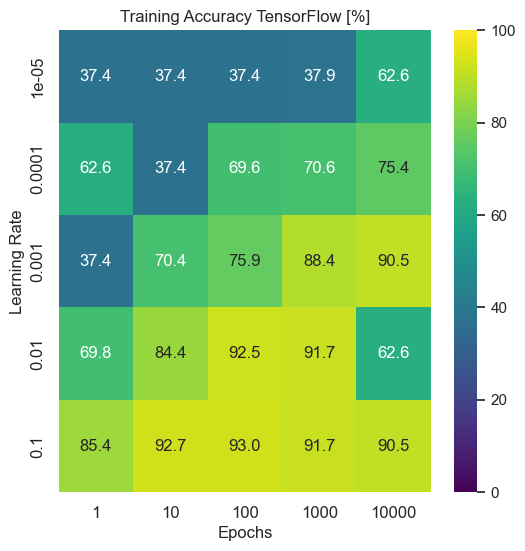

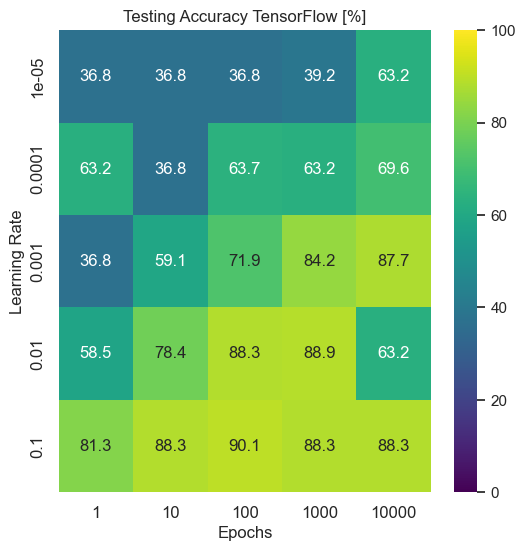

In [61]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential      #This allows appending layers to existing models
from tensorflow.keras.layers import Dense           #This allows defining the characteristics of a particular layer
from tensorflow.keras import optimizers             #This allows using whichever optimiser we want (sgd,adam,RMSprop)
from tensorflow.keras import regularizers           #This allows using whichever regularizer we want (l1,l2,l1_l2)
from tensorflow.keras.utils import to_categorical   #This allows using categorical cross entropy as the cost function
from sklearn.model_selection import train_test_split as splitter
from keras.optimizers import Adagrad, Adam, RMSprop
from keras import backend as K

def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1 - y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

x=inputs #Reassign the Feature and Label matrices to other variables
y=outputs

# Generate training and testing datasets
#Select features relevant to classification (texture,perimeter,compactness and symmetery) 
#and add to input matrix
temp1=np.reshape(x[:,1],(len(x[:,1]),1))
temp2=np.reshape(x[:,2],(len(x[:,2]),1))
X=np.hstack((temp1,temp2))      
temp=np.reshape(x[:,5],(len(x[:,5]),1))
X=np.hstack((X,temp))       
temp=np.reshape(x[:,8],(len(x[:,8]),1))
X=np.hstack((X,temp))       
X_train,X_test,y_train,y_test=splitter(X,y,test_size=0.3)   #Split datasets into training and testing
y_train=to_categorical(y_train)     #Convert labels to categorical when using categorical cross entropy
y_test=to_categorical(y_test)
del temp1,temp2,temp

# Define tunable parameters
eta=np.logspace(-5,-1,5)                    #Define vector of learning rates (parameter to SGD optimiser)
#lamda=np.logspace(-5,-1,5)                                  #Define hyperparameter
lamda = 0.01
n_layers=1                                  #Define number of hidden layers in the model
#n_neuron=np.logspace(0,4,5,dtype=int)       #Define number of neurons per layer
n_neuron = 100
#epochs=1000                                   #Number of reiterations over the input data
epochs=np.logspace(0,4,5,dtype=int)
batch_size=100                              #Number of samples per gradient update

# Define function to return Deep Neural Network model
def NN_model(inputsize,n_layers,n_neuron,eta,lamda):
    model=Sequential()      
    for i in range(n_layers):       #Run loop to add hidden layers to the model
        if (i==0):                  #First layer requires input dimensions
            model.add(Dense(n_neuron,activation='relu',kernel_regularizer=regularizers.l2(lamda),input_dim=inputsize))
        else:                       #Subsequent layers are capable of automatic shape inferencing
            model.add(Dense(n_neuron,activation='relu',kernel_regularizer=regularizers.l2(lamda)))
    model.add(Dense(2,activation='softmax'))  #2 outputs - ordered and disordered (softmax for prob)
    
    sgd = optimizers.SGD(learning_rate=eta)
    adagrad = Adagrad(learning_rate=eta)
    adam = Adam(learning_rate=eta)
    rmsprop = RMSprop(learning_rate=eta)

    model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
    return model
   
Train_accuracy=np.zeros((len(epochs),len(eta)))
Test_accuracy=np.zeros((len(epochs),len(eta)))  

for i in range(len(epochs)):
    for j in range(len(eta)):
        DNN_model=NN_model(X_train.shape[1],n_layers,n_neuron,eta[j],lamda)
        DNN_model.fit(X_train,y_train,epochs=epochs[i],batch_size=batch_size,verbose=1)
        Train_accuracy[i,j]=DNN_model.evaluate(X_train,y_train)[1]
        Test_accuracy[i,j]=DNN_model.evaluate(X_test,y_test)[1]   

def plot_data(x,y,data,title=None):
    data*=100
    fig, ax = plt.subplots(figsize = (6, 6))
    sns.heatmap(data, annot=True, ax=ax, cmap="viridis", xticklabels=x, yticklabels=y, fmt=".1f",  annot_kws={"size": fontsize},  vmin=0, vmax=100)
    ax.set_ylabel("Learning Rate", fontsize=fontsize)
    ax.set_xlabel("Epochs", fontsize=fontsize)
    plt.tick_params(axis='both', labelsize=fontsize)
    if str(data) == str(Train_accuracy):
        ax.set_title("Training Accuracy TensorFlow [%]", fontsize = fontsize)
        plt.savefig('C_TF_EpoLR_Train.pdf', format='pdf', bbox_inches="tight")
    elif str(data) == str(Test_accuracy):
        ax.set_title("Testing Accuracy TensorFlow [%]", fontsize = fontsize)
        plt.savefig('C_TF_EpoLR_Test.pdf', format='pdf', bbox_inches="tight")
    plt.show()
 
fontsize = 12
plot_data(epochs,eta,Train_accuracy, 'Training')
plot_data(epochs,eta,Test_accuracy, 'Testing')

## Measuring time hyperparameters

This code introduces a function which measured the time it takes to run the neural network code using different parameters. All the parameters can be adjusted, and the code takes the number of hidden layers as an input, so a loop can be used to compare the accuracy and running time for different numbers of hidden layers.

In [53]:
#Function for measuring time
import time
def measure_time(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"Elapsed time: {elapsed_time:.6f} seconds")
        return result
    return wrapper

#Parameters to test
n_neuron = 100
epochs = 1000
eta = 0.01
lamda = 0.01

#Measuring the time of the desired parameters
@measure_time
def FFNN(n_layers):
    # Your code here
    DNN_model=NN_model(X_train.shape[1],n_layers,n_neuron,eta,lamda)
    DNN_model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=1)
    Train_accuracy=DNN_model.evaluate(X_train,y_train)[1]
    Test_accuracy=DNN_model.evaluate(X_test,y_test)[1] 
    print(n_layers, Train_accuracy)
    print(n_layers, Test_accuracy)
    time.sleep(0)

# Call the decorated function
FFNN(2)

Epoch 1/1000
4/4 [==============================] - 0s 3ms/step - loss: 17.7959 - accuracy: 0.3995
Epoch 2/1000
4/4 [==============================] - 0s 3ms/step - loss: 4.6796 - accuracy: 0.6206
Epoch 3/1000
4/4 [==============================] - 0s 4ms/step - loss: 3.6252 - accuracy: 0.4372
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.9171 - accuracy: 0.5377
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.3919 - accuracy: 0.6231
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.1209 - accuracy: 0.6332
Epoch 7/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.1831 - accuracy: 0.5905
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.1095 - accuracy: 0.6005
Epoch 9/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.0073 - accuracy: 0.6131
Epoch 10/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.0074 - accuracy: 0.6256
Epoch 11/1000
4/4 

4/4 [==============================] - 0s 4ms/step - loss: 0.4524 - accuracy: 0.8693
Epoch 84/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.4606 - accuracy: 0.8844
Epoch 85/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4586 - accuracy: 0.8819
Epoch 86/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.4575 - accuracy: 0.8668
Epoch 87/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4419 - accuracy: 0.8945
Epoch 88/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4314 - accuracy: 0.8920
Epoch 89/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4323 - accuracy: 0.8970
Epoch 90/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4304 - accuracy: 0.8894
Epoch 91/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4307 - accuracy: 0.8869
Epoch 92/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4688 - accuracy: 0.8543
Epoch 93/1000
4/4 [=====

4/4 [==============================] - 0s 3ms/step - loss: 0.3584 - accuracy: 0.8593
Epoch 166/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3113 - accuracy: 0.8970
Epoch 167/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2962 - accuracy: 0.8920
Epoch 168/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2825 - accuracy: 0.9146
Epoch 169/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2851 - accuracy: 0.9171
Epoch 170/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2778 - accuracy: 0.9095
Epoch 171/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2887 - accuracy: 0.9121
Epoch 172/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3041 - accuracy: 0.8995
Epoch 173/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3159 - accuracy: 0.8894
Epoch 174/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2842 - accuracy: 0.9246
Epoch 175/1000


4/4 [==============================] - 0s 4ms/step - loss: 0.2414 - accuracy: 0.9246
Epoch 248/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2421 - accuracy: 0.9121
Epoch 249/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2637 - accuracy: 0.9121
Epoch 250/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2547 - accuracy: 0.8995
Epoch 251/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2916 - accuracy: 0.8769
Epoch 252/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2462 - accuracy: 0.9121
Epoch 253/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2408 - accuracy: 0.9146
Epoch 254/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2340 - accuracy: 0.9196
Epoch 255/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2460 - accuracy: 0.9146
Epoch 256/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2401 - accuracy: 0.9121
Epoch 257/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.2273 - accuracy: 0.9221
Epoch 330/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2242 - accuracy: 0.9221
Epoch 331/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2361 - accuracy: 0.9171
Epoch 332/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2300 - accuracy: 0.9171
Epoch 333/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2378 - accuracy: 0.9146
Epoch 334/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2391 - accuracy: 0.9146
Epoch 335/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2335 - accuracy: 0.9121
Epoch 336/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2229 - accuracy: 0.9171
Epoch 337/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2328 - accuracy: 0.9171
Epoch 338/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2228 - accuracy: 0.9171
Epoch 339/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.2166 - accuracy: 0.9196
Epoch 412/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2172 - accuracy: 0.9196
Epoch 413/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2162 - accuracy: 0.9171
Epoch 414/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2166 - accuracy: 0.9196
Epoch 415/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2220 - accuracy: 0.9121
Epoch 416/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2154 - accuracy: 0.9221
Epoch 417/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2165 - accuracy: 0.9171
Epoch 418/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2207 - accuracy: 0.9196
Epoch 419/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2195 - accuracy: 0.9171
Epoch 420/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2158 - accuracy: 0.9221
Epoch 421/1000


4/4 [==============================] - 0s 4ms/step - loss: 0.2187 - accuracy: 0.9146
Epoch 494/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2250 - accuracy: 0.9196
Epoch 495/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2208 - accuracy: 0.9196
Epoch 496/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2193 - accuracy: 0.9171
Epoch 497/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2196 - accuracy: 0.9196
Epoch 498/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2322 - accuracy: 0.9171
Epoch 499/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2211 - accuracy: 0.9171
Epoch 500/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2191 - accuracy: 0.9196
Epoch 501/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2240 - accuracy: 0.9171
Epoch 502/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2197 - accuracy: 0.9146
Epoch 503/1000


4/4 [==============================] - 0s 4ms/step - loss: 0.2512 - accuracy: 0.9070
Epoch 576/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2353 - accuracy: 0.9020
Epoch 577/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2357 - accuracy: 0.8920
Epoch 578/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2369 - accuracy: 0.9045
Epoch 579/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2254 - accuracy: 0.9246
Epoch 580/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2134 - accuracy: 0.9296
Epoch 581/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2335 - accuracy: 0.9146
Epoch 582/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2201 - accuracy: 0.9196
Epoch 583/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2283 - accuracy: 0.9121
Epoch 584/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2278 - accuracy: 0.9146
Epoch 585/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.2154 - accuracy: 0.9246
Epoch 658/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2136 - accuracy: 0.9271
Epoch 659/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2132 - accuracy: 0.9221
Epoch 660/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2120 - accuracy: 0.9246
Epoch 661/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2152 - accuracy: 0.9196
Epoch 662/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2161 - accuracy: 0.9221
Epoch 663/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2212 - accuracy: 0.9171
Epoch 664/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2192 - accuracy: 0.9246
Epoch 665/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2237 - accuracy: 0.9196
Epoch 666/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2154 - accuracy: 0.9171
Epoch 667/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.2176 - accuracy: 0.9196
Epoch 740/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2207 - accuracy: 0.9095
Epoch 741/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2283 - accuracy: 0.9221
Epoch 742/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2263 - accuracy: 0.9070
Epoch 743/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2250 - accuracy: 0.9121
Epoch 744/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2243 - accuracy: 0.9271
Epoch 745/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2193 - accuracy: 0.9095
Epoch 746/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2319 - accuracy: 0.9146
Epoch 747/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2182 - accuracy: 0.9146
Epoch 748/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2175 - accuracy: 0.9221
Epoch 749/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.2179 - accuracy: 0.9146
Epoch 822/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2143 - accuracy: 0.9171
Epoch 823/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2226 - accuracy: 0.9246
Epoch 824/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2351 - accuracy: 0.9095
Epoch 825/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2237 - accuracy: 0.9271
Epoch 826/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2243 - accuracy: 0.9271
Epoch 827/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2133 - accuracy: 0.9221
Epoch 828/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2213 - accuracy: 0.9146
Epoch 829/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2219 - accuracy: 0.9146
Epoch 830/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2252 - accuracy: 0.9171
Epoch 831/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.2259 - accuracy: 0.9121
Epoch 904/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2205 - accuracy: 0.9221
Epoch 905/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2157 - accuracy: 0.9146
Epoch 906/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2138 - accuracy: 0.9271
Epoch 907/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2218 - accuracy: 0.9196
Epoch 908/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2142 - accuracy: 0.9271
Epoch 909/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2166 - accuracy: 0.9171
Epoch 910/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2147 - accuracy: 0.9221
Epoch 911/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2248 - accuracy: 0.9146
Epoch 912/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2183 - accuracy: 0.9196
Epoch 913/1000


4/4 [==============================] - 0s 4ms/step - loss: 0.2127 - accuracy: 0.9146
Epoch 986/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2110 - accuracy: 0.9171
Epoch 987/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2117 - accuracy: 0.9246
Epoch 988/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2154 - accuracy: 0.9196
Epoch 989/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2117 - accuracy: 0.9246
Epoch 990/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2139 - accuracy: 0.9246
Epoch 991/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2178 - accuracy: 0.9246
Epoch 992/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2247 - accuracy: 0.9171
Epoch 993/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2287 - accuracy: 0.9070
Epoch 994/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2084 - accuracy: 0.9246
Epoch 995/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.4590 - accuracy: 0.9146
Epoch 66/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4562 - accuracy: 0.9020
Epoch 67/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4417 - accuracy: 0.9070
Epoch 68/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4568 - accuracy: 0.8894
Epoch 69/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.4322 - accuracy: 0.9121
Epoch 70/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4257 - accuracy: 0.9146
Epoch 71/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4180 - accuracy: 0.9271
Epoch 72/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.4077 - accuracy: 0.9221
Epoch 73/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4248 - accuracy: 0.8945
Epoch 74/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4789 - accuracy: 0.8618
Epoch 75/1000
4/4 [=====

4/4 [==============================] - 0s 4ms/step - loss: 0.3542 - accuracy: 0.8844
Epoch 148/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2902 - accuracy: 0.9020
Epoch 149/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2798 - accuracy: 0.9095
Epoch 150/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2934 - accuracy: 0.8970
Epoch 151/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3046 - accuracy: 0.9070
Epoch 152/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3090 - accuracy: 0.8970
Epoch 153/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3179 - accuracy: 0.8995
Epoch 154/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2939 - accuracy: 0.8970
Epoch 155/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2770 - accuracy: 0.9171
Epoch 156/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2762 - accuracy: 0.9171
Epoch 157/1000


4/4 [==============================] - 0s 4ms/step - loss: 0.2495 - accuracy: 0.9095
Epoch 230/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2652 - accuracy: 0.8945
Epoch 231/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2350 - accuracy: 0.9171
Epoch 232/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2392 - accuracy: 0.9070
Epoch 233/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2537 - accuracy: 0.9045
Epoch 234/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2399 - accuracy: 0.9221
Epoch 235/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2321 - accuracy: 0.9146
Epoch 236/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2621 - accuracy: 0.9070
Epoch 237/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2568 - accuracy: 0.9095
Epoch 238/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2401 - accuracy: 0.9121
Epoch 239/1000


4/4 [==============================] - 0s 4ms/step - loss: 0.2310 - accuracy: 0.9221
Epoch 312/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2258 - accuracy: 0.9196
Epoch 313/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2259 - accuracy: 0.9171
Epoch 314/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2251 - accuracy: 0.9171
Epoch 315/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2213 - accuracy: 0.9196
Epoch 316/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2217 - accuracy: 0.9171
Epoch 317/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2234 - accuracy: 0.9171
Epoch 318/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2327 - accuracy: 0.9070
Epoch 319/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2308 - accuracy: 0.9196
Epoch 320/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2351 - accuracy: 0.9045
Epoch 321/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.2227 - accuracy: 0.9196
Epoch 394/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2198 - accuracy: 0.9146
Epoch 395/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2244 - accuracy: 0.9146
Epoch 396/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2218 - accuracy: 0.9221
Epoch 397/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2275 - accuracy: 0.9020
Epoch 398/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2284 - accuracy: 0.9121
Epoch 399/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2467 - accuracy: 0.8869
Epoch 400/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2371 - accuracy: 0.8995
Epoch 401/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2789 - accuracy: 0.8869
Epoch 402/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2840 - accuracy: 0.8769
Epoch 403/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.2198 - accuracy: 0.9146
Epoch 476/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2146 - accuracy: 0.9196
Epoch 477/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2169 - accuracy: 0.9146
Epoch 478/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2217 - accuracy: 0.9146
Epoch 479/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2296 - accuracy: 0.9121
Epoch 480/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2237 - accuracy: 0.9146
Epoch 481/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2477 - accuracy: 0.9045
Epoch 482/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2362 - accuracy: 0.8995
Epoch 483/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2220 - accuracy: 0.9146
Epoch 484/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2250 - accuracy: 0.9196
Epoch 485/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.2290 - accuracy: 0.9045
Epoch 558/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2333 - accuracy: 0.9070
Epoch 559/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2258 - accuracy: 0.9146
Epoch 560/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2197 - accuracy: 0.9146
Epoch 561/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2171 - accuracy: 0.9171
Epoch 562/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2215 - accuracy: 0.9196
Epoch 563/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2336 - accuracy: 0.9070
Epoch 564/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2413 - accuracy: 0.9070
Epoch 565/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2209 - accuracy: 0.9196
Epoch 566/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2277 - accuracy: 0.9121
Epoch 567/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.2202 - accuracy: 0.9246
Epoch 640/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2176 - accuracy: 0.9171
Epoch 641/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2322 - accuracy: 0.9095
Epoch 642/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2162 - accuracy: 0.9221
Epoch 643/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2351 - accuracy: 0.9095
Epoch 644/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2383 - accuracy: 0.9121
Epoch 645/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2313 - accuracy: 0.9020
Epoch 646/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2388 - accuracy: 0.9045
Epoch 647/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2232 - accuracy: 0.9146
Epoch 648/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2176 - accuracy: 0.9171
Epoch 649/1000


4/4 [==============================] - 0s 4ms/step - loss: 0.2208 - accuracy: 0.9121
Epoch 722/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2207 - accuracy: 0.9121
Epoch 723/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2308 - accuracy: 0.9070
Epoch 724/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2241 - accuracy: 0.9171
Epoch 725/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2420 - accuracy: 0.8970
Epoch 726/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2468 - accuracy: 0.8995
Epoch 727/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2435 - accuracy: 0.9020
Epoch 728/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2456 - accuracy: 0.9121
Epoch 729/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2305 - accuracy: 0.9146
Epoch 730/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2434 - accuracy: 0.8945
Epoch 731/1000


4/4 [==============================] - 0s 4ms/step - loss: 0.2430 - accuracy: 0.9146
Epoch 804/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2632 - accuracy: 0.9020
Epoch 805/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2612 - accuracy: 0.8970
Epoch 806/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2379 - accuracy: 0.9045
Epoch 807/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2146 - accuracy: 0.9171
Epoch 808/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2325 - accuracy: 0.9121
Epoch 809/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2205 - accuracy: 0.9221
Epoch 810/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2165 - accuracy: 0.9171
Epoch 811/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2232 - accuracy: 0.9171
Epoch 812/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2223 - accuracy: 0.9070
Epoch 813/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.2224 - accuracy: 0.9171
Epoch 886/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2180 - accuracy: 0.9196
Epoch 887/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2129 - accuracy: 0.9221
Epoch 888/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2267 - accuracy: 0.9146
Epoch 889/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2236 - accuracy: 0.9070
Epoch 890/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2371 - accuracy: 0.9121
Epoch 891/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2230 - accuracy: 0.9196
Epoch 892/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2205 - accuracy: 0.9146
Epoch 893/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2152 - accuracy: 0.9221
Epoch 894/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2179 - accuracy: 0.9196
Epoch 895/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.2093 - accuracy: 0.9196
Epoch 968/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2269 - accuracy: 0.9196
Epoch 969/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2184 - accuracy: 0.9246
Epoch 970/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2183 - accuracy: 0.9221
Epoch 971/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2175 - accuracy: 0.9171
Epoch 972/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2196 - accuracy: 0.9221
Epoch 973/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2195 - accuracy: 0.9146
Epoch 974/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2232 - accuracy: 0.9196
Epoch 975/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2229 - accuracy: 0.9146
Epoch 976/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2195 - accuracy: 0.9171
Epoch 977/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.5605 - accuracy: 0.8995
Epoch 48/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5380 - accuracy: 0.9146
Epoch 49/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5267 - accuracy: 0.9146
Epoch 50/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.5194 - accuracy: 0.9095
Epoch 51/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.5215 - accuracy: 0.9146
Epoch 52/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.5346 - accuracy: 0.8920
Epoch 53/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.5090 - accuracy: 0.8794
Epoch 54/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.4830 - accuracy: 0.9121
Epoch 55/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5119 - accuracy: 0.8945
Epoch 56/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5034 - accuracy: 0.8844
Epoch 57/1000
4/4 [=====

4/4 [==============================] - 0s 4ms/step - loss: 0.2795 - accuracy: 0.9095
Epoch 130/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3067 - accuracy: 0.8894
Epoch 131/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2827 - accuracy: 0.9121
Epoch 132/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2706 - accuracy: 0.9171
Epoch 133/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2684 - accuracy: 0.9095
Epoch 134/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2718 - accuracy: 0.9146
Epoch 135/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2621 - accuracy: 0.9171
Epoch 136/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2654 - accuracy: 0.9121
Epoch 137/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2740 - accuracy: 0.9121
Epoch 138/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2757 - accuracy: 0.8945
Epoch 139/1000


4/4 [==============================] - 0s 4ms/step - loss: 0.2322 - accuracy: 0.9196
Epoch 212/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2343 - accuracy: 0.9146
Epoch 213/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2650 - accuracy: 0.8920
Epoch 214/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2823 - accuracy: 0.8920
Epoch 215/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2797 - accuracy: 0.8945
Epoch 216/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2990 - accuracy: 0.8844
Epoch 217/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2587 - accuracy: 0.8995
Epoch 218/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2711 - accuracy: 0.8970
Epoch 219/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2642 - accuracy: 0.8945
Epoch 220/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2449 - accuracy: 0.9196
Epoch 221/1000


4/4 [==============================] - 0s 4ms/step - loss: 0.2320 - accuracy: 0.9121
Epoch 294/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2505 - accuracy: 0.9070
Epoch 295/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2774 - accuracy: 0.8970
Epoch 296/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2511 - accuracy: 0.9146
Epoch 297/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2713 - accuracy: 0.8995
Epoch 298/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2334 - accuracy: 0.9045
Epoch 299/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2329 - accuracy: 0.9221
Epoch 300/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2415 - accuracy: 0.8995
Epoch 301/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2354 - accuracy: 0.9171
Epoch 302/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2405 - accuracy: 0.9045
Epoch 303/1000


4/4 [==============================] - 0s 5ms/step - loss: 0.2570 - accuracy: 0.9020
Epoch 376/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2247 - accuracy: 0.9271
Epoch 377/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2378 - accuracy: 0.9095
Epoch 378/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2271 - accuracy: 0.9221
Epoch 379/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2280 - accuracy: 0.9020
Epoch 380/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2287 - accuracy: 0.9196
Epoch 381/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2664 - accuracy: 0.8869
Epoch 382/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2413 - accuracy: 0.9095
Epoch 383/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2273 - accuracy: 0.9146
Epoch 384/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2251 - accuracy: 0.9196
Epoch 385/1000


4/4 [==============================] - 0s 4ms/step - loss: 0.2261 - accuracy: 0.9171
Epoch 458/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2405 - accuracy: 0.9095
Epoch 459/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2262 - accuracy: 0.9171
Epoch 460/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2324 - accuracy: 0.9095
Epoch 461/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2306 - accuracy: 0.9095
Epoch 462/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2250 - accuracy: 0.9095
Epoch 463/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2366 - accuracy: 0.9196
Epoch 464/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2319 - accuracy: 0.9020
Epoch 465/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2435 - accuracy: 0.9146
Epoch 466/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2938 - accuracy: 0.8744
Epoch 467/1000


4/4 [==============================] - 0s 4ms/step - loss: 0.2299 - accuracy: 0.9171
Epoch 540/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2228 - accuracy: 0.9196
Epoch 541/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2206 - accuracy: 0.9171
Epoch 542/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2211 - accuracy: 0.9196
Epoch 543/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2217 - accuracy: 0.9196
Epoch 544/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2216 - accuracy: 0.9146
Epoch 545/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2212 - accuracy: 0.9171
Epoch 546/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2230 - accuracy: 0.9171
Epoch 547/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2239 - accuracy: 0.9196
Epoch 548/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2260 - accuracy: 0.9095
Epoch 549/1000


4/4 [==============================] - 0s 4ms/step - loss: 0.2266 - accuracy: 0.9196
Epoch 622/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2356 - accuracy: 0.9070
Epoch 623/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2296 - accuracy: 0.9171
Epoch 624/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2218 - accuracy: 0.9171
Epoch 625/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2293 - accuracy: 0.9146
Epoch 626/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2206 - accuracy: 0.9171
Epoch 627/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2212 - accuracy: 0.9171
Epoch 628/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2306 - accuracy: 0.9171
Epoch 629/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2206 - accuracy: 0.9146
Epoch 630/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2215 - accuracy: 0.9095
Epoch 631/1000


4/4 [==============================] - 0s 4ms/step - loss: 0.2265 - accuracy: 0.9146
Epoch 704/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2302 - accuracy: 0.9221
Epoch 705/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2374 - accuracy: 0.9095
Epoch 706/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2441 - accuracy: 0.9121
Epoch 707/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2777 - accuracy: 0.8920
Epoch 708/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2407 - accuracy: 0.9146
Epoch 709/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2371 - accuracy: 0.9045
Epoch 710/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2373 - accuracy: 0.9121
Epoch 711/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2299 - accuracy: 0.9121
Epoch 712/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2194 - accuracy: 0.9196
Epoch 713/1000


4/4 [==============================] - 0s 4ms/step - loss: 0.2228 - accuracy: 0.9171
Epoch 786/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2291 - accuracy: 0.9121
Epoch 787/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2344 - accuracy: 0.9196
Epoch 788/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2489 - accuracy: 0.8920
Epoch 789/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2307 - accuracy: 0.9196
Epoch 790/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2212 - accuracy: 0.9146
Epoch 791/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2200 - accuracy: 0.9196
Epoch 792/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2252 - accuracy: 0.9171
Epoch 793/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2324 - accuracy: 0.9171
Epoch 794/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2414 - accuracy: 0.8945
Epoch 795/1000


4/4 [==============================] - 0s 4ms/step - loss: 0.2260 - accuracy: 0.9146
Epoch 868/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2318 - accuracy: 0.9070
Epoch 869/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2456 - accuracy: 0.9045
Epoch 870/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2228 - accuracy: 0.9146
Epoch 871/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2341 - accuracy: 0.9146
Epoch 872/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2514 - accuracy: 0.9045
Epoch 873/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2532 - accuracy: 0.8995
Epoch 874/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2433 - accuracy: 0.8995
Epoch 875/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2536 - accuracy: 0.9121
Epoch 876/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2488 - accuracy: 0.9121
Epoch 877/1000


4/4 [==============================] - 0s 4ms/step - loss: 0.2189 - accuracy: 0.9121
Epoch 950/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2222 - accuracy: 0.9221
Epoch 951/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2198 - accuracy: 0.9246
Epoch 952/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2204 - accuracy: 0.9196
Epoch 953/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2204 - accuracy: 0.9196
Epoch 954/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2198 - accuracy: 0.9221
Epoch 955/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2393 - accuracy: 0.9146
Epoch 956/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2253 - accuracy: 0.9146
Epoch 957/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2280 - accuracy: 0.9070
Epoch 958/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2373 - accuracy: 0.9095
Epoch 959/1000


Epoch 29/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.8815 - accuracy: 0.8869
Epoch 30/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.8510 - accuracy: 0.8945
Epoch 31/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.8453 - accuracy: 0.8819
Epoch 32/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.8428 - accuracy: 0.8769
Epoch 33/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.7969 - accuracy: 0.8894
Epoch 34/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.9217 - accuracy: 0.8241
Epoch 35/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.8961 - accuracy: 0.8065
Epoch 36/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.8160 - accuracy: 0.8543
Epoch 37/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.7528 - accuracy: 0.9095
Epoch 38/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.7295 - accuracy: 0.8945
Epoch 39/1

4/4 [==============================] - 0s 6ms/step - loss: 0.3253 - accuracy: 0.9070
Epoch 112/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3326 - accuracy: 0.9146
Epoch 113/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3361 - accuracy: 0.9070
Epoch 114/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3265 - accuracy: 0.8970
Epoch 115/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3135 - accuracy: 0.9121
Epoch 116/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3628 - accuracy: 0.9020
Epoch 117/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3643 - accuracy: 0.8719
Epoch 118/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3532 - accuracy: 0.8844
Epoch 119/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3488 - accuracy: 0.8869
Epoch 120/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3611 - accuracy: 0.8769
Epoch 121/1000


4/4 [==============================] - 0s 5ms/step - loss: 0.2504 - accuracy: 0.9146
Epoch 194/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2671 - accuracy: 0.9146
Epoch 195/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2888 - accuracy: 0.9020
Epoch 196/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2659 - accuracy: 0.8945
Epoch 197/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2847 - accuracy: 0.9045
Epoch 198/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2888 - accuracy: 0.8945
Epoch 199/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2702 - accuracy: 0.8970
Epoch 200/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2499 - accuracy: 0.9146
Epoch 201/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2441 - accuracy: 0.9146
Epoch 202/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2534 - accuracy: 0.9070
Epoch 203/1000


4/4 [==============================] - 0s 5ms/step - loss: 0.2639 - accuracy: 0.9095
Epoch 276/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2506 - accuracy: 0.9045
Epoch 277/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2540 - accuracy: 0.9095
Epoch 278/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2385 - accuracy: 0.9045
Epoch 279/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2390 - accuracy: 0.9146
Epoch 280/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2421 - accuracy: 0.9146
Epoch 281/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2411 - accuracy: 0.9045
Epoch 282/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2394 - accuracy: 0.9221
Epoch 283/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2578 - accuracy: 0.8945
Epoch 284/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2406 - accuracy: 0.9045
Epoch 285/1000


4/4 [==============================] - 0s 5ms/step - loss: 0.2367 - accuracy: 0.9171
Epoch 358/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2401 - accuracy: 0.9121
Epoch 359/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2390 - accuracy: 0.9070
Epoch 360/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2321 - accuracy: 0.9146
Epoch 361/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2540 - accuracy: 0.8995
Epoch 362/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2612 - accuracy: 0.8995
Epoch 363/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2497 - accuracy: 0.9045
Epoch 364/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2452 - accuracy: 0.9196
Epoch 365/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2378 - accuracy: 0.9121
Epoch 366/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2282 - accuracy: 0.9070
Epoch 367/1000


4/4 [==============================] - 0s 5ms/step - loss: 0.2810 - accuracy: 0.8719
Epoch 440/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2756 - accuracy: 0.8869
Epoch 441/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2835 - accuracy: 0.8970
Epoch 442/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3126 - accuracy: 0.8769
Epoch 443/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3094 - accuracy: 0.8819
Epoch 444/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2982 - accuracy: 0.8794
Epoch 445/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2775 - accuracy: 0.8920
Epoch 446/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2788 - accuracy: 0.8894
Epoch 447/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2910 - accuracy: 0.8794
Epoch 448/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2658 - accuracy: 0.8970
Epoch 449/1000


4/4 [==============================] - 0s 5ms/step - loss: 0.2726 - accuracy: 0.8995
Epoch 522/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2529 - accuracy: 0.9095
Epoch 523/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2403 - accuracy: 0.9045
Epoch 524/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2448 - accuracy: 0.9045
Epoch 525/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2358 - accuracy: 0.9146
Epoch 526/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2327 - accuracy: 0.9121
Epoch 527/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2413 - accuracy: 0.9045
Epoch 528/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2383 - accuracy: 0.9045
Epoch 529/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2576 - accuracy: 0.9020
Epoch 530/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2392 - accuracy: 0.9121
Epoch 531/1000


4/4 [==============================] - 0s 4ms/step - loss: 0.2786 - accuracy: 0.8970
Epoch 604/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2549 - accuracy: 0.9045
Epoch 605/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2401 - accuracy: 0.9020
Epoch 606/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2554 - accuracy: 0.9045
Epoch 607/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2592 - accuracy: 0.9020
Epoch 608/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2481 - accuracy: 0.9121
Epoch 609/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2335 - accuracy: 0.9146
Epoch 610/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2358 - accuracy: 0.9171
Epoch 611/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2337 - accuracy: 0.9020
Epoch 612/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2417 - accuracy: 0.9196
Epoch 613/1000


4/4 [==============================] - 0s 4ms/step - loss: 0.2363 - accuracy: 0.9045
Epoch 686/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2362 - accuracy: 0.9121
Epoch 687/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2324 - accuracy: 0.9246
Epoch 688/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2351 - accuracy: 0.9121
Epoch 689/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2404 - accuracy: 0.9146
Epoch 690/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2498 - accuracy: 0.8920
Epoch 691/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2452 - accuracy: 0.9020
Epoch 692/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2704 - accuracy: 0.8844
Epoch 693/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2413 - accuracy: 0.9146
Epoch 694/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2752 - accuracy: 0.8844
Epoch 695/1000


4/4 [==============================] - 0s 4ms/step - loss: 0.2337 - accuracy: 0.9146
Epoch 768/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2303 - accuracy: 0.9171
Epoch 769/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2282 - accuracy: 0.9146
Epoch 770/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2252 - accuracy: 0.9146
Epoch 771/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2303 - accuracy: 0.9196
Epoch 772/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2340 - accuracy: 0.9121
Epoch 773/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2398 - accuracy: 0.9095
Epoch 774/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2347 - accuracy: 0.9196
Epoch 775/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2883 - accuracy: 0.8844
Epoch 776/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3029 - accuracy: 0.8819
Epoch 777/1000


4/4 [==============================] - 0s 4ms/step - loss: 0.2245 - accuracy: 0.9171
Epoch 850/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2287 - accuracy: 0.9121
Epoch 851/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2251 - accuracy: 0.9146
Epoch 852/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2251 - accuracy: 0.9171
Epoch 853/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2463 - accuracy: 0.8995
Epoch 854/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2529 - accuracy: 0.9095
Epoch 855/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2424 - accuracy: 0.9070
Epoch 856/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2396 - accuracy: 0.9121
Epoch 857/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2360 - accuracy: 0.9196
Epoch 858/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2313 - accuracy: 0.9146
Epoch 859/1000


4/4 [==============================] - 0s 5ms/step - loss: 0.2246 - accuracy: 0.9171
Epoch 932/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2336 - accuracy: 0.9196
Epoch 933/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2251 - accuracy: 0.9146
Epoch 934/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2251 - accuracy: 0.9221
Epoch 935/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2285 - accuracy: 0.9146
Epoch 936/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2255 - accuracy: 0.9171
Epoch 937/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2358 - accuracy: 0.9070
Epoch 938/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2421 - accuracy: 0.9095
Epoch 939/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2360 - accuracy: 0.9070
Epoch 940/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2298 - accuracy: 0.9221
Epoch 941/1000


4/4 [==============================] - 0s 4ms/step - loss: 1.7339 - accuracy: 0.7915
Epoch 11/1000
4/4 [==============================] - 0s 4ms/step - loss: 1.6606 - accuracy: 0.7613
Epoch 12/1000
4/4 [==============================] - 0s 4ms/step - loss: 1.5954 - accuracy: 0.7111
Epoch 13/1000
4/4 [==============================] - 0s 4ms/step - loss: 1.5558 - accuracy: 0.7286
Epoch 14/1000
4/4 [==============================] - 0s 4ms/step - loss: 1.5021 - accuracy: 0.7111
Epoch 15/1000
4/4 [==============================] - 0s 4ms/step - loss: 1.3776 - accuracy: 0.7915
Epoch 16/1000
4/4 [==============================] - 0s 4ms/step - loss: 1.3325 - accuracy: 0.7638
Epoch 17/1000
4/4 [==============================] - 0s 4ms/step - loss: 1.2588 - accuracy: 0.8116
Epoch 18/1000
4/4 [==============================] - 0s 4ms/step - loss: 1.1724 - accuracy: 0.8568
Epoch 19/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.1187 - accuracy: 0.8492
Epoch 20/1000
4/4 [=====

4/4 [==============================] - 0s 4ms/step - loss: 0.2854 - accuracy: 0.9121
Epoch 93/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2834 - accuracy: 0.9121
Epoch 94/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2818 - accuracy: 0.9045
Epoch 95/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2864 - accuracy: 0.9121
Epoch 96/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2825 - accuracy: 0.9070
Epoch 97/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2833 - accuracy: 0.9146
Epoch 98/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2842 - accuracy: 0.9121
Epoch 99/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2847 - accuracy: 0.9020
Epoch 100/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3294 - accuracy: 0.8945
Epoch 101/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3073 - accuracy: 0.9020
Epoch 102/1000
4/4 [==

4/4 [==============================] - 0s 4ms/step - loss: 0.3077 - accuracy: 0.9121
Epoch 175/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3108 - accuracy: 0.8844
Epoch 176/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3002 - accuracy: 0.8894
Epoch 177/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2926 - accuracy: 0.8970
Epoch 178/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2778 - accuracy: 0.9095
Epoch 179/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2591 - accuracy: 0.8970
Epoch 180/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2597 - accuracy: 0.9070
Epoch 181/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2520 - accuracy: 0.9121
Epoch 182/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2570 - accuracy: 0.9045
Epoch 183/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2602 - accuracy: 0.9095
Epoch 184/1000


4/4 [==============================] - 0s 5ms/step - loss: 0.2453 - accuracy: 0.9095
Epoch 257/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2401 - accuracy: 0.9095
Epoch 258/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2472 - accuracy: 0.9121
Epoch 259/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2847 - accuracy: 0.8970
Epoch 260/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3056 - accuracy: 0.8844
Epoch 261/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3112 - accuracy: 0.8769
Epoch 262/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2591 - accuracy: 0.8995
Epoch 263/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2601 - accuracy: 0.9020
Epoch 264/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3248 - accuracy: 0.8794
Epoch 265/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2985 - accuracy: 0.8894
Epoch 266/1000


4/4 [==============================] - 0s 5ms/step - loss: 0.2759 - accuracy: 0.8894
Epoch 339/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2524 - accuracy: 0.8995
Epoch 340/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2515 - accuracy: 0.9020
Epoch 341/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2446 - accuracy: 0.9095
Epoch 342/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2613 - accuracy: 0.9020
Epoch 343/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2605 - accuracy: 0.8970
Epoch 344/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2422 - accuracy: 0.9070
Epoch 345/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2443 - accuracy: 0.9171
Epoch 346/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2723 - accuracy: 0.9020
Epoch 347/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2594 - accuracy: 0.9070
Epoch 348/1000


4/4 [==============================] - 0s 6ms/step - loss: 0.2556 - accuracy: 0.9020
Epoch 421/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2672 - accuracy: 0.8894
Epoch 422/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2703 - accuracy: 0.8970
Epoch 423/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2684 - accuracy: 0.8945
Epoch 424/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2636 - accuracy: 0.9045
Epoch 425/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2560 - accuracy: 0.9095
Epoch 426/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2638 - accuracy: 0.9070
Epoch 427/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2722 - accuracy: 0.8995
Epoch 428/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2793 - accuracy: 0.9020
Epoch 429/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2559 - accuracy: 0.9045
Epoch 430/1000


4/4 [==============================] - 0s 10ms/step - loss: 0.2430 - accuracy: 0.8995
Epoch 503/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2858 - accuracy: 0.9045
Epoch 504/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2660 - accuracy: 0.9020
Epoch 505/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2599 - accuracy: 0.8920
Epoch 506/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2553 - accuracy: 0.9095
Epoch 507/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2506 - accuracy: 0.9121
Epoch 508/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2436 - accuracy: 0.9146
Epoch 509/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2463 - accuracy: 0.9070
Epoch 510/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3104 - accuracy: 0.8794
Epoch 511/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2813 - accuracy: 0.8995
Epoch 512/1000

4/4 [==============================] - 0s 5ms/step - loss: 0.3546 - accuracy: 0.8568
Epoch 585/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3048 - accuracy: 0.8819
Epoch 586/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3056 - accuracy: 0.8945
Epoch 587/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2857 - accuracy: 0.8894
Epoch 588/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2708 - accuracy: 0.9045
Epoch 589/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2996 - accuracy: 0.8744
Epoch 590/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2821 - accuracy: 0.8844
Epoch 591/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2606 - accuracy: 0.8995
Epoch 592/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3205 - accuracy: 0.8744
Epoch 593/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2970 - accuracy: 0.8894
Epoch 594/1000


4/4 [==============================] - 0s 5ms/step - loss: 0.2373 - accuracy: 0.9121
Epoch 667/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2383 - accuracy: 0.9121
Epoch 668/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2448 - accuracy: 0.9070
Epoch 669/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2437 - accuracy: 0.9121
Epoch 670/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2621 - accuracy: 0.8894
Epoch 671/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2498 - accuracy: 0.9095
Epoch 672/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2579 - accuracy: 0.9045
Epoch 673/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2822 - accuracy: 0.8995
Epoch 674/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2730 - accuracy: 0.9171
Epoch 675/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2621 - accuracy: 0.9095
Epoch 676/1000


4/4 [==============================] - 0s 5ms/step - loss: 0.2512 - accuracy: 0.9171
Epoch 749/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2366 - accuracy: 0.9221
Epoch 750/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2542 - accuracy: 0.9020
Epoch 751/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2556 - accuracy: 0.8945
Epoch 752/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2543 - accuracy: 0.9121
Epoch 753/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2514 - accuracy: 0.9095
Epoch 754/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2371 - accuracy: 0.9146
Epoch 755/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2352 - accuracy: 0.9121
Epoch 756/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2368 - accuracy: 0.9020
Epoch 757/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2410 - accuracy: 0.9146
Epoch 758/1000


4/4 [==============================] - 0s 6ms/step - loss: 0.2404 - accuracy: 0.9146
Epoch 831/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2856 - accuracy: 0.8869
Epoch 832/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2466 - accuracy: 0.9095
Epoch 833/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2628 - accuracy: 0.8995
Epoch 834/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2636 - accuracy: 0.8920
Epoch 835/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2430 - accuracy: 0.9196
Epoch 836/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2374 - accuracy: 0.9070
Epoch 837/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2392 - accuracy: 0.9121
Epoch 838/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2552 - accuracy: 0.8970
Epoch 839/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2487 - accuracy: 0.8970
Epoch 840/1000


4/4 [==============================] - 0s 6ms/step - loss: 0.2511 - accuracy: 0.9045
Epoch 913/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2779 - accuracy: 0.8894
Epoch 914/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2453 - accuracy: 0.9171
Epoch 915/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2539 - accuracy: 0.8970
Epoch 916/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2427 - accuracy: 0.9020
Epoch 917/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2367 - accuracy: 0.9045
Epoch 918/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2438 - accuracy: 0.9095
Epoch 919/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2376 - accuracy: 0.9070
Epoch 920/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2377 - accuracy: 0.9221
Epoch 921/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2338 - accuracy: 0.9171
Epoch 922/1000


4/4 [==============================] - 0s 4ms/step - loss: 0.2529 - accuracy: 0.9121
Epoch 995/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2393 - accuracy: 0.9045
Epoch 996/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2423 - accuracy: 0.9095
Epoch 997/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.2415 - accuracy: 0.9070
Epoch 998/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2349 - accuracy: 0.9121
Epoch 999/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2356 - accuracy: 0.9070
Epoch 1000/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3180 - accuracy: 0.8713
6 0.909547746181488
6 0.871345043182373
Elapsed time: 25.015285 seconds
Epoch 1/1000
4/4 [==============================] - 1s 5ms/step - loss: 7.6592 - accuracy: 0.4950
Epoch 2/1000
4/4 [==============================] - 0s 5ms/step - loss: 3.9815 - accuracy: 0.6583
Epoch 3/1000
4/4 [============================

4/4 [==============================] - 0s 6ms/step - loss: 0.3246 - accuracy: 0.9146
Epoch 75/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3637 - accuracy: 0.9020
Epoch 76/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3604 - accuracy: 0.9045
Epoch 77/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3216 - accuracy: 0.8970
Epoch 78/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3329 - accuracy: 0.9020
Epoch 79/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3348 - accuracy: 0.9020
Epoch 80/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3214 - accuracy: 0.9020
Epoch 81/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3983 - accuracy: 0.8668
Epoch 82/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3665 - accuracy: 0.8844
Epoch 83/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.4164 - accuracy: 0.8643
Epoch 84/1000
4/4 [=====

4/4 [==============================] - 0s 5ms/step - loss: 0.2690 - accuracy: 0.9121
Epoch 157/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2879 - accuracy: 0.8945
Epoch 158/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2801 - accuracy: 0.9095
Epoch 159/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2630 - accuracy: 0.8945
Epoch 160/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2613 - accuracy: 0.9045
Epoch 161/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2616 - accuracy: 0.9095
Epoch 162/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2742 - accuracy: 0.9070
Epoch 163/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2605 - accuracy: 0.9121
Epoch 164/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2588 - accuracy: 0.9121
Epoch 165/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2562 - accuracy: 0.9171
Epoch 166/1000


4/4 [==============================] - 0s 5ms/step - loss: 0.2590 - accuracy: 0.9070
Epoch 239/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2621 - accuracy: 0.9095
Epoch 240/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2634 - accuracy: 0.9171
Epoch 241/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2568 - accuracy: 0.9146
Epoch 242/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2653 - accuracy: 0.9070
Epoch 243/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2740 - accuracy: 0.8995
Epoch 244/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2719 - accuracy: 0.9070
Epoch 245/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2788 - accuracy: 0.9095
Epoch 246/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2678 - accuracy: 0.9121
Epoch 247/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2570 - accuracy: 0.9121
Epoch 248/1000


4/4 [==============================] - 0s 5ms/step - loss: 0.2542 - accuracy: 0.9070
Epoch 321/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2554 - accuracy: 0.9095
Epoch 322/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2493 - accuracy: 0.9196
Epoch 323/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2521 - accuracy: 0.9121
Epoch 324/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2498 - accuracy: 0.9171
Epoch 325/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2907 - accuracy: 0.9020
Epoch 326/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2750 - accuracy: 0.9070
Epoch 327/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2559 - accuracy: 0.9070
Epoch 328/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2574 - accuracy: 0.9045
Epoch 329/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2551 - accuracy: 0.9146
Epoch 330/1000


4/4 [==============================] - 0s 4ms/step - loss: 0.2632 - accuracy: 0.9095
Epoch 403/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2964 - accuracy: 0.8794
Epoch 404/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2825 - accuracy: 0.8970
Epoch 405/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2664 - accuracy: 0.9121
Epoch 406/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2651 - accuracy: 0.8995
Epoch 407/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2702 - accuracy: 0.9070
Epoch 408/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2616 - accuracy: 0.9020
Epoch 409/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2525 - accuracy: 0.9095
Epoch 410/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2577 - accuracy: 0.9095
Epoch 411/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2632 - accuracy: 0.9070
Epoch 412/1000


4/4 [==============================] - 0s 6ms/step - loss: 0.2616 - accuracy: 0.9070
Epoch 485/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2629 - accuracy: 0.9045
Epoch 486/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2623 - accuracy: 0.8945
Epoch 487/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2481 - accuracy: 0.9121
Epoch 488/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2710 - accuracy: 0.8920
Epoch 489/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2648 - accuracy: 0.9095
Epoch 490/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3057 - accuracy: 0.8869
Epoch 491/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3481 - accuracy: 0.8693
Epoch 492/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3374 - accuracy: 0.8693
Epoch 493/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3200 - accuracy: 0.8794
Epoch 494/1000


4/4 [==============================] - 0s 6ms/step - loss: 0.2786 - accuracy: 0.8970
Epoch 567/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2545 - accuracy: 0.9121
Epoch 568/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2771 - accuracy: 0.8945
Epoch 569/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2710 - accuracy: 0.8945
Epoch 570/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2673 - accuracy: 0.8995
Epoch 571/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2498 - accuracy: 0.9171
Epoch 572/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2451 - accuracy: 0.9070
Epoch 573/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2428 - accuracy: 0.9095
Epoch 574/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2440 - accuracy: 0.9171
Epoch 575/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2437 - accuracy: 0.9121
Epoch 576/1000


4/4 [==============================] - 0s 5ms/step - loss: 0.2554 - accuracy: 0.9121
Epoch 649/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2940 - accuracy: 0.8844
Epoch 650/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2816 - accuracy: 0.8995
Epoch 651/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2788 - accuracy: 0.8995
Epoch 652/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2783 - accuracy: 0.9070
Epoch 653/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2642 - accuracy: 0.9045
Epoch 654/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2449 - accuracy: 0.9196
Epoch 655/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2578 - accuracy: 0.9095
Epoch 656/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2632 - accuracy: 0.8995
Epoch 657/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.2776 - accuracy: 0.9020
Epoch 658/1000


4/4 [==============================] - 0s 7ms/step - loss: 0.2556 - accuracy: 0.9095
Epoch 731/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2432 - accuracy: 0.9221
Epoch 732/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2444 - accuracy: 0.9121
Epoch 733/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2489 - accuracy: 0.9121
Epoch 734/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2447 - accuracy: 0.9171
Epoch 735/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.2466 - accuracy: 0.9045
Epoch 736/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2560 - accuracy: 0.9020
Epoch 737/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2702 - accuracy: 0.9020
Epoch 738/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2641 - accuracy: 0.9121
Epoch 739/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2802 - accuracy: 0.8995
Epoch 740/1000


4/4 [==============================] - 0s 5ms/step - loss: 0.2524 - accuracy: 0.9070
Epoch 813/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2528 - accuracy: 0.9146
Epoch 814/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2644 - accuracy: 0.9070
Epoch 815/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2729 - accuracy: 0.8945
Epoch 816/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2428 - accuracy: 0.9070
Epoch 817/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2516 - accuracy: 0.9095
Epoch 818/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2487 - accuracy: 0.9045
Epoch 819/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2805 - accuracy: 0.8894
Epoch 820/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2374 - accuracy: 0.9171
Epoch 821/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2421 - accuracy: 0.9146
Epoch 822/1000


4/4 [==============================] - 0s 6ms/step - loss: 0.2605 - accuracy: 0.9095
Epoch 895/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2473 - accuracy: 0.9146
Epoch 896/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2436 - accuracy: 0.9146
Epoch 897/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2574 - accuracy: 0.9070
Epoch 898/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2389 - accuracy: 0.9171
Epoch 899/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2561 - accuracy: 0.9045
Epoch 900/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2464 - accuracy: 0.9121
Epoch 901/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2537 - accuracy: 0.9095
Epoch 902/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2425 - accuracy: 0.9121
Epoch 903/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2439 - accuracy: 0.9070
Epoch 904/1000


4/4 [==============================] - 0s 5ms/step - loss: 0.2414 - accuracy: 0.9121
Epoch 977/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2475 - accuracy: 0.9171
Epoch 978/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2507 - accuracy: 0.8995
Epoch 979/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2433 - accuracy: 0.9196
Epoch 980/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2414 - accuracy: 0.9070
Epoch 981/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2594 - accuracy: 0.9095
Epoch 982/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2413 - accuracy: 0.9171
Epoch 983/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.9095
Epoch 984/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2410 - accuracy: 0.9196
Epoch 985/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2385 - accuracy: 0.9146
Epoch 986/1000


4/4 [==============================] - 0s 6ms/step - loss: 0.3620 - accuracy: 0.9095
Epoch 57/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.3987 - accuracy: 0.8844
Epoch 58/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.3909 - accuracy: 0.8894
Epoch 59/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.4442 - accuracy: 0.8568
Epoch 60/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.4447 - accuracy: 0.8618
Epoch 61/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.4221 - accuracy: 0.8719
Epoch 62/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3989 - accuracy: 0.8719
Epoch 63/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.4142 - accuracy: 0.8618
Epoch 64/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.4492 - accuracy: 0.8442
Epoch 65/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.5037 - accuracy: 0.8191
Epoch 66/1000
4/4 [=====

4/4 [==============================] - 0s 7ms/step - loss: 0.2691 - accuracy: 0.9070
Epoch 139/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2666 - accuracy: 0.9095
Epoch 140/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2671 - accuracy: 0.9196
Epoch 141/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2824 - accuracy: 0.9020
Epoch 142/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3189 - accuracy: 0.8995
Epoch 143/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2815 - accuracy: 0.8920
Epoch 144/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3030 - accuracy: 0.9070
Epoch 145/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2774 - accuracy: 0.9121
Epoch 146/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2670 - accuracy: 0.9171
Epoch 147/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2660 - accuracy: 0.9070
Epoch 148/1000


4/4 [==============================] - 0s 6ms/step - loss: 0.2681 - accuracy: 0.9070
Epoch 221/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2631 - accuracy: 0.9221
Epoch 222/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2609 - accuracy: 0.9070
Epoch 223/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2579 - accuracy: 0.9070
Epoch 224/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2601 - accuracy: 0.9146
Epoch 225/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2591 - accuracy: 0.9196
Epoch 226/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2904 - accuracy: 0.8970
Epoch 227/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2616 - accuracy: 0.9070
Epoch 228/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2897 - accuracy: 0.9020
Epoch 229/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.3752 - accuracy: 0.8643
Epoch 230/1000


4/4 [==============================] - 0s 6ms/step - loss: 0.2962 - accuracy: 0.8970
Epoch 303/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2832 - accuracy: 0.9020
Epoch 304/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2807 - accuracy: 0.8920
Epoch 305/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2890 - accuracy: 0.8945
Epoch 306/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2614 - accuracy: 0.9070
Epoch 307/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2619 - accuracy: 0.9196
Epoch 308/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2593 - accuracy: 0.9095
Epoch 309/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2659 - accuracy: 0.8995
Epoch 310/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2584 - accuracy: 0.9070
Epoch 311/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2558 - accuracy: 0.9196
Epoch 312/1000


4/4 [==============================] - 0s 6ms/step - loss: 0.2522 - accuracy: 0.9171
Epoch 385/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2561 - accuracy: 0.9221
Epoch 386/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2556 - accuracy: 0.9070
Epoch 387/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2597 - accuracy: 0.9146
Epoch 388/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2699 - accuracy: 0.9070
Epoch 389/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2927 - accuracy: 0.8894
Epoch 390/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2825 - accuracy: 0.8995
Epoch 391/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2550 - accuracy: 0.9121
Epoch 392/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2609 - accuracy: 0.8995
Epoch 393/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2699 - accuracy: 0.9045
Epoch 394/1000


4/4 [==============================] - 0s 6ms/step - loss: 0.2931 - accuracy: 0.8945
Epoch 467/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2989 - accuracy: 0.8945
Epoch 468/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2629 - accuracy: 0.9070
Epoch 469/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2848 - accuracy: 0.9045
Epoch 470/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2655 - accuracy: 0.8970
Epoch 471/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2716 - accuracy: 0.9171
Epoch 472/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2647 - accuracy: 0.9045
Epoch 473/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2508 - accuracy: 0.9196
Epoch 474/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2513 - accuracy: 0.9171
Epoch 475/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2547 - accuracy: 0.9171
Epoch 476/1000


4/4 [==============================] - 0s 6ms/step - loss: 0.2529 - accuracy: 0.9020
Epoch 549/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2541 - accuracy: 0.9121
Epoch 550/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2547 - accuracy: 0.9171
Epoch 551/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2617 - accuracy: 0.8995
Epoch 552/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2575 - accuracy: 0.9146
Epoch 553/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2587 - accuracy: 0.9095
Epoch 554/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2481 - accuracy: 0.9171
Epoch 555/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2713 - accuracy: 0.8945
Epoch 556/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2694 - accuracy: 0.9070
Epoch 557/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2638 - accuracy: 0.9045
Epoch 558/1000


4/4 [==============================] - 0s 5ms/step - loss: 0.2592 - accuracy: 0.9020
Epoch 631/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2545 - accuracy: 0.9146
Epoch 632/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2540 - accuracy: 0.9095
Epoch 633/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2833 - accuracy: 0.8920
Epoch 634/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2588 - accuracy: 0.9146
Epoch 635/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2566 - accuracy: 0.9070
Epoch 636/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2521 - accuracy: 0.9146
Epoch 637/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2658 - accuracy: 0.9070
Epoch 638/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2624 - accuracy: 0.9095
Epoch 639/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2545 - accuracy: 0.8970
Epoch 640/1000


4/4 [==============================] - 0s 5ms/step - loss: 0.2555 - accuracy: 0.9221
Epoch 713/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2748 - accuracy: 0.8995
Epoch 714/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2635 - accuracy: 0.8970
Epoch 715/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2559 - accuracy: 0.9095
Epoch 716/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2585 - accuracy: 0.9146
Epoch 717/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2529 - accuracy: 0.9146
Epoch 718/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2572 - accuracy: 0.9146
Epoch 719/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2957 - accuracy: 0.8894
Epoch 720/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3021 - accuracy: 0.8945
Epoch 721/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2758 - accuracy: 0.9070
Epoch 722/1000


4/4 [==============================] - 0s 6ms/step - loss: 0.2798 - accuracy: 0.8894
Epoch 795/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2822 - accuracy: 0.9020
Epoch 796/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2547 - accuracy: 0.9171
Epoch 797/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2581 - accuracy: 0.8970
Epoch 798/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2671 - accuracy: 0.9121
Epoch 799/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2545 - accuracy: 0.9121
Epoch 800/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2518 - accuracy: 0.9146
Epoch 801/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2800 - accuracy: 0.9045
Epoch 802/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2685 - accuracy: 0.8869
Epoch 803/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2423 - accuracy: 0.9121
Epoch 804/1000


4/4 [==============================] - 0s 6ms/step - loss: 0.2492 - accuracy: 0.9095
Epoch 877/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2537 - accuracy: 0.9070
Epoch 878/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2595 - accuracy: 0.9045
Epoch 879/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2639 - accuracy: 0.9121
Epoch 880/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2764 - accuracy: 0.9020
Epoch 881/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2878 - accuracy: 0.8869
Epoch 882/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2670 - accuracy: 0.9196
Epoch 883/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2817 - accuracy: 0.8995
Epoch 884/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3140 - accuracy: 0.8769
Epoch 885/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2521 - accuracy: 0.9171
Epoch 886/1000


4/4 [==============================] - 0s 11ms/step - loss: 0.2642 - accuracy: 0.9070
Epoch 959/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.2543 - accuracy: 0.9121
Epoch 960/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2493 - accuracy: 0.9146
Epoch 961/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2531 - accuracy: 0.9095
Epoch 962/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2504 - accuracy: 0.9045
Epoch 963/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2489 - accuracy: 0.9146
Epoch 964/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2580 - accuracy: 0.8995
Epoch 965/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2645 - accuracy: 0.9045
Epoch 966/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2897 - accuracy: 0.8970
Epoch 967/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2723 - accuracy: 0.9045
Epoch 968/1000

4/4 [==============================] - 0s 5ms/step - loss: 0.5476 - accuracy: 0.8291
Epoch 39/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.4772 - accuracy: 0.8894
Epoch 40/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.4512 - accuracy: 0.8920
Epoch 41/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.4299 - accuracy: 0.8920
Epoch 42/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.4146 - accuracy: 0.8995
Epoch 43/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.4318 - accuracy: 0.8844
Epoch 44/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.4489 - accuracy: 0.8744
Epoch 45/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.4386 - accuracy: 0.8467
Epoch 46/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.4218 - accuracy: 0.8819
Epoch 47/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3764 - accuracy: 0.9095
Epoch 48/1000
4/4 [=====

4/4 [==============================] - 0s 7ms/step - loss: 0.4117 - accuracy: 0.8417
Epoch 121/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3650 - accuracy: 0.8643
Epoch 122/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.4536 - accuracy: 0.8392
Epoch 123/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.4968 - accuracy: 0.7965
Epoch 124/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.4428 - accuracy: 0.8216
Epoch 125/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3891 - accuracy: 0.8518
Epoch 126/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3382 - accuracy: 0.8794
Epoch 127/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3076 - accuracy: 0.8920
Epoch 128/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3483 - accuracy: 0.8794
Epoch 129/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3331 - accuracy: 0.8920
Epoch 130/1000


4/4 [==============================] - 0s 6ms/step - loss: 0.2944 - accuracy: 0.8970
Epoch 203/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2771 - accuracy: 0.9045
Epoch 204/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2704 - accuracy: 0.9095
Epoch 205/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2744 - accuracy: 0.9070
Epoch 206/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2799 - accuracy: 0.9121
Epoch 207/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2786 - accuracy: 0.9121
Epoch 208/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2809 - accuracy: 0.9070
Epoch 209/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3241 - accuracy: 0.8844
Epoch 210/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3364 - accuracy: 0.8869
Epoch 211/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3578 - accuracy: 0.8819
Epoch 212/1000


4/4 [==============================] - 0s 7ms/step - loss: 0.2857 - accuracy: 0.9070
Epoch 285/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2707 - accuracy: 0.9171
Epoch 286/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2866 - accuracy: 0.8945
Epoch 287/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2913 - accuracy: 0.8945
Epoch 288/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2670 - accuracy: 0.9121
Epoch 289/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2764 - accuracy: 0.9070
Epoch 290/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3237 - accuracy: 0.8894
Epoch 291/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3173 - accuracy: 0.8744
Epoch 292/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3000 - accuracy: 0.8945
Epoch 293/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.3458 - accuracy: 0.8819
Epoch 294/1000


4/4 [==============================] - 0s 6ms/step - loss: 0.2840 - accuracy: 0.8970
Epoch 367/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2628 - accuracy: 0.9070
Epoch 368/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2744 - accuracy: 0.9121
Epoch 369/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2624 - accuracy: 0.9070
Epoch 370/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2625 - accuracy: 0.9196
Epoch 371/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2694 - accuracy: 0.9045
Epoch 372/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2573 - accuracy: 0.9171
Epoch 373/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2947 - accuracy: 0.8894
Epoch 374/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2838 - accuracy: 0.9095
Epoch 375/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2840 - accuracy: 0.9146
Epoch 376/1000


4/4 [==============================] - 0s 5ms/step - loss: 0.2876 - accuracy: 0.8995
Epoch 449/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2667 - accuracy: 0.9221
Epoch 450/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2738 - accuracy: 0.9095
Epoch 451/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2585 - accuracy: 0.9121
Epoch 452/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2624 - accuracy: 0.9121
Epoch 453/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3052 - accuracy: 0.8945
Epoch 454/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2812 - accuracy: 0.8995
Epoch 455/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2847 - accuracy: 0.9070
Epoch 456/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3074 - accuracy: 0.8844
Epoch 457/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2771 - accuracy: 0.9146
Epoch 458/1000


4/4 [==============================] - 0s 6ms/step - loss: 0.2578 - accuracy: 0.9171
Epoch 531/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2590 - accuracy: 0.9121
Epoch 532/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2733 - accuracy: 0.9020
Epoch 533/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2641 - accuracy: 0.9020
Epoch 534/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2584 - accuracy: 0.9171
Epoch 535/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2748 - accuracy: 0.9095
Epoch 536/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3196 - accuracy: 0.8719
Epoch 537/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2722 - accuracy: 0.9121
Epoch 538/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2905 - accuracy: 0.9121
Epoch 539/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.3171 - accuracy: 0.8869
Epoch 540/1000


4/4 [==============================] - 0s 7ms/step - loss: 0.2717 - accuracy: 0.9095
Epoch 613/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.2583 - accuracy: 0.9020
Epoch 614/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2632 - accuracy: 0.9095
Epoch 615/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2576 - accuracy: 0.9095
Epoch 616/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.2613 - accuracy: 0.9146
Epoch 617/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2807 - accuracy: 0.9020
Epoch 618/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.3023 - accuracy: 0.9045
Epoch 619/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.3034 - accuracy: 0.8894
Epoch 620/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.2729 - accuracy: 0.9020
Epoch 621/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2643 - accuracy: 0.9020
Epoch 622/1000


4/4 [==============================] - 0s 6ms/step - loss: 0.2721 - accuracy: 0.9045
Epoch 695/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2704 - accuracy: 0.8995
Epoch 696/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2831 - accuracy: 0.8945
Epoch 697/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2705 - accuracy: 0.9020
Epoch 698/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2668 - accuracy: 0.9095
Epoch 699/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2805 - accuracy: 0.8945
Epoch 700/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2735 - accuracy: 0.9121
Epoch 701/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2646 - accuracy: 0.9095
Epoch 702/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2605 - accuracy: 0.9070
Epoch 703/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2818 - accuracy: 0.9020
Epoch 704/1000


4/4 [==============================] - 0s 6ms/step - loss: 0.2614 - accuracy: 0.9095
Epoch 777/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2585 - accuracy: 0.8970
Epoch 778/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2753 - accuracy: 0.9070
Epoch 779/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2610 - accuracy: 0.9246
Epoch 780/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2593 - accuracy: 0.9121
Epoch 781/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2571 - accuracy: 0.9070
Epoch 782/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2914 - accuracy: 0.9095
Epoch 783/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2648 - accuracy: 0.9121
Epoch 784/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2603 - accuracy: 0.9121
Epoch 785/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2577 - accuracy: 0.9171
Epoch 786/1000


4/4 [==============================] - 0s 5ms/step - loss: 0.3040 - accuracy: 0.8920
Epoch 859/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2948 - accuracy: 0.8794
Epoch 860/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2893 - accuracy: 0.8995
Epoch 861/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2824 - accuracy: 0.9095
Epoch 862/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2599 - accuracy: 0.9146
Epoch 863/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2795 - accuracy: 0.9121
Epoch 864/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2915 - accuracy: 0.8894
Epoch 865/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2753 - accuracy: 0.9070
Epoch 866/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.3044 - accuracy: 0.8844
Epoch 867/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3649 - accuracy: 0.8593
Epoch 868/1000


4/4 [==============================] - 0s 6ms/step - loss: 0.2730 - accuracy: 0.9045
Epoch 941/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3084 - accuracy: 0.8894
Epoch 942/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2706 - accuracy: 0.9121
Epoch 943/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2610 - accuracy: 0.8995
Epoch 944/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2637 - accuracy: 0.9045
Epoch 945/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2612 - accuracy: 0.9171
Epoch 946/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2619 - accuracy: 0.9045
Epoch 947/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2563 - accuracy: 0.9070
Epoch 948/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2597 - accuracy: 0.9146
Epoch 949/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2552 - accuracy: 0.9121
Epoch 950/1000


4/4 [==============================] - 0s 9ms/step - loss: 0.9217 - accuracy: 0.7538
Epoch 20/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.7902 - accuracy: 0.8442
Epoch 21/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.7317 - accuracy: 0.8744
Epoch 22/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.6758 - accuracy: 0.8819
Epoch 23/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.6221 - accuracy: 0.8844
Epoch 24/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.6003 - accuracy: 0.8693
Epoch 25/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.6077 - accuracy: 0.8492
Epoch 26/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.5619 - accuracy: 0.8844
Epoch 27/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.5182 - accuracy: 0.8970
Epoch 28/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.5600 - accuracy: 0.8618
Epoch 29/1000
4/4 [=====

4/4 [==============================] - 0s 9ms/step - loss: 0.3116 - accuracy: 0.8995
Epoch 102/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.2925 - accuracy: 0.9070
Epoch 103/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2970 - accuracy: 0.9095
Epoch 104/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.3061 - accuracy: 0.8945
Epoch 105/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.3392 - accuracy: 0.8970
Epoch 106/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.3301 - accuracy: 0.8995
Epoch 107/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.3050 - accuracy: 0.8995
Epoch 108/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3296 - accuracy: 0.8844
Epoch 109/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2984 - accuracy: 0.9020
Epoch 110/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.3571 - accuracy: 0.8869
Epoch 111/1000

4/4 [==============================] - 0s 6ms/step - loss: 0.3395 - accuracy: 0.8970
Epoch 184/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3872 - accuracy: 0.8417
Epoch 185/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3285 - accuracy: 0.8995
Epoch 186/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3305 - accuracy: 0.8894
Epoch 187/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3566 - accuracy: 0.8819
Epoch 188/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3098 - accuracy: 0.9070
Epoch 189/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2890 - accuracy: 0.9121
Epoch 190/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2817 - accuracy: 0.9146
Epoch 191/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2998 - accuracy: 0.8995
Epoch 192/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2931 - accuracy: 0.8995
Epoch 193/1000


4/4 [==============================] - 0s 8ms/step - loss: 0.2829 - accuracy: 0.8995
Epoch 266/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.3006 - accuracy: 0.8995
Epoch 267/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2732 - accuracy: 0.8995
Epoch 268/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2808 - accuracy: 0.9171
Epoch 269/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2807 - accuracy: 0.9095
Epoch 270/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2785 - accuracy: 0.9171
Epoch 271/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2735 - accuracy: 0.9070
Epoch 272/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2770 - accuracy: 0.9121
Epoch 273/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2721 - accuracy: 0.9095
Epoch 274/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2738 - accuracy: 0.9171
Epoch 275/1000


4/4 [==============================] - 0s 6ms/step - loss: 0.3351 - accuracy: 0.8819
Epoch 348/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3035 - accuracy: 0.8970
Epoch 349/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3085 - accuracy: 0.8970
Epoch 350/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3039 - accuracy: 0.8920
Epoch 351/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3016 - accuracy: 0.8970
Epoch 352/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2933 - accuracy: 0.9070
Epoch 353/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3374 - accuracy: 0.8744
Epoch 354/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3421 - accuracy: 0.8769
Epoch 355/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3108 - accuracy: 0.8894
Epoch 356/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3056 - accuracy: 0.8945
Epoch 357/1000


4/4 [==============================] - 0s 6ms/step - loss: 0.3045 - accuracy: 0.9045
Epoch 430/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.3023 - accuracy: 0.9070
Epoch 431/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.2871 - accuracy: 0.9121
Epoch 432/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2772 - accuracy: 0.9045
Epoch 433/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.2708 - accuracy: 0.9171
Epoch 434/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2812 - accuracy: 0.8995
Epoch 435/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2716 - accuracy: 0.9070
Epoch 436/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2903 - accuracy: 0.8970
Epoch 437/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2900 - accuracy: 0.8970
Epoch 438/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2960 - accuracy: 0.8995
Epoch 439/1000


4/4 [==============================] - 0s 6ms/step - loss: 0.2869 - accuracy: 0.9045
Epoch 512/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3066 - accuracy: 0.8945
Epoch 513/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3138 - accuracy: 0.9045
Epoch 514/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3554 - accuracy: 0.8719
Epoch 515/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3781 - accuracy: 0.8668
Epoch 516/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3897 - accuracy: 0.8492
Epoch 517/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3561 - accuracy: 0.8417
Epoch 518/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3207 - accuracy: 0.8819
Epoch 519/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2922 - accuracy: 0.9146
Epoch 520/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2945 - accuracy: 0.9020
Epoch 521/1000


4/4 [==============================] - 0s 6ms/step - loss: 0.2800 - accuracy: 0.9146
Epoch 594/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2756 - accuracy: 0.8995
Epoch 595/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2721 - accuracy: 0.9121
Epoch 596/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2849 - accuracy: 0.9045
Epoch 597/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2905 - accuracy: 0.9020
Epoch 598/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2961 - accuracy: 0.8970
Epoch 599/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2675 - accuracy: 0.9146
Epoch 600/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2717 - accuracy: 0.9121
Epoch 601/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2756 - accuracy: 0.9020
Epoch 602/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3078 - accuracy: 0.8894
Epoch 603/1000


4/4 [==============================] - 0s 6ms/step - loss: 0.2746 - accuracy: 0.9045
Epoch 676/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2669 - accuracy: 0.9070
Epoch 677/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2794 - accuracy: 0.9146
Epoch 678/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2756 - accuracy: 0.9045
Epoch 679/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2826 - accuracy: 0.9070
Epoch 680/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2876 - accuracy: 0.9146
Epoch 681/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2687 - accuracy: 0.9221
Epoch 682/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2644 - accuracy: 0.9095
Epoch 683/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2732 - accuracy: 0.9095
Epoch 684/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2881 - accuracy: 0.9045
Epoch 685/1000


4/4 [==============================] - 0s 6ms/step - loss: 0.3087 - accuracy: 0.8970
Epoch 758/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2815 - accuracy: 0.9095
Epoch 759/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2797 - accuracy: 0.9020
Epoch 760/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2713 - accuracy: 0.9196
Epoch 761/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2690 - accuracy: 0.9045
Epoch 762/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2687 - accuracy: 0.9171
Epoch 763/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2689 - accuracy: 0.9121
Epoch 764/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2646 - accuracy: 0.9070
Epoch 765/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2662 - accuracy: 0.9146
Epoch 766/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2726 - accuracy: 0.9070
Epoch 767/1000


4/4 [==============================] - 0s 6ms/step - loss: 0.3021 - accuracy: 0.8995
Epoch 840/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3300 - accuracy: 0.8844
Epoch 841/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2809 - accuracy: 0.9045
Epoch 842/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2900 - accuracy: 0.8995
Epoch 843/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2701 - accuracy: 0.9020
Epoch 844/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2716 - accuracy: 0.9146
Epoch 845/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2648 - accuracy: 0.9070
Epoch 846/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2711 - accuracy: 0.9045
Epoch 847/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2647 - accuracy: 0.9196
Epoch 848/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2773 - accuracy: 0.8995
Epoch 849/1000


4/4 [==============================] - 0s 5ms/step - loss: 0.2729 - accuracy: 0.9020
Epoch 922/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2675 - accuracy: 0.9070
Epoch 923/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2625 - accuracy: 0.9070
Epoch 924/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2669 - accuracy: 0.9070
Epoch 925/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2741 - accuracy: 0.8995
Epoch 926/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2719 - accuracy: 0.9070
Epoch 927/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2795 - accuracy: 0.8995
Epoch 928/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2773 - accuracy: 0.9045
Epoch 929/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2723 - accuracy: 0.9045
Epoch 930/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2655 - accuracy: 0.9146
Epoch 931/1000


## Optimization of number of layers

This figure shows the plot of the number of hidden layers, with their corresponding running time and accuracy.

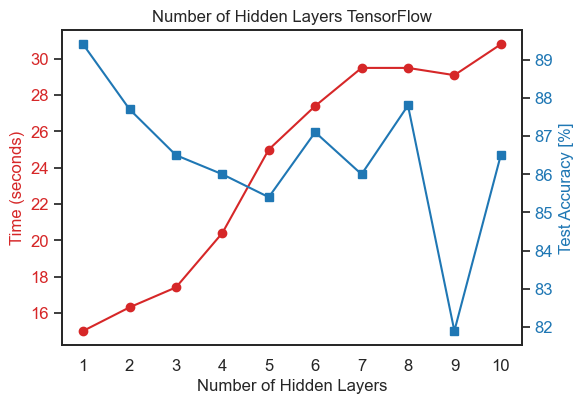

In [54]:
fontsize = 12
    
fig, ax1 = plt.subplots(figsize = (6, 4))
ax1.set_xlabel('Number of Hidden Layers', fontsize = fontsize)
ax1.set_xticks([1,2,3,4,5,6,7,8,9,10])
ax1.set_ylabel('Time (seconds)', color='tab:red', fontsize = fontsize)
ax1.plot([1,2,3,4,5,6,7,8,9,10], [15.0, 16.3, 17.4, 20.4, 25.0, 27.4, 29.5, 29.5, 29.1, 30.8], color='tab:red', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:red')
plt.tick_params(axis='both', labelsize=fontsize)

ax2 = ax1.twinx()  
ax2.set_ylabel('Test Accuracy [%]', color='tab:blue', fontsize = fontsize)  
ax2.plot([1,2,3,4,5,6,7,8,9,10], [89.4, 87.7, 86.5, 86, 85.4, 87.1, 86, 87.8, 81.9, 86.5], color='tab:blue', marker='s')
ax2.tick_params(axis='y', labelcolor='tab:blue')
plt.tick_params(axis='both', labelsize=fontsize)

fig.tight_layout()  
plt.title('Number of Hidden Layers TensorFlow', fontsize = fontsize)
plt.savefig('HiddenLayers.pdf', format='pdf', bbox_inches="tight")
plt.show()